# PyTorch Learning Notebook

Welcome to this comprehensive guide to PyTorch fundamentals! This notebook will take you from basic tensor operations through complete training loops, with each concept building upon previous ones.

## Learning Objectives

By the end of this notebook, you will understand:
- How to create and manipulate tensors
- PyTorch's automatic differentiation system (autograd)
- Building neural network components with nn.Module
- Activation functions and their purposes
- Complete training workflows with optimizers and loss functions

Let's start by verifying your PyTorch installation and checking available compute devices.

In [1]:
import torch
import torch.nn as nn

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available, using CPU")

PyTorch version: 2.11.0.dev20260115+cu128
Using device: cuda
GPU: NVIDIA GeForce RTX 5080


Great! Your environment is set up. Now let's dive into PyTorch fundamentals.

## torch.tensor - The Foundation of PyTorch

**What is a tensor?**

A tensor is PyTorch's fundamental data structure - a multi-dimensional array that can hold numbers. Think of it as a generalization of vectors and matrices:
- A 0D tensor is a scalar (single number)
- A 1D tensor is a vector (list of numbers)
- A 2D tensor is a matrix (table of numbers)
- A 3D+ tensor extends into higher dimensions

**Why do tensors matter?**

Tensors are the building blocks of deep learning. All data (images, text, audio) gets converted into tensors, and all neural network operations work on tensors. PyTorch tensors are similar to NumPy arrays but with two key advantages:
1. They can run on GPUs for massive speedups
2. They support automatic differentiation for training neural networks

Let's explore different ways to create tensors and inspect their properties.

In [ ]:
import torch
import numpy as np

# Creating tensors from Python lists
# 1D tensor (vector)
tensor_1d = torch.tensor([1.0, 2.0, 3.0, 4.0])
print("1D tensor from list:")
print(tensor_1d)
print(f"Type: {type(tensor_1d)}")
print()

# 2D tensor (matrix)
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("2D tensor from nested list:")
print(tensor_2d)
print()

In [ ]:
# Creating tensors from NumPy arrays
numpy_array = np.array([10, 20, 30, 40, 50])
tensor_from_numpy = torch.tensor(numpy_array)
print("Tensor from NumPy array:")
print(tensor_from_numpy)
print(f"Original NumPy array: {numpy_array}")
print()

In [ ]:
# Creating tensors with different data types (dtypes)
# Integer tensor
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int32)
print(f"Integer tensor: {int_tensor}")
print(f"Data type: {int_tensor.dtype}")
print()

# Float tensor (default for decimals)
float_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
print(f"Float tensor: {float_tensor}")
print(f"Data type: {float_tensor.dtype}")
print()

# Double precision tensor
double_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64)
print(f"Double tensor: {double_tensor}")
print(f"Data type: {double_tensor.dtype}")
print()

In [ ]:
# Inspecting tensor properties
sample_tensor = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
sample_tensor = sample_tensor.cuda()

print("Tensor properties:")
print(f"Tensor: \n{sample_tensor}")
print()
print(f"Shape: {sample_tensor.shape}")  # Dimensions of the tensor
print(f"Size: {sample_tensor.size()}")  # Same as shape
print(f"Data type: {sample_tensor.dtype}")  # Type of elements
print(f"Device: {sample_tensor.device}")  # CPU or GPU
print(f"Number of dimensions: {sample_tensor.ndim}")  # Rank of tensor
print(f"Total number of elements: {sample_tensor.numel()}")  # Total elements

**Key Takeaways:**

- Tensors can be created from Python lists, NumPy arrays, or other data sources
- The `dtype` parameter controls the data type (int32, float32, float64, etc.)
- Common properties include `.shape` (dimensions), `.dtype` (data type), and `.device` (CPU/GPU)
- PyTorch defaults to float32 for decimal numbers, which is efficient for deep learning

Now that we understand tensors, we can explore their shapes and operations in more detail.

## Shape - Understanding Tensor Dimensions

**What is tensor shape?**

The shape of a tensor describes its dimensions - how many elements it has along each axis. Understanding shape is crucial because:
- It tells you the structure of your data
- Operations require compatible shapes
- Neural network layers expect specific input shapes

**Why does shape matter?**

In deep learning, you'll constantly work with different shaped tensors:
- **1D tensors** (vectors): Single sequences like word embeddings [embedding_dim]
- **2D tensors** (matrices): Batches of vectors like [batch_size, features]
- **3D tensors**: Sequences of vectors like [batch_size, sequence_length, features]
- **4D tensors**: Image batches like [batch_size, channels, height, width]

Getting shapes right is essential - shape mismatches are one of the most common errors in deep learning!

Let's explore tensor shapes and how to manipulate them.

In [ ]:
import torch

# 1D tensor (vector) - shape is (n,)
tensor_1d = torch.tensor([1, 2, 3, 4, 5])
print("1D Tensor (vector):")
print(tensor_1d)
print(f"Shape: {tensor_1d.shape}")
print(f"Number of dimensions: {tensor_1d.ndim}")
print(f"Size along dimension 0: {tensor_1d.size(0)}")
print()

In [ ]:
# 2D tensor (matrix) - shape is (rows, columns)
tensor_2d = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
print("2D Tensor (matrix):")
print(tensor_2d)
print(f"Shape: {tensor_2d.shape}")
print(f"Number of dimensions: {tensor_2d.ndim}")
print(f"Rows (dimension 0): {tensor_2d.size(0)}")
print(f"Columns (dimension 1): {tensor_2d.size(1)}")
print()

In [ ]:
# 3D tensor - shape is (depth, rows, columns)
# Common for: batch of sequences, video frames, etc.
tensor_3d = torch.tensor([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
])
print("3D Tensor:")
print(tensor_3d)
print(f"Shape: {tensor_3d.shape}")
print(f"Number of dimensions: {tensor_3d.ndim}")
print(f"Dimension 0 (depth): {tensor_3d.size(0)}")
print(f"Dimension 1 (rows): {tensor_3d.size(1)}")
print(f"Dimension 2 (columns): {tensor_3d.size(2)}")
print(f"Total elements: {tensor_3d.numel()}")
print()

**Understanding Shape Notation:**

- `torch.Size([5])` - 1D tensor with 5 elements
- `torch.Size([4, 3])` - 2D tensor with 4 rows and 3 columns (12 total elements)
- `torch.Size([3, 2, 2])` - 3D tensor with 3 "layers", each containing a 2×2 matrix (12 total elements)

The total number of elements is the product of all dimensions: 3 × 2 × 2 = 12

### Reshaping Tensors

Often you need to change a tensor's shape without changing its data. PyTorch provides two main methods:

1. **`.reshape()`** - Returns a tensor with the new shape (may copy data)
2. **`.view()`** - Returns a tensor with the new shape (shares memory with original)

Both require the total number of elements to remain the same.

In [ ]:
# Start with a 1D tensor
original = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print(f"Original tensor: {original}")
print(f"Original shape: {original.shape}")
print()

In [ ]:
# Reshape to 2D (matrix)
reshaped_2d = original.reshape(3, 4)  # 3 rows, 4 columns
print("Reshaped to 3×4 matrix:")
print(reshaped_2d)
print(f"Shape: {reshaped_2d.shape}")
print()

# Reshape to different 2D shape
reshaped_2d_alt = original.reshape(4, 3)  # 4 rows, 3 columns
print("Reshaped to 4×3 matrix:")
print(reshaped_2d_alt)
print(f"Shape: {reshaped_2d_alt.shape}")
print()

In [ ]:
# Reshape to 3D
reshaped_3d = original.reshape(2, 3, 2)  # 2 layers of 3×2 matrices
print("Reshaped to 2×3×2 tensor:")
print(reshaped_3d)
print(f"Shape: {reshaped_3d.shape}")
print()

# Using -1 to infer one dimension
# PyTorch automatically calculates the missing dimension
auto_reshaped = original.reshape(-1, 4)  # 3 rows, automatically 4 columns
print("Reshaped with -1 (auto-infer dimension):")
print(auto_reshaped)
print(f"Shape: {auto_reshaped.shape}")
print()

In [ ]:
reshaped_2d[0,0]


In [ ]:
# Using .view() - similar to reshape but requires contiguous memory
viewed = original.view(2, 6)  # 2 rows, 6 columns
print("Using .view() to reshape:")
print(viewed)
print(f"Shape: {viewed.shape}")
print()

# Important: view() shares memory with the original tensor
# Modifying the view affects the original
viewed[0, 0] = 999
print(f"After modifying view, original tensor: {original}")
print("Notice the first element changed to 999!")
print()

# Reset for clarity
original[0] = 1

In [ ]:
# Common reshaping patterns in deep learning

# Flattening: Convert any shape to 1D
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
flattened = matrix.reshape(-1)  # or matrix.flatten()
print(f"Original matrix shape: {matrix.shape}")
print(f"Flattened shape: {flattened.shape}")
print(f"Flattened: {flattened}")
print()

# Adding a batch dimension
single_sample = torch.tensor([1, 2, 3, 4])
batched = single_sample.reshape(1, -1)  # Add batch dimension of size 1
print(f"Single sample shape: {single_sample.shape}")
print(f"With batch dimension: {batched.shape}")
print(f"Batched: {batched}")
print()

**Key Takeaways:**

- **Shape** describes tensor dimensions and is accessed via `.shape` or `.size()`
- The total number of elements must stay the same when reshaping
- **`.reshape()`** is more flexible and may copy data if needed
- **`.view()`** shares memory with the original tensor (faster but requires contiguous memory)
- Use `-1` in reshape to automatically infer one dimension
- Common patterns: flattening (`.reshape(-1)`), adding batch dimensions (`.reshape(1, -1)`)

Understanding and manipulating tensor shapes is fundamental to building neural networks, where data flows through layers with specific shape requirements.

## Device Management - CPU vs GPU Computation

**What is device management?**

In PyTorch, a "device" refers to where your tensors and computations live - either on the CPU (your computer's processor) or GPU (graphics card). Device management is the practice of controlling where your data and models are placed.

**Why does device management matter?**

GPUs can perform tensor operations **10-100x faster** than CPUs for deep learning workloads because:
- GPUs have thousands of cores optimized for parallel computation
- Deep learning operations (matrix multiplications, convolutions) are highly parallelizable
- Modern GPUs have specialized hardware for AI workloads (like NVIDIA's Tensor Cores)

However, not all operations need GPU acceleration:
- **Use GPU**: Training large models, processing big batches, production inference at scale
- **Use CPU**: Small models, debugging, when GPU isn't available, data preprocessing

**Key principle**: Tensors must be on the same device to operate together. You can't add a CPU tensor to a GPU tensor without moving one of them first!

Let's explore how to detect devices and move tensors between them.

### Detecting Available Devices

First, let's check what devices are available on your system.

In [ ]:
import torch

# Check if CUDA (NVIDIA GPU) is available
cuda_available = torch.cuda.is_available()
print(f"CUDA (GPU) available: {cuda_available}")
print()

if cuda_available:
    # Get GPU information
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.current_device()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print()
    
    # Get GPU memory info
    print(f"GPU Memory Allocated: {torch.cuda.memory_allocated(0) / 1024**2:.2f} MB")
    print(f"GPU Memory Reserved: {torch.cuda.memory_reserved(0) / 1024**2:.2f} MB")
else:
    print("No GPU detected. Computations will run on CPU.")
    print("This is fine for learning and small experiments!")

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [ ]:
# Create a device object for easy reference
# This is a common pattern in PyTorch code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print()

# You can also specify a specific GPU if you have multiple
# device = torch.device('cuda:0')  # First GPU
# device = torch.device('cuda:1')  # Second GPU
# device = torch.device('cpu')     # Force CPU

print(f"Device type: {device.type}")
if device.type == 'cuda':
    print(f"Device index: {device.index}")

### Creating Tensors on Specific Devices

You can create tensors directly on a specific device, or create them on CPU and move them later.

In [ ]:
# Method 1: Create tensor on CPU (default)
cpu_tensor = torch.tensor([1.0, 2.0, 3.0, 4.0])
print("Tensor created on CPU:")
print(f"Tensor: {cpu_tensor}")
print(f"Device: {cpu_tensor.device}")
print()

In [ ]:
torch.zeros(3, 3, device=torch.device('cuda'))

In [ ]:
# Method 2: Create tensor directly on a specific device
device_tensor = torch.tensor([1.0, 2.0, 3.0, 4.0], device=device)
print(f"Tensor created on {device}:")
print(f"Tensor: {device_tensor}")
print(f"Device: {device_tensor.device}")
print()

# Method 3: Use device-specific constructors
zeros_on_device = torch.zeros(3, 3, device=device)
print(f"Zeros tensor on {device}:")
print(zeros_on_device)
print(f"Device: {zeros_on_device.device}")

### Moving Tensors Between Devices

PyTorch provides several methods to move tensors between CPU and GPU. This is essential when you need to:
- Move data to GPU for training
- Move results back to CPU for visualization or saving
- Ensure all tensors in an operation are on the same device

In [ ]:
# Create a tensor on CPU
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print("Original tensor (CPU):")
print(f"Tensor: \n{x}")
print(f"Device: {x.device}")
print()

In [ ]:
# Method 1: Using .to() method (most common)
x_on_device = x.to(device)
print(f"Tensor moved to {device} using .to():")
print(f"Tensor: \n{x_on_device}")
print(f"Device: {x_on_device.device}")
print()

# .to() creates a copy if the device is different
# If already on the target device, it returns the same tensor
print(f"Original tensor still on: {x.device}")
print(f"New tensor on: {x_on_device.device}")

In [ ]:
# Method 2: Using .cuda() and .cpu() methods
# These are shortcuts for moving to GPU and CPU respectively

# Move to CPU
x_cpu = x_on_device.cpu()
print("Moved to CPU using .cpu():")
print(f"Device: {x_cpu.device}")
print()

# Move to GPU (if available)
if torch.cuda.is_available():
    x_gpu = x.cuda()
    print("Moved to GPU using .cuda():")
    print(f"Device: {x_gpu.device}")
    print()
    
    # You can specify which GPU
    # x_gpu = x.cuda(0)  # Move to first GPU
else:
    print("GPU not available, skipping .cuda() example")

In [ ]:
# Method 3: In-place movement (less common)
# Note: This is rarely used because .to() is more flexible
y = torch.tensor([5.0, 6.0, 7.0])
print(f"Before: {y.device}")

# Using .to() with the same variable name
y = y.to(device)
print(f"After: {y.device}")

### Device Compatibility - A Critical Rule

**Important**: All tensors in an operation must be on the same device. Mixing CPU and GPU tensors will cause an error!

In [ ]:
# Create tensors on different devices
a = torch.tensor([1.0, 2.0, 3.0])  # CPU by default
b = torch.tensor([4.0, 5.0, 6.0], device=device)  # On our target device

print(f"Tensor a device: {a.device}")
print(f"Tensor b device: {b.device}")
print()

# This will cause an error if devices are different!
# Uncomment to see the error:
# result = a + b  # RuntimeError: Expected all tensors to be on the same device

# Solution: Move tensors to the same device
a_on_device = a.to(device)
result = a_on_device + b
print("After moving to same device:")
print(f"Result: {result}")
print(f"Result device: {result.device}")

### Practical Device Management Patterns

Here are common patterns you'll use in real PyTorch code.

In [ ]:
deta = torch.randn(10,10)
deta.to(device)
deta.sum()

In [ ]:
import torch
# Pattern 1: Set device at the start of your script
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print()

# Pattern 2: Move model and data to device
# (We'll see this more with nn.Module later)
data = torch.randn(10, 5)  # Some data
data = data.to(device)
print(f"Data on device: {data.device}")
print()

# Pattern 3: Move results back to CPU for numpy conversion
# (GPU tensors can't be converted to numpy directly)
result = data.sum()
result_cpu = result.cpu()
result_numpy = result_cpu.numpy()
print(f"Result as numpy: {result_numpy}")
print(f"Type: {type(result_numpy)}")

In [ ]:
# Pattern 4: Check device before operations
def safe_add(tensor1, tensor2):
    """Add two tensors, ensuring they're on the same device."""
    if tensor1.device != tensor2.device:
        tensor2 = tensor2.to(tensor1.device)
    return tensor1 + tensor2

x = torch.tensor([1.0, 2.0])
y = torch.tensor([3.0, 4.0], device=device)

result = safe_add(x, y)
print(f"Safe add result: {result}")
print(f"Result device: {result.device}")

In [ ]:
device

In [ ]:
# Pattern 5: Timing CPU vs GPU operations (if GPU available)
import time

# Create large tensors for meaningful comparison
size = 5000
a_cpu = torch.randn(size, size)
b_cpu = torch.randn(size, size)

# # Time CPU operation
start = time.time()
c_cpu = torch.matmul(a_cpu, b_cpu)
cpu_time = time.time() - start
print(f"CPU matrix multiplication time: {cpu_time:.4f} seconds")

if torch.cuda.is_available():
    # Move to GPU
    a_gpu = a_cpu.to(device)
    b_gpu = b_cpu.to(device)
    
    # Warm up GPU (first operation is slower)
    # _ = torch.matmul(a_gpu, b_gpu)
    # torch.cuda.synchronize()  # Wait for GPU to finish
    
    # Time GPU operation
    start = time.time()
    c_gpu = torch.matmul(a_gpu, b_gpu)
    torch.cuda.synchronize()  # Wait for GPU to finish
    gpu_time = time.time() - start
    
    print(f"GPU matrix multiplication time: {gpu_time:.4f} seconds")
    print(f"Speedup: {cpu_time / gpu_time:.2f}x faster on GPU")
else:
    print("GPU not available for comparison")

**Key Takeaways:**

- **Device** refers to where tensors live: CPU or GPU (CUDA)
- Use `torch.device('cuda' if torch.cuda.is_available() else 'cpu')` to automatically select the best device
- Create tensors on a device with `device=` parameter: `torch.tensor([1, 2], device=device)`
- Move tensors with `.to(device)`, `.cuda()`, or `.cpu()` methods
- **Critical rule**: All tensors in an operation must be on the same device
- GPUs provide massive speedups (10-100x) for large tensor operations
- Move results to CPU with `.cpu()` before converting to NumPy

**Best Practices:**
1. Set your device once at the start: `device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')`
2. Move models and data to device immediately after creation
3. Keep tensors on GPU during training, only move to CPU when needed
4. Use `.to(device)` instead of `.cuda()` for code that works on both CPU and GPU

Device management becomes second nature with practice. The key is remembering that tensors must be on the same device to interact!

## Dimension Arguments - Specifying Axes for Operations

**What are dimension arguments?**

Many PyTorch operations (like sum, mean, max) can work across specific dimensions (axes) of a tensor. The dimension argument (often called `dim` or `axis`) tells PyTorch which dimension to operate along. Think of it as choosing which direction to "collapse" the tensor.

**Why do dimension arguments matter?**

In deep learning, you constantly need to perform operations along specific dimensions:
- **Batch processing**: Average loss across all samples in a batch (dim=0)
- **Sequence operations**: Sum values across time steps (dim=1)
- **Feature aggregation**: Find maximum activation across feature channels (dim=-1)
- **Attention mechanisms**: Compute softmax over sequence length dimension

Understanding dimensions is crucial because:
- It controls how data is aggregated or transformed
- Wrong dimension = wrong results (and often hard-to-debug errors!)
- Many neural network operations depend on dimension-specific computations

**Dimension indexing**:
- Dimensions are **zero-indexed**: first dimension is 0, second is 1, etc.
- **Negative indexing** works too: -1 is the last dimension, -2 is second-to-last
- For a 2D tensor (matrix): dim=0 is rows, dim=1 is columns

Let's explore how dimension arguments work with practical examples.

### Operations on 2D Tensors (Matrices)

Let's start with a simple 2D tensor to understand how dimensions work.

In [345]:
import torch

# Create a 2D tensor (matrix)
# Think of this as 3 samples (rows), each with 4 features (columns)
matrix = torch.tensor([
    [1.0, 2.0, 3.0, 4.0],   # Sample 1
    [5.0, 6.0, 7.0, 8.0],   # Sample 2
    [9.0, 10.0, 11.0, 12.0] # Sample 3
])

print("Original matrix:")
print(matrix)
print(f"Shape: {matrix.shape}  # (3 rows, 4 columns)")
print()

Original matrix:
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
Shape: torch.Size([3, 4])  # (3 rows, 4 columns)



In [346]:
# Sum without specifying dimension - sums ALL elements
total_sum = matrix.sum()
print("Sum of all elements (no dim specified):")
print(f"Result: {total_sum}")
print(f"Shape: {total_sum.shape}  # Scalar (0D tensor)")
print(f"Calculation: 1+2+3+...+12 = {total_sum.item()}")
print()

Sum of all elements (no dim specified):
Result: 78.0
Shape: torch.Size([])  # Scalar (0D tensor)
Calculation: 1+2+3+...+12 = 78.0



In [353]:
matrix

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [347]:
# Sum along dimension 0 (down the rows)
# This collapses the row dimension, leaving only columns
sum_dim0 = matrix.sum(dim=0)
print("Sum along dimension 0 (sum down each column):")
print(f"Result: {sum_dim0}")
print(f"Shape: {sum_dim0.shape}  # (4,) - one value per column")
print()
print("Explanation:")
print("  Column 0: 1 + 5 + 9 = 15")
print("  Column 1: 2 + 6 + 10 = 18")
print("  Column 2: 3 + 7 + 11 = 21")
print("  Column 3: 4 + 8 + 12 = 24")
print()
print("Use case: Summing features across all samples in a batch")

Sum along dimension 0 (sum down each column):
Result: tensor([15., 18., 21., 24.])
Shape: torch.Size([4])  # (4,) - one value per column

Explanation:
  Column 0: 1 + 5 + 9 = 15
  Column 1: 2 + 6 + 10 = 18
  Column 2: 3 + 7 + 11 = 21
  Column 3: 4 + 8 + 12 = 24

Use case: Summing features across all samples in a batch


In [354]:
# Sum along dimension 1 (across the columns)
# This collapses the column dimension, leaving only rows
sum_dim1 = matrix.sum(dim=1)
print("Sum along dimension 1 (sum across each row):")
print(f"Result: {sum_dim1}")
print(f"Shape: {sum_dim1.shape}  # (3,) - one value per row")
print()
print("Explanation:")
print("  Row 0: 1 + 2 + 3 + 4 = 10")
print("  Row 1: 5 + 6 + 7 + 8 = 26")
print("  Row 2: 9 + 10 + 11 + 12 = 42")
print()
print("Use case: Summing all features for each sample")

Sum along dimension 1 (sum across each row):
Result: tensor([10., 26., 42.])
Shape: torch.Size([3])  # (3,) - one value per row

Explanation:
  Row 0: 1 + 2 + 3 + 4 = 10
  Row 1: 5 + 6 + 7 + 8 = 26
  Row 2: 9 + 10 + 11 + 12 = 42

Use case: Summing all features for each sample


In [355]:
# Using negative indexing
# dim=-1 refers to the last dimension (same as dim=1 for 2D tensors)
sum_dim_neg1 = matrix.sum(dim=-1)
print("Sum along dimension -1 (last dimension = columns):")
print(f"Result: {sum_dim_neg1}")
print(f"Shape: {sum_dim_neg1.shape}")
print()
print("This gives the same result as dim=1:")
print(f"dim=1:  {sum_dim1}")
print(f"dim=-1: {sum_dim_neg1}")
print()
print("Tip: Using dim=-1 makes code work with tensors of any number of dimensions!")

Sum along dimension -1 (last dimension = columns):
Result: tensor([10., 26., 42.])
Shape: torch.Size([3])

This gives the same result as dim=1:
dim=1:  tensor([10., 26., 42.])
dim=-1: tensor([10., 26., 42.])

Tip: Using dim=-1 makes code work with tensors of any number of dimensions!


### Mean Operations Across Dimensions

The `mean()` operation works the same way as `sum()`, but computes the average instead.

In [356]:
# Mean across different dimensions
print("Original matrix:")
print(matrix)
print(f"Shape: {matrix.shape}")
print()

# Mean of all elements
mean_all = matrix.mean()
print(f"Mean of all elements: {mean_all:.2f}")
print(f"Calculation: sum(78) / count(12) = {mean_all:.2f}")
print()

Original matrix:
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
Shape: torch.Size([3, 4])

Mean of all elements: 6.50
Calculation: sum(78) / count(12) = 6.50



In [357]:
# Mean along dimension 0 (average down each column)
mean_dim0 = matrix.mean(dim=0)
print("Mean along dimension 0 (average of each column):")
print(f"Result: {mean_dim0}")
print(f"Shape: {mean_dim0.shape}")
print()
print("Explanation:")
print("  Column 0: (1 + 5 + 9) / 3 = 5.0")
print("  Column 1: (2 + 6 + 10) / 3 = 6.0")
print("  Column 2: (3 + 7 + 11) / 3 = 7.0")
print("  Column 3: (4 + 8 + 12) / 3 = 8.0")
print()
print("Use case: Computing average feature values across a batch")

Mean along dimension 0 (average of each column):
Result: tensor([5., 6., 7., 8.])
Shape: torch.Size([4])

Explanation:
  Column 0: (1 + 5 + 9) / 3 = 5.0
  Column 1: (2 + 6 + 10) / 3 = 6.0
  Column 2: (3 + 7 + 11) / 3 = 7.0
  Column 3: (4 + 8 + 12) / 3 = 8.0

Use case: Computing average feature values across a batch


In [358]:
# Mean along dimension 1 (average across each row)
mean_dim1 = matrix.mean(dim=1)
print("Mean along dimension 1 (average of each row):")
print(f"Result: {mean_dim1}")
print(f"Shape: {mean_dim1.shape}")
print()
print("Explanation:")
print("  Row 0: (1 + 2 + 3 + 4) / 4 = 2.5")
print("  Row 1: (5 + 6 + 7 + 8) / 4 = 6.5")
print("  Row 2: (9 + 10 + 11 + 12) / 4 = 10.5")
print()
print("Use case: Computing average activation per sample")

Mean along dimension 1 (average of each row):
Result: tensor([ 2.5000,  6.5000, 10.5000])
Shape: torch.Size([3])

Explanation:
  Row 0: (1 + 2 + 3 + 4) / 4 = 2.5
  Row 1: (5 + 6 + 7 + 8) / 4 = 6.5
  Row 2: (9 + 10 + 11 + 12) / 4 = 10.5

Use case: Computing average activation per sample


### Operations on 3D Tensors

With 3D tensors, dimension arguments become even more important. Let's use a tensor shaped like batch data: (batch_size, sequence_length, features).

In [359]:
# Create a 3D tensor: 2 samples, 3 time steps, 4 features
# Common shape for sequence data (like text or time series)
tensor_3d = torch.tensor([
    # Sample 1
    [[1, 2, 3, 4],      # Time step 0
     [5, 6, 7, 8],      # Time step 1
     [9, 10, 11, 12]],  # Time step 2
    
    # Sample 2
    [[13, 14, 15, 16],  # Time step 0
     [17, 18, 19, 20],  # Time step 1
     [21, 22, 23, 24]]  # Time step 2
], dtype=torch.float32)

print("3D Tensor (batch_size=2, sequence_length=3, features=4):")
print(tensor_3d)
print(f"Shape: {tensor_3d.shape}")
print()

3D Tensor (batch_size=2, sequence_length=3, features=4):
tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]])
Shape: torch.Size([2, 3, 4])



In [372]:
tensor_3d.sum(dim=-1)

tensor([[10., 26., 42.],
        [58., 74., 90.]])

In [368]:
# Sum along dimension 0 (across batch)
sum_batch = tensor_3d.sum(dim=0)
print("Sum along dim=0 (sum across batch):")
print(sum_batch)
print(f"Shape: {sum_batch.shape}  # (3, 4) - batch dimension removed")
print()
print("This sums corresponding positions from both samples")
print("Example: Position [0,0] = 1 + 13 = 14")
print()

Sum along dim=0 (sum across batch):
tensor([[14., 16., 18., 20.],
        [22., 24., 26., 28.],
        [30., 32., 34., 36.]])
Shape: torch.Size([3, 4])  # (3, 4) - batch dimension removed

This sums corresponding positions from both samples
Example: Position [0,0] = 1 + 13 = 14



In [369]:
# Sum along dimension 1 (across sequence/time)
sum_sequence = tensor_3d.sum(dim=1)
print("Sum along dim=1 (sum across sequence):")
print(sum_sequence)
print(f"Shape: {sum_sequence.shape}  # (2, 4) - sequence dimension removed")
print()
print("This sums all time steps for each sample")
print("Sample 1, Feature 0: 1 + 5 + 9 = 15")
print("Sample 2, Feature 0: 13 + 17 + 21 = 51")
print()
print("Use case: Aggregating information across time steps")

Sum along dim=1 (sum across sequence):
tensor([[15., 18., 21., 24.],
        [51., 54., 57., 60.]])
Shape: torch.Size([2, 4])  # (2, 4) - sequence dimension removed

This sums all time steps for each sample
Sample 1, Feature 0: 1 + 5 + 9 = 15
Sample 2, Feature 0: 13 + 17 + 21 = 51

Use case: Aggregating information across time steps


In [370]:
# Sum along dimension 2 (across features)
sum_features = tensor_3d.sum(dim=2)
print("Sum along dim=2 (sum across features):")
print(sum_features)
print(f"Shape: {sum_features.shape}  # (2, 3) - feature dimension removed")
print()
print("This sums all features for each time step of each sample")
print("Sample 1, Time 0: 1 + 2 + 3 + 4 = 10")
print("Sample 1, Time 1: 5 + 6 + 7 + 8 = 26")
print()
print("Use case: Computing total activation at each time step")

Sum along dim=2 (sum across features):
tensor([[10., 26., 42.],
        [58., 74., 90.]])
Shape: torch.Size([2, 3])  # (2, 3) - feature dimension removed

This sums all features for each time step of each sample
Sample 1, Time 0: 1 + 2 + 3 + 4 = 10
Sample 1, Time 1: 5 + 6 + 7 + 8 = 26

Use case: Computing total activation at each time step


In [371]:
# Using dim=-1 for the last dimension (features)
sum_last_dim = tensor_3d.sum(dim=-1)
print("Sum along dim=-1 (last dimension):")
print(sum_last_dim)
print(f"Shape: {sum_last_dim.shape}")
print()
print("Same result as dim=2:")
print(f"Are they equal? {torch.equal(sum_features, sum_last_dim)}")

Sum along dim=-1 (last dimension):
tensor([[10., 26., 42.],
        [58., 74., 90.]])
Shape: torch.Size([2, 3])

Same result as dim=2:
Are they equal? True


### The `keepdim` Parameter - Preserving Dimensions

By default, operations like `sum()` and `mean()` remove the dimension they operate on. Sometimes you want to keep that dimension (with size 1) for broadcasting or shape consistency. That's what the `keepdim` parameter does!

**Why use keepdim?**
- **Broadcasting**: Keep dimensions for element-wise operations with the original tensor
- **Shape consistency**: Maintain the same number of dimensions throughout a pipeline
- **Normalization**: Useful for operations like batch normalization or layer normalization

In [373]:
# Create a simple 2D tensor
x = torch.tensor([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])

print("Original tensor:")
print(x)
print(f"Shape: {x.shape}  # (3, 3)")
print()

Original tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
Shape: torch.Size([3, 3])  # (3, 3)



In [374]:
# Sum along dimension 1 WITHOUT keepdim (default)
sum_no_keepdim = x.sum(dim=1)
print("Sum with keepdim=False (default):")
print(sum_no_keepdim)
print(f"Shape: {sum_no_keepdim.shape}  # (3,) - dimension removed!")
print()

# Sum along dimension 1 WITH keepdim
sum_with_keepdim = x.sum(dim=1, keepdim=True)
print("Sum with keepdim=True:")
print(sum_with_keepdim)
print(f"Shape: {sum_with_keepdim.shape}  # (3, 1) - dimension kept!")
print()
print("Notice: keepdim=True preserves the dimension with size 1")

Sum with keepdim=False (default):
tensor([ 6., 15., 24.])
Shape: torch.Size([3])  # (3,) - dimension removed!

Sum with keepdim=True:
tensor([[ 6.],
        [15.],
        [24.]])
Shape: torch.Size([3, 1])  # (3, 1) - dimension kept!

Notice: keepdim=True preserves the dimension with size 1


In [375]:
# Practical example: Normalizing each row
# We want to divide each element by its row sum

print("Original tensor:")
print(x)
print()

# Without keepdim - this causes a shape mismatch!
row_sums = x.sum(dim=1)  # Shape: (3,)
print(f"Row sums shape: {row_sums.shape}")
print(f"Original shape: {x.shape}")
print("Can't directly divide (3,3) by (3,) - shapes don't align properly!")
print()

# With keepdim - broadcasting works perfectly!
row_sums_keepdim = x.sum(dim=1, keepdim=True)  # Shape: (3, 1)
normalized = x / row_sums_keepdim
print("With keepdim=True:")
print(f"Row sums shape: {row_sums_keepdim.shape}  # (3, 1)")
print(f"Normalized tensor:")
print(normalized)
print()
print("Each row now sums to 1.0:")
print(f"Row sums: {normalized.sum(dim=1)}")

Original tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Row sums shape: torch.Size([3])
Original shape: torch.Size([3, 3])
Can't directly divide (3,3) by (3,) - shapes don't align properly!

With keepdim=True:
Row sums shape: torch.Size([3, 1])  # (3, 1)
Normalized tensor:
tensor([[0.1667, 0.3333, 0.5000],
        [0.2667, 0.3333, 0.4000],
        [0.2917, 0.3333, 0.3750]])

Each row now sums to 1.0:
Row sums: tensor([1., 1., 1.])


In [ ]:
# Another example: Mean normalization (zero mean, unit variance)
data = torch.tensor([
    [10.0, 20.0, 30.0],
    [15.0, 25.0, 35.0],
    [12.0, 22.0, 32.0]
])

print("Original data:")
print(data)
print()

# Normalize each row to have mean=0
row_means = data.mean(dim=1, keepdim=True)
centered = data - row_means

print("After centering (subtracting row means):")
print(centered)
print(f"Row means of centered data: {centered.mean(dim=1)}")
print("(Should be close to 0)")
print()

# Further normalize by standard deviation
row_std = data.std(dim=1, keepdim=True)
normalized = (data - row_means) / row_std

print("After full normalization (mean=0, std=1):")
print(normalized)
print(f"Row means: {normalized.mean(dim=1)}")
print(f"Row stds: {normalized.std(dim=1)}")

Original data:
tensor([[10., 20., 30.],
        [15., 25., 35.],
        [12., 22., 32.]])

After centering (subtracting row means):
tensor([[-10.,   0.,  10.],
        [-10.,   0.,  10.],
        [-10.,   0.,  10.]])
Row means of centered data: tensor([0., 0., 0.])
(Should be close to 0)

After full normalization (mean=0, std=1):
tensor([[-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.]])
Row means: tensor([0., 0., 0.])
Row stds: tensor([1., 1., 1.])


Mean: 48.44
Standard Deviation: 13.55
Normalized mean: -0.000000
Normalized std: 1.000000


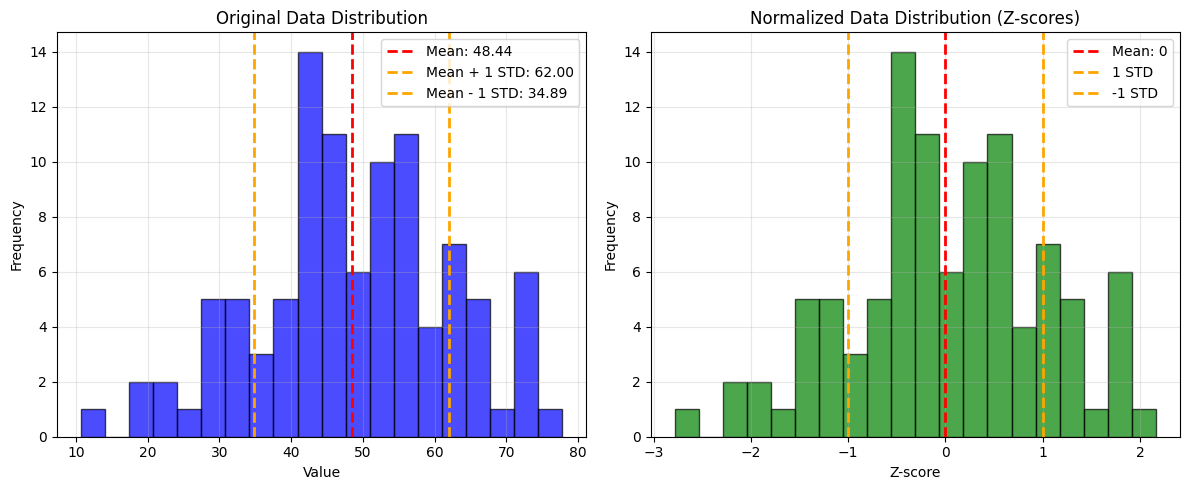


Explanation:
- Mean: Average value of the dataset
- Standard Deviation: Measure of spread/variability in the data
- Normalization (Z-score): Transforms data to have mean=0 and std=1
- Formula: z = (x - mean) / std
- Benefits: Makes data comparable across different scales and units
- 68% of data falls within ±1 standard deviation in normal distribution


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample data with more variation for better demonstration
np.random.seed(42)
data = np.random.normal(50, 15, 100)  # Normal distribution with mean=50, std=15

# Calculate mean
mean = np.mean(data)
print(f"Mean: {mean:.2f}")

# Calculate standard deviation
std = np.std(data)
print(f"Standard Deviation: {std:.2f}")

# Normalization (Z-score normalization)
normalized_data = (data - mean) / std
print(f"Normalized mean: {np.mean(normalized_data):.6f}")
print(f"Normalized std: {np.std(normalized_data):.6f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original data
ax1.hist(data, bins=20, alpha=0.7, color='blue', edgecolor='black')
ax1.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
ax1.axvline(mean + std, color='orange', linestyle='--', linewidth=2, label=f'Mean + 1 STD: {mean + std:.2f}')
ax1.axvline(mean - std, color='orange', linestyle='--', linewidth=2, label=f'Mean - 1 STD: {mean - std:.2f}')
ax1.set_title('Original Data Distribution')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Normalized data
ax2.hist(normalized_data, bins=20, alpha=0.7, color='green', edgecolor='black')
ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='Mean: 0')
ax2.axvline(1, color='orange', linestyle='--', linewidth=2, label='1 STD')
ax2.axvline(-1, color='orange', linestyle='--', linewidth=2, label='-1 STD')
ax2.set_title('Normalized Data Distribution (Z-scores)')
ax2.set_xlabel('Z-score')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nExplanation:")
print("- Mean: Average value of the dataset")
print("- Standard Deviation: Measure of spread/variability in the data")
print("- Normalization (Z-score): Transforms data to have mean=0 and std=1")
print("- Formula: z = (x - mean) / std")
print("- Benefits: Makes data comparable across different scales and units")
print("- 68% of data falls within ±1 standard deviation in normal distribution")


In [7]:
import torch
# keepdim with 3D tensors
tensor_3d_small = torch.randn(2, 3, 4)  # batch=2, seq=3, features=4

print(f"Original shape: {tensor_3d_small.shape}")
print()

# Mean across features without keepdim
mean_no_keep = tensor_3d_small.mean(dim=2)
print(f"Mean(dim=2, keepdim=False) shape: {mean_no_keep.shape}  # (2, 3)")
print()

# Mean across features with keepdim
mean_keep = tensor_3d_small.mean(dim=2, keepdim=True)
print(f"Mean(dim=2, keepdim=True) shape: {mean_keep.shape}  # (2, 3, 1)")
print()
print("With keepdim=True, we can easily broadcast operations back to original shape!")

Original shape: torch.Size([2, 3, 4])

Mean(dim=2, keepdim=False) shape: torch.Size([2, 3])  # (2, 3)

Mean(dim=2, keepdim=True) shape: torch.Size([2, 3, 1])  # (2, 3, 1)

With keepdim=True, we can easily broadcast operations back to original shape!


**Key Takeaways:**

**Dimension Arguments:**
- The `dim` parameter specifies which dimension to operate along
- Dimensions are zero-indexed: 0, 1, 2, ...
- Negative indexing works: -1 (last), -2 (second-to-last), etc.
- Operations like `sum()`, `mean()`, `max()`, `min()` support dimension arguments
- Without `dim`, operations work on ALL elements

**Common Patterns:**
- `dim=0`: Operate across the batch (aggregate samples)
- `dim=1`: Operate across sequences/rows
- `dim=-1`: Operate across the last dimension (often features)

**The keepdim Parameter:**
- `keepdim=False` (default): Removes the dimension being operated on
- `keepdim=True`: Keeps the dimension with size 1
- Use `keepdim=True` when you need to broadcast operations back to the original shape
- Essential for normalization operations (mean normalization, batch norm, layer norm)

**Practical Applications:**
- Computing batch statistics: `batch.mean(dim=0)`
- Aggregating sequences: `sequence.sum(dim=1)`
- Normalizing features: `(x - x.mean(dim=-1, keepdim=True)) / x.std(dim=-1, keepdim=True)`
- Finding maximum activations: `activations.max(dim=1)`

Understanding dimension arguments is fundamental to working with multi-dimensional data in PyTorch. They give you precise control over how operations aggregate or transform your tensors!

## Matrix Multiplication - The Heart of Neural Networks

**What is matrix multiplication?**

Matrix multiplication is a fundamental linear algebra operation that combines two matrices to produce a new matrix. Unlike element-wise multiplication (where you multiply corresponding elements), matrix multiplication follows specific rules:
- The number of columns in the first matrix must equal the number of rows in the second matrix
- The result has the shape (rows of first matrix, columns of second matrix)
- Each element in the result is the dot product of a row from the first matrix and a column from the second

**Why does matrix multiplication matter?**

Matrix multiplication is **the core operation** in neural networks:
- **Linear layers**: Transform inputs via weight matrices: `output = input @ weights + bias`
- **Attention mechanisms**: Compute query-key interactions in transformers
- **Convolutions**: Can be expressed as matrix multiplications
- **Batch processing**: Efficiently process multiple samples simultaneously

Every forward pass through a neural network involves dozens or hundreds of matrix multiplications. Understanding this operation is essential for understanding how neural networks work!

**PyTorch provides three ways to do matrix multiplication:**
1. `torch.mm()` - Basic matrix multiplication (2D only)
2. `torch.matmul()` - General matrix multiplication (supports broadcasting)
3. `@` operator - Pythonic syntax for matmul (recommended)

Let's explore each one and see when to use them.

### torch.mm() - Basic Matrix Multiplication

`torch.mm()` performs standard matrix multiplication on 2D tensors (matrices). It's the most straightforward but also the most restrictive.

In [13]:
import torch

# Create two matrices
# Matrix A: 3 rows, 4 columns
A = torch.tensor([
    [1.0, 2.0, 3.0, 4.0],
    [5.0, 6.0, 7.0, 8.0],
    [9.0, 10.0, 11.0, 12.0]
])

# Matrix B: 4 rows, 2 columns
# Note: A's columns (4) must match B's rows (4)
B = torch.tensor([
    [1.0, 2.0],
    [3.0, 4.0],
    [5.0, 6.0],
    [7.0, 8.0]
])

print("Matrix A:")
print(A)
print(f"Shape: {A.shape}  # (3, 4)")
print()

print("Matrix B:")
print(B)
print(f"Shape: {B.shape}  # (4, 2)")
print()

Matrix A:
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
Shape: torch.Size([3, 4])  # (3, 4)

Matrix B:
tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
Shape: torch.Size([4, 2])  # (4, 2)



In [14]:
# Perform matrix multiplication using torch.mm()
C = torch.mm(A, B)

print("Result C = A @ B:")
print(C)
print(f"Shape: {C.shape}  # (3, 2) - rows from A, columns from B")
print()

# Let's verify one element manually
# C[0, 0] = A[0, :] · B[:, 0]
#         = (1*1) + (2*3) + (3*5) + (4*7)
#         = 1 + 6 + 15 + 28 = 50
print("Manual calculation of C[0, 0]:")
print(f"A[0, :] = {A[0, :]}")
print(f"B[:, 0] = {B[:, 0]}")
print(f"Dot product: (1*1) + (2*3) + (3*5) + (4*7) = {C[0, 0].item()}")
print()

# Verify another element
print("Manual calculation of C[1, 1]:")
print(f"A[1, :] = {A[1, :]}")
print(f"B[:, 1] = {B[:, 1]}")
print(f"Dot product: (5*2) + (6*4) + (7*6) + (8*8) = {C[1, 1].item()}")

Result C = A @ B:
tensor([[ 50.,  60.],
        [114., 140.],
        [178., 220.]])
Shape: torch.Size([3, 2])  # (3, 2) - rows from A, columns from B

Manual calculation of C[0, 0]:
A[0, :] = tensor([1., 2., 3., 4.])
B[:, 0] = tensor([1., 3., 5., 7.])
Dot product: (1*1) + (2*3) + (3*5) + (4*7) = 50.0

Manual calculation of C[1, 1]:
A[1, :] = tensor([5., 6., 7., 8.])
B[:, 1] = tensor([2., 4., 6., 8.])
Dot product: (5*2) + (6*4) + (7*6) + (8*8) = 140.0


In [15]:
# Shape compatibility is crucial!
# The inner dimensions must match

X = torch.randn(3, 5)  # 3 rows, 5 columns
Y = torch.randn(5, 2)  # 5 rows, 2 columns

result = torch.mm(X, Y)
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"Result shape: {result.shape}  # (3, 2)")
print()
print("Rule: (m, n) @ (n, p) = (m, p)")
print("The middle dimension (n) must match!")
print()

# This would cause an error:
# Z = torch.randn(3, 7)
# torch.mm(X, Z)  # Error! X has 5 columns but Z has 3 rows
print("Note: torch.mm() only works with 2D tensors (matrices)")

X shape: torch.Size([3, 5])
Y shape: torch.Size([5, 2])
Result shape: torch.Size([3, 2])  # (3, 2)

Rule: (m, n) @ (n, p) = (m, p)
The middle dimension (n) must match!

Note: torch.mm() only works with 2D tensors (matrices)


### torch.matmul() and @ Operator - Flexible Matrix Multiplication

`torch.matmul()` (and its alias, the `@` operator) is more flexible than `torch.mm()`:
- Works with tensors of any dimension (1D, 2D, 3D, etc.)
- Supports broadcasting for batch operations
- Handles different combinations of tensor dimensions intelligently

**The `@` operator is the recommended way** to do matrix multiplication in PyTorch - it's clean, readable, and Pythonic!

In [17]:
# Using @ operator (equivalent to torch.matmul)
A = torch.tensor([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0]
])

B = torch.tensor([
    [7.0, 8.0],
    [9.0, 10.0],
    [11.0, 12.0]
])

# Three equivalent ways:
result1 = torch.matmul(A, B)
result2 = A @ B
result3 = torch.mm(A, B)  # Also works for 2D

print("All three methods give the same result:")
print(f"torch.matmul(A, B):\n{result1}")
print()
print(f"A @ B:\n{result2}")
print()
print(f"torch.mm(A, B):\n{result3}")
print()
print(f"All equal? {torch.equal(result1, result2) and torch.equal(result2, result3)}")

All three methods give the same result:
torch.matmul(A, B):
tensor([[ 58.,  64.],
        [139., 154.]])

A @ B:
tensor([[ 58.,  64.],
        [139., 154.]])

torch.mm(A, B):
tensor([[ 58.,  64.],
        [139., 154.]])

All equal? True


In [18]:
# Vector-matrix multiplication (1D @ 2D)
vector = torch.tensor([1.0, 2.0, 3.0])  # Shape: (3,)
matrix = torch.tensor([
    [1.0, 2.0],
    [3.0, 4.0],
    [5.0, 6.0]
])  # Shape: (3, 2)

result = vector @ matrix
print("Vector @ Matrix:")
print(f"Vector shape: {vector.shape}")
print(f"Matrix shape: {matrix.shape}")
print(f"Result: {result}")
print(f"Result shape: {result.shape}  # (2,) - produces a vector")
print()
print("Calculation:")
print("Result[0] = (1*1) + (2*3) + (3*5) = 1 + 6 + 15 = 22")
print("Result[1] = (1*2) + (2*4) + (3*6) = 2 + 8 + 18 = 28")
print()

# Note: torch.mm() doesn't support this!
# torch.mm(vector, matrix)  # Error! torch.mm requires 2D tensors

Vector @ Matrix:
Vector shape: torch.Size([3])
Matrix shape: torch.Size([3, 2])
Result: tensor([22., 28.])
Result shape: torch.Size([2])  # (2,) - produces a vector

Calculation:
Result[0] = (1*1) + (2*3) + (3*5) = 1 + 6 + 15 = 22
Result[1] = (1*2) + (2*4) + (3*6) = 2 + 8 + 18 = 28



In [22]:
# Matrix-vector multiplication (2D @ 1D)
matrix = torch.tensor([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0]
])  # Shape: (2, 3)

vector = torch.tensor([1.0, 2.0, 3.0])  # Shape: (3,)

result = matrix @ vector
print("Matrix @ Vector:")
print(f"Matrix shape: {matrix.shape}")
print(f"Vector shape: {vector.shape}")
print(f"Result: {result}")
print(f"Result shape: {result.shape}  # (2,) - produces a vector")
print()
print("Calculation:")
print("Result[0] = (1*1) + (2*2) + (3*3) = 1 + 4 + 9 = 14")
print("Result[1] = (4*1) + (5*2) + (6*3) = 4 + 10 + 18 = 32")


Matrix @ Vector:
Matrix shape: torch.Size([2, 3])
Vector shape: torch.Size([3])
Result: tensor([14., 32.])
Result shape: torch.Size([2])  # (2,) - produces a vector

Calculation:
Result[0] = (1*1) + (2*2) + (3*3) = 1 + 4 + 9 = 14
Result[1] = (4*1) + (5*2) + (6*3) = 4 + 10 + 18 = 32


In [23]:
# Vector dot product (1D @ 1D)
v1 = torch.tensor([1.0, 2.0, 3.0])
v2 = torch.tensor([4.0, 5.0, 6.0])

dot_product = v1 @ v2
print("Vector @ Vector (dot product):")
print(f"v1: {v1}")
print(f"v2: {v2}")
print(f"Dot product: {dot_product}")
print(f"Result shape: {dot_product.shape}  # Scalar (0D tensor)")
print()
print("Calculation: (1*4) + (2*5) + (3*6) = 4 + 10 + 18 = 32")
print()

# Alternative using torch.dot()
dot_alt = torch.dot(v1, v2)
print(f"Using torch.dot(): {dot_alt}")
print(f"Same result? {dot_product == dot_alt}")

Vector @ Vector (dot product):
v1: tensor([1., 2., 3.])
v2: tensor([4., 5., 6.])
Dot product: 32.0
Result shape: torch.Size([])  # Scalar (0D tensor)

Calculation: (1*4) + (2*5) + (3*6) = 4 + 10 + 18 = 32

Using torch.dot(): 32.0
Same result? True


### Batch Matrix Multiplication - Processing Multiple Matrices at Once

One of the most powerful features of `torch.matmul()` and `@` is **batch processing**. You can multiply multiple matrices simultaneously, which is essential for efficient neural network training.

**Batch dimensions** are the leading dimensions that are broadcast over. The actual matrix multiplication happens on the last two dimensions.

In [26]:
# Batch matrix multiplication: (batch, m, n) @ (batch, n, p) = (batch, m, p)

# Create a batch of 3 matrices, each 2x3
batch_A = torch.tensor([
    [[1, 2, 3], [4, 5, 6]],      # Matrix 1
    [[7, 8, 9], [10, 11, 12]],   # Matrix 2
    [[13, 14, 15], [16, 17, 18]] # Matrix 3
], dtype=torch.float32)

# Create a batch of 3 matrices, each 3x2
batch_B = torch.tensor([
    [[1, 2], [3, 4], [5, 6]],    # Matrix 1
    [[7, 8], [9, 10], [11, 12]], # Matrix 2
    [[13, 14], [15, 16], [17, 18]] # Matrix 3
], dtype=torch.float32)

print(f"Batch A shape: {batch_A.shape}  # (3, 2, 3) - 3 matrices of 2x3")
print(f"Batch B shape: {batch_B.shape}  # (3, 3, 2) - 3 matrices of 3x2")
print()
batch_A

Batch A shape: torch.Size([3, 2, 3])  # (3, 2, 3) - 3 matrices of 2x3
Batch B shape: torch.Size([3, 3, 2])  # (3, 3, 2) - 3 matrices of 3x2



tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.]],

        [[ 7.,  8.,  9.],
         [10., 11., 12.]],

        [[13., 14., 15.],
         [16., 17., 18.]]])

In [25]:
# Perform batch matrix multiplication
batch_result = batch_A @ batch_B

print(f"Result shape: {batch_result.shape}  # (3, 2, 2) - 3 matrices of 2x2")
print()
print("Result (3 matrices):")
print(batch_result)
print()

# Each matrix in the batch is multiplied independently
print("Verification - multiply first matrices manually:")
manual_result = batch_A[0] @ batch_B[0]
print(f"Manual: \n{manual_result}")
print()
print(f"From batch: \n{batch_result[0]}")
print()
print(f"Match? {torch.equal(manual_result, batch_result[0])}")

Result shape: torch.Size([3, 2, 2])  # (3, 2, 2) - 3 matrices of 2x2

Result (3 matrices):
tensor([[[ 22.,  28.],
         [ 49.,  64.]],

        [[220., 244.],
         [301., 334.]],

        [[634., 676.],
         [769., 820.]]])

Verification - multiply first matrices manually:
Manual: 
tensor([[22., 28.],
        [49., 64.]])

From batch: 
tensor([[22., 28.],
        [49., 64.]])

Match? True


In [27]:
# Broadcasting in batch matrix multiplication
# You can multiply a batch of matrices by a single matrix

# Batch of matrices: (4, 3, 2)
batch = torch.randn(4, 3, 2)

# Single matrix: (2, 5)
single = torch.randn(2, 5)

# The single matrix is broadcast across the batch
result = batch @ single

print(f"Batch shape: {batch.shape}  # (4, 3, 2)")
print(f"Single matrix shape: {single.shape}  # (2, 5)")
print(f"Result shape: {result.shape}  # (4, 3, 5)")
print()
print("The single matrix is multiplied with each matrix in the batch!")
print("This is equivalent to:")
print("  result[0] = batch[0] @ single")
print("  result[1] = batch[1] @ single")
print("  result[2] = batch[2] @ single")
print("  result[3] = batch[3] @ single")

Batch shape: torch.Size([4, 3, 2])  # (4, 3, 2)
Single matrix shape: torch.Size([2, 5])  # (2, 5)
Result shape: torch.Size([4, 3, 5])  # (4, 3, 5)

The single matrix is multiplied with each matrix in the batch!
This is equivalent to:
  result[0] = batch[0] @ single
  result[1] = batch[1] @ single
  result[2] = batch[2] @ single
  result[3] = batch[3] @ single


### Matrix Multiplication in Neural Networks

Now let's see how matrix multiplication powers neural networks. Every linear layer in a neural network is essentially a matrix multiplication!

In [38]:
# Simulating a linear layer: y = x @ W + b
# This is what happens inside nn.Linear()

# Input: batch of 32 samples, each with 10 features
batch_size = 32
input_features = 10
output_features = 5

# Input data
x = torch.randn(batch_size, input_features)

# Weight matrix (this is learned during training)
W = torch.randn(input_features, output_features)

# Bias vector (also learned during training)
b = torch.randn(output_features)

print("Linear layer computation: y = x @ W + b")
print()
print(f"Input shape: {x.shape}  # (32, 10) - 32 samples, 10 features each")
print(f"Weight shape: {W.shape}  # (10, 5) - transform 10 features to 5")
print(f"Bias shape: {b.shape}  # (5,) - one bias per output feature")
print()

Linear layer computation: y = x @ W + b

Input shape: torch.Size([32, 10])  # (32, 10) - 32 samples, 10 features each
Weight shape: torch.Size([10, 5])  # (10, 5) - transform 10 features to 5
Bias shape: torch.Size([5])  # (5,) - one bias per output feature



In [39]:
# Perform the linear transformation
y = x @ W + b

print(f"Output shape: {y.shape}  # (32, 5) - 32 samples, 5 features each")
print()
print("What happened:")
print("1. Matrix multiplication: x @ W transforms (32, 10) to (32, 5)")
print("2. Bias addition: + b adds (5,) to each of the 32 samples (broadcasting)")
print()
print("This is exactly what nn.Linear(10, 5) does!")
print()

# Verify with actual nn.Linear
import torch.nn as nn

linear_layer = nn.Linear(input_features, output_features)
y_layer = linear_layer(x)

print(f"Using nn.Linear: {y_layer.shape}")
print("Same shape as our manual computation!")

Output shape: torch.Size([32, 5])  # (32, 5) - 32 samples, 5 features each

What happened:
1. Matrix multiplication: x @ W transforms (32, 10) to (32, 5)
2. Bias addition: + b adds (5,) to each of the 32 samples (broadcasting)

This is exactly what nn.Linear(10, 5) does!

Using nn.Linear: torch.Size([32, 5])
Same shape as our manual computation!


In [40]:
# Multi-layer network: chaining matrix multiplications
# This is how deep neural networks work!

# Input: 16 samples, 20 features
x = torch.randn(16, 20)

# Layer 1: 20 -> 15 features
W1 = torch.randn(20, 15)
b1 = torch.randn(15)
h1 = x @ W1 + b1
h1 = torch.relu(h1)  # Activation function

# Layer 2: 15 -> 10 features
W2 = torch.randn(15, 10)
b2 = torch.randn(10)
h2 = h1 @ W2 + b2
h2 = torch.relu(h2)  # Activation function

# Layer 3: 10 -> 3 features (output)
W3 = torch.randn(10, 3)
b3 = torch.randn(3)
output = h2 @ W3 + b3

print("Three-layer neural network:")
print(f"Input:    {x.shape}  # (16, 20)")
print(f"Layer 1:  {h1.shape}  # (16, 15) after x @ W1 + b1")
print(f"Layer 2:  {h2.shape}  # (16, 10) after h1 @ W2 + b2")
print(f"Output:   {output.shape}  # (16, 3) after h2 @ W3 + b3")
print()
print("Each layer is a matrix multiplication followed by an activation!")
print("This is the essence of deep learning.")

Three-layer neural network:
Input:    torch.Size([16, 20])  # (16, 20)
Layer 1:  torch.Size([16, 15])  # (16, 15) after x @ W1 + b1
Layer 2:  torch.Size([16, 10])  # (16, 10) after h1 @ W2 + b2
Output:   torch.Size([16, 3])  # (16, 3) after h2 @ W3 + b3

Each layer is a matrix multiplication followed by an activation!
This is the essence of deep learning.


In [45]:
# Attention mechanism example (simplified)
# Matrix multiplication is central to transformer models

# Sequence: 8 tokens, each with 64-dimensional embeddings
sequence_length = 8
embedding_dim = 64
batch_size = 2

# Input: (batch, sequence, embedding)
x = torch.randn(batch_size, sequence_length, embedding_dim)

# Query, Key, Value projections
W_q = torch.randn(embedding_dim, embedding_dim)
W_k = torch.randn(embedding_dim, embedding_dim)
W_v = torch.randn(embedding_dim, embedding_dim)

# Compute Q, K, V
Q = x @ W_q  # (2, 8, 64)
K = x @ W_k  # (2, 8, 64)
V = x @ W_v  # (2, 8, 64)

print("Attention mechanism (simplified):")
print(f"Input shape: {x.shape}")
print(f"Q shape: {Q.shape}")
print(f"K shape: {K.shape}")
print(f"V shape: {V.shape}")
print()

# Attention scores: Q @ K^T
# Need to transpose the last two dimensions of K
K_transposed = K.transpose(-2, -1)  # (2, 64, 8)
attention_scores = Q @ K_transposed  # (2, 8, 8)

print(f"Attention scores shape: {attention_scores.shape}")
print("This tells us how much each token should attend to every other token!")
print()

# Apply attention to values
attention_weights = torch.softmax(attention_scores / (embedding_dim ** 0.5), dim=-1)
attention_output = attention_weights @ V  # (2, 8, 64)

print(f"Attention output shape: {attention_output.shape}")
print()
print("Matrix multiplications in attention:")
print("1. x @ W_q, x @ W_k, x @ W_v - project to Q, K, V")
print("2. Q @ K^T - compute attention scores")
print("3. attention_weights @ V - apply attention to values")

Attention mechanism (simplified):
Input shape: torch.Size([2, 8, 64])
Q shape: torch.Size([2, 8, 64])
K shape: torch.Size([2, 8, 64])
V shape: torch.Size([2, 8, 64])

Attention scores shape: torch.Size([2, 8, 8])
This tells us how much each token should attend to every other token!

Attention output shape: torch.Size([2, 8, 64])

Matrix multiplications in attention:
1. x @ W_q, x @ W_k, x @ W_v - project to Q, K, V
2. Q @ K^T - compute attention scores
3. attention_weights @ V - apply attention to values


**Key Takeaways:**

**Three Ways to Multiply Matrices:**
1. **`torch.mm(A, B)`** - Basic 2D matrix multiplication only
2. **`torch.matmul(A, B)`** - Flexible, supports broadcasting and batches
3. **`A @ B`** - Pythonic operator, equivalent to matmul (recommended!)

**Shape Rules:**
- For 2D: `(m, n) @ (n, p) = (m, p)` - inner dimensions must match
- For batches: `(batch, m, n) @ (batch, n, p) = (batch, m, p)`
- Broadcasting: `(batch, m, n) @ (n, p) = (batch, m, p)`

**Special Cases:**
- Vector @ Matrix: `(n,) @ (n, m) = (m,)` - produces a vector
- Matrix @ Vector: `(m, n) @ (n,) = (m,)` - produces a vector
- Vector @ Vector: `(n,) @ (n,) = scalar` - dot product

**Neural Network Applications:**
- **Linear layers**: `y = x @ W + b` transforms features
- **Deep networks**: Chain multiple matrix multiplications with activations
- **Attention**: Uses multiple matrix multiplications (Q@K^T, attention@V)
- **Batch processing**: Efficiently process multiple samples simultaneously

**Best Practices:**
- Use `@` operator for readability: `x @ W` instead of `torch.matmul(x, W)`
- Always check shape compatibility before multiplying
- Use batch dimensions for efficient parallel processing
- Remember: matrix multiplication is NOT commutative (A @ B ≠ B @ A)

**Why This Matters:**

Matrix multiplication is the computational backbone of deep learning. Every time you:
- Pass data through a linear layer
- Compute attention in a transformer
- Apply a convolutional filter
- Generate predictions from a model

...you're performing matrix multiplications! Understanding this operation deeply helps you:
- Debug shape errors (the most common bug in deep learning)
- Design efficient network architectures
- Understand computational costs
- Implement custom layers and operations

Master matrix multiplication, and you've mastered the core computation of neural networks!

## Reduction Operations - Aggregating Tensor Data

**What are reduction operations?**

Reduction operations aggregate tensor data by collapsing one or more dimensions into single values. Common reductions include:
- **sum()** - Add all elements together
- **mean()** - Compute the average value
- **max()** - Find the maximum value
- **min()** - Find the minimum value
- **prod()** - Multiply all elements together
- **std()** - Compute standard deviation

These operations can work on the entire tensor or along specific dimensions.

**Why do reduction operations matter?**

Reductions are essential throughout deep learning:
- **Loss computation**: Average loss across a batch of samples
- **Normalization**: Compute mean and std for standardization
- **Pooling**: Max pooling in CNNs reduces spatial dimensions
- **Metrics**: Calculate accuracy, precision, recall across datasets
- **Gradient aggregation**: Sum gradients across batch dimensions
- **Feature statistics**: Understand data distributions

**When are reductions useful?**
- When you need a single summary statistic from many values
- When aggregating information across batches, sequences, or features
- When computing statistics for normalization or monitoring
- When reducing spatial dimensions in convolutional networks

Let's explore each reduction operation and see how they work across different dimensions.

### Sum - Adding Elements Together

The `sum()` operation adds elements together. It's one of the most common reductions.

In [53]:
import torch

# Create a sample tensor
x = torch.tensor([
    [1.0, 2.0, 3.0, 4.0],
    [5.0, 6.0, 7.0, 8.0],
    [9.0, 10.0, 11.0, 12.0]
])

print("Original tensor:")
print(x)
print(f"Shape: {x.shape}  # (3, 4)")
print()

Original tensor:
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
Shape: torch.Size([3, 4])  # (3, 4)



In [54]:
# Sum all elements (no dimension specified)
total_sum = x.sum()
print("Sum of all elements:")
print(f"Result: {total_sum}")
print(f"Shape: {total_sum.shape}  # Scalar (0D tensor)")
print(f"Calculation: 1+2+3+...+12 = {total_sum.item()}")
print()

# Verify manually
manual_sum = 1+2+3+4+5+6+7+8+9+10+11+12
print(f"Manual calculation: {manual_sum}")
print(f"Match? {total_sum.item() == manual_sum}")

Sum of all elements:
Result: 78.0
Shape: torch.Size([])  # Scalar (0D tensor)
Calculation: 1+2+3+...+12 = 78.0

Manual calculation: 78
Match? True


In [55]:
# Sum along dimension 0 (sum down columns)
sum_dim0 = x.sum(dim=0)
print("Sum along dimension 0 (collapse rows):")
print(f"Result: {sum_dim0}")
print(f"Shape: {sum_dim0.shape}  # (4,) - one value per column")
print()
print("Explanation:")
print("  Column 0: 1 + 5 + 9 = 15")
print("  Column 1: 2 + 6 + 10 = 18")
print("  Column 2: 3 + 7 + 11 = 21")
print("  Column 3: 4 + 8 + 12 = 24")
print()
print("Use case: Summing feature values across all samples in a batch")

Sum along dimension 0 (collapse rows):
Result: tensor([15., 18., 21., 24.])
Shape: torch.Size([4])  # (4,) - one value per column

Explanation:
  Column 0: 1 + 5 + 9 = 15
  Column 1: 2 + 6 + 10 = 18
  Column 2: 3 + 7 + 11 = 21
  Column 3: 4 + 8 + 12 = 24

Use case: Summing feature values across all samples in a batch


In [56]:
# Sum along dimension 1 (sum across columns)
sum_dim1 = x.sum(dim=1)
print("Sum along dimension 1 (collapse columns):")
print(f"Result: {sum_dim1}")
print(f"Shape: {sum_dim1.shape}  # (3,) - one value per row")
print()
print("Explanation:")
print("  Row 0: 1 + 2 + 3 + 4 = 10")
print("  Row 1: 5 + 6 + 7 + 8 = 26")
print("  Row 2: 9 + 10 + 11 + 12 = 42")
print()
print("Use case: Computing total activation per sample")

Sum along dimension 1 (collapse columns):
Result: tensor([10., 26., 42.])
Shape: torch.Size([3])  # (3,) - one value per row

Explanation:
  Row 0: 1 + 2 + 3 + 4 = 10
  Row 1: 5 + 6 + 7 + 8 = 26
  Row 2: 9 + 10 + 11 + 12 = 42

Use case: Computing total activation per sample


In [57]:
# Sum with keepdim=True
sum_keepdim = x.sum(dim=1, keepdim=True)
print("Sum with keepdim=True:")
print(f"Result:\n{sum_keepdim}")
print(f"Shape: {sum_keepdim.shape}  # (3, 1) - dimension preserved")
print()
print("This is useful for broadcasting operations back to the original shape!")

Sum with keepdim=True:
Result:
tensor([[10.],
        [26.],
        [42.]])
Shape: torch.Size([3, 1])  # (3, 1) - dimension preserved

This is useful for broadcasting operations back to the original shape!


### Mean - Computing Averages

The `mean()` operation computes the average value. It's essential for normalization and statistics.

In [58]:
# Mean of all elements
mean_all = x.mean()
print("Mean of all elements:")
print(f"Result: {mean_all:.2f}")
print(f"Calculation: sum(78) / count(12) = {mean_all:.2f}")
print()

# Verify
print(f"Verification: {x.sum().item()} / {x.numel()} = {x.sum().item() / x.numel():.2f}")

Mean of all elements:
Result: 6.50
Calculation: sum(78) / count(12) = 6.50

Verification: 78.0 / 12 = 6.50


In [59]:
# Mean along dimension 0 (average down columns)
mean_dim0 = x.mean(dim=0)
print("Mean along dimension 0:")
print(f"Result: {mean_dim0}")
print(f"Shape: {mean_dim0.shape}  # (4,)")
print()
print("Explanation:")
print("  Column 0: (1 + 5 + 9) / 3 = 5.0")
print("  Column 1: (2 + 6 + 10) / 3 = 6.0")
print("  Column 2: (3 + 7 + 11) / 3 = 7.0")
print("  Column 3: (4 + 8 + 12) / 3 = 8.0")
print()
print("Use case: Computing average feature values across a batch")

Mean along dimension 0:
Result: tensor([5., 6., 7., 8.])
Shape: torch.Size([4])  # (4,)

Explanation:
  Column 0: (1 + 5 + 9) / 3 = 5.0
  Column 1: (2 + 6 + 10) / 3 = 6.0
  Column 2: (3 + 7 + 11) / 3 = 7.0
  Column 3: (4 + 8 + 12) / 3 = 8.0

Use case: Computing average feature values across a batch


In [60]:
# Mean along dimension 1 (average across columns)
mean_dim1 = x.mean(dim=1)
print("Mean along dimension 1:")
print(f"Result: {mean_dim1}")
print(f"Shape: {mean_dim1.shape}  # (3,)")
print()
print("Explanation:")
print("  Row 0: (1 + 2 + 3 + 4) / 4 = 2.5")
print("  Row 1: (5 + 6 + 7 + 8) / 4 = 6.5")
print("  Row 2: (9 + 10 + 11 + 12) / 4 = 10.5")
print()
print("Use case: Computing average activation per sample")

Mean along dimension 1:
Result: tensor([ 2.5000,  6.5000, 10.5000])
Shape: torch.Size([3])  # (3,)

Explanation:
  Row 0: (1 + 2 + 3 + 4) / 4 = 2.5
  Row 1: (5 + 6 + 7 + 8) / 4 = 6.5
  Row 2: (9 + 10 + 11 + 12) / 4 = 10.5

Use case: Computing average activation per sample


### Max - Finding Maximum Values

The `max()` operation finds the largest value. When used with a dimension, it returns both the maximum values AND their indices.

In [61]:
# Max of all elements
max_all = x.max()
print("Maximum of all elements:")
print(f"Result: {max_all}")
print(f"This is the largest value in the entire tensor")
print()

Maximum of all elements:
Result: 12.0
This is the largest value in the entire tensor



In [62]:
# Max along dimension 0
# Returns a named tuple with 'values' and 'indices'
max_dim0 = x.max(dim=0)
print("Max along dimension 0:")
print(f"Values: {max_dim0.values}")
print(f"Indices: {max_dim0.indices}")
print(f"Shape: {max_dim0.values.shape}  # (4,)")
print()
print("Explanation:")
print("  Column 0: max(1, 5, 9) = 9 at index 2")
print("  Column 1: max(2, 6, 10) = 10 at index 2")
print("  Column 2: max(3, 7, 11) = 11 at index 2")
print("  Column 3: max(4, 8, 12) = 12 at index 2")
print()
print("Use case: Max pooling in CNNs, finding peak activations")

Max along dimension 0:
Values: tensor([ 9., 10., 11., 12.])
Indices: tensor([2, 2, 2, 2])
Shape: torch.Size([4])  # (4,)

Explanation:
  Column 0: max(1, 5, 9) = 9 at index 2
  Column 1: max(2, 6, 10) = 10 at index 2
  Column 2: max(3, 7, 11) = 11 at index 2
  Column 3: max(4, 8, 12) = 12 at index 2

Use case: Max pooling in CNNs, finding peak activations


In [63]:
# Max along dimension 1
max_dim1 = x.max(dim=1)
print("Max along dimension 1:")
print(f"Values: {max_dim1.values}")
print(f"Indices: {max_dim1.indices}")
print(f"Shape: {max_dim1.values.shape}  # (3,)")
print()
print("Explanation:")
print("  Row 0: max(1, 2, 3, 4) = 4 at index 3")
print("  Row 1: max(5, 6, 7, 8) = 8 at index 3")
print("  Row 2: max(9, 10, 11, 12) = 12 at index 3")
print()
print("Use case: Finding the strongest feature per sample")

Max along dimension 1:
Values: tensor([ 4.,  8., 12.])
Indices: tensor([3, 3, 3])
Shape: torch.Size([3])  # (3,)

Explanation:
  Row 0: max(1, 2, 3, 4) = 4 at index 3
  Row 1: max(5, 6, 7, 8) = 8 at index 3
  Row 2: max(9, 10, 11, 12) = 12 at index 3

Use case: Finding the strongest feature per sample


In [64]:
# Accessing values and indices separately
max_values = x.max(dim=1).values
max_indices = x.max(dim=1).indices

print("Accessing values and indices:")
print(f"Max values: {max_values}")
print(f"Max indices: {max_indices}")
print()

# You can also unpack them
values, indices = x.max(dim=1)
print("Unpacking:")
print(f"Values: {values}")
print(f"Indices: {indices}")

Accessing values and indices:
Max values: tensor([ 4.,  8., 12.])
Max indices: tensor([3, 3, 3])

Unpacking:
Values: tensor([ 4.,  8., 12.])
Indices: tensor([3, 3, 3])


### Min - Finding Minimum Values

The `min()` operation works just like `max()`, but finds the smallest values.

In [65]:
# Min of all elements
min_all = x.min()
print("Minimum of all elements:")
print(f"Result: {min_all}")
print()

Minimum of all elements:
Result: 1.0



In [66]:
x

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [67]:
# Min along dimension 0
min_dim0 = x.min(dim=0)
print("Min along dimension 0:")
print(f"Values: {min_dim0.values}")
print(f"Indices: {min_dim0.indices}")
print()
print("Explanation:")
print("  Column 0: min(1, 5, 9) = 1 at index 0")
print("  Column 1: min(2, 6, 10) = 2 at index 0")
print("  Column 2: min(3, 7, 11) = 3 at index 0")
print("  Column 3: min(4, 8, 12) = 4 at index 0")

Min along dimension 0:
Values: tensor([1., 2., 3., 4.])
Indices: tensor([0, 0, 0, 0])

Explanation:
  Column 0: min(1, 5, 9) = 1 at index 0
  Column 1: min(2, 6, 10) = 2 at index 0
  Column 2: min(3, 7, 11) = 3 at index 0
  Column 3: min(4, 8, 12) = 4 at index 0


In [68]:
# Min along dimension 1
min_dim1 = x.min(dim=1)
print("Min along dimension 1:")
print(f"Values: {min_dim1.values}")
print(f"Indices: {min_dim1.indices}")
print()
print("Explanation:")
print("  Row 0: min(1, 2, 3, 4) = 1 at index 0")
print("  Row 1: min(5, 6, 7, 8) = 5 at index 0")
print("  Row 2: min(9, 10, 11, 12) = 9 at index 0")

Min along dimension 1:
Values: tensor([1., 5., 9.])
Indices: tensor([0, 0, 0])

Explanation:
  Row 0: min(1, 2, 3, 4) = 1 at index 0
  Row 1: min(5, 6, 7, 8) = 5 at index 0
  Row 2: min(9, 10, 11, 12) = 9 at index 0


### Practical Examples - Reductions in Deep Learning

Let's see how reduction operations are used in real deep learning scenarios.

In [69]:
# Example 1: Computing batch loss
# Simulate predictions and targets for a batch
batch_size = 32
predictions = torch.randn(batch_size, 10)  # 32 samples, 10 classes
targets = torch.randint(0, 10, (batch_size,))  # True class labels

# Compute loss per sample (simplified)
# In reality, you'd use nn.CrossEntropyLoss()
losses_per_sample = torch.randn(batch_size).abs()  # Simulated losses

print("Batch loss computation:")
print(f"Losses per sample shape: {losses_per_sample.shape}")
print(f"Sample losses: {losses_per_sample[:5]}...")
print()

# Average loss across the batch
batch_loss = losses_per_sample.mean()
print(f"Average batch loss: {batch_loss:.4f}")
print()
print("This single number is what we use to compute gradients!")
print("Use case: Every training step computes mean loss across the batch")

Batch loss computation:
Losses per sample shape: torch.Size([32])
Sample losses: tensor([0.2967, 0.8265, 0.5013, 0.3149, 0.9815])...

Average batch loss: 0.7072

This single number is what we use to compute gradients!
Use case: Every training step computes mean loss across the batch


In [70]:
# Example 2: Feature normalization (standardization)
# Normalize features to have mean=0 and std=1
data = torch.tensor([
    [10.0, 100.0, 1000.0],
    [15.0, 150.0, 1500.0],
    [12.0, 120.0, 1200.0],
    [18.0, 180.0, 1800.0]
])

print("Original data (different scales):")
print(data)
print()

# Compute mean and std per feature (across samples)
feature_mean = data.mean(dim=0, keepdim=True)
feature_std = data.std(dim=0, keepdim=True)

print(f"Feature means: {feature_mean}")
print(f"Feature stds: {feature_std}")
print()

# Normalize
normalized = (data - feature_mean) / feature_std

print("Normalized data:")
print(normalized)
print()
print("Verify normalization:")
print(f"New means: {normalized.mean(dim=0)}")
print(f"New stds: {normalized.std(dim=0)}")
print()
print("Use case: Preprocessing data before training neural networks")

Original data (different scales):
tensor([[  10.,  100., 1000.],
        [  15.,  150., 1500.],
        [  12.,  120., 1200.],
        [  18.,  180., 1800.]])

Feature means: tensor([[  13.7500,  137.5000, 1375.0000]])
Feature stds: tensor([[  3.5000,  35.0000, 350.0000]])

Normalized data:
tensor([[-1.0714, -1.0714, -1.0714],
        [ 0.3571,  0.3571,  0.3571],
        [-0.5000, -0.5000, -0.5000],
        [ 1.2143,  1.2143,  1.2143]])

Verify normalization:
New means: tensor([2.9802e-08, 2.9802e-08, 2.9802e-08])
New stds: tensor([1., 1., 1.])

Use case: Preprocessing data before training neural networks


In [77]:
# Example 3: Finding best predictions (classification)
# Simulate model outputs (logits) for 5 samples, 3 classes
logits = torch.tensor([
    [2.1, 0.5, -1.0],  # Sample 1: highest score for class 0
    [-0.5, 3.2, 1.0],  # Sample 2: highest score for class 1
    [0.1, -1.0, 2.8],  # Sample 3: highest score for class 2
    [1.5, 1.6, 1.4],   # Sample 4: highest score for class 1
    [-2.0, -1.5, 0.5]  # Sample 5: highest score for class 2
])

print("Model logits (raw outputs):")
print(logits)
print(f"Shape: {logits.shape}  # (5 samples, 3 classes)")
print()

# Find the predicted class (highest logit) for each sample
max_logits, predicted_classes = logits.max(dim=1)

print("Predictions:")
print(f"Max logit values: {max_logits}")
print(f"Predicted classes: {predicted_classes}")
print()
print("Interpretation:")
for i, pred in enumerate(predicted_classes):
    print(f"  Sample {i}: Predicted class {pred.item()} (logit: {max_logits[i]:.2f})")
print()
print("Use case: Converting model outputs to class predictions")

Model logits (raw outputs):
tensor([[ 2.1000,  0.5000, -1.0000],
        [-0.5000,  3.2000,  1.0000],
        [ 0.1000, -1.0000,  2.8000],
        [ 1.5000,  1.6000,  1.4000],
        [-2.0000, -1.5000,  0.5000]])
Shape: torch.Size([5, 3])  # (5 samples, 3 classes)

Predictions:
Max logit values: tensor([2.1000, 3.2000, 2.8000, 1.6000, 0.5000])
Predicted classes: tensor([0, 1, 2, 1, 2])

Interpretation:
  Sample 0: Predicted class 0 (logit: 2.10)
  Sample 1: Predicted class 1 (logit: 3.20)
  Sample 2: Predicted class 2 (logit: 2.80)
  Sample 3: Predicted class 1 (logit: 1.60)
  Sample 4: Predicted class 2 (logit: 0.50)

Use case: Converting model outputs to class predictions


In [82]:
# Example 4: Global average pooling
# Common in CNNs to reduce spatial dimensions
# Simulate feature maps: (batch=2, channels=64, height=8, width=8)
feature_maps = torch.randn(2, 64, 8, 8)

print("Feature maps from CNN:")
print(f"Shape: {feature_maps.shape}  # (batch, channels, height, width)")
print()

# Global average pooling: average over spatial dimensions (height, width)
# We want to reduce (2, 64, 8, 8) to (2, 64)
pooled = feature_maps.mean(dim=(2, 3))  # Average over dimensions 2 and 3

print("After global average pooling:")
print(f"Shape: {pooled.shape}  # (batch, channels)")
print()
print("What happened:")
print("  - Each 8×8 spatial feature map was reduced to a single value")
print("  - We averaged all 64 spatial positions for each channel")
print("  - Result: One value per channel per sample")
print()
print("Use case: Reducing spatial dimensions before classification layers")

Feature maps from CNN:
Shape: torch.Size([2, 64, 8, 8])  # (batch, channels, height, width)

After global average pooling:
Shape: torch.Size([2, 64])  # (batch, channels)

What happened:
  - Each 8×8 spatial feature map was reduced to a single value
  - We averaged all 64 spatial positions for each channel
  - Result: One value per channel per sample

Use case: Reducing spatial dimensions before classification layers


In [83]:
# Example 5: Computing accuracy
# Compare predictions to ground truth
predictions = torch.tensor([0, 1, 2, 1, 0, 2, 1, 0])  # Predicted classes
targets = torch.tensor([0, 1, 2, 2, 0, 2, 1, 1])      # True classes

print("Predictions:", predictions.tolist())
print("Targets:    ", targets.tolist())
print()

# Check which predictions are correct
correct = (predictions == targets)
print(f"Correct predictions: {correct}")
print(f"Type: {correct.dtype}  # Boolean tensor")
print()

# Count correct predictions
num_correct = correct.sum()
print(f"Number correct: {num_correct.item()} out of {len(predictions)}")
print()

# Compute accuracy
accuracy = correct.float().mean()  # Convert to float first
print(f"Accuracy: {accuracy:.2%}")
print()
print("Use case: Evaluating model performance on validation/test sets")

Predictions: [0, 1, 2, 1, 0, 2, 1, 0]
Targets:     [0, 1, 2, 2, 0, 2, 1, 1]

Correct predictions: tensor([ True,  True,  True, False,  True,  True,  True, False])
Type: torch.bool  # Boolean tensor

Number correct: 6 out of 8

Accuracy: 75.00%

Use case: Evaluating model performance on validation/test sets


**Key Takeaways:**

**Common Reduction Operations:**
- **`sum()`** - Add all elements together
- **`mean()`** - Compute average value
- **`max()`** - Find maximum value (returns values and indices when used with dim)
- **`min()`** - Find minimum value (returns values and indices when used with dim)
- **`std()`** - Compute standard deviation
- **`var()`** - Compute variance
- **`prod()`** - Multiply all elements together

**Usage Patterns:**
- **No dimension**: Reduce entire tensor to a single value
- **With dimension**: Reduce along specific dimension(s)
- **keepdim=True**: Preserve dimension with size 1 for broadcasting
- **Multiple dimensions**: `tensor.mean(dim=(0, 1))` reduces multiple dimensions

**When to Use Reductions:**
1. **Loss computation**: Average loss across batch → `losses.mean()`
2. **Normalization**: Compute statistics → `data.mean(dim=0)`, `data.std(dim=0)`
3. **Pooling**: Reduce spatial dimensions → `features.max(dim=2)`
4. **Metrics**: Calculate accuracy, precision → `(pred == target).float().mean()`
5. **Feature aggregation**: Summarize information → `embeddings.mean(dim=1)`
6. **Finding extremes**: Get max/min activations → `activations.max(dim=-1)`

**Important Notes:**
- `max()` and `min()` with dimension return **both values and indices**
- Use `.values` and `.indices` to access them separately
- For boolean tensors, `sum()` counts True values
- `mean()` requires float tensors (convert with `.float()` if needed)
- Multiple dimensions can be reduced at once: `dim=(0, 1, 2)`

**Deep Learning Applications:**
- Every training step uses `loss.mean()` to get a scalar for backpropagation
- Batch normalization uses `mean()` and `std()` across the batch dimension
- Max pooling uses `max()` to downsample feature maps
- Global average pooling uses `mean()` to reduce spatial dimensions
- Accuracy computation uses `sum()` to count correct predictions

Reduction operations are fundamental tools for aggregating and summarizing tensor data. Master these operations, and you'll be able to compute statistics, normalize data, and implement custom loss functions and metrics with ease!

## Argmax - Finding Indices of Maximum Values

**What is argmax?**

While `max()` returns the maximum *value* in a tensor, `argmax()` returns the *index* (position) of the maximum value. The name comes from "argument of the maximum" - it tells you *where* the maximum occurs, not what the maximum is.

**Why does argmax matter?**

Argmax is **crucial for classification tasks** in deep learning:
- **Making predictions**: Convert model probabilities to class labels
- **Accuracy computation**: Compare predicted classes to true labels
- **Top-k predictions**: Find the most likely classes
- **Attention mechanisms**: Identify which positions have highest attention scores

**Real-world example**: If your model outputs `[0.1, 0.7, 0.2]` for classes [cat, dog, bird], `argmax()` returns `1` (the index of dog), which is your prediction!

**PyTorch provides:**
- `torch.argmax()` - Find index of maximum value
- `torch.argmin()` - Find index of minimum value (less common)

Let's explore how argmax works and why it's essential for classification.

### Basic Argmax - Finding Maximum Indices

Let's start with simple examples to understand what argmax returns.

In [84]:
import torch

# Simple 1D tensor
scores = torch.tensor([0.2, 0.8, 0.5, 0.3, 0.9, 0.1])

print("Scores:")
print(scores)
print()

# Find the maximum value
max_value = scores.max()
print(f"Maximum value: {max_value}")
print()

# Find the INDEX of the maximum value
max_index = torch.argmax(scores)
print(f"Index of maximum value (argmax): {max_index}")
print(f"Value at that index: {scores[max_index]}")
print()
print("Explanation: The maximum value 0.9 is at index 4")

Scores:
tensor([0.2000, 0.8000, 0.5000, 0.3000, 0.9000, 0.1000])

Maximum value: 0.8999999761581421

Index of maximum value (argmax): 4
Value at that index: 0.8999999761581421

Explanation: The maximum value 0.9 is at index 4


In [85]:
# Argmax with different values
values = torch.tensor([10.0, 5.0, 20.0, 15.0, 3.0])

print(f"Values: {values}")
print(f"Argmax: {torch.argmax(values)}")
print(f"Maximum value: {values[torch.argmax(values)]}")
print()

# Negative values work too
negative_values = torch.tensor([-5.0, -2.0, -8.0, -1.0, -10.0])
print(f"Negative values: {negative_values}")
print(f"Argmax: {torch.argmax(negative_values)}")
print(f"Maximum value: {negative_values[torch.argmax(negative_values)]}")
print()
print("Note: -1.0 is the maximum (least negative) value at index 3")

Values: tensor([10.,  5., 20., 15.,  3.])
Argmax: 2
Maximum value: 20.0

Negative values: tensor([ -5.,  -2.,  -8.,  -1., -10.])
Argmax: 3
Maximum value: -1.0

Note: -1.0 is the maximum (least negative) value at index 3


In [86]:
# What if there are multiple maximum values?
# Argmax returns the FIRST occurrence
duplicates = torch.tensor([3.0, 7.0, 7.0, 2.0, 7.0, 1.0])

print(f"Values with duplicates: {duplicates}")
print(f"Argmax: {torch.argmax(duplicates)}")
print()
print("Explanation: There are three 7.0 values (indices 1, 2, 4)")
print("Argmax returns 1 - the FIRST occurrence of the maximum")

Values with duplicates: tensor([3., 7., 7., 2., 7., 1.])
Argmax: 1

Explanation: There are three 7.0 values (indices 1, 2, 4)
Argmax returns 1 - the FIRST occurrence of the maximum


### Argmax Across Dimensions - The Power of dim Parameter

Just like reduction operations, argmax can work across specific dimensions. This is where argmax becomes incredibly useful for batch processing in neural networks!

In [87]:
# 2D tensor: Think of this as 4 samples, each with 3 class scores
# Each row represents one sample's predictions for 3 classes
class_scores = torch.tensor([
    [0.2, 0.7, 0.1],  # Sample 0: highest score for class 1
    [0.8, 0.1, 0.1],  # Sample 1: highest score for class 0
    [0.1, 0.2, 0.7],  # Sample 2: highest score for class 2
    [0.3, 0.5, 0.2]   # Sample 3: highest score for class 1
])

print("Class scores (4 samples, 3 classes):")
print(class_scores)
print(f"Shape: {class_scores.shape}")
print()

Class scores (4 samples, 3 classes):
tensor([[0.2000, 0.7000, 0.1000],
        [0.8000, 0.1000, 0.1000],
        [0.1000, 0.2000, 0.7000],
        [0.3000, 0.5000, 0.2000]])
Shape: torch.Size([4, 3])



In [88]:
# Argmax without dimension - finds the global maximum
global_argmax = torch.argmax(class_scores)
print("Argmax without dimension (flattened):")
print(f"Result: {global_argmax}")
print()
print("This treats the tensor as flattened: [0.2, 0.7, 0.1, 0.8, ...]")
print(f"Index 3 corresponds to class_scores[1, 0] = {class_scores.flatten()[global_argmax]}")
print()
print("Usually not what we want for classification!")

Argmax without dimension (flattened):
Result: 3

This treats the tensor as flattened: [0.2, 0.7, 0.1, 0.8, ...]
Index 3 corresponds to class_scores[1, 0] = 0.800000011920929

Usually not what we want for classification!


In [89]:
# Argmax along dimension 1 (across classes for each sample)
# This is THE most common use case in classification!
predictions = torch.argmax(class_scores, dim=1)

print("Argmax along dim=1 (predicted class for each sample):")
print(f"Predictions: {predictions}")
print(f"Shape: {predictions.shape}  # (4,) - one prediction per sample")
print()
print("Interpretation:")
print(f"  Sample 0: Predicted class {predictions[0]} (score: {class_scores[0, predictions[0]]:.1f})")
print(f"  Sample 1: Predicted class {predictions[1]} (score: {class_scores[1, predictions[1]]:.1f})")
print(f"  Sample 2: Predicted class {predictions[2]} (score: {class_scores[2, predictions[2]]:.1f})")
print(f"  Sample 3: Predicted class {predictions[3]} (score: {class_scores[3, predictions[3]]:.1f})")
print()
print("This is how neural networks make classification predictions!")

Argmax along dim=1 (predicted class for each sample):
Predictions: tensor([1, 0, 2, 1])
Shape: torch.Size([4])  # (4,) - one prediction per sample

Interpretation:
  Sample 0: Predicted class 1 (score: 0.7)
  Sample 1: Predicted class 0 (score: 0.8)
  Sample 2: Predicted class 2 (score: 0.7)
  Sample 3: Predicted class 1 (score: 0.5)

This is how neural networks make classification predictions!


In [90]:
# Argmax along dimension 0 (across samples for each class)
# Less common, but useful for finding which sample has highest score per class
best_samples = torch.argmax(class_scores, dim=0)

print("Argmax along dim=0 (which sample has highest score for each class):")
print(f"Result: {best_samples}")
print(f"Shape: {best_samples.shape}  # (3,) - one sample index per class")
print()
print("Interpretation:")
print(f"  Class 0: Sample {best_samples[0]} has highest score ({class_scores[best_samples[0], 0]:.1f})")
print(f"  Class 1: Sample {best_samples[1]} has highest score ({class_scores[best_samples[1], 1]:.1f})")
print(f"  Class 2: Sample {best_samples[2]} has highest score ({class_scores[best_samples[2], 2]:.1f})")

Argmax along dim=0 (which sample has highest score for each class):
Result: tensor([1, 0, 2])
Shape: torch.Size([3])  # (3,) - one sample index per class

Interpretation:
  Class 0: Sample 1 has highest score (0.8)
  Class 1: Sample 0 has highest score (0.7)
  Class 2: Sample 2 has highest score (0.7)


### Argmax with 3D Tensors - Batch Processing

In real neural networks, you often work with 3D tensors for sequence classification or other structured predictions. Let's see how argmax handles these.

In [91]:
# 3D tensor: (batch_size=2, sequence_length=4, num_classes=3)
# Example: Classifying each token in a sequence
sequence_scores = torch.tensor([
    # Batch 0: 4 tokens, each with 3 class scores
    [[0.1, 0.7, 0.2],  # Token 0
     [0.8, 0.1, 0.1],  # Token 1
     [0.2, 0.3, 0.5],  # Token 2
     [0.6, 0.3, 0.1]], # Token 3
    
    # Batch 1: 4 tokens, each with 3 class scores
    [[0.3, 0.5, 0.2],  # Token 0
     [0.1, 0.1, 0.8],  # Token 1
     [0.7, 0.2, 0.1],  # Token 2
     [0.2, 0.6, 0.2]]  # Token 3
])

print("Sequence scores (2 batches, 4 tokens, 3 classes):")
print(f"Shape: {sequence_scores.shape}")
print(sequence_scores)
print()

Sequence scores (2 batches, 4 tokens, 3 classes):
Shape: torch.Size([2, 4, 3])
tensor([[[0.1000, 0.7000, 0.2000],
         [0.8000, 0.1000, 0.1000],
         [0.2000, 0.3000, 0.5000],
         [0.6000, 0.3000, 0.1000]],

        [[0.3000, 0.5000, 0.2000],
         [0.1000, 0.1000, 0.8000],
         [0.7000, 0.2000, 0.1000],
         [0.2000, 0.6000, 0.2000]]])



In [94]:
# Argmax along last dimension (dim=-1 or dim=2)
# Predict class for each token in each sequence
token_predictions = torch.argmax(sequence_scores, dim=-1)

print("Argmax along dim=-1 (predicted class for each token):")
print(token_predictions)
print(f"Shape: {token_predictions.shape}  # (2, 4) - predictions for each token")
print()
print("Interpretation:")
print("Batch 0 predictions:", token_predictions[0].tolist())
print("  Token 0: class 1, Token 1: class 0, Token 2: class 2, Token 3: class 0")
print()
print("Batch 1 predictions:", token_predictions[1].tolist())
print("  Token 0: class 1, Token 1: class 2, Token 2: class 0, Token 3: class 1")

Argmax along dim=-1 (predicted class for each token):
tensor([[1, 0, 2, 0],
        [1, 2, 0, 1]])
Shape: torch.Size([2, 4])  # (2, 4) - predictions for each token

Interpretation:
Batch 0 predictions: [1, 0, 2, 0]
  Token 0: class 1, Token 1: class 0, Token 2: class 2, Token 3: class 0

Batch 1 predictions: [1, 2, 0, 1]
  Token 0: class 1, Token 1: class 2, Token 2: class 0, Token 3: class 1


In [95]:
# Argmax along sequence dimension (dim=1)
# Find which token has highest score for each class
best_tokens = torch.argmax(sequence_scores, dim=1)

print("Argmax along dim=1 (which token has highest score for each class):")
print(best_tokens)
print(f"Shape: {best_tokens.shape}  # (2, 3) - best token per class per batch")
print()
print("Batch 0: For each class, which token has the highest score?")
print(f"  Class 0: Token {best_tokens[0, 0]}")
print(f"  Class 1: Token {best_tokens[0, 1]}")
print(f"  Class 2: Token {best_tokens[0, 2]}")

Argmax along dim=1 (which token has highest score for each class):
tensor([[1, 0, 2],
        [2, 3, 1]])
Shape: torch.Size([2, 3])  # (2, 3) - best token per class per batch

Batch 0: For each class, which token has the highest score?
  Class 0: Token 1
  Class 1: Token 0
  Class 2: Token 2


### Real-World Classification Example

Let's simulate a complete classification workflow, like what happens in image classification or text classification models. This shows how argmax connects model outputs to predictions.

In [115]:
# Simulate a batch of model outputs (logits before softmax)
# Scenario: Classifying images into 5 categories
batch_size = 8
num_classes = 5

# Raw model outputs (logits)
logits = torch.randn(batch_size, num_classes)

print("Raw model outputs (logits):")
print(logits)
print(f"Shape: {logits.shape}  # (8 samples, 5 classes)")
print() 

Raw model outputs (logits):
tensor([[-1.2057,  0.7951, -0.9424,  0.6484,  1.0084],
        [-0.7941, -0.0369,  1.4397,  1.2989, -0.2685],
        [ 0.3912, -0.2525,  0.7346, -0.9611,  0.5030],
        [ 0.5879,  1.8608, -1.3558, -0.9747,  2.5409],
        [ 0.4051, -0.1380, -0.2024, -0.4564,  1.8399],
        [-0.8638, -0.6384, -1.5181, -1.3488, -1.0358],
        [-0.6691,  0.3453,  1.6702,  0.8802,  0.6265],
        [-0.2663,  1.8039,  0.1362, -2.5028, -0.8440]])
Shape: torch.Size([8, 5])  # (8 samples, 5 classes)



In [116]:
# Convert logits to probabilities using softmax
import torch.nn.functional as F

probabilities = F.softmax(logits, dim=1)

print("Probabilities (after softmax):")
print(probabilities)
print()
print("Each row sums to 1.0:")
print(f"Row sums: {probabilities.sum(dim=1)}")
print()

Probabilities (after softmax):
tensor([[0.0396, 0.2930, 0.0516, 0.2531, 0.3627],
        [0.0449, 0.0958, 0.4192, 0.3642, 0.0760],
        [0.2319, 0.1218, 0.3269, 0.0600, 0.2593],
        [0.0835, 0.2983, 0.0120, 0.0175, 0.5888],
        [0.1482, 0.0861, 0.0807, 0.0626, 0.6223],
        [0.2364, 0.2962, 0.1229, 0.1455, 0.1990],
        [0.0445, 0.1226, 0.4612, 0.2093, 0.1624],
        [0.0902, 0.7147, 0.1349, 0.0096, 0.0506]])

Each row sums to 1.0:
Row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])



In [117]:
# Make predictions using argmax
predictions = torch.argmax(probabilities, dim=1)

print("Predicted classes (using argmax):")
print(predictions)
print(f"Shape: {predictions.shape}  # (8,) - one prediction per sample")
print()

# Show predictions with confidence scores
print("Predictions with confidence:")
for i in range(batch_size):
    pred_class = predictions[i].item()
    confidence = probabilities[i, pred_class].item()
    print(f"  Sample {i}: Predicted class {pred_class} (confidence: {confidence:.2%})")

Predicted classes (using argmax):
tensor([4, 2, 2, 4, 4, 1, 2, 1])
Shape: torch.Size([8])  # (8,) - one prediction per sample

Predictions with confidence:
  Sample 0: Predicted class 4 (confidence: 36.27%)
  Sample 1: Predicted class 2 (confidence: 41.92%)
  Sample 2: Predicted class 2 (confidence: 32.69%)
  Sample 3: Predicted class 4 (confidence: 58.88%)
  Sample 4: Predicted class 4 (confidence: 62.23%)
  Sample 5: Predicted class 1 (confidence: 29.62%)
  Sample 6: Predicted class 2 (confidence: 46.12%)
  Sample 7: Predicted class 1 (confidence: 71.47%)


In [118]:
# Important: Argmax on logits gives same result as argmax on probabilities!
# Softmax preserves the order of values

predictions_from_logits = torch.argmax(logits, dim=1)
predictions_from_probs = torch.argmax(probabilities, dim=1)

print("Predictions from logits:", predictions_from_logits)
print("Predictions from probabilities:", predictions_from_probs)
print()
print(f"Are they the same? {torch.equal(predictions_from_logits, predictions_from_probs)}")
print()
print("Tip: You can apply argmax directly to logits without softmax!")
print("Only compute softmax when you need actual probability values.")

Predictions from logits: tensor([4, 2, 2, 4, 4, 1, 2, 1])
Predictions from probabilities: tensor([4, 2, 2, 4, 4, 1, 2, 1])

Are they the same? True

Tip: You can apply argmax directly to logits without softmax!
Only compute softmax when you need actual probability values.


### Computing Accuracy with Argmax

One of the most common uses of argmax is computing classification accuracy. Let's see how to compare predictions to ground truth labels.

In [120]:
# Simulate model outputs and true labels
batch_size = 10
num_classes = 4

# Model outputs (logits)
model_outputs = torch.randn(batch_size, num_classes)

# True labels (ground truth)
true_labels = torch.tensor([0, 1, 2, 3, 0, 1, 2, 3, 0, 1])

print(f"Model outputs shape: {model_outputs.shape}")
print(f"True labels: {true_labels}")
print()

Model outputs shape: torch.Size([10, 4])
True labels: tensor([0, 1, 2, 3, 0, 1, 2, 3, 0, 1])



In [122]:
# Get predictions using argmax
predictions = torch.argmax(model_outputs, dim=1)

print(f"Predictions: {predictions}")
print(f"True labels: {true_labels}")
print()

# Compare predictions to true labels
correct = (predictions == true_labels)
print(f"Correct predictions (boolean): {correct}")
print()

# Count correct predictions
num_correct = correct.sum().item()
print(f"Number of correct predictions: {num_correct} out of {batch_size}")
print()

# Compute accuracy
accuracy = correct.float().mean().item()
print(f"Accuracy: {accuracy:.2%}")

Predictions: tensor([0, 0, 1, 3, 0, 0, 1, 0, 3, 3])
True labels: tensor([0, 1, 2, 3, 0, 1, 2, 3, 0, 1])

Correct predictions (boolean): tensor([ True, False, False,  True,  True, False, False, False, False, False])

Number of correct predictions: 3 out of 10

Accuracy: 30.00%


In [123]:
# Complete accuracy function
def compute_accuracy(outputs, labels):
    """
    Compute classification accuracy.
    
    Args:
        outputs: Model outputs (logits or probabilities), shape (batch_size, num_classes)
        labels: True class labels, shape (batch_size,)
    
    Returns:
        accuracy: Fraction of correct predictions (0.0 to 1.0)
    """
    predictions = torch.argmax(outputs, dim=1)
    correct = (predictions == labels).float()
    accuracy = correct.mean()
    return accuracy

# Test the function
test_outputs = torch.randn(100, 10)  # 100 samples, 10 classes
test_labels = torch.randint(0, 10, (100,))  # Random labels

acc = compute_accuracy(test_outputs, test_labels)
print(f"Test accuracy: {acc:.2%}")
print()
print("This function is used in every classification training loop!")

Test accuracy: 10.00%

This function is used in every classification training loop!


### Beyond Argmax - Top-K Predictions

Sometimes you want the top K predictions, not just the best one. PyTorch provides `torch.topk()` for this purpose.

In [126]:
# Example: Top-3 predictions for image classification
# Imagine classifying an image that could be multiple things
class_names = ['cat', 'dog', 'bird', 'fish', 'horse', 'deer', 'frog', 'car', 'plane', 'ship']
num_classes = len(class_names)

# Model output for one image
logits = torch.randn(num_classes)
print(logits)
probabilities = F.softmax(logits, dim=0)
print(probabilities)

print("Class probabilities:")
for i, (name, prob) in enumerate(zip(class_names, probabilities)):
    print(f"  {name:8s}: {prob:.3f}")
print()

tensor([-0.5025,  0.6368, -0.0863, -0.5044, -0.1555,  1.2533, -0.6603, -0.3484,
         1.4660, -1.5182])
tensor([0.0428, 0.1336, 0.0648, 0.0427, 0.0605, 0.2475, 0.0365, 0.0499, 0.3062,
        0.0155])
Class probabilities:
  cat     : 0.043
  dog     : 0.134
  bird    : 0.065
  fish    : 0.043
  horse   : 0.061
  deer    : 0.248
  frog    : 0.037
  car     : 0.050
  plane   : 0.306
  ship    : 0.015



In [127]:
# Get top-3 predictions
k = 3
top_probs, top_indices = torch.topk(probabilities, k)

print(f"Top-{k} predictions:")
for i in range(k):
    class_idx = top_indices[i].item()
    prob = top_probs[i].item()
    print(f"  {i+1}. {class_names[class_idx]:8s}: {prob:.2%}")
print()

# Note: argmax gives the same result as topk with k=1
argmax_result = torch.argmax(probabilities)
topk_result = torch.topk(probabilities, 1).indices[0]
print(f"Argmax: {argmax_result}")
print(f"Top-1:  {topk_result}")
print(f"Same? {argmax_result == topk_result}")

Top-3 predictions:
  1. plane   : 30.62%
  2. deer    : 24.75%
  3. dog     : 13.36%

Argmax: 8
Top-1:  8
Same? True


**Key Takeaways:**

**What Argmax Does:**
- Returns the **index** of the maximum value, not the value itself
- `torch.argmax(tensor)` - Find global maximum index
- `torch.argmax(tensor, dim=d)` - Find maximum index along dimension d
- If multiple maxima exist, returns the **first** occurrence

**Common Usage Patterns:**
- **Classification predictions**: `predictions = torch.argmax(logits, dim=1)`
- **Accuracy computation**: `correct = (predictions == labels).float().mean()`
- **Sequence labeling**: `token_classes = torch.argmax(scores, dim=-1)`
- **Attention mechanisms**: Find positions with highest attention

**Important Facts:**
- Argmax on logits = Argmax on probabilities (softmax preserves order)
- Only compute softmax when you need actual probability values
- For top-K predictions, use `torch.topk()` instead
- Argmax returns indices as **long** (int64) tensors

**Dimension Guidelines:**
- **No dim**: Returns single index (flattened tensor)
- **dim=1** (most common): Predict class for each sample in batch
- **dim=-1**: Operate on last dimension (works for any number of dimensions)
- **dim=0**: Find best sample for each class (less common)

**Real-World Applications:**
1. **Image Classification**: Convert model outputs to predicted class labels
2. **Text Classification**: Determine sentiment, topic, or intent
3. **Object Detection**: Select highest confidence bounding boxes
4. **Sequence Labeling**: Predict tags for each token (NER, POS tagging)
5. **Recommendation Systems**: Select top-ranked items
6. **Reinforcement Learning**: Choose action with highest Q-value

**Complete Classification Workflow:**
```python
# 1. Model forward pass
logits = model(inputs)  # Shape: (batch_size, num_classes)

# 2. Get predictions
predictions = torch.argmax(logits, dim=1)  # Shape: (batch_size,)

# 3. Compute accuracy
accuracy = (predictions == labels).float().mean()
```

**Argmax vs Max:**
- `max()` returns the maximum **value**
- `argmax()` returns the **index** of the maximum value
- When `max()` is used with `dim`, it returns both values and indices
- `argmax()` is cleaner when you only need indices

Argmax is one of the most frequently used operations in deep learning classification tasks. Every time you see a model make a prediction, argmax is working behind the scenes to convert continuous scores into discrete class labels. Master argmax, and you'll understand how neural networks make decisions!

## requires_grad - Enabling Gradient Tracking

**What is requires_grad?**

`requires_grad` is a boolean flag on tensors that tells PyTorch whether to track operations on that tensor for automatic differentiation. When `requires_grad=True`, PyTorch builds a computational graph of all operations performed on the tensor, enabling gradient computation.

**Why does requires_grad matter?**

Gradient tracking is the foundation of neural network training:
- **Training**: Only tensors with `requires_grad=True` get gradients computed
- **Parameters**: Model weights and biases have `requires_grad=True` by default
- **Efficiency**: Input data typically has `requires_grad=False` to save memory
- **Control**: You can selectively enable/disable gradient tracking

**Key principle**: Gradients flow backward through the computational graph, but only for tensors that require gradients. This allows PyTorch to optimize memory and computation.

Let's explore how to use `requires_grad` and understand its impact.

### Creating Tensors with requires_grad

You can set `requires_grad` when creating a tensor or change it later.

In [128]:
import torch

# Create a tensor WITHOUT gradient tracking (default)
x = torch.tensor([1.0, 2.0, 3.0])
print("Tensor without gradient tracking:")
print(f"x = {x}")
print(f"requires_grad: {x.requires_grad}")
print()

Tensor without gradient tracking:
x = tensor([1., 2., 3.])
requires_grad: False



In [129]:
# Create a tensor WITH gradient tracking
y = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print("Tensor with gradient tracking:")
print(f"y = {y}")
print(f"requires_grad: {y.requires_grad}")
print()
print("PyTorch will now track all operations on y!")

Tensor with gradient tracking:
y = tensor([1., 2., 3.], requires_grad=True)
requires_grad: True

PyTorch will now track all operations on y!


In [142]:
# Enabling requires_grad on existing tensors
z = torch.tensor([4.0, 5.0, 6.0])
print(f"Initially: requires_grad = {z.requires_grad}")

# Method 1: Using requires_grad_()
z.requires_grad_(True)
print(f"After requires_grad_(True): {z.requires_grad}")
print()

# Method 2: Using requires_grad property (creates a new tensor)
w = torch.tensor([7.0, 8.0, 9.0])
w_tracked = w.requires_grad_(True)
print(f"w_tracked requires_grad: {w_tracked.requires_grad}")

Initially: requires_grad = False
After requires_grad_(True): True

w_tracked requires_grad: True


### How requires_grad Affects Operations

When you perform operations on tensors with `requires_grad=True`, the result also has `requires_grad=True` (gradient tracking propagates).

In [143]:
# Operations with requires_grad tensors
a = torch.tensor([2.0, 3.0], requires_grad=True)
b = torch.tensor([4.0, 5.0], requires_grad=True)

# Perform operations
c = a + b
d = c * 2
e = d.sum()

print("Gradient tracking propagates through operations:")
print(f"a.requires_grad: {a.requires_grad}")
print(f"b.requires_grad: {b.requires_grad}")
print(f"c.requires_grad: {c.requires_grad}  # a + b")
print(f"d.requires_grad: {d.requires_grad}  # c * 2")
print(f"e.requires_grad: {e.requires_grad}  # d.sum()")
print()
print("All intermediate results track gradients!")

Gradient tracking propagates through operations:
a.requires_grad: True
b.requires_grad: True
c.requires_grad: True  # a + b
d.requires_grad: True  # c * 2
e.requires_grad: True  # d.sum()

All intermediate results track gradients!


In [144]:
# Mixed operations: requires_grad and non-requires_grad
x_grad = torch.tensor([1.0, 2.0], requires_grad=True)
x_no_grad = torch.tensor([3.0, 4.0], requires_grad=False)

# Operation between them
result = x_grad + x_no_grad

print("Mixed operations:")
print(f"x_grad.requires_grad: {x_grad.requires_grad}")
print(f"x_no_grad.requires_grad: {x_no_grad.requires_grad}")
print(f"result.requires_grad: {result.requires_grad}")
print()
print("If ANY input requires gradients, the output requires gradients!")

Mixed operations:
x_grad.requires_grad: True
x_no_grad.requires_grad: False
result.requires_grad: True

If ANY input requires gradients, the output requires gradients!


### Practical Usage in Neural Networks

In practice, you rarely set `requires_grad` manually. PyTorch handles it automatically:
- **Model parameters** (weights, biases) have `requires_grad=True` by default
- **Input data** has `requires_grad=False` by default
- **Loss values** inherit `requires_grad=True` from parameters

In [145]:
import torch.nn as nn

# Create a simple linear layer
layer = nn.Linear(3, 2)

print("Model parameters automatically have requires_grad=True:")
print(f"Weight requires_grad: {layer.weight.requires_grad}")
print(f"Bias requires_grad: {layer.bias.requires_grad}")
print()

# Input data (no gradient tracking needed)
input_data = torch.randn(5, 3)
print(f"Input data requires_grad: {input_data.requires_grad}")
print()

# Forward pass
output = layer(input_data)
print(f"Output requires_grad: {output.requires_grad}")
print("Output tracks gradients because it depends on parameters!")

Model parameters automatically have requires_grad=True:
Weight requires_grad: True
Bias requires_grad: True

Input data requires_grad: False

Output requires_grad: True
Output tracks gradients because it depends on parameters!


### Disabling Gradient Tracking

Sometimes you want to temporarily disable gradient tracking (e.g., during inference). PyTorch provides several ways to do this.

In [146]:
# Method 1: torch.no_grad() context manager
x = torch.tensor([1.0, 2.0], requires_grad=True)

# With gradients
y = x * 2
print(f"With gradients: y.requires_grad = {y.requires_grad}")

# Without gradients
with torch.no_grad():
    z = x * 2
    print(f"Inside no_grad(): z.requires_grad = {z.requires_grad}")

print()
print("Use torch.no_grad() during inference to save memory!")

With gradients: y.requires_grad = True
Inside no_grad(): z.requires_grad = False

Use torch.no_grad() during inference to save memory!


In [147]:
# Method 2: .detach() - creates a new tensor without gradient tracking
a = torch.tensor([3.0, 4.0], requires_grad=True)
b = a * 2

print(f"b.requires_grad: {b.requires_grad}")

# Detach from computational graph
c = b.detach()
print(f"c.requires_grad: {c.requires_grad}")
print()
print("c shares data with b but doesn't track gradients")
print(f"Same values? {torch.equal(b, c)}")

b.requires_grad: True
c.requires_grad: False

c shares data with b but doesn't track gradients
Same values? True


**Key Takeaways:**

**What is requires_grad?**
- A boolean flag that enables gradient tracking on tensors
- When `True`, PyTorch builds a computational graph for backpropagation
- When `False`, operations are not tracked (saves memory and computation)

**Setting requires_grad:**
- At creation: `torch.tensor([1, 2], requires_grad=True)`
- On existing tensor: `tensor.requires_grad_(True)`
- Model parameters have it enabled by default
- Input data typically has it disabled

**Gradient Propagation:**
- Operations on `requires_grad=True` tensors produce `requires_grad=True` results
- If ANY input requires gradients, the output requires gradients
- This allows gradients to flow backward through the entire computation

**Disabling Gradients:**
- `torch.no_grad()` context: Temporarily disable tracking
- `.detach()` method: Create a new tensor without gradient tracking
- Use during inference to save memory

**When to Use:**
- **Enable** for parameters you want to train (weights, biases)
- **Disable** for input data and during inference
- **Temporarily disable** when computing metrics or doing inference

Understanding `requires_grad` is essential for controlling what PyTorch tracks and optimizes. It's the first step in PyTorch's automatic differentiation system!

## Computation Graph - How PyTorch Tracks Operations

**What is a computation graph?**

A computation graph is a directed acyclic graph (DAG) that PyTorch automatically builds to track all operations performed on tensors with `requires_grad=True`. Each node in the graph represents:
- **Tensors** (data): The inputs, intermediate values, and outputs
- **Operations** (functions): The mathematical operations applied (add, multiply, etc.)

The graph records the sequence of operations, allowing PyTorch to compute gradients by traversing the graph backward (backpropagation).

**Why does the computation graph matter?**

The computation graph is the foundation of automatic differentiation:
- **Automatic gradients**: PyTorch uses the graph to compute derivatives automatically
- **Backpropagation**: Gradients flow backward through the graph from output to inputs
- **Dynamic**: The graph is built on-the-fly during the forward pass
- **Memory efficient**: PyTorch can free intermediate values after backward pass

**Connection to deep learning**: Every forward pass through a neural network builds a computation graph. When you call `.backward()`, PyTorch traverses this graph to compute gradients for all parameters.

Let's visualize how computation graphs work with simple examples.

### Building a Simple Computation Graph

Let's trace how PyTorch builds a graph for a simple computation.

In [149]:
import torch

# Create input tensors with gradient tracking
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([3.0], requires_grad=True)

print("Input tensors:")
print(f"a = {a.item()}, requires_grad = {a.requires_grad}")
print(f"b = {b.item()}, requires_grad = {b.requires_grad}")
print()

Input tensors:
a = 2.0, requires_grad = True
b = 3.0, requires_grad = True



In [150]:
# Perform operations (PyTorch builds the graph automatically)
c = a + b      # c = 2 + 3 = 5
d = c * 2      # d = 5 * 2 = 10
e = d ** 2     # e = 10^2 = 100

print("Computation steps:")
print(f"c = a + b = {c.item()}")
print(f"d = c * 2 = {d.item()}")
print(f"e = d ** 2 = {e.item()}")
print()

print("Computation graph (conceptual):")
print("  a (2.0) \\")
print("            + --> c (5.0) --> * 2 --> d (10.0) --> ^2 --> e (100.0)")
print("  b (3.0) /")
print()
print("Each operation creates a node in the graph!")

Computation steps:
c = a + b = 5.0
d = c * 2 = 10.0
e = d ** 2 = 100.0

Computation graph (conceptual):
  a (2.0) \
            + --> c (5.0) --> * 2 --> d (10.0) --> ^2 --> e (100.0)
  b (3.0) /

Each operation creates a node in the graph!


### The grad_fn Attribute - Tracking Operations

Every tensor created by an operation has a `grad_fn` attribute that points to the function that created it. This is how PyTorch builds the computation graph!

In [153]:
# Examine grad_fn for each tensor
print("grad_fn attributes (how each tensor was created):")
print(f"a.grad_fn: {a.grad_fn}  # None - it's a leaf tensor (input)")
print(f"b.grad_fn: {b.grad_fn}  # None - it's a leaf tensor (input)")
print(f"c.grad_fn: {c.grad_fn}  # AddBackward - created by addition")
print(f"d.grad_fn: {d.grad_fn}  # MulBackward - created by multiplication")
print(f"e.grad_fn: {e.grad_fn}  # PowBackward - created by power operation")
print()
print("The grad_fn tells PyTorch how to compute gradients backward!")

grad_fn attributes (how each tensor was created):
a.grad_fn: None  # None - it's a leaf tensor (input)
b.grad_fn: None  # None - it's a leaf tensor (input)
c.grad_fn: <AddBackward0 object at 0x000001B03FB71900>  # AddBackward - created by addition
d.grad_fn: <MulBackward0 object at 0x000001B03FB71900>  # MulBackward - created by multiplication
e.grad_fn: <PowBackward0 object at 0x000001B03FB71900>  # PowBackward - created by power operation

The grad_fn tells PyTorch how to compute gradients backward!


In [154]:
# Leaf tensors vs non-leaf tensors
print("Leaf tensors (inputs):")
print(f"a.is_leaf: {a.is_leaf}  # True - created by user")
print(f"b.is_leaf: {b.is_leaf}  # True - created by user")
print()

print("Non-leaf tensors (intermediate results):")
print(f"c.is_leaf: {c.is_leaf}  # False - created by operation")
print(f"d.is_leaf: {d.is_leaf}  # False - created by operation")
print(f"e.is_leaf: {e.is_leaf}  # False - created by operation")
print()
print("Leaf tensors are the starting points of the graph!")

Leaf tensors (inputs):
a.is_leaf: True  # True - created by user
b.is_leaf: True  # True - created by user

Non-leaf tensors (intermediate results):
c.is_leaf: False  # False - created by operation
d.is_leaf: False  # False - created by operation
e.is_leaf: False  # False - created by operation

Leaf tensors are the starting points of the graph!


### More Complex Computation Graph

Let's see a more realistic example with multiple operations and branches.

In [155]:
# Create a more complex computation
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
w = torch.tensor([0.5, 0.3, 0.2], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# Simulate a simple neural network computation
# y = sum(x * w) + b
product = x * w           # Element-wise multiplication
sum_product = product.sum()  # Sum all elements
y = sum_product + b       # Add bias

print("Neural network-like computation:")
print(f"x = {x}")
print(f"w = {w}")
print(f"b = {b.item()}")
print()
print(f"product = x * w = {product}")
print(f"sum_product = sum(product) = {sum_product.item()}")
print(f"y = sum_product + b = {y.item()}")
print()

print("Computation graph:")
print("  x \\")
print("      * --> product --> sum --> sum_product \\")
print("  w /                                         + --> y")
print("                                      b ------/")

Neural network-like computation:
x = tensor([1., 2., 3.], requires_grad=True)
w = tensor([0.5000, 0.3000, 0.2000], requires_grad=True)
b = 1.0

product = x * w = tensor([0.5000, 0.6000, 0.6000], grad_fn=<MulBackward0>)
sum_product = sum(product) = 1.7000000476837158
y = sum_product + b = 2.700000047683716

Computation graph:
  x \
      * --> product --> sum --> sum_product \
  w /                                         + --> y
                                      b ------/


In [156]:
# Examine the graph structure
print("Graph structure through grad_fn:")
print(f"y.grad_fn: {y.grad_fn}")
print(f"sum_product.grad_fn: {sum_product.grad_fn}")
print(f"product.grad_fn: {product.grad_fn}")
print()

# The graph connects operations
print("Following the graph backward from y:")
print(f"y was created by: {y.grad_fn}")
print(f"  which has inputs from: {y.grad_fn.next_functions}")
print()
print("PyTorch uses this structure to compute gradients!")

Graph structure through grad_fn:
y.grad_fn: <AddBackward0 object at 0x000001B03FA791B0>
sum_product.grad_fn: <SumBackward0 object at 0x000001B03FA791B0>
product.grad_fn: <MulBackward0 object at 0x000001B03FA791B0>

Following the graph backward from y:
y was created by: <AddBackward0 object at 0x000001B03FA791B0>
  which has inputs from: ((<SumBackward0 object at 0x000001B03F932380>, 0), (<AccumulateGrad object at 0x000001B03F9313C0>, 0))

PyTorch uses this structure to compute gradients!


### Dynamic Computation Graphs

PyTorch uses **dynamic computation graphs** (also called define-by-run). This means the graph is built during the forward pass and can change every time!

**Benefits of dynamic graphs:**
- **Flexibility**: Different graph structure for each input
- **Debugging**: Use standard Python debugging tools
- **Control flow**: Use if/else, loops naturally
- **Intuitive**: The graph matches your Python code exactly

In [157]:
# Example: Graph changes based on input
def dynamic_computation(x, use_square=True):
    """Computation graph changes based on condition"""
    y = x * 2
    
    if use_square:
        # Graph includes square operation
        z = y ** 2
    else:
        # Graph includes cube operation
        z = y ** 3
    
    return z

# Test with different conditions
x = torch.tensor([2.0], requires_grad=True)

result1 = dynamic_computation(x, use_square=True)
print(f"With square: {result1.item()}")
print(f"grad_fn: {result1.grad_fn}")
print()

result2 = dynamic_computation(x, use_square=False)
print(f"With cube: {result2.item()}")
print(f"grad_fn: {result2.grad_fn}")
print()
print("Different graph structure for different inputs!")

With square: 16.0
grad_fn: <PowBackward0 object at 0x000001B03FA7A890>

With cube: 64.0
grad_fn: <PowBackward0 object at 0x000001B03FA7A890>

Different graph structure for different inputs!


### Computation Graph Lifecycle

Understanding when graphs are created and destroyed is important for memory management.

In [158]:
# Graph is created during forward pass
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = x * 2
z = y.sum()

print("After forward pass:")
print(f"z = {z.item()}")
print(f"z.grad_fn exists: {z.grad_fn is not None}")
print("Graph is built and ready for backward pass")
print()

# Compute gradients (backward pass)
z.backward()

print("After backward pass:")
print(f"x.grad = {x.grad}")
print()
print("Graph is freed after backward() to save memory!")
print("(Unless you set retain_graph=True)")

After forward pass:
z = 6.0
z.grad_fn exists: True
Graph is built and ready for backward pass

After backward pass:
x.grad = tensor([2., 2.])

Graph is freed after backward() to save memory!
(Unless you set retain_graph=True)


In [171]:
# Trying to backward twice fails (graph is freed)
x = torch.tensor([3.0], requires_grad=True)
y = x ** 2

# First backward - works
y.backward()
print(f"First backward: x.grad = {x.grad}")
print(x)
# Second backward - would fail
# Uncomment to see the error:
# y.backward()  # RuntimeError: Trying to backward through the graph a second time

print("Can't backward twice - graph is freed after first backward!")
print()

# Solution: retain_graph=True
x = torch.tensor([3.0], requires_grad=True)
y = x ** 2
y.backward(retain_graph=True)
print("With retain_graph=True, you can backward multiple times")
print("(But this uses more memory!)")
y.backward()

First backward: x.grad = tensor([6.])
tensor([3.], requires_grad=True)
Can't backward twice - graph is freed after first backward!

With retain_graph=True, you can backward multiple times
(But this uses more memory!)


**Key Takeaways:**

**What is a Computation Graph?**
- A directed acyclic graph (DAG) tracking all operations on tensors
- Nodes represent tensors and operations
- Edges represent data flow from inputs to outputs
- Built automatically during the forward pass

**Key Attributes:**
- **`grad_fn`**: Points to the function that created a tensor
- **`is_leaf`**: True for input tensors, False for intermediate results
- **`next_functions`**: Links to previous operations in the graph

**Dynamic Graphs:**
- Built on-the-fly during execution (define-by-run)
- Can change structure based on input or conditions
- Allows natural Python control flow (if/else, loops)
- Makes debugging easier

**Graph Lifecycle:**
1. **Forward pass**: Graph is built as operations execute
2. **Backward pass**: Gradients computed by traversing graph backward
3. **After backward**: Graph is freed to save memory (unless `retain_graph=True`)

**Why This Matters:**
- The computation graph is how PyTorch implements automatic differentiation
- Understanding it helps you debug gradient issues
- It explains why you can't backward twice without `retain_graph=True`
- It's the foundation for training neural networks

**Connection to Training:**
Every time you do a forward pass through a neural network, PyTorch builds a computation graph. When you call `loss.backward()`, PyTorch traverses this graph to compute gradients for all parameters. This is the magic that makes training neural networks possible!

The computation graph is PyTorch's secret weapon - it makes automatic differentiation both powerful and intuitive!

## Autograd - Automatic Differentiation

**What is autograd?**

Autograd (automatic differentiation) is PyTorch's system for automatically computing derivatives. Given a computation graph, autograd can compute the gradient (derivative) of any output with respect to any input, using the chain rule from calculus.

**Why does autograd matter?**

Autograd is the engine that powers neural network training:
- **Training**: Computes gradients needed to update model parameters
- **Backpropagation**: Implements the backpropagation algorithm automatically
- **Chain rule**: Handles complex compositions of functions effortlessly
- **Efficiency**: Computes gradients in one backward pass

Without autograd, you'd have to manually derive and code the gradient for every model architecture. Autograd does this automatically, making deep learning practical!

**Connection to deep learning**: Every time you train a neural network, autograd computes how to adjust each parameter to reduce the loss. It's the mathematical foundation of learning.

Let's see autograd in action with simple examples.

### Computing Simple Derivatives

Let's start with a simple function and compute its derivative using autograd.

In [172]:
import torch

# Simple function: y = x^2
# Derivative: dy/dx = 2x

x = torch.tensor([3.0], requires_grad=True)
y = x ** 2

print("Function: y = x^2")
print(f"x = {x.item()}")
print(f"y = {y.item()}")
print()

# Compute gradient
y.backward()

print("Gradient (derivative):")
print(f"dy/dx = {x.grad.item()}")
print()
print("Manual calculation: dy/dx = 2x = 2 * 3 = 6")
print(f"Autograd computed: {x.grad.item()}")
print("Perfect match!")

Function: y = x^2
x = 3.0
y = 9.0

Gradient (derivative):
dy/dx = 6.0

Manual calculation: dy/dx = 2x = 2 * 3 = 6
Autograd computed: 6.0
Perfect match!


In [173]:
# Another example: y = 3x^2 + 2x + 1
# Derivative: dy/dx = 6x + 2

x = torch.tensor([2.0], requires_grad=True)
y = 3 * x**2 + 2 * x + 1

print("Function: y = 3x^2 + 2x + 1")
print(f"x = {x.item()}")
print(f"y = {y.item()}")
print()

y.backward()

print("Gradient:")
print(f"dy/dx = {x.grad.item()}")
print()
print("Manual calculation: dy/dx = 6x + 2 = 6*2 + 2 = 14")
print(f"Autograd computed: {x.grad.item()}")

Function: y = 3x^2 + 2x + 1
x = 2.0
y = 17.0

Gradient:
dy/dx = 14.0

Manual calculation: dy/dx = 6x + 2 = 6*2 + 2 = 14
Autograd computed: 14.0


### The Chain Rule in Action

Autograd automatically applies the chain rule to compute gradients through composed functions. This is essential for deep neural networks, which are compositions of many functions.

In [191]:
# Composed function: z = (x^2 + 1)^3
# Using chain rule: dz/dx = 3(x^2 + 1)^2 * 2x = 6x(x^2 + 1)^2

x = torch.tensor([2.0], requires_grad=True)

# Build computation step by step
u = x ** 2      # u = x^2
v = u + 1       # v = u + 1 = x^2 + 1
z = v ** 3      # z = v^3 = (x^2 + 1)^3

print("Composed function: z = (x^2 + 1)^3")
print(f"x = {x.item()}")
print(f"u = x^2 = {u.item()}")
print(f"v = u + 1 = {v.item()}")
print(f"z = v^3 = {z.item()}")
print()

Composed function: z = (x^2 + 1)^3
x = 2.0
u = x^2 = 4.0
v = u + 1 = 5.0
z = v^3 = 125.0



In [192]:
print(z, v, u, x)

tensor([125.], grad_fn=<PowBackward0>) tensor([5.], grad_fn=<AddBackward0>) tensor([4.], grad_fn=<PowBackward0>) tensor([2.], requires_grad=True)


In [193]:
# Compute gradient using autograd
z.backward(retain_graph=True)

print("Gradient computed by autograd:")
print(f"dz/dx = {x.grad.item()}")
print()

# Manual calculation using chain rule
# dz/dx = dz/dv * dv/du * du/dx
# dz/dv = 3v^2 = 3(5)^2 = 75
# dv/du = 1
# du/dx = 2x = 4
# dz/dx = 75 * 1 * 4 = 300

manual_gradient = 6 * x.item() * (x.item()**2 + 1)**2
print(f"Manual calculation: dz/dx = 6x(x^2 + 1)^2 = {manual_gradient}")
print(f"Autograd computed: {x.grad.item()}")
print()
print("Autograd applied the chain rule automatically!")

Gradient computed by autograd:
dz/dx = 300.0

Manual calculation: dz/dx = 6x(x^2 + 1)^2 = 300.0
Autograd computed: 300.0

Autograd applied the chain rule automatically!


### Gradients with Multiple Inputs

Autograd can compute partial derivatives with respect to multiple inputs simultaneously.

In [194]:
# Function with two inputs: z = x^2 + 3xy + y^2
# Partial derivatives:
# dz/dx = 2x + 3y
# dz/dy = 3x + 2y

x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)

z = x**2 + 3*x*y + y**2

print("Function: z = x^2 + 3xy + y^2")
print(f"x = {x.item()}, y = {y.item()}")
print(f"z = {z.item()}")
print()

Function: z = x^2 + 3xy + y^2
x = 2.0, y = 3.0
z = 31.0



In [195]:
# Compute gradients
z.backward()

print("Gradients:")
print(f"dz/dx = {x.grad.item()}")
print(f"dz/dy = {y.grad.item()}")
print()

# Manual calculation
dz_dx_manual = 2 * x.item() + 3 * y.item()  # 2*2 + 3*3 = 13
dz_dy_manual = 3 * x.item() + 2 * y.item()  # 3*2 + 2*3 = 12

print("Manual calculation:")
print(f"dz/dx = 2x + 3y = {dz_dx_manual}")
print(f"dz/dy = 3x + 2y = {dz_dy_manual}")
print()
print("Autograd computed both partial derivatives correctly!")

Gradients:
dz/dx = 13.0
dz/dy = 12.0

Manual calculation:
dz/dx = 2x + 3y = 13.0
dz/dy = 3x + 2y = 12.0

Autograd computed both partial derivatives correctly!


### Gradients of Vector-Valued Functions

When working with vectors, autograd computes gradients element-wise.

In [196]:
# Vector input: x = [x1, x2, x3]
# Function: y = sum(x^2) = x1^2 + x2^2 + x3^2
# Gradients: dy/dx1 = 2x1, dy/dx2 = 2x2, dy/dx3 = 2x3

x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = (x ** 2).sum()

print("Vector function: y = sum(x^2)")
print(f"x = {x}")
print(f"y = {y.item()}")
print()

Vector function: y = sum(x^2)
x = tensor([1., 2., 3.], requires_grad=True)
y = 14.0



In [197]:
# Compute gradient
y.backward()

print("Gradient vector:")
print(f"dy/dx = {x.grad}")
print()
print("Manual calculation: dy/dx = 2x = [2*1, 2*2, 2*3] = [2, 4, 6]")
print(f"Autograd computed: {x.grad.tolist()}")

Gradient vector:
dy/dx = tensor([2., 4., 6.])

Manual calculation: dy/dx = 2x = [2*1, 2*2, 2*3] = [2, 4, 6]
Autograd computed: [2.0, 4.0, 6.0]


### Autograd in Neural Networks

Let's see how autograd works in a simple neural network scenario.

In [246]:
# Simple neural network: y = w * x + b
# This is a single neuron (linear layer)

# Input (data - no gradient needed)
x = torch.tensor([2.0, 3.0, 4.0])

# Parameters (need gradients for training)
w = torch.tensor([0.5, 0.3, 0.2], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# Forward pass
y = (w * x).sum() + b

print("Simple neuron: y = sum(w * x) + b")
print(f"x = {x}")
print(f"w = {w}")
print(f"b = {b.item()}")
print(f"y = {y.item()}")
print()

Simple neuron: y = sum(w * x) + b
x = tensor([2., 3., 4.])
w = tensor([0.5000, 0.3000, 0.2000], requires_grad=True)
b = 1.0
y = 3.700000047683716



In [247]:
# Compute gradients
y.backward()

print("Gradients (how to adjust parameters):")
print(f"dy/dw = {w.grad}  # Gradient with respect to weights")
print(f"dy/db = {b.grad}  # Gradient with respect to bias")
print()

print("Interpretation:")
print("- dy/dw tells us how changing each weight affects the output")
print("- dy/db tells us how changing the bias affects the output")
print("- These gradients are used to update parameters during training!")

Gradients (how to adjust parameters):
dy/dw = tensor([2., 3., 4.])  # Gradient with respect to weights
dy/db = tensor([1.])  # Gradient with respect to bias

Interpretation:
- dy/dw tells us how changing each weight affects the output
- dy/db tells us how changing the bias affects the output
- These gradients are used to update parameters during training!


**Key Takeaways:**

**What is Autograd?**
- PyTorch's automatic differentiation system
- Computes derivatives automatically using the chain rule
- Works by traversing the computation graph backward
- The foundation of neural network training

**How It Works:**
1. **Forward pass**: Build computation graph, compute output
2. **Backward pass**: Call `.backward()` to compute gradients
3. **Chain rule**: Autograd applies chain rule automatically
4. **Gradients**: Stored in `.grad` attribute of leaf tensors

**Key Capabilities:**
- Compute derivatives of any differentiable function
- Handle multiple inputs (partial derivatives)
- Work with vectors and matrices
- Apply chain rule through arbitrarily deep compositions

**Why This Matters:**
- **Training**: Gradients tell us how to adjust parameters to reduce loss
- **Backpropagation**: Autograd implements backpropagation automatically
- **Flexibility**: Works with any differentiable operations
- **Efficiency**: Computes all gradients in one backward pass

**Connection to Deep Learning:**
Every neural network training step uses autograd:
1. Forward pass: Compute predictions and loss
2. Backward pass: Autograd computes gradients
3. Update: Use gradients to adjust parameters

Without autograd, implementing and training neural networks would be incredibly tedious. Autograd makes deep learning practical by handling all the calculus automatically. It's one of PyTorch's most powerful features!

**Remember**: Autograd doesn't just compute derivatives - it computes them efficiently and correctly, even for complex, deeply nested functions. This is the magic that makes training modern neural networks possible!

## Gradient Attributes - Accessing Computed Gradients

**What are gradient attributes?**

After calling `.backward()`, PyTorch stores the computed gradients in the `.grad` attribute of each tensor that has `requires_grad=True`. The `.grad` attribute is a tensor with the same shape as the original tensor, containing the gradient (derivative) at each element.

**Why do gradient attributes matter?**

The `.grad` attribute is how you access the gradients computed by autograd:
- **Training**: Optimizers use `.grad` to update parameters
- **Inspection**: You can examine gradients for debugging
- **Custom updates**: Implement custom optimization algorithms
- **Gradient clipping**: Modify gradients to prevent exploding gradients

**Key principle**: Gradients accumulate in `.grad` by default. This means if you call `.backward()` multiple times without clearing gradients, they add up!

Let's explore how to work with gradient attributes.

### Accessing Gradients with .grad

After computing gradients with `.backward()`, access them via the `.grad` attribute.

In [248]:
import torch

# Create a tensor with gradient tracking
x = torch.tensor([2.0, 3.0, 4.0], requires_grad=True)

print("Before backward():")
print(f"x = {x}")
print(f"x.grad = {x.grad}  # None - no gradients computed yet")
print()

Before backward():
x = tensor([2., 3., 4.], requires_grad=True)
x.grad = None  # None - no gradients computed yet



In [249]:
# Compute a function and its gradient
y = (x ** 2).sum()  # y = x1^2 + x2^2 + x3^2

print(f"y = sum(x^2) = {y.item()}")
print()

# Compute gradients
y.backward()

print("After backward():")
print(f"x.grad = {x.grad}  # dy/dx = 2x")
print()
print("Verification: dy/dx = 2x = [2*2, 2*3, 2*4] = [4, 6, 8]")
print(f"Computed: {x.grad.tolist()}")

y = sum(x^2) = 29.0

After backward():
x.grad = tensor([4., 6., 8.])  # dy/dx = 2x

Verification: dy/dx = 2x = [2*2, 2*3, 2*4] = [4, 6, 8]
Computed: [4.0, 6.0, 8.0]


In [250]:
# Gradient shape matches tensor shape
w = torch.randn(3, 4, requires_grad=True)
loss = w.sum()
loss.backward()

print("Gradient shape matches tensor shape:")
print(f"w.shape = {w.shape}")
print(f"w.grad.shape = {w.grad.shape}")
print()
print("Each element of w has a corresponding gradient in w.grad")

Gradient shape matches tensor shape:
w.shape = torch.Size([3, 4])
w.grad.shape = torch.Size([3, 4])

Each element of w has a corresponding gradient in w.grad


### Gradient Accumulation - Gradients Add Up!

**Important**: By default, gradients accumulate in `.grad`. If you call `.backward()` multiple times, the new gradients are **added** to the existing ones. This is useful for some advanced techniques but can cause bugs if you forget to zero gradients between training steps!

In [251]:
# Demonstrate gradient accumulation
x = torch.tensor([1.0, 2.0], requires_grad=True)

# First computation
y1 = (x ** 2).sum()
y1.backward()

print("After first backward():")
print(f"x.grad = {x.grad}  # dy1/dx = 2x = [2, 4]")
print()

After first backward():
x.grad = tensor([2., 4.])  # dy1/dx = 2x = [2, 4]



In [252]:
# Second computation WITHOUT zeroing gradients
y2 = (x ** 3).sum()
y2.backward()

print("After second backward() WITHOUT zeroing:")
print(f"x.grad = {x.grad}")
print()
print("Expected if we zeroed: dy2/dx = 3x^2 = [3, 12]")
print("But we got: [2, 4] + [3, 12] = [5, 16]")
print()
print("Gradients accumulated! This is usually NOT what you want in training.")

After second backward() WITHOUT zeroing:
x.grad = tensor([ 5., 16.])

Expected if we zeroed: dy2/dx = 3x^2 = [3, 12]
But we got: [2, 4] + [3, 12] = [5, 16]

Gradients accumulated! This is usually NOT what you want in training.


### Zeroing Gradients - Essential for Training

To prevent gradient accumulation, you must zero gradients before each backward pass. This is a critical step in the training loop!

In [253]:
# Proper way: Zero gradients between backward passes
x = torch.tensor([1.0, 2.0], requires_grad=True)

# First computation
y1 = (x ** 2).sum()
y1.backward()
print(f"After first backward: x.grad = {x.grad}")
print()

# Zero gradients
x.grad.zero_()
print(f"After zeroing: x.grad = {x.grad}")
print()

# Second computation
y2 = (x ** 3).sum()
y2.backward()
print(f"After second backward: x.grad = {x.grad}")
print()
print("Now we get the correct gradient: dy2/dx = 3x^2 = [3, 12]")

After first backward: x.grad = tensor([2., 4.])

After zeroing: x.grad = tensor([0., 0.])

After second backward: x.grad = tensor([ 3., 12.])

Now we get the correct gradient: dy2/dx = 3x^2 = [3, 12]


In [254]:
# Alternative: Set grad to None
x = torch.tensor([1.0, 2.0], requires_grad=True)

y = x.sum()
y.backward()
print(f"After backward: x.grad = {x.grad}")

# Set to None (slightly more efficient than zero_())
x.grad = None
print(f"After setting to None: x.grad = {x.grad}")
print()
print("Setting to None is slightly faster than zero_()")
print("PyTorch optimizers support both methods")

After backward: x.grad = tensor([1., 1.])
After setting to None: x.grad = None

Setting to None is slightly faster than zero_()
PyTorch optimizers support both methods


### Gradients for Non-Leaf Tensors

By default, PyTorch only retains gradients for leaf tensors (inputs). Intermediate results don't keep their gradients to save memory.

In [282]:
# Leaf vs non-leaf tensors
x = torch.tensor([2.0], requires_grad=True)  # Leaf tensor
y = x * 2  # Non-leaf tensor
z = y ** 2  # Non-leaf tensor

z.backward()

print("Gradients:")
print(f"x.grad = {x.grad}  # Leaf tensor - gradient retained")
print(f"y.grad = {y.grad}  # Non-leaf tensor - gradient NOT retained")
print(f"z.grad = {z.grad}  # Non-leaf tensor - gradient NOT retained")
print()
print("Only leaf tensors keep gradients by default!")

Gradients:
x.grad = tensor([16.])  # Leaf tensor - gradient retained
y.grad = None  # Non-leaf tensor - gradient NOT retained
z.grad = None  # Non-leaf tensor - gradient NOT retained

Only leaf tensors keep gradients by default!


C:\Users\ibrah\AppData\Local\Temp\ipykernel_59888\2505893435.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:499.)
  print(f"y.grad = {y.grad}  # Non-leaf tensor - gradient NOT retained")
C:\Users\ibrah\AppData\Local\Temp\ipykernel_59888\2505893435.py:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_g

In [283]:
# Retaining gradients for non-leaf tensors
x = torch.tensor([2.0], requires_grad=True)
y = x * 2
y.retain_grad()  # Explicitly retain gradient for y
z = y ** 2

z.backward()

print("With retain_grad():")
print(f"x.grad = {x.grad}")
print(f"y.grad = {y.grad}  # Now retained!")
print(f"z.grad = {z.grad}  # Still None (didn't call retain_grad on z)")
print()
print("Use retain_grad() when you need intermediate gradients for debugging")

With retain_grad():
x.grad = tensor([16.])
y.grad = tensor([8.])  # Now retained!
z.grad = None  # Still None (didn't call retain_grad on z)

Use retain_grad() when you need intermediate gradients for debugging


C:\Users\ibrah\AppData\Local\Temp\ipykernel_59888\359899752.py:12: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:499.)
  print(f"z.grad = {z.grad}  # Still None (didn't call retain_grad on z)")


### Practical Example - Training Loop Pattern

Here's how gradient attributes are used in a typical training loop.

In [284]:
import torch.nn as nn

# Simple model
model = nn.Linear(3, 1)

# Sample data
x = torch.randn(5, 3)  # 5 samples, 3 features
y_true = torch.randn(5, 1)  # 5 target values

print("Initial parameter gradients:")
print(f"model.weight.grad = {model.weight.grad}")
print(f"model.bias.grad = {model.bias.grad}")
print()
# Input and Output Tensors
# x = torch.randn(5, 3) - Shape: [5, 3]

# 5 samples (batch size)
# 3 features per sample
# This represents 5 data points, each with 3 input features
# y_true = torch.randn(5, 1) - Shape: [5, 1]

# 5 target values (one for each sample)
# 1 output dimension
# This is what we're trying to predict for each of the 5 samples
# y_pred = model(x) - Shape: [5, 1]

# 5 predictions (one for each input sample)
# 1 output dimension (matches y_true)
# Result of passing x through the linear layer
# Model Parameters
# model = nn.Linear(3, 1) creates a linear layer with:

# model.weight - Shape: [1, 3]

# 1 output neuron
# 3 input features
# This is the weight matrix W in the equation: y = xW^T + b
# Note: PyTorch stores weights as [out_features, in_features]
# model.bias - Shape: [1]

# 1 bias value (one per output neuron)
# Added to each prediction
# Gradient Tensors
# model.weight.grad - Shape: [1, 3]

# Same shape as model.weight
# Contains the gradient ∂Loss/∂W for each weight
# Shows how much each weight contributed to the loss
# model.bias.grad - Shape: [1]

# Same shape as model.bias
# Contains the gradient ∂Loss/∂b
# Shows how much the bias contributed to the loss
# Why These Dimensions?
# The key principle: Gradients always have the same shape as the parameters they correspond to. This makes sense because:

# Each parameter needs its own gradient to know how to update
# The gradient tells us "if I change this specific parameter by a small amount, how much does the loss change?"
# During optimization, we do: parameter = parameter - learning_rate * gradient
# The mathematical flow:

# x [5, 3] @ W^T [3, 1] + b [1] = y_pred [5, 1]
#                 ↓
#         loss (scalar) ← compare y_pred [5, 1] with y_true [5, 1]
#                 ↓
#         backward() computes:
#         - ∂loss/∂W → grad [1, 3] (same as W)
#         - ∂loss/∂b → grad [1] (same as b)
# The batch dimension (5) is used during the forward pass and loss calculation, but the gradients are averaged across the batch, resulting in one gradient value per parameter.

Initial parameter gradients:
model.weight.grad = None
model.bias.grad = None



In [285]:
# Forward pass
y_pred = model(x)
loss = ((y_pred - y_true) ** 2).mean()

print(f"Loss: {loss.item():.4f}")
print()

# Backward pass
loss.backward()
# Loss function: MSE = ((y_pred - y_true)² ).mean()
# Forward pass equation: y_pred = x @ W^T + b
# Chain rule for gradients: ∂Loss/∂W = ∂Loss/∂y_pred × ∂y_pred/∂W
# Loss function: MSE = ((y_pred - y_true)² ).mean()

# Forward pass equation: y_pred = x @ W^T + b

# Chain rule for gradients: ∂Loss/∂W = ∂Loss/∂y_pred × ∂y_pred/∂W

# Step-by-Step Calculation
# Step 1: Compute ∂Loss/∂y_pred
# For MSE loss with mean reduction:

# Loss = mean((y_pred - y_true)²)
# ∂Loss/∂y_pred = 2 × (y_pred - y_true) / batch_size
# Given (y_pred - y_true):

# tensor([[ 0.5364],
#         [ 0.9535],
#         [ 0.6907],
#         [ 0.2447],
#         [-0.6609]])
# So:

# ∂Loss/∂y_pred = 2 × (y_pred - y_true) / 5
#               = [[ 0.2146],
#                  [ 0.3814],
#                  [ 0.2763],
#                  [ 0.0979],
#                  [-0.2644]]
# Step 2: Compute ∂y_pred/∂W
# For y_pred = x @ W^T + b, the gradient with respect to W is:

# ∂y_pred/∂W = x
# This is because for each output: y_pred[i] = x[i] · W^T

# Step 3: Apply Chain Rule
# ∂Loss/∂W = (∂Loss/∂y_pred)^T @ x
# Let me calculate this:

# # ∂Loss/∂y_pred (transposed to [1, 5])
# grad_output = [[0.2146, 0.3814, 0.2763, 0.0979, -0.2644]]

# # x is [5, 3]
# x = [[-0.8200, -1.3029,  1.7313],
#      [ 0.8014, -0.8697,  0.4966],
#      [-0.9772, -0.7281, -1.1400],
#      [ 0.8869,  0.5159, -0.0829],
#      [-1.0335,  2.0695,  0.5224]]

# # Matrix multiply: [1, 5] @ [5, 3] = [1, 3]
# ∂Loss/∂W = grad_output @ x
# Manual Calculation for Each Weight Gradient:
# For W[0, 0] (first weight):

# = 0.2146×(-0.8200) + 0.3814×(0.8014) + 0.2763×(-0.9772) + 0.0979×(0.8869) + (-0.2644)×(-1.0335)
# = -0.1760 + 0.3057 + -0.2700 + 0.0868 + 0.2733
# = 0.2198 ≈ 0.2197 ✓
# For W[0, 1] (second weight):

# = 0.2146×(-1.3029) + 0.3814×(-0.8697) + 0.2763×(-0.7281) + 0.0979×(0.5159) + (-0.2644)×(2.0695)
# = -0.2796 + -0.3317 + -0.2012 + 0.0505 + -0.5472
# = -1.3092 ≈ -1.3091 ✓
# For W[0, 2] (third weight):

# = 0.2146×(1.7313) + 0.3814×(0.4966) + 0.2763×(-1.1400) + 0.0979×(-0.0829) + (-0.2644)×(0.5224)
# = 0.3716 + 0.1894 + -0.3150 + -0.0081 + -0.1381
# = 0.0998 ≈ 0.0997 ✓
# Final Result
# model.weight.grad = tensor([[ 0.2197, -1.3091,  0.0997]])
# Key Insights

print("After backward():")
print(f"model.weight.grad shape: {model.weight.grad.shape}")
print(f"model.bias.grad shape: {model.bias.grad.shape}")
print()
print("Gradients computed! Ready to update parameters.")

Loss: 1.7368

After backward():
model.weight.grad shape: torch.Size([1, 3])
model.bias.grad shape: torch.Size([1])

Gradients computed! Ready to update parameters.


In [286]:
# Inspect gradient values
print("Gradient values:")
print(f"Weight gradients:\n{model.weight.grad}")
print()
print(f"Bias gradient: {model.bias.grad}")
print()

# Check gradient statistics
print("Gradient statistics:")
print(f"Weight grad mean: {model.weight.grad.mean().item():.6f}")
print(f"Weight grad std: {model.weight.grad.std().item():.6f}")
print(f"Weight grad max: {model.weight.grad.max().item():.6f}")
print(f"Weight grad min: {model.weight.grad.min().item():.6f}")
print()
print("Inspecting gradients helps debug training issues!")

Gradient values:
Weight gradients:
tensor([[-1.5075, -0.0798,  0.9769]])

Bias gradient: tensor([-1.3247])

Gradient statistics:
Weight grad mean: -0.203434
Weight grad std: 1.246803
Weight grad max: 0.976932
Weight grad min: -1.507460

Inspecting gradients helps debug training issues!


**Key Takeaways:**


**The .grad Attribute:**
- Stores computed gradients after `.backward()`
- Has the same shape as the tensor
- Initially `None` before any backward pass
- Only retained for leaf tensors by default

**Gradient Accumulation:**
- Gradients **accumulate** (add up) by default
- Calling `.backward()` multiple times adds to existing gradients
- This is usually NOT what you want in training
- Must zero gradients between training steps

**Zeroing Gradients:**
- Use `tensor.grad.zero_()` to zero gradients in-place
- Or set `tensor.grad = None` (slightly more efficient)
- Optimizers provide `.zero_grad()` to zero all parameter gradients
- **Critical**: Always zero gradients before each training step!

**Leaf vs Non-Leaf Tensors:**
- **Leaf tensors**: Created by user, gradients retained
- **Non-leaf tensors**: Created by operations, gradients NOT retained (saves memory)
- Use `.retain_grad()` to keep gradients for non-leaf tensors (debugging)

**Practical Usage:**
```python
# Typical training step
optimizer.zero_grad()  # Zero gradients
output = model(input)  # Forward pass
loss = criterion(output, target)  # Compute loss
loss.backward()  # Compute gradients (stored in .grad)
optimizer.step()  # Update parameters using .grad
```

**Common Pitfalls:**
- Forgetting to zero gradients → gradients accumulate → wrong updates
- Trying to access `.grad` before calling `.backward()` → None
- Expecting gradients for non-leaf tensors → None (use `.retain_grad()`)

**Why This Matters:**
The `.grad` attribute is the bridge between autograd and optimization. Autograd computes gradients and stores them in `.grad`. Optimizers read `.grad` to update parameters. Understanding gradient attributes is essential for:
- Implementing training loops correctly
- Debugging gradient issues
- Implementing custom optimization algorithms
- Understanding how PyTorch training works under the hood

Master gradient attributes, and you'll understand the complete training pipeline!

## Backward Pass - Computing Gradients via Backpropagation

**What is the backward pass?**

The backward pass is the process of computing gradients by traversing the computation graph from output to inputs. In PyTorch, you trigger the backward pass by calling `.backward()` on a scalar tensor (usually the loss). PyTorch then uses backpropagation to compute gradients for all tensors that have `requires_grad=True`.

**Why does the backward pass matter?**

The backward pass is how neural networks learn:
- **Training**: Computes gradients needed to update parameters
- **Backpropagation**: Implements the backpropagation algorithm efficiently
- **Chain rule**: Applies the chain rule automatically through the entire network
- **Optimization**: Provides gradients to optimizers for parameter updates

**Connection to deep learning**: Every training step has two phases:
1. **Forward pass**: Compute predictions and loss
2. **Backward pass**: Compute gradients via backpropagation

The backward pass is where the "learning" happens - it tells us how to adjust parameters to reduce the loss.

Let's explore how the backward pass works in PyTorch.

### Basic Backward Pass

The simplest backward pass: compute a scalar output and call `.backward()`.

In [287]:
import torch

# Create tensors with gradient tracking
x = torch.tensor([2.0, 3.0], requires_grad=True)
w = torch.tensor([0.5, 0.3], requires_grad=True)

# Forward pass: compute output
y = (x * w).sum()

print("Forward pass:")
print(f"x = {x}")
print(f"w = {w}")
print(f"y = sum(x * w) = {y.item()}")
print()

print("Before backward pass:")
print(f"x.grad = {x.grad}")
print(f"w.grad = {w.grad}")
print()

Forward pass:
x = tensor([2., 3.], requires_grad=True)
w = tensor([0.5000, 0.3000], requires_grad=True)
y = sum(x * w) = 1.9000000953674316

Before backward pass:
x.grad = None
w.grad = None



In [288]:
# Backward pass: compute gradients
y.backward()

print("After backward pass:")
print(f"x.grad = {x.grad}  # dy/dx")
print(f"w.grad = {w.grad}  # dy/dw")
print()

print("Interpretation:")
print("- dy/dx tells us how y changes when x changes")
print("- dy/dw tells us how y changes when w changes")
print("- These gradients guide parameter updates during training")

After backward pass:
x.grad = tensor([0.5000, 0.3000])  # dy/dx
w.grad = tensor([2., 3.])  # dy/dw

Interpretation:
- dy/dx tells us how y changes when x changes
- dy/dw tells us how y changes when w changes
- These gradients guide parameter updates during training


### Backward Pass Through Multiple Operations

The backward pass automatically handles complex computations with many operations.

In [289]:
# More complex computation
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Multiple operations
a = x ** 2          # Square
b = a * 3           # Multiply by 3
c = b + 10          # Add 10
d = c.mean()        # Take mean

print("Forward pass through multiple operations:")
print(f"x = {x}")
print(f"a = x^2 = {a}")
print(f"b = a * 3 = {b}")
print(f"c = b + 10 = {c}")
print(f"d = mean(c) = {d.item()}")
print()

Forward pass through multiple operations:
x = tensor([1., 2., 3.], requires_grad=True)
a = x^2 = tensor([1., 4., 9.], grad_fn=<PowBackward0>)
b = a * 3 = tensor([ 3., 12., 27.], grad_fn=<MulBackward0>)
c = b + 10 = tensor([13., 22., 37.], grad_fn=<AddBackward0>)
d = mean(c) = 24.0



In [290]:
# Backward pass computes dd/dx through all operations
d.backward()

print("After backward pass:")
print(f"x.grad = {x.grad}")
print()

print("The gradient dd/dx was computed by:")
print("1. Traversing the graph backward: d -> c -> b -> a -> x")
print("2. Applying chain rule at each step")
print("3. Accumulating gradients")
print()
print("All of this happened automatically with one .backward() call!")

After backward pass:
x.grad = tensor([2., 4., 6.])

The gradient dd/dx was computed by:
1. Traversing the graph backward: d -> c -> b -> a -> x
2. Applying chain rule at each step
3. Accumulating gradients

All of this happened automatically with one .backward() call!


### Backward Pass in a Simple Neural Network

Let's see how the backward pass works in a neural network context.

In [292]:
import torch.nn as nn

# Create a simple two-layer network
model = nn.Sequential(
    nn.Linear(3, 4),  # Input: 3 features, Output: 4 features
    nn.ReLU(),
    nn.Linear(4, 1)   # Output: 1 value
)

# Sample input and target
x = torch.randn(1, 3)  # 1 sample, 3 features
y_true = torch.tensor([[1.0]])  # Target value

print("Neural network setup:")
print(f"Input shape: {x.shape}")
print(f"Target shape: {y_true.shape}")
print(f"Model: {model}")
print()

Neural network setup:
Input shape: torch.Size([1, 3])
Target shape: torch.Size([1, 1])
Model: Sequential(
  (0): Linear(in_features=3, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)



In [293]:
# Forward pass
y_pred = model(x)
loss = ((y_pred - y_true) ** 2).mean()  # MSE loss

print("Forward pass:")
print(f"Prediction: {y_pred.item():.4f}")
print(f"Target: {y_true.item():.4f}")
print(f"Loss: {loss.item():.4f}")
print()

print("Before backward pass:")
print(f"First layer weight grad: {model[0].weight.grad}")
print(f"Last layer weight grad: {model[2].weight.grad}")
print()

Forward pass:
Prediction: 0.0353
Target: 1.0000
Loss: 0.9307

Before backward pass:
First layer weight grad: None
Last layer weight grad: None



In [294]:
# Backward pass
loss.backward()

print("After backward pass:")
print(f"First layer weight grad shape: {model[0].weight.grad.shape}")
print(f"First layer bias grad shape: {model[0].bias.grad.shape}")
print(f"Last layer weight grad shape: {model[2].weight.grad.shape}")
print(f"Last layer bias grad shape: {model[2].bias.grad.shape}")
print()

print("Gradients computed for ALL parameters!")
print("The backward pass:")
print("1. Started at the loss")
print("2. Flowed backward through the last linear layer")
print("3. Flowed through the ReLU")
print("4. Flowed through the first linear layer")
print("5. Computed gradients for all weights and biases")

After backward pass:
First layer weight grad shape: torch.Size([4, 3])
First layer bias grad shape: torch.Size([4])
Last layer weight grad shape: torch.Size([1, 4])
Last layer bias grad shape: torch.Size([1])

Gradients computed for ALL parameters!
The backward pass:
1. Started at the loss
2. Flowed backward through the last linear layer
3. Flowed through the ReLU
4. Flowed through the first linear layer
5. Computed gradients for all weights and biases


### Understanding Gradient Flow

Let's visualize how gradients flow backward through the network.

In [295]:
# Simple example to show gradient flow
x = torch.tensor([2.0], requires_grad=True)
w1 = torch.tensor([3.0], requires_grad=True)
w2 = torch.tensor([4.0], requires_grad=True)

# Forward: y = w2 * (w1 * x)
h = w1 * x  # Hidden value
y = w2 * h  # Output

print("Forward pass:")
print(f"x = {x.item()}")
print(f"w1 = {w1.item()}")
print(f"w2 = {w2.item()}")
print(f"h = w1 * x = {h.item()}")
print(f"y = w2 * h = {y.item()}")
print()

print("Computation graph:")
print("  x (2) \\")
print("          * --> h (6) --> * --> y (24)")
print("  w1 (3) /          w2 (4)")
print()

Forward pass:
x = 2.0
w1 = 3.0
w2 = 4.0
h = w1 * x = 6.0
y = w2 * h = 24.0

Computation graph:
  x (2) \
          * --> h (6) --> * --> y (24)
  w1 (3) /          w2 (4)



In [296]:
# Backward pass
y.backward()

print("Backward pass (gradient flow):")
print()
print("Starting from y, gradients flow backward:")
print(f"dy/dy = 1.0 (starting point)")
print()
print(f"dy/dw2 = h = {w2.grad.item()}  # Gradient for w2")
print(f"dy/dh = w2 = {w2.item()}  # Gradient flowing to h")
print()
print(f"dy/dw1 = (dy/dh) * x = {w1.grad.item()}  # Gradient for w1")
print(f"dy/dx = (dy/dh) * w1 = {x.grad.item()}  # Gradient for x")
print()
print("Gradients computed using chain rule!")

Backward pass (gradient flow):

Starting from y, gradients flow backward:
dy/dy = 1.0 (starting point)

dy/dw2 = h = 6.0  # Gradient for w2
dy/dh = w2 = 4.0  # Gradient flowing to h

dy/dw1 = (dy/dh) * x = 8.0  # Gradient for w1
dy/dx = (dy/dh) * w1 = 12.0  # Gradient for x

Gradients computed using chain rule!


### Important: Backward Pass Clears the Graph

By default, the computation graph is freed after `.backward()` to save memory. This means you can't call `.backward()` twice on the same graph.

In [297]:
# Demonstrate graph clearing
x = torch.tensor([1.0], requires_grad=True)
y = x ** 2

# First backward - works
y.backward()
print(f"First backward: x.grad = {x.grad}")
print()

# Try second backward - would fail
# Uncomment to see the error:
# y.backward()  # RuntimeError: Trying to backward through the graph a second time

print("Can't backward twice - graph is freed!")
print("This saves memory but means you need to recompute if you want another backward pass.")

First backward: x.grad = tensor([2.])

Can't backward twice - graph is freed!
This saves memory but means you need to recompute if you want another backward pass.


In [298]:
# Solution: retain_graph=True
x = torch.tensor([1.0], requires_grad=True)
y = x ** 2

# First backward with retain_graph
y.backward(retain_graph=True)
print(f"First backward: x.grad = {x.grad}")

# Zero gradients
x.grad.zero_()

# Second backward - now works!
y.backward()
print(f"Second backward: x.grad = {x.grad}")
print()
print("With retain_graph=True, you can backward multiple times")
print("(But this uses more memory!)")

First backward: x.grad = tensor([2.])
Second backward: x.grad = tensor([2.])

With retain_graph=True, you can backward multiple times
(But this uses more memory!)


**Key Takeaways:**

**What is the Backward Pass?**
- The process of computing gradients via backpropagation
- Triggered by calling `.backward()` on a scalar tensor
- Traverses the computation graph from output to inputs
- Applies the chain rule automatically at each step

**How It Works:**
1. **Forward pass**: Build computation graph, compute output
2. **Call .backward()**: Start backpropagation from the output
3. **Traverse graph**: Visit each operation in reverse order
4. **Apply chain rule**: Compute gradients using chain rule
5. **Store gradients**: Save gradients in `.grad` attributes

**Key Properties:**
- Must call `.backward()` on a **scalar** (single value)
- Computes gradients for all tensors with `requires_grad=True`
- Graph is freed after backward (unless `retain_graph=True`)
- Gradients accumulate by default (must zero between steps)

**In Neural Networks:**
```python
# Typical training step
optimizer.zero_grad()        # Zero previous gradients
output = model(input)        # Forward pass
loss = criterion(output, target)  # Compute loss
loss.backward()              # Backward pass - compute gradients
optimizer.step()             # Update parameters using gradients
```

**Gradient Flow:**
- Gradients flow backward from loss to parameters
- Each operation contributes to the gradient via chain rule
- Final gradients tell us how to adjust parameters to reduce loss

**Common Patterns:**
- **Single backward**: `loss.backward()` - most common
- **Retain graph**: `loss.backward(retain_graph=True)` - for multiple backwards
- **Gradient accumulation**: Multiple forwards, one backward (for large batches)

**Why This Matters:**
The backward pass is where neural networks learn. It computes the gradients that tell us:
- Which direction to adjust each parameter
- How much to adjust each parameter
- How changes in parameters affect the loss

Without the backward pass, we couldn't train neural networks. It's the implementation of backpropagation - the algorithm that made deep learning possible!

**Remember**: Forward pass computes predictions, backward pass computes gradients. Together, they form the foundation of neural network training!

## loss.backward() - Computing Gradients from Loss

**What is loss.backward()?**

`loss.backward()` is the specific call to `.backward()` on the loss tensor in neural network training. The loss is a scalar value that measures how wrong your model's predictions are. Calling `.backward()` on the loss computes gradients for all model parameters, telling you how to adjust them to reduce the loss.

**Why does loss.backward() matter?**

`loss.backward()` is the single most important line in neural network training:
- **Learning**: Computes gradients that enable the model to learn
- **Optimization**: Provides gradients to the optimizer for parameter updates
- **Training loop**: The bridge between forward pass and parameter updates
- **Backpropagation**: Implements backpropagation through the entire network

**Connection to deep learning**: Every training iteration follows this pattern:
1. Forward pass: Compute predictions
2. Compute loss: Measure prediction error
3. **loss.backward()**: Compute gradients
4. Optimizer step: Update parameters

Without `loss.backward()`, the model can't learn. It's the moment where the model figures out how to improve!

Let's see `loss.backward()` in action.

### Basic loss.backward() Example

Let's start with a simple example showing the complete training pattern.

In [299]:
import torch
import torch.nn as nn

# Simple model: single linear layer
model = nn.Linear(2, 1)

# Sample data
x = torch.tensor([[1.0, 2.0]])  # Input
y_true = torch.tensor([[3.0]])  # Target

print("Setup:")
print(f"Input: {x}")
print(f"Target: {y_true}")
print(f"Initial weights: {model.weight.data}")
print(f"Initial bias: {model.bias.data}")
print()

Setup:
Input: tensor([[1., 2.]])
Target: tensor([[3.]])
Initial weights: tensor([[ 0.4700, -0.1869]])
Initial bias: tensor([0.5209])



In [300]:
# Forward pass
y_pred = model(x)
print(f"Prediction: {y_pred.item():.4f}")
print(f"Target: {y_true.item():.4f}")
print()

# Compute loss
loss = ((y_pred - y_true) ** 2).mean()  # MSE loss
print(f"Loss: {loss.item():.4f}")
print()

print("Before loss.backward():")
print(f"Weight gradients: {model.weight.grad}")
print(f"Bias gradients: {model.bias.grad}")
print()

Prediction: 0.6171
Target: 3.0000

Loss: 5.6781

Before loss.backward():
Weight gradients: None
Bias gradients: None



In [301]:
# THE KEY STEP: Compute gradients
loss.backward()

print("After loss.backward():")
print(f"Weight gradients: {model.weight.grad}")
print(f"Bias gradients: {model.bias.grad}")
print()

print("Interpretation:")
print("- Negative gradients mean: increase parameter to reduce loss")
print("- Positive gradients mean: decrease parameter to reduce loss")
print("- Magnitude indicates how much the parameter affects the loss")
print()
print("These gradients tell the optimizer how to update parameters!")

After loss.backward():
Weight gradients: tensor([[-4.7658, -9.5315]])
Bias gradients: tensor([-4.7658])

Interpretation:
- Negative gradients mean: increase parameter to reduce loss
- Positive gradients mean: decrease parameter to reduce loss
- Magnitude indicates how much the parameter affects the loss

These gradients tell the optimizer how to update parameters!


### Complete Training Step with loss.backward()

Let's see a complete training step including the optimizer.

In [302]:
import torch.optim as optim

# Create model and optimizer
model = nn.Linear(3, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Sample data
x = torch.randn(5, 3)  # 5 samples, 3 features
y_true = torch.randn(5, 1)  # 5 targets

print("Before training step:")
print(f"Weight: {model.weight.data[0, :3]}...")
print(f"Bias: {model.bias.data.item():.4f}")
print()

Before training step:
Weight: tensor([-0.2923,  0.0632,  0.2132])...
Bias: 0.1750



In [303]:
# COMPLETE TRAINING STEP

# 1. Zero gradients from previous step
optimizer.zero_grad()
print("1. Zeroed gradients")

# 2. Forward pass
y_pred = model(x)
print(f"2. Forward pass complete")

# 3. Compute loss
loss = ((y_pred - y_true) ** 2).mean()
print(f"3. Loss computed: {loss.item():.4f}")

# 4. Backward pass - THE KEY STEP
loss.backward()
print(f"4. loss.backward() computed gradients")

# 5. Update parameters
optimizer.step()
print(f"5. Parameters updated")
print()

print("After training step:")
print(f"Weight: {model.weight.data[0, :3]}...")
print(f"Bias: {model.bias.data.item():.4f}")
print()
print("Parameters changed! The model learned from this batch.")

1. Zeroed gradients
2. Forward pass complete
3. Loss computed: 1.0109
4. loss.backward() computed gradients
5. Parameters updated

After training step:
Weight: tensor([-0.2836,  0.0636,  0.2039])...
Bias: 0.1618

Parameters changed! The model learned from this batch.


### Multiple Training Steps - Watching the Model Learn

Let's run multiple training steps and watch the loss decrease.

In [304]:
# Create a simple dataset
torch.manual_seed(42)
X = torch.randn(100, 3)
true_weights = torch.tensor([[2.0, -1.0, 0.5]])
true_bias = torch.tensor([1.0])
y = X @ true_weights.T + true_bias + torch.randn(100, 1) * 0.1

# Create model and optimizer
model = nn.Linear(3, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

print("Training a model to learn the true weights and bias...")
print(f"True weights: {true_weights}")
print(f"True bias: {true_bias.item()}")
print()

Training a model to learn the true weights and bias...
True weights: tensor([[ 2.0000, -1.0000,  0.5000]])
True bias: 1.0



In [305]:
# Training loop
losses = []

for epoch in range(100):
    # Training step
    optimizer.zero_grad()      # 1. Zero gradients
    y_pred = model(X)          # 2. Forward pass
    loss = ((y_pred - y) ** 2).mean()  # 3. Compute loss
    loss.backward()            # 4. Backward pass
    optimizer.step()           # 5. Update parameters
    
    losses.append(loss.item())
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1:3d}: Loss = {loss.item():.6f}")

print()
print("Final learned parameters:")
print(f"Learned weights: {model.weight.data}")
print(f"Learned bias: {model.bias.data.item():.4f}")
print()
print(f"Loss decreased from {losses[0]:.6f} to {losses[-1]:.6f}")
print("The model learned! All thanks to loss.backward() computing gradients.")

Epoch  20: Loss = 3.695371
Epoch  40: Loss = 1.604949
Epoch  60: Loss = 0.716524
Epoch  80: Loss = 0.330135
Epoch 100: Loss = 0.158104

Final learned parameters:
Learned weights: tensor([[ 1.7943, -0.7051,  0.3351]])
Learned bias: 0.9030

Loss decreased from 8.351716 to 0.158104
The model learned! All thanks to loss.backward() computing gradients.


### loss.backward() with Different Loss Functions

`loss.backward()` works with any differentiable loss function. Let's see a few common ones.

In [319]:
# Setup
model = nn.Linear(5, 3)  # 5 inputs, 3 outputs (3 classes)
x = torch.randn(10, 5)   # 10 samples
y_true = torch.randint(0, 3, (10,))  # Class labels 0, 1, or 2

# Forward pass
logits = model(x)

print("Different loss functions:\n")

Different loss functions:



In [320]:
# 1. Cross Entropy Loss (classification)
criterion = nn.CrossEntropyLoss()
loss = criterion(logits, y_true)

print("1. Cross Entropy Loss (for classification):")
print(f"   Loss: {loss.item():.4f}")

# Compute gradients
model.zero_grad()
loss.backward()
print(f"   Gradients computed: {model.weight.grad is not None}")
print()

1. Cross Entropy Loss (for classification):
   Loss: 1.1615
   Gradients computed: True



In [321]:
# 2. MSE Loss (regression)
model_reg = nn.Linear(5, 1)
y_true_reg = torch.randn(10, 1)
y_pred_reg = model_reg(x)

criterion = nn.MSELoss()
loss = criterion(y_pred_reg, y_true_reg)

print("2. MSE Loss (for regression):")
print(f"   Loss: {loss.item():.4f}")

model_reg.zero_grad()
loss.backward()
print(f"   Gradients computed: {model_reg.weight.grad is not None}")
print()

2. MSE Loss (for regression):
   Loss: 1.2745
   Gradients computed: True



In [322]:
# 3. Custom loss function
def custom_loss(pred, target):
    """Custom loss: MAE + L2 regularization"""
    mae = (pred - target).abs().mean()
    l2_reg = (model_reg.weight ** 2).sum()
    return mae + 0.01 * l2_reg

y_pred_reg = model_reg(x)
loss = custom_loss(y_pred_reg, y_true_reg)

print("3. Custom Loss (MAE + L2 regularization):")
print(f"   Loss: {loss.item():.4f}")

model_reg.zero_grad()
loss.backward()
print(f"   Gradients computed: {model_reg.weight.grad is not None}")
print()

print("loss.backward() works with ANY differentiable loss function!")

3. Custom Loss (MAE + L2 regularization):
   Loss: 0.8278
   Gradients computed: True

loss.backward() works with ANY differentiable loss function!


### Common Patterns with loss.backward()

Here are some common patterns you'll see in PyTorch code.

In [323]:
# Pattern 1: Basic training loop
print("Pattern 1: Basic Training Loop")
print("```python")
print("for epoch in range(num_epochs):")
print("    for batch in dataloader:")
print("        optimizer.zero_grad()")
print("        output = model(batch['input'])")
print("        loss = criterion(output, batch['target'])")
print("        loss.backward()  # Compute gradients")
print("        optimizer.step()")
print("```")
print()

Pattern 1: Basic Training Loop
```python
for epoch in range(num_epochs):
    for batch in dataloader:
        optimizer.zero_grad()
        output = model(batch['input'])
        loss = criterion(output, batch['target'])
        loss.backward()  # Compute gradients
        optimizer.step()
```



In [324]:
# Pattern 2: Gradient accumulation (for large batches)
print("Pattern 2: Gradient Accumulation")
print("```python")
print("accumulation_steps = 4")
print("optimizer.zero_grad()")
print("")
print("for i, batch in enumerate(dataloader):")
print("    output = model(batch['input'])")
print("    loss = criterion(output, batch['target'])")
print("    loss = loss / accumulation_steps  # Scale loss")
print("    loss.backward()  # Accumulate gradients")
print("    ")
print("    if (i + 1) % accumulation_steps == 0:")
print("        optimizer.step()  # Update after N batches")
print("        optimizer.zero_grad()")
print("```")
print()

Pattern 2: Gradient Accumulation
```python
accumulation_steps = 4
optimizer.zero_grad()

for i, batch in enumerate(dataloader):
    output = model(batch['input'])
    loss = criterion(output, batch['target'])
    loss = loss / accumulation_steps  # Scale loss
    loss.backward()  # Accumulate gradients
    
    if (i + 1) % accumulation_steps == 0:
        optimizer.step()  # Update after N batches
        optimizer.zero_grad()
```



In [325]:
# Pattern 3: Mixed precision training
print("Pattern 3: Mixed Precision Training (with autocast)")
print("```python")
print("from torch.cuda.amp import autocast, GradScaler")
print("")
print("scaler = GradScaler()")
print("")
print("for batch in dataloader:")
print("    optimizer.zero_grad()")
print("    ")
print("    with autocast():  # Use mixed precision")
print("        output = model(batch['input'])")
print("        loss = criterion(output, batch['target'])")
print("    ")
print("    scaler.scale(loss).backward()  # Scaled backward")
print("    scaler.step(optimizer)")
print("    scaler.update()")
print("```")
print()

Pattern 3: Mixed Precision Training (with autocast)
```python
from torch.cuda.amp import autocast, GradScaler

scaler = GradScaler()

for batch in dataloader:
    optimizer.zero_grad()
    
    with autocast():  # Use mixed precision
        output = model(batch['input'])
        loss = criterion(output, batch['target'])
    
    scaler.scale(loss).backward()  # Scaled backward
    scaler.step(optimizer)
    scaler.update()
```



**Key Takeaways:**

**What is loss.backward()?**
- Calling `.backward()` specifically on the loss tensor
- Computes gradients for all model parameters
- The single most important line in neural network training
- Implements backpropagation through the entire network

**The Training Pattern:**
```python
optimizer.zero_grad()        # 1. Clear old gradients
output = model(input)        # 2. Forward pass
loss = criterion(output, target)  # 3. Compute loss
loss.backward()              # 4. Compute gradients ← THE KEY STEP
optimizer.step()             # 5. Update parameters
```

**What loss.backward() Does:**
1. Starts at the loss (a scalar value)
2. Traverses the computation graph backward
3. Applies chain rule at each operation
4. Computes gradients for all parameters
5. Stores gradients in `.grad` attributes

**Why It Matters:**
- **Learning**: Gradients tell the model how to improve
- **Direction**: Gradients show which way to adjust parameters
- **Magnitude**: Gradient size indicates how much to adjust
- **Optimization**: Enables gradient-based optimization algorithms

**Works With Any Loss:**
- Classification: CrossEntropyLoss, BCELoss, etc.
- Regression: MSELoss, L1Loss, etc.
- Custom: Any differentiable function

**Common Patterns:**
- **Basic training**: One forward, one backward per batch
- **Gradient accumulation**: Multiple forwards, one backward (large batches)
- **Mixed precision**: Scaled backward for memory efficiency

**Critical Rules:**
- Loss must be a scalar (single value)
- Always zero gradients before backward
- Call backward before optimizer.step()
- Graph is freed after backward (unless retain_graph=True)

**The Big Picture:**

Neural network training is a cycle:
1. **Forward pass**: Model makes predictions
2. **Loss computation**: Measure how wrong predictions are
3. **loss.backward()**: Figure out how to improve ← YOU ARE HERE
4. **Optimizer step**: Actually improve the model
5. Repeat

Without `loss.backward()`, the model would never learn. It's the moment where:
- The model analyzes its mistakes
- Figures out how each parameter contributed to the error
- Computes exactly how to adjust parameters to do better

**Remember**: `loss.backward()` is where the magic happens. It's the implementation of backpropagation - the algorithm that revolutionized machine learning and made deep learning possible. Every time you train a neural network, `loss.backward()` is working behind the scenes to make your model smarter!

Master `loss.backward()`, and you understand the heart of neural network training!

## nn.Module - The Foundation of Neural Networks

**What is nn.Module?**

`nn.Module` is the base class for all neural network modules in PyTorch. Every neural network you build - from simple linear layers to complex transformers - inherits from `nn.Module`. It's the fundamental building block that makes PyTorch's neural network API so powerful and flexible.

Think of `nn.Module` as a container that:
- Holds learnable parameters (weights and biases)
- Defines how data flows through the network (forward pass)
- Automatically tracks all parameters for optimization
- Provides utilities for training, evaluation, and device management

**Why does nn.Module matter?**

nn.Module is **essential** for building neural networks because it:
- **Automatic parameter tracking**: Registers all parameters automatically
- **Composability**: Modules can contain other modules (layers within networks)
- **Device management**: Easy movement between CPU and GPU
- **Training modes**: Handles train vs eval behavior (dropout, batch norm)
- **State management**: Save and load model weights easily

**Key principle**: Every neural network component is an nn.Module - individual layers (Linear, Conv2d), activation functions (ReLU), and complete models (ResNet, BERT) all inherit from nn.Module.

Let's explore how to create and use nn.Module to build neural networks!

### Creating Your First nn.Module

To create a custom neural network module, you:
1. Inherit from `nn.Module`
2. Define `__init__()` to set up layers and parameters
3. Define `forward()` to specify how data flows through the network

Let's start with the simplest possible example.

In [326]:
import torch
import torch.nn as nn

# Define a simple neural network module
class SimpleModule(nn.Module):
    def __init__(self):
        super().__init__()  # Always call parent's __init__
        # Define a single linear layer: 10 input features -> 5 output features
        self.linear = nn.Linear(10, 5)
    
    def forward(self, x):
        # Define how data flows through the module
        return self.linear(x)

# Create an instance of our module
model = SimpleModule()
print("Created a simple neural network module:")
print(model)
print()
print(f"Type: {type(model)}")
print(f"Is it an nn.Module? {isinstance(model, nn.Module)}")

Created a simple neural network module:
SimpleModule(
  (linear): Linear(in_features=10, out_features=5, bias=True)
)

Type: <class '__main__.SimpleModule'>
Is it an nn.Module? True


In [327]:
# Use the module to process data
# Create a batch of 3 samples, each with 10 features
input_data = torch.randn(3, 10)

print("Input data:")
print(f"Shape: {input_data.shape}  # (3 samples, 10 features)")
print()

# Forward pass: call the module like a function
output = model(input_data)

print("Output:")
print(f"Shape: {output.shape}  # (3 samples, 5 features)")
print(output)
print()
print("The module transformed 10 features into 5 features!")

Input data:
Shape: torch.Size([3, 10])  # (3 samples, 10 features)

Output:
Shape: torch.Size([3, 5])  # (3 samples, 5 features)
tensor([[ 0.3581, -0.6642,  0.2359, -0.5680, -0.2734],
        [ 0.1089,  0.9259, -0.3985, -0.5857, -0.5273],
        [-0.5696, -1.4772,  0.0663,  0.3327, -1.4445]],
       grad_fn=<AddmmBackward0>)

The module transformed 10 features into 5 features!


**Important**: When you call `model(input_data)`, PyTorch automatically calls the `forward()` method. You should **never** call `forward()` directly - always use `model(input)` instead. This ensures hooks and other PyTorch machinery work correctly.

### Automatic Parameter Tracking

One of nn.Module's superpowers is **automatic parameter tracking**. Any `nn.Parameter` or sub-module you assign in `__init__()` is automatically registered and tracked.

In [328]:
# Inspect the model's parameters
print("Model parameters:")
for name, param in model.named_parameters():
    print(f"  {name:20s} - Shape: {param.shape}")
print()

# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
print()
print("Breakdown:")
print(f"  Weight matrix: 10 × 5 = 50 parameters")
print(f"  Bias vector: 5 parameters")
print(f"  Total: 50 + 5 = 55 parameters")

Model parameters:
  linear.weight        - Shape: torch.Size([5, 10])
  linear.bias          - Shape: torch.Size([5])

Total parameters: 55

Breakdown:
  Weight matrix: 10 × 5 = 50 parameters
  Bias vector: 5 parameters
  Total: 50 + 5 = 55 parameters


In [329]:
# Access specific parameters
print("Linear layer weight:")
print(f"Shape: {model.linear.weight.shape}  # (5 output, 10 input)")
print(model.linear.weight)
print()

print("Linear layer bias:")
print(f"Shape: {model.linear.bias.shape}  # (5,)")
print(model.linear.bias)
print()
print("These parameters are what the model learns during training!")

Linear layer weight:
Shape: torch.Size([5, 10])  # (5 output, 10 input)
Parameter containing:
tensor([[ 0.1150,  0.2505, -0.1184,  0.1064,  0.1125, -0.2633, -0.3067, -0.1641,
          0.2165, -0.2977],
        [-0.2753,  0.1772,  0.1706,  0.2601, -0.2387, -0.2314,  0.1622,  0.2750,
          0.1892,  0.0495],
        [ 0.1042,  0.3001, -0.2040, -0.1436,  0.2212, -0.2164, -0.1744,  0.2308,
          0.0998,  0.1022],
        [-0.1340, -0.0044,  0.2894, -0.1898,  0.0025,  0.1504, -0.2183,  0.3071,
         -0.1580, -0.0759],
        [-0.0856, -0.2061, -0.3103,  0.1783,  0.0840, -0.2962, -0.2035,  0.3125,
          0.1209,  0.1269]], requires_grad=True)

Linear layer bias:
Shape: torch.Size([5])  # (5,)
Parameter containing:
tensor([-0.1892, -0.1386, -0.0477, -0.0578, -0.2167], requires_grad=True)

These parameters are what the model learns during training!


### Building Multi-Layer Networks

Real neural networks have multiple layers. Let's build a more complex module with multiple layers and activation functions.

In [374]:
class MultiLayerNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        # Define multiple layers
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()  # Non-linear activation
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Define the forward pass through all layers
        x = self.layer1(x)      # First linear transformation
        x = self.activation(x)  # Apply ReLU activation
        x = self.layer2(x)      # Second linear transformation
        return x

# Create a network: 20 inputs -> 64 hidden -> 10 outputs
network = MultiLayerNetwork(input_size=20, hidden_size=64, output_size=10)
print("Multi-layer network:")
print(network)
print()

Multi-layer network:
MultiLayerNetwork(
  (layer1): Linear(in_features=20, out_features=64, bias=True)
  (activation): ReLU()
  (layer2): Linear(in_features=64, out_features=10, bias=True)
)



In [331]:
# Test the network
batch_size = 5
input_data = torch.randn(batch_size, 20)

print(f"Input shape: {input_data.shape}")
print()

# Forward pass
output = network(input_data)
print(f"Output shape: {output.shape}")
print()

# Count parameters
total_params = sum(p.numel() for p in network.parameters())
print(f"Total parameters: {total_params:,}")
print()
print("Parameter breakdown:")
print(f"  Layer 1 weights: 20 × 64 = 1,280")
print(f"  Layer 1 bias: 64")
print(f"  Layer 2 weights: 64 × 10 = 640")
print(f"  Layer 2 bias: 10")
print(f"  Total: 1,280 + 64 + 640 + 10 = 1,994")

Input shape: torch.Size([5, 20])

Output shape: torch.Size([5, 10])

Total parameters: 1,994

Parameter breakdown:
  Layer 1 weights: 20 × 64 = 1,280
  Layer 1 bias: 64
  Layer 2 weights: 64 × 10 = 640
  Layer 2 bias: 10
  Total: 1,280 + 64 + 640 + 10 = 1,994


### Module Composition - Modules Within Modules

One of nn.Module's most powerful features is **composability**. You can build complex networks by combining simpler modules. This is how large models like ResNet and BERT are constructed!

In [332]:
# Define a reusable block
class LinearBlock(nn.Module):
    """A linear layer followed by ReLU activation."""
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.relu(self.linear(x))

# Build a network using multiple blocks
class ComposedNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Stack multiple LinearBlocks
        self.block1 = LinearBlock(10, 20)
        self.block2 = LinearBlock(20, 20)
        self.block3 = LinearBlock(20, 10)
        self.output = nn.Linear(10, 5)
    
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.output(x)
        return x

composed_model = ComposedNetwork()
print("Composed network (modules within modules):")
print(composed_model)
print()
print(f"Total parameters: {sum(p.numel() for p in composed_model.parameters()):,}")

Composed network (modules within modules):
ComposedNetwork(
  (block1): LinearBlock(
    (linear): Linear(in_features=10, out_features=20, bias=True)
    (relu): ReLU()
  )
  (block2): LinearBlock(
    (linear): Linear(in_features=20, out_features=20, bias=True)
    (relu): ReLU()
  )
  (block3): LinearBlock(
    (linear): Linear(in_features=20, out_features=10, bias=True)
    (relu): ReLU()
  )
  (output): Linear(in_features=10, out_features=5, bias=True)
)

Total parameters: 905


In [333]:
# Test the composed network
test_input = torch.randn(3, 10)
test_output = composed_model(test_input)

print(f"Input shape: {test_input.shape}")
print(f"Output shape: {test_output.shape}")
print()

# All parameters are still tracked!
print("All parameters (including nested modules):")
for name, param in composed_model.named_parameters():
    print(f"  {name:30s} - Shape: {param.shape}")

Input shape: torch.Size([3, 10])
Output shape: torch.Size([3, 5])

All parameters (including nested modules):
  block1.linear.weight           - Shape: torch.Size([20, 10])
  block1.linear.bias             - Shape: torch.Size([20])
  block2.linear.weight           - Shape: torch.Size([20, 20])
  block2.linear.bias             - Shape: torch.Size([20])
  block3.linear.weight           - Shape: torch.Size([10, 20])
  block3.linear.bias             - Shape: torch.Size([10])
  output.weight                  - Shape: torch.Size([5, 10])
  output.bias                    - Shape: torch.Size([5])


### nn.Sequential - Quick Network Building

For simple sequential architectures, PyTorch provides `nn.Sequential` - a convenient way to stack layers without writing a custom class.

In [334]:
# Build a network using nn.Sequential
sequential_model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 20),
    nn.ReLU(),
    nn.Linear(20, 5)
)

print("Sequential model:")
print(sequential_model)
print()

# Use it just like any other module
input_data = torch.randn(2, 10)
output = sequential_model(input_data)

print(f"Input shape: {input_data.shape}")
print(f"Output shape: {output.shape}")
print()
print("nn.Sequential is perfect for simple feed-forward architectures!")

Sequential model:
Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=5, bias=True)
)

Input shape: torch.Size([2, 10])
Output shape: torch.Size([2, 5])

nn.Sequential is perfect for simple feed-forward architectures!


In [378]:
# Access layers in Sequential
print("Accessing layers in Sequential:")
print(f"First layer: {sequential_model[0]}")
print(f"Second layer: {sequential_model[1]}")
print()

# You can also name the layers
from collections import OrderedDict

named_sequential = nn.Sequential(OrderedDict([
    ('input_layer', nn.Linear(10, 20)),
    ('relu1', nn.ReLU()),
    ('hidden_layer', nn.Linear(20, 20)),
    ('relu2', nn.ReLU()),
    ('output_layer', nn.Linear(20, 5))
]))

print("Named sequential model:")
print(named_sequential)
print()
print("Access by name:")
print(f"Input layer: {named_sequential.input_layer}")

Accessing layers in Sequential:
First layer: Linear(in_features=10, out_features=20, bias=True)
Second layer: ReLU()

Named sequential model:
Sequential(
  (input_layer): Linear(in_features=10, out_features=20, bias=True)
  (relu1): ReLU()
  (hidden_layer): Linear(in_features=20, out_features=20, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=20, out_features=5, bias=True)
)

Access by name:
Input layer: Linear(in_features=10, out_features=20, bias=True)


### Device Management with nn.Module

nn.Module makes it easy to move entire models (with all their parameters) between CPU and GPU.

In [377]:
# Create a model
model = MultiLayerNetwork(20, 64, 10)

# Check current device
print("Initial device:")
print(f"Model parameters on: {next(model.parameters()).device}")
print()

# Move to device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

print(f"After moving to {device}:")
print(f"Model parameters on: {next(model.parameters()).device}")
print()

# Now inputs must also be on the same device
input_data = torch.randn(5, 20).to(device)
output = model(input_data)

print(f"Input device: {input_data.device}")
print(f"Output device: {output.device}")
print()
print("All tensors (model and data) must be on the same device!")

Initial device:
Model parameters on: cpu

After moving to cuda:
Model parameters on: cuda:0

Input device: cuda:0
Output device: cuda:0

All tensors (model and data) must be on the same device!


### Training vs Evaluation Mode

nn.Module has two modes: **training** and **evaluation**. Some layers (like Dropout and BatchNorm) behave differently in each mode.

In [382]:
# Create a model with dropout
class ModelWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(10, 20)
        self.dropout = nn.Dropout(p=0.5)  # Drop 50% of activations
        self.linear2 = nn.Linear(20, 5)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.dropout(x)  # Dropout is applied here
        x = self.linear2(x)
        return x

model = ModelWithDropout()

# Check current mode
print(f"Training mode: {model.training}")
print()

Training mode: True



In [383]:
# Training mode (default)
model.train()  # Set to training mode
print("Training mode:")
print(f"model.training = {model.training}")
print("Dropout is ACTIVE - randomly drops activations")
print()

# Evaluation mode
model.eval()  # Set to evaluation mode
print("Evaluation mode:")
print(f"model.training = {model.training}")
print("Dropout is INACTIVE - uses all activations")
print()

print("Important: Always use model.eval() during inference/testing!")
print("Always use model.train() during training!")

Training mode:
model.training = True
Dropout is ACTIVE - randomly drops activations

Evaluation mode:
model.training = False
Dropout is INACTIVE - uses all activations

Important: Always use model.eval() during inference/testing!
Always use model.train() during training!


### Practical Example - Complete Classification Model

Let's build a complete model for a real task: classifying images into 10 categories.

In [384]:
class ImageClassifier(nn.Module):
    """
    A simple image classifier.
    
    Architecture:
    - Input: Flattened image (e.g., 28×28 = 784 pixels)
    - Hidden layer 1: 784 -> 256 with ReLU
    - Hidden layer 2: 256 -> 128 with ReLU
    - Output layer: 128 -> 10 classes
    """
    def __init__(self, input_size=784, num_classes=10):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),  # 20% dropout for regularization
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )
    
    def forward(self, x):
        # x shape: (batch_size, 784)
        return self.network(x)

# Create the classifier
classifier = ImageClassifier()
print("Image Classifier:")
print(classifier)
print()

# Model summary
total_params = sum(p.numel() for p in classifier.parameters())
trainable_params = sum(p.numel() for p in classifier.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

Image Classifier:
ImageClassifier(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

Total parameters: 235,146
Trainable parameters: 235,146


In [385]:
# Simulate a batch of images
batch_size = 32
image_size = 28 * 28  # 784 pixels
images = torch.randn(batch_size, image_size)

print(f"Input batch shape: {images.shape}")
print()

# Forward pass
classifier.eval()  # Set to evaluation mode
with torch.no_grad():  # Don't compute gradients for inference
    logits = classifier(images)

print(f"Output logits shape: {logits.shape}  # (32 samples, 10 classes)")
print()

# Get predictions
predictions = torch.argmax(logits, dim=1)
print(f"Predictions: {predictions}")
print(f"Predictions shape: {predictions.shape}  # (32,)")
print()
print("Each number represents the predicted class (0-9) for each image!")

Input batch shape: torch.Size([32, 784])

Output logits shape: torch.Size([32, 10])  # (32 samples, 10 classes)

Predictions: tensor([3, 2, 2, 2, 0, 3, 3, 3, 4, 2, 3, 3, 4, 3, 2, 3, 0, 2, 3, 2, 3, 2, 2, 3,
        3, 3, 3, 3, 3, 2, 4, 7])
Predictions shape: torch.Size([32])  # (32,)

Each number represents the predicted class (0-9) for each image!


**Key Takeaways:**

**What is nn.Module?**
- Base class for ALL neural network components in PyTorch
- Provides automatic parameter tracking and management
- Enables composability - modules can contain other modules
- Handles device management, training modes, and state saving

**Creating a Custom Module:**
```python
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()  # Always call this first!
        # Define layers and parameters here
        self.layer = nn.Linear(10, 5)
    
    def forward(self, x):
        # Define forward pass here
        return self.layer(x)
```

**Key Methods:**
- `__init__()`: Initialize layers and parameters
- `forward(x)`: Define how data flows through the module
- `.parameters()`: Get all learnable parameters
- `.to(device)`: Move module to CPU/GPU
- `.train()`: Set to training mode
- `.eval()`: Set to evaluation mode

**Important Rules:**
1. Always call `super().__init__()` first in `__init__()`
2. Call the module like a function: `output = model(input)`, not `model.forward(input)`
3. Define all layers in `__init__()`, use them in `forward()`
4. Use `model.train()` during training, `model.eval()` during inference
5. Move model to device before creating optimizer: `model.to(device)`

**Common Patterns:**
- **Custom modules**: For complex architectures with custom logic
- **nn.Sequential**: For simple sequential layer stacks
- **Module composition**: Build complex models from simpler modules
- **Reusable blocks**: Define common patterns (ResBlock, TransformerBlock)

**Why nn.Module is Powerful:**
- **Automatic differentiation**: All operations are tracked for backprop
- **Parameter management**: No manual tracking of weights and biases
- **Flexibility**: Can implement any architecture you can imagine
- **Ecosystem**: Works seamlessly with optimizers, loss functions, data loaders
- **Debugging**: Easy to inspect layers, parameters, and intermediate outputs

**The Big Picture:**

nn.Module is the foundation of PyTorch's neural network API. Every model you build - from simple linear regression to GPT-4 - is an nn.Module. Understanding nn.Module means understanding how to:
- Structure neural networks
- Manage parameters
- Compose complex architectures
- Integrate with PyTorch's training ecosystem

Master nn.Module, and you can build any neural network architecture you can imagine!

## Parameters - Learnable Weights in Neural Networks

**What are Parameters?**

`nn.Parameter` is a special type of tensor that tells PyTorch: "This tensor contains values that should be learned during training." When you assign an `nn.Parameter` to a module, PyTorch automatically:
- Tracks it as a learnable parameter
- Includes it in `.parameters()` and `.named_parameters()`
- Passes it to optimizers for updates
- Moves it when you call `.to(device)`

**Why do Parameters matter?**

Parameters are **the heart of machine learning** - they're the values that the model learns:
- **Weights**: Connection strengths between neurons
- **Biases**: Offset terms that shift activations
- **Embeddings**: Learned representations of discrete tokens
- **Custom learnable values**: Any tensor you want the model to optimize

Without parameters, a neural network would just be a fixed function. Parameters are what make neural networks "learn" from data!

**Key insight**: Most of the time, you don't create `nn.Parameter` directly - layers like `nn.Linear` create them for you. But understanding parameters is essential for building custom layers and debugging models.

### Creating and Using Parameters

Let's see how to create parameters and how PyTorch tracks them.

In [388]:
import torch
import torch.nn as nn

# Create a simple module with a custom parameter
class ModuleWithParameter(nn.Module):
    def __init__(self):
        super().__init__()
        # Create a learnable parameter: a 3x3 matrix
        self.weight = nn.Parameter(torch.randn(3, 3))
        # Create another parameter: a bias vector
        self.bias = nn.Parameter(torch.randn(3))
    
    def forward(self, x):
        # Use the parameters in computation
        return x @ self.weight + self.bias

model = ModuleWithParameter()
print("Module with custom parameters:")
print(model)
print()

Module with custom parameters:
ModuleWithParameter()



In [389]:
# Inspect the parameters
print("Model parameters:")
for name, param in model.named_parameters():
    print(f"  {name}:")
    print(f"    Shape: {param.shape}")
    print(f"    Type: {type(param)}")
    print(f"    Requires grad: {param.requires_grad}")
    print(f"    Device: {param.device}")
    print()

Model parameters:
  weight:
    Shape: torch.Size([3, 3])
    Type: <class 'torch.nn.parameter.Parameter'>
    Requires grad: True
    Device: cpu

  bias:
    Shape: torch.Size([3])
    Type: <class 'torch.nn.parameter.Parameter'>
    Requires grad: True
    Device: cpu



In [390]:
# Parameters vs regular tensors
print("What makes nn.Parameter special?\n")

# Regular tensor - NOT tracked
class ModuleWithTensor(nn.Module):
    def __init__(self):
        super().__init__()
        self.regular_tensor = torch.randn(3, 3)  # Just a tensor
    
    def forward(self, x):
        return x @ self.regular_tensor

model_tensor = ModuleWithTensor()
print("Module with regular tensor:")
print(f"Number of parameters: {len(list(model_tensor.parameters()))}")
print("Parameters:", list(model_tensor.parameters()))
print()

# With nn.Parameter - IS tracked
class ModuleWithParam(nn.Module):
    def __init__(self):
        super().__init__()
        self.param = nn.Parameter(torch.randn(3, 3))  # Parameter!
    
    def forward(self, x):
        return x @ self.param

model_param = ModuleWithParam()
print("Module with nn.Parameter:")
print(f"Number of parameters: {len(list(model_param.parameters()))}")
print(f"Parameter shape: {list(model_param.parameters())[0].shape}")
print()
print("Key difference: nn.Parameter is automatically tracked and optimized!")

What makes nn.Parameter special?

Module with regular tensor:
Number of parameters: 0
Parameters: []

Module with nn.Parameter:
Number of parameters: 1
Parameter shape: torch.Size([3, 3])

Key difference: nn.Parameter is automatically tracked and optimized!


### How Built-in Layers Use Parameters

Let's look at how standard PyTorch layers (like `nn.Linear`) use parameters internally.

In [391]:
# Create a linear layer
linear = nn.Linear(in_features=5, out_features=3)

print("nn.Linear layer:")
print(linear)
print()

# Inspect its parameters
print("Parameters in nn.Linear:")
for name, param in linear.named_parameters():
    print(f"  {name}: shape {param.shape}")
print()

# Access parameters directly
print("Weight matrix:")
print(f"  Shape: {linear.weight.shape}  # (out_features, in_features)")
print(f"  Type: {type(linear.weight)}")
print(f"  Values:\n{linear.weight}")
print()

print("Bias vector:")
print(f"  Shape: {linear.bias.shape}  # (out_features,)")
print(f"  Type: {type(linear.bias)}")
print(f"  Values: {linear.bias}")

nn.Linear layer:
Linear(in_features=5, out_features=3, bias=True)

Parameters in nn.Linear:
  weight: shape torch.Size([3, 5])
  bias: shape torch.Size([3])

Weight matrix:
  Shape: torch.Size([3, 5])  # (out_features, in_features)
  Type: <class 'torch.nn.parameter.Parameter'>
  Values:
Parameter containing:
tensor([[ 0.2835, -0.1465, -0.1706,  0.2983,  0.3780],
        [ 0.0656, -0.1947,  0.0756,  0.2922,  0.0041],
        [-0.2217, -0.0186, -0.3232,  0.4431,  0.2743]], requires_grad=True)

Bias vector:
  Shape: torch.Size([3])  # (out_features,)
  Type: <class 'torch.nn.parameter.Parameter'>
  Values: Parameter containing:
tensor([-0.3985, -0.3902,  0.3753], requires_grad=True)


In [392]:
# Count parameters in a layer
def count_parameters(module):
    """Count total number of parameters in a module."""
    return sum(p.numel() for p in module.parameters())

print(f"Total parameters in linear layer: {count_parameters(linear)}")
print()
print("Breakdown:")
print(f"  Weight: {linear.weight.numel()} = 3 × 5 = 15")
print(f"  Bias: {linear.bias.numel()} = 3")
print(f"  Total: 15 + 3 = 18")

Total parameters in linear layer: 18

Breakdown:
  Weight: 15 = 3 × 5 = 15
  Bias: 3 = 3
  Total: 15 + 3 = 18


### Parameter Initialization

How parameters are initialized matters! Poor initialization can make training slow or impossible. PyTorch layers use sensible defaults, but you can customize initialization.

In [393]:
# Default initialization (what PyTorch does automatically)
layer = nn.Linear(10, 5)
print("Default initialization:")
print(f"Weight mean: {layer.weight.mean():.4f}")
print(f"Weight std: {layer.weight.std():.4f}")
print(f"Bias mean: {layer.bias.mean():.4f}")
print(f"Bias std: {layer.bias.std():.4f}")
print()

Default initialization:
Weight mean: 0.0101
Weight std: 0.1916
Bias mean: 0.0746
Bias std: 0.0990



In [394]:
# Custom initialization
import torch.nn.init as init

layer = nn.Linear(10, 5)

# Xavier/Glorot initialization (good for tanh/sigmoid)
init.xavier_uniform_(layer.weight)
init.zeros_(layer.bias)

print("After Xavier initialization:")
print(f"Weight mean: {layer.weight.mean():.4f}")
print(f"Weight std: {layer.weight.std():.4f}")
print(f"Bias: {layer.bias}")
print()

After Xavier initialization:
Weight mean: 0.0442
Weight std: 0.4175
Bias: Parameter containing:
tensor([0., 0., 0., 0., 0.], requires_grad=True)



In [395]:
# Different initialization methods
layer1 = nn.Linear(10, 5)
layer2 = nn.Linear(10, 5)
layer3 = nn.Linear(10, 5)

# Kaiming/He initialization (good for ReLU)
init.kaiming_normal_(layer1.weight)
print("Kaiming initialization (for ReLU):")
print(f"  Weight std: {layer1.weight.std():.4f}")
print()

# Normal distribution
init.normal_(layer2.weight, mean=0, std=0.01)
print("Normal initialization (mean=0, std=0.01):")
print(f"  Weight mean: {layer2.weight.mean():.4f}")
print(f"  Weight std: {layer2.weight.std():.4f}")
print()

# Constant initialization
init.constant_(layer3.weight, 0.5)
init.constant_(layer3.bias, 0.0)
print("Constant initialization (weight=0.5, bias=0):")
print(f"  All weights: {layer3.weight[0, :3]}...")
print(f"  All biases: {layer3.bias}")

Kaiming initialization (for ReLU):
  Weight std: 0.4025

Normal initialization (mean=0, std=0.01):
  Weight mean: 0.0019
  Weight std: 0.0110

Constant initialization (weight=0.5, bias=0):
  All weights: tensor([0.5000, 0.5000, 0.5000], grad_fn=<SliceBackward0>)...
  All biases: Parameter containing:
tensor([0., 0., 0., 0., 0.], requires_grad=True)


### Freezing Parameters - Transfer Learning

Sometimes you want to prevent certain parameters from being updated during training. This is common in **transfer learning** where you freeze pre-trained layers.

In [396]:
# Create a model
model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 5)
)

print("Initial state:")
for name, param in model.named_parameters():
    print(f"  {name:20s} - requires_grad: {param.requires_grad}")
print()

Initial state:
  0.weight             - requires_grad: True
  0.bias               - requires_grad: True
  2.weight             - requires_grad: True
  2.bias               - requires_grad: True



In [397]:
# Freeze the first layer
for param in model[0].parameters():
    param.requires_grad = False

print("After freezing first layer:")
for name, param in model.named_parameters():
    print(f"  {name:20s} - requires_grad: {param.requires_grad}")
print()

# Count trainable parameters
trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
total = sum(p.numel() for p in model.parameters())
print(f"Trainable parameters: {trainable} / {total}")
print()
print("Only the second layer will be updated during training!")

After freezing first layer:
  0.weight             - requires_grad: False
  0.bias               - requires_grad: False
  2.weight             - requires_grad: True
  2.bias               - requires_grad: True

Trainable parameters: 105 / 325

Only the second layer will be updated during training!


In [398]:
# Unfreeze all parameters
for param in model.parameters():
    param.requires_grad = True

print("After unfreezing all:")
trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Trainable parameters: {trainable} / {total}")

After unfreezing all:
Trainable parameters: 325 / 325


### Parameter Sharing - Reusing Weights

Sometimes you want multiple parts of a network to share the same parameters. This is useful for weight tying, siamese networks, and reducing model size.

In [399]:
# Create a module with shared parameters
class SharedParameterModule(nn.Module):
    def __init__(self):
        super().__init__()
        # Create one linear layer
        self.shared_layer = nn.Linear(10, 10)
    
    def forward(self, x):
        # Apply the same layer twice (parameter sharing)
        x = self.shared_layer(x)
        x = torch.relu(x)
        x = self.shared_layer(x)  # Same weights used again!
        return x

shared_model = SharedParameterModule()
print("Model with shared parameters:")
print(shared_model)
print()

# Count parameters
total_params = sum(p.numel() for p in shared_model.parameters())
print(f"Total parameters: {total_params}")
print()
print("Note: Only 110 parameters (10×10 + 10) even though layer is used twice!")
print("The same weights are reused, not duplicated.")

Model with shared parameters:
SharedParameterModule(
  (shared_layer): Linear(in_features=10, out_features=10, bias=True)
)

Total parameters: 110

Note: Only 110 parameters (10×10 + 10) even though layer is used twice!
The same weights are reused, not duplicated.


### Practical Example - Inspecting Model Parameters

Let's build a complete model and thoroughly inspect its parameters.

In [400]:
# Build a small neural network
class SmallNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = SmallNet()
print("SmallNet architecture:")
print(model)
print()

SmallNet architecture:
SmallNet(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)



In [401]:
# Detailed parameter analysis
print("Detailed parameter breakdown:\n")

total_params = 0
for name, param in model.named_parameters():
    num_params = param.numel()
    total_params += num_params
    print(f"{name}:")
    print(f"  Shape: {param.shape}")
    print(f"  Parameters: {num_params:,}")
    print(f"  Requires grad: {param.requires_grad}")
    print(f"  Data type: {param.dtype}")
    print()

print(f"Total parameters: {total_params:,}")
print()
print("Memory usage:")
# Each float32 parameter uses 4 bytes
memory_mb = (total_params * 4) / (1024 * 1024)
print(f"  {memory_mb:.2f} MB (for float32 parameters)")

Detailed parameter breakdown:

layer1.weight:
  Shape: torch.Size([128, 784])
  Parameters: 100,352
  Requires grad: True
  Data type: torch.float32

layer1.bias:
  Shape: torch.Size([128])
  Parameters: 128
  Requires grad: True
  Data type: torch.float32

layer2.weight:
  Shape: torch.Size([64, 128])
  Parameters: 8,192
  Requires grad: True
  Data type: torch.float32

layer2.bias:
  Shape: torch.Size([64])
  Parameters: 64
  Requires grad: True
  Data type: torch.float32

layer3.weight:
  Shape: torch.Size([10, 64])
  Parameters: 640
  Requires grad: True
  Data type: torch.float32

layer3.bias:
  Shape: torch.Size([10])
  Parameters: 10
  Requires grad: True
  Data type: torch.float32

Total parameters: 109,386

Memory usage:
  0.42 MB (for float32 parameters)


In [402]:
# Parameter statistics
print("Parameter statistics:\n")

for name, param in model.named_parameters():
    if 'weight' in name:
        print(f"{name}:")
        print(f"  Mean: {param.mean():.4f}")
        print(f"  Std: {param.std():.4f}")
        print(f"  Min: {param.min():.4f}")
        print(f"  Max: {param.max():.4f}")
        print()

Parameter statistics:

layer1.weight:
  Mean: -0.0001
  Std: 0.0206
  Min: -0.0357
  Max: 0.0357

layer2.weight:
  Mean: 0.0003
  Std: 0.0514
  Min: -0.0882
  Max: 0.0884

layer3.weight:
  Mean: -0.0027
  Std: 0.0745
  Min: -0.1250
  Max: 0.1247



**Key Takeaways:**

**What are Parameters?**
- Special tensors that represent learnable values in neural networks
- Created with `nn.Parameter(tensor)`
- Automatically tracked by nn.Module
- Updated by optimizers during training

**Parameter vs Regular Tensor:**
- **Regular tensor**: Just data, not tracked, not optimized
- **nn.Parameter**: Tracked by module, included in `.parameters()`, optimized
- **Rule**: Use nn.Parameter for any tensor you want to learn

**Common Parameter Operations:**
- **Access**: `model.layer.weight`, `model.layer.bias`
- **List all**: `model.parameters()` or `model.named_parameters()`
- **Count**: `sum(p.numel() for p in model.parameters())`
- **Freeze**: `param.requires_grad = False`
- **Unfreeze**: `param.requires_grad = True`

**Parameter Initialization:**
- **Default**: PyTorch uses sensible defaults (usually uniform or normal)
- **Xavier/Glorot**: Good for tanh/sigmoid activations
- **Kaiming/He**: Good for ReLU activations
- **Custom**: Use `torch.nn.init` module for custom initialization

**Advanced Techniques:**
- **Freezing**: Prevent parameters from updating (transfer learning)
- **Sharing**: Reuse same parameters in multiple places
- **Regularization**: Add penalties to parameter values (L1, L2)
- **Pruning**: Remove unnecessary parameters to reduce model size

**Why Parameters Matter:**
- **Learning**: Parameters are what the model learns from data
- **Capacity**: More parameters = more capacity to learn complex patterns
- **Memory**: Parameters determine model size and memory usage
- **Training**: Parameter count affects training time and convergence

**The Big Picture:**

Parameters are the **learnable memory** of neural networks. When you train a model:
1. Forward pass uses current parameter values to make predictions
2. Loss measures how wrong the predictions are
3. Backward pass computes gradients for each parameter
4. Optimizer updates parameters to reduce loss
5. Repeat until parameters converge to good values

Understanding parameters means understanding:
- What the model is learning
- How much memory the model needs
- How to debug training issues
- How to customize and optimize models

Every successful neural network is just a set of well-tuned parameters!

## Weights - The Connection Strengths in Neural Networks

**What are Weights?**

Weights are the **connection strengths** between neurons in a neural network. In a linear layer, the weight matrix defines how input features are combined to produce output features. Each weight value represents how strongly one input feature influences one output feature.

Think of weights as:
- **Amplifiers**: Large weights amplify signals
- **Filters**: Weights select which inputs matter
- **Transformations**: Weight matrices transform input spaces to output spaces

**Why do Weights matter?**

Weights are **the core of what neural networks learn**:
- **Pattern detection**: Weights learn to recognize patterns in data
- **Feature extraction**: Weights transform raw inputs into useful representations
- **Decision making**: Weights determine how inputs map to outputs
- **Model capacity**: More weights = more complex patterns the model can learn

**Key insight**: Training a neural network is essentially finding the right weight values. When we say "the model learned," we mean "the weights were adjusted to minimize error."

Let's explore how weights work and how they're used in neural networks!

### Weight Matrices in Linear Layers

The most common place you'll encounter weights is in linear (fully-connected) layers. Let's understand their structure and how they transform data.

In [403]:
import torch
import torch.nn as nn

# Create a linear layer
# Transforms 4 input features to 3 output features
layer = nn.Linear(in_features=4, out_features=3)

print("Linear layer: 4 inputs → 3 outputs")
print(layer)
print()

# Inspect the weight matrix
print("Weight matrix:")
print(f"Shape: {layer.weight.shape}  # (out_features, in_features)")
print(f"Values:\n{layer.weight}")
print()
print("Note: Shape is (3, 4) = (outputs, inputs)")
print("Each row corresponds to one output neuron")
print("Each column corresponds to one input feature")

Linear layer: 4 inputs → 3 outputs
Linear(in_features=4, out_features=3, bias=True)

Weight matrix:
Shape: torch.Size([3, 4])  # (out_features, in_features)
Values:
Parameter containing:
tensor([[-0.1097, -0.0293,  0.4725,  0.3696],
        [ 0.0870,  0.0743, -0.1540, -0.2582],
        [ 0.2711,  0.1644,  0.3603, -0.2211]], requires_grad=True)

Note: Shape is (3, 4) = (outputs, inputs)
Each row corresponds to one output neuron
Each column corresponds to one input feature


In [404]:
# Understanding weight matrix structure
print("Weight matrix structure:\n")
print("         Input 0   Input 1   Input 2   Input 3")
print("Output 0   w[0,0]    w[0,1]    w[0,2]    w[0,3]")
print("Output 1   w[1,0]    w[1,1]    w[1,2]    w[1,3]")
print("Output 2   w[2,0]    w[2,1]    w[2,2]    w[2,3]")
print()
print("Each row: weights for one output neuron")
print(f"  Output 0 weights: {layer.weight[0]}")
print(f"  Output 1 weights: {layer.weight[1]}")
print(f"  Output 2 weights: {layer.weight[2]}")
print()
print("Each column: how one input affects all outputs")
print(f"  Input 0 weights: {layer.weight[:, 0]}")
print(f"  Input 1 weights: {layer.weight[:, 1]}")

Weight matrix structure:

         Input 0   Input 1   Input 2   Input 3
Output 0   w[0,0]    w[0,1]    w[0,2]    w[0,3]
Output 1   w[1,0]    w[1,1]    w[1,2]    w[1,3]
Output 2   w[2,0]    w[2,1]    w[2,2]    w[2,3]

Each row: weights for one output neuron
  Output 0 weights: tensor([-0.1097, -0.0293,  0.4725,  0.3696], grad_fn=<SelectBackward0>)
  Output 1 weights: tensor([ 0.0870,  0.0743, -0.1540, -0.2582], grad_fn=<SelectBackward0>)
  Output 2 weights: tensor([ 0.2711,  0.1644,  0.3603, -0.2211], grad_fn=<SelectBackward0>)

Each column: how one input affects all outputs
  Input 0 weights: tensor([-0.1097,  0.0870,  0.2711], grad_fn=<SelectBackward0>)
  Input 1 weights: tensor([-0.0293,  0.0743,  0.1644], grad_fn=<SelectBackward0>)


### How Weights Transform Data

Let's see exactly how weights transform input data through matrix multiplication.

In [ ]:
# Create a simple example with known weights
layer = nn.Linear(3, 2, bias=False)  # No bias for clarity

# Set specific weight values
layer.weight.data = torch.tensor([
    [1.0, 2.0, 3.0],  # Weights for output 0
    [4.0, 5.0, 6.0]   # Weights for output 1
])

print("Weight matrix:")
print(layer.weight)
print()

# Input vector
x = torch.tensor([10.0, 20.0, 30.0])
print(f"Input: {x}")
print()

In [ ]:
# Forward pass
output = layer(x)
print(f"Output: {output}")
print()

# Manual calculation to understand what happened
print("Manual calculation:")
print()
print("Output[0] = (1.0 × 10) + (2.0 × 20) + (3.0 × 30)")
print(f"          = 10 + 40 + 90 = {output[0].item()}")
print()
print("Output[1] = (4.0 × 10) + (5.0 × 20) + (6.0 × 30)")
print(f"          = 40 + 100 + 180 = {output[1].item()}")
print()
print("Each output is a weighted sum of inputs!")

In [ ]:
# Batch processing
# Multiple samples processed simultaneously
batch = torch.tensor([
    [1.0, 2.0, 3.0],  # Sample 1
    [4.0, 5.0, 6.0],  # Sample 2
    [7.0, 8.0, 9.0]   # Sample 3
])

print(f"Batch input shape: {batch.shape}  # (3 samples, 3 features)")
print()

# Forward pass on batch
batch_output = layer(batch)
print(f"Batch output shape: {batch_output.shape}  # (3 samples, 2 outputs)")
print(f"Batch output:\n{batch_output}")
print()
print("Same weights applied to each sample independently!")

### Interpreting Weight Values

Weight values tell us how the network processes information. Let's explore what different weight patterns mean.

In [409]:
# Example: Weights that select specific features
selector_layer = nn.Linear(5, 3, bias=False)

# Set weights to select specific inputs
selector_layer.weight.data = torch.tensor([
    [1.0, 1.0, 1.0, 1.0, 1.0],  # Output 0: only uses input 0
    [0.0, 0.0, 1.0, 0.0, 0.0],  # Output 1: only uses input 2
    [0.0, 0.0, 0.0, 0.0, 1.0]   # Output 2: only uses input 4
])

print("Selector weights (one-hot patterns):")
print(selector_layer.weight)
print()

# Test input
x = torch.tensor([10.0, 20.0, 30.0, 40.0, 50.0])
output = selector_layer(x)

print(f"Input: {x}")
print(f"Output: {output}")
print()
print("The layer selected inputs 0, 2, and 4!")
print("This is like feature selection through weights.")

Selector weights (one-hot patterns):
Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.]], requires_grad=True)

Input: tensor([10., 20., 30., 40., 50.])
Output: tensor([150.,  30.,  50.], grad_fn=<SqueezeBackward4>)

The layer selected inputs 0, 2, and 4!
This is like feature selection through weights.


In [410]:
# Example: Weights that average inputs
averaging_layer = nn.Linear(4, 2, bias=False)

# Set weights to compute averages
averaging_layer.weight.data = torch.tensor([
    [0.25, 0.25, 0.25, 0.25],  # Output 0: average of all inputs
    [0.5, 0.5, 0.0, 0.0]        # Output 1: average of first two inputs
])

print("Averaging weights:")
print(averaging_layer.weight)
print()

# Test input
x = torch.tensor([10.0, 20.0, 30.0, 40.0])
output = averaging_layer(x)

print(f"Input: {x}")
print(f"Output: {output}")
print()
print(f"Output[0] = (10+20+30+40)/4 = {output[0].item()}")
print(f"Output[1] = (10+20)/2 = {output[1].item()}")
print()
print("Weights can implement averaging, pooling, or aggregation!")

Averaging weights:
Parameter containing:
tensor([[0.2500, 0.2500, 0.2500, 0.2500],
        [0.5000, 0.5000, 0.0000, 0.0000]], requires_grad=True)

Input: tensor([10., 20., 30., 40.])
Output: tensor([25., 15.], grad_fn=<SqueezeBackward4>)

Output[0] = (10+20+30+40)/4 = 25.0
Output[1] = (10+20)/2 = 15.0

Weights can implement averaging, pooling, or aggregation!


In [411]:
# Example: Positive vs negative weights
mixed_layer = nn.Linear(3, 2, bias=False)

mixed_layer.weight.data = torch.tensor([
    [2.0, -1.0, 1.0],   # Positive and negative weights
    [-1.0, -1.0, -1.0]  # All negative weights
])

print("Mixed positive/negative weights:")
print(mixed_layer.weight)
print()

x = torch.tensor([1.0, 1.0, 1.0])
output = mixed_layer(x)

print(f"Input (all ones): {x}")
print(f"Output: {output}")
print()
print("Interpretation:")
print("  Output[0] = 2 - 1 + 1 = 2 (mixed effects)")
print("  Output[1] = -1 - 1 - 1 = -3 (inhibitory)")
print()
print("Positive weights: excitatory (amplify signal)")
print("Negative weights: inhibitory (suppress signal)")

Mixed positive/negative weights:
Parameter containing:
tensor([[ 2., -1.,  1.],
        [-1., -1., -1.]], requires_grad=True)

Input (all ones): tensor([1., 1., 1.])
Output: tensor([ 2., -3.], grad_fn=<SqueezeBackward4>)

Interpretation:
  Output[0] = 2 - 1 + 1 = 2 (mixed effects)
  Output[1] = -1 - 1 - 1 = -3 (inhibitory)

Positive weights: excitatory (amplify signal)
Negative weights: inhibitory (suppress signal)


### Weight Magnitudes - Size Matters

The magnitude (absolute value) of weights affects how strongly inputs influence outputs.

In [412]:
# Compare different weight magnitudes
small_weights = nn.Linear(3, 1, bias=False)
large_weights = nn.Linear(3, 1, bias=False)

# Small weights
small_weights.weight.data = torch.tensor([[0.1, 0.1, 0.1]])

# Large weights
large_weights.weight.data = torch.tensor([[10.0, 10.0, 10.0]])

# Same input
x = torch.tensor([1.0, 1.0, 1.0])

print(f"Input: {x}")
print()
print(f"Small weights {small_weights.weight.data}: output = {small_weights(x).item():.1f}")
print(f"Large weights {large_weights.weight.data}: output = {large_weights(x).item():.1f}")
print()
print("Large weights → large outputs (strong influence)")
print("Small weights → small outputs (weak influence)")
print()
print("During training, the model learns appropriate weight magnitudes!")

Input: tensor([1., 1., 1.])

Small weights tensor([[0.1000, 0.1000, 0.1000]]): output = 0.3
Large weights tensor([[10., 10., 10.]]): output = 30.0

Large weights → large outputs (strong influence)
Small weights → small outputs (weak influence)

During training, the model learns appropriate weight magnitudes!


### How Weights Change During Training

Let's simulate how weights are updated during training to minimize loss.

In [420]:
# Simple training example
torch.manual_seed(42)

# Create a simple model
model = nn.Linear(2, 1, bias=False)
print("Initial weights:")
print(model.weight.data)
print()

# Training data: y = 2*x1 + 3*x2
X = torch.tensor([[1.0, 1.0], [2.0, 1.0], [1.0, 2.0]])
y = torch.tensor([[5.0], [7.0], [8.0]])  # True outputs

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Train for a few steps
print("Training...\n")
for epoch in range(50):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch+1}:")
    print(f"  Weights: {model.weight.data.squeeze()}")
    print(f"  Loss: {loss.item():.4f}")
    print()

print("Final weights (should be close to [2.0, 3.0]):")
print(model.weight.data.squeeze())

Initial weights:
tensor([[0.5406, 0.5869]])

Training...

Epoch 1:
  Weights: tensor([0.6794, 0.7321])
  Loss: 27.6445

Epoch 2:
  Weights: tensor([0.8078, 0.8668])
  Loss: 23.7581

Epoch 3:
  Weights: tensor([0.9266, 0.9919])
  Loss: 20.4205

Epoch 4:
  Weights: tensor([1.0365, 1.1080])
  Loss: 17.5542

Epoch 5:
  Weights: tensor([1.1381, 1.2158])
  Loss: 15.0926

Epoch 6:
  Weights: tensor([1.2321, 1.3159])
  Loss: 12.9786

Epoch 7:
  Weights: tensor([1.3189, 1.4088])
  Loss: 11.1630

Epoch 8:
  Weights: tensor([1.3992, 1.4952])
  Loss: 9.6037

Epoch 9:
  Weights: tensor([1.4734, 1.5754])
  Loss: 8.2645

Epoch 10:
  Weights: tensor([1.5419, 1.6499])
  Loss: 7.1142

Epoch 11:
  Weights: tensor([1.6053, 1.7192])
  Loss: 6.1263

Epoch 12:
  Weights: tensor([1.6638, 1.7836])
  Loss: 5.2777

Epoch 13:
  Weights: tensor([1.7177, 1.8435])
  Loss: 4.5487

Epoch 14:
  Weights: tensor([1.7676, 1.8991])
  Loss: 3.9226

Epoch 15:
  Weights: tensor([1.8136, 1.9509])
  Loss: 3.3847

Epoch 16:
  We

In [424]:
model(torch.tensor([25.3, 76.4]))

tensor([257.9898], grad_fn=<SqueezeBackward4>)

### Weight Patterns in Deep Networks

In deep networks, weights in different layers learn different types of features.

In [425]:
# Create a multi-layer network
class MultiLayerNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 20)
        self.layer2 = nn.Linear(20, 20)
        self.layer3 = nn.Linear(20, 5)
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

net = MultiLayerNet()

print("Weight statistics for each layer:\n")
for name, param in net.named_parameters():
    if 'weight' in name:
        print(f"{name}:")
        print(f"  Shape: {param.shape}")
        print(f"  Mean: {param.mean():.4f}")
        print(f"  Std: {param.std():.4f}")
        print(f"  Min: {param.min():.4f}")
        print(f"  Max: {param.max():.4f}")
        print()

Weight statistics for each layer:

layer1.weight:
  Shape: torch.Size([20, 10])
  Mean: -0.0130
  Std: 0.1804
  Min: -0.3144
  Max: 0.3161

layer2.weight:
  Shape: torch.Size([20, 20])
  Mean: -0.0106
  Std: 0.1307
  Min: -0.2226
  Max: 0.2222

layer3.weight:
  Shape: torch.Size([5, 20])
  Mean: 0.0118
  Std: 0.1387
  Min: -0.2223
  Max: 0.2227



In [426]:
# Analyze weight distribution
import torch

weights = net.layer1.weight.data.flatten()
print(f"Layer 1 weight distribution:")
print(f"  Total weights: {len(weights)}")
print(f"  Positive weights: {(weights > 0).sum().item()}")
print(f"  Negative weights: {(weights < 0).sum().item()}")
print(f"  Near-zero weights (|w| < 0.1): {(weights.abs() < 0.1).sum().item()}")
print()
print("In trained networks:")
print("  - Early layers: learn low-level features (edges, textures)")
print("  - Middle layers: learn mid-level features (shapes, parts)")
print("  - Late layers: learn high-level features (objects, concepts)")

Layer 1 weight distribution:
  Total weights: 200
  Positive weights: 95
  Negative weights: 105
  Near-zero weights (|w| < 0.1): 64

In trained networks:
  - Early layers: learn low-level features (edges, textures)
  - Middle layers: learn mid-level features (shapes, parts)
  - Late layers: learn high-level features (objects, concepts)


**Key Takeaways:**

**What are Weights?**
- Connection strengths between neurons in a neural network
- Stored in weight matrices (2D tensors)
- The primary learnable parameters in most layers
- Determine how inputs are transformed to outputs

**Weight Matrix Structure:**
- Shape: `(out_features, in_features)` for linear layers
- Each row: weights for one output neuron
- Each column: how one input affects all outputs
- Computation: `output = input @ weight.T + bias`

**Weight Interpretation:**
- **Positive weights**: Excitatory (amplify signal)
- **Negative weights**: Inhibitory (suppress signal)
- **Large magnitude**: Strong influence
- **Small magnitude**: Weak influence
- **Zero weights**: No connection

**Weight Patterns:**
- **Selection**: One-hot patterns select specific inputs
- **Averaging**: Uniform weights compute averages
- **Filtering**: Specific patterns detect features
- **Transformation**: General patterns transform representations

**Training and Weights:**
- **Initialization**: Start with random small values
- **Learning**: Gradients tell how to adjust weights
- **Updates**: Optimizer modifies weights to reduce loss
- **Convergence**: Weights stabilize at good values

**Weight Properties:**
- **Capacity**: More weights = more patterns the model can learn
- **Overfitting**: Too many weights can memorize training data
- **Regularization**: Penalties on weight magnitudes prevent overfitting
- **Sparsity**: Many weights can be near zero after training

**Practical Considerations:**
- **Memory**: Weights dominate model memory usage
- **Computation**: Matrix multiplications with weights are expensive
- **Initialization**: Proper initialization is crucial for training
- **Monitoring**: Track weight statistics during training

**The Big Picture:**

Weights are the **knowledge** of a neural network. When you:
- **Train** a model: You're finding good weight values
- **Save** a model: You're saving the weight values
- **Load** a model: You're loading pre-trained weights
- **Fine-tune**: You're adjusting existing weights

Understanding weights means understanding:
- How neural networks process information
- What the model has learned
- Why certain architectures work
- How to debug training problems

Every breakthrough in deep learning - from ImageNet to GPT - is fundamentally about finding the right weight values!

## Bias Parameters - The Offset Terms

**What are Bias Parameters?**

Bias parameters are **offset terms** added to the weighted sum in neural network layers. While weights determine how inputs are combined, biases shift the output up or down. In a linear layer, the computation is: `output = input @ weight + bias`

Think of bias as:
- **Baseline activation**: The output when all inputs are zero
- **Threshold adjuster**: Shifts the activation threshold
- **Flexibility**: Allows the model to fit data that doesn't pass through the origin

**Why do Bias Parameters matter?**

Biases are **essential for model flexibility**:
- **Non-zero intercepts**: Without bias, all functions must pass through zero
- **Activation control**: Bias determines when neurons activate
- **Better fitting**: Bias allows models to fit a wider range of patterns
- **Convergence**: Proper bias initialization can speed up training

**Example**: To learn `y = 2x + 3`, you need:
- Weight = 2 (the slope)
- Bias = 3 (the intercept)

Without bias, you could only learn `y = 2x` (forced through origin)!

Let's explore how bias parameters work and why they're crucial.

### Understanding Bias in Linear Layers

Let's see how bias parameters work alongside weights.

In [427]:
import torch
import torch.nn as nn

# Create a linear layer with bias
layer_with_bias = nn.Linear(3, 2, bias=True)  # bias=True is default

print("Linear layer with bias:")
print(layer_with_bias)
print()

# Inspect parameters
print("Weight matrix:")
print(f"  Shape: {layer_with_bias.weight.shape}  # (2, 3)")
print(f"  Values:\n{layer_with_bias.weight}")
print()

print("Bias vector:")
print(f"  Shape: {layer_with_bias.bias.shape}  # (2,)")
print(f"  Values: {layer_with_bias.bias}")
print()
print("Note: One bias value per output feature!")

Linear layer with bias:
Linear(in_features=3, out_features=2, bias=True)

Weight matrix:
  Shape: torch.Size([2, 3])  # (2, 3)
  Values:
Parameter containing:
tensor([[-0.3950, -0.3184,  0.4215],
        [ 0.1822,  0.1865, -0.2447]], requires_grad=True)

Bias vector:
  Shape: torch.Size([2])  # (2,)
  Values: Parameter containing:
tensor([-0.0080,  0.5284], requires_grad=True)

Note: One bias value per output feature!


In [428]:
# Compare with and without bias
layer_no_bias = nn.Linear(3, 2, bias=False)

print("Layer WITHOUT bias:")
print(f"Parameters: {list(layer_no_bias.named_parameters())}")
print(f"Number of parameters: {sum(p.numel() for p in layer_no_bias.parameters())}")
print()

print("Layer WITH bias:")
print(f"Parameters: {[name for name, _ in layer_with_bias.named_parameters()]}")
print(f"Number of parameters: {sum(p.numel() for p in layer_with_bias.parameters())}")
print()
print("Bias adds one parameter per output feature.")

Layer WITHOUT bias:
Parameters: [('weight', Parameter containing:
tensor([[-0.3465,  0.0045,  0.2746],
        [-0.3986,  0.5607, -0.2885]], requires_grad=True))]
Number of parameters: 6

Layer WITH bias:
Parameters: ['weight', 'bias']
Number of parameters: 8

Bias adds one parameter per output feature.


### How Bias Affects Output

Let's see exactly how bias shifts the output values.

In [429]:
# Create layers with controlled weights and biases
layer = nn.Linear(2, 1)

# Set specific values
layer.weight.data = torch.tensor([[2.0, 3.0]])
layer.bias.data = torch.tensor([5.0])

print("Layer configuration:")
print(f"  Weight: {layer.weight.data.squeeze()}")
print(f"  Bias: {layer.bias.data.item()}")
print()
print("Formula: output = (2.0 * x1) + (3.0 * x2) + 5.0")
print()

Layer configuration:
  Weight: tensor([2., 3.])
  Bias: 5.0

Formula: output = (2.0 * x1) + (3.0 * x2) + 5.0



In [430]:
# Test with different inputs
inputs = [
    torch.tensor([0.0, 0.0]),
    torch.tensor([1.0, 0.0]),
    torch.tensor([0.0, 1.0]),
    torch.tensor([1.0, 1.0]),
]

print("Testing different inputs:\n")
for x in inputs:
    output = layer(x)
    print(f"Input: {x.tolist()}")
    print(f"  Output: {output.item():.1f}")
    print(f"  Calculation: (2.0 * {x[0].item()}) + (3.0 * {x[1].item()}) + 5.0 = {output.item():.1f}")
    print()

Testing different inputs:

Input: [0.0, 0.0]
  Output: 5.0
  Calculation: (2.0 * 0.0) + (3.0 * 0.0) + 5.0 = 5.0

Input: [1.0, 0.0]
  Output: 7.0
  Calculation: (2.0 * 1.0) + (3.0 * 0.0) + 5.0 = 7.0

Input: [0.0, 1.0]
  Output: 8.0
  Calculation: (2.0 * 0.0) + (3.0 * 1.0) + 5.0 = 8.0

Input: [1.0, 1.0]
  Output: 10.0
  Calculation: (2.0 * 1.0) + (3.0 * 1.0) + 5.0 = 10.0



In [431]:
# Key observation: bias is the output when input is zero
zero_input = torch.tensor([0.0, 0.0])
output_at_zero = layer(zero_input)

print("Important observation:")
print(f"When input = {zero_input.tolist()}")
print(f"Output = {output_at_zero.item():.1f}")
print(f"Bias = {layer.bias.item():.1f}")
print()
print("The bias is exactly the output when all inputs are zero!")
print("This is why bias is called the 'intercept' or 'offset' term.")

Important observation:
When input = [0.0, 0.0]
Output = 5.0
Bias = 5.0

The bias is exactly the output when all inputs are zero!
This is why bias is called the 'intercept' or 'offset' term.


### With Bias vs Without Bias

Let's compare how models behave with and without bias parameters.

In [432]:
# Create two models: one with bias, one without
model_with_bias = nn.Linear(1, 1, bias=True)
model_no_bias = nn.Linear(1, 1, bias=False)

# Set same weights
model_with_bias.weight.data = torch.tensor([[2.0]])
model_no_bias.weight.data = torch.tensor([[2.0]])

# Set bias
model_with_bias.bias.data = torch.tensor([3.0])

print("Model WITH bias: y = 2x + 3")
print("Model WITHOUT bias: y = 2x")
print()

Model WITH bias: y = 2x + 3
Model WITHOUT bias: y = 2x



In [433]:
# Test both models
test_inputs = torch.tensor([[0.0], [1.0], [2.0], [3.0]])

outputs_with_bias = model_with_bias(test_inputs)
outputs_no_bias = model_no_bias(test_inputs)

print("Comparison:\n")
print("Input  | With Bias (y=2x+3) | Without Bias (y=2x)")
print("-------|--------------------|-----------------")
for i, x in enumerate(test_inputs):
    print(f"  {x.item():.1f}  |       {outputs_with_bias[i].item():.1f}          |        {outputs_no_bias[i].item():.1f}")
print()
print("Without bias, the function MUST pass through the origin (0, 0)!")
print("With bias, the function can have any y-intercept.")

Comparison:

Input  | With Bias (y=2x+3) | Without Bias (y=2x)
-------|--------------------|-----------------
  0.0  |       3.0          |        0.0
  1.0  |       5.0          |        2.0
  2.0  |       7.0          |        4.0
  3.0  |       9.0          |        6.0

Without bias, the function MUST pass through the origin (0, 0)!
With bias, the function can have any y-intercept.


### Learning Bias During Training

Let's train a model to learn both weights and bias from data.

In [434]:
# Generate training data: y = 3x + 7 (weight=3, bias=7)
torch.manual_seed(42)
X_train = torch.randn(100, 1) * 2  # Random inputs
y_train = 3 * X_train + 7 + torch.randn(100, 1) * 0.5  # Add noise

print("Training data: y = 3x + 7 (with noise)")
print(f"X shape: {X_train.shape}")
print(f"y shape: {y_train.shape}")
print()

# Create model
model = nn.Linear(1, 1)
print("Initial parameters:")
print(f"  Weight: {model.weight.item():.4f}")
print(f"  Bias: {model.bias.item():.4f}")
print()

Training data: y = 3x + 7 (with noise)
X shape: torch.Size([100, 1])
y shape: torch.Size([100, 1])

Initial parameters:
  Weight: 0.4801
  Bias: 0.8415



In [436]:
# Train the model
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

print("Training...\n")
for epoch in [0, 50, 100, 200, 500]:
    if epoch > 0:
        for _ in range(50 if epoch == 50 else (50 if epoch == 100 else (100 if epoch == 200 else 300))):
            optimizer.zero_grad()
            predictions = model(X_train)
            loss = criterion(predictions, y_train)
            loss.backward()
            optimizer.step()
    
    # with torch.no_grad():
    #     predictions = model(X_train)
    #     loss = criterion(predictions, y_train)
    
    print(f"Epoch {epoch:3d}: Weight={model.weight.item():6.3f}, Bias={model.bias.item():6.3f}, Loss={loss.item():.4f}")

print()
print("Target: Weight=3.0, Bias=7.0")
print(f"Learned: Weight={model.weight.item():.3f}, Bias={model.bias.item():.3f}")
print()
print("The model successfully learned both weight and bias!")

Training...

Epoch   0: Weight= 3.003, Bias= 7.018, Loss=0.1951
Epoch  50: Weight= 3.003, Bias= 7.018, Loss=0.1951
Epoch 100: Weight= 3.003, Bias= 7.018, Loss=0.1951
Epoch 200: Weight= 3.003, Bias= 7.018, Loss=0.1951
Epoch 500: Weight= 3.003, Bias= 7.018, Loss=0.1951

Target: Weight=3.0, Bias=7.0
Learned: Weight=3.003, Bias=7.018

The model successfully learned both weight and bias!


### When to Use Bias (and When Not To)

Most of the time you want bias, but there are exceptions.

In [437]:
print("When to USE bias (most cases):\n")
print("✓ Standard fully-connected layers")
print("✓ Convolutional layers")
print("✓ When data doesn't naturally pass through origin")
print("✓ When you want maximum model flexibility")
print("✓ Default choice for most architectures")
print()

print("When to SKIP bias (special cases):\n")
print("✗ After batch normalization (BN provides its own bias)")
print("✗ After layer normalization (LN provides its own bias)")
print("✗ When you know the function passes through origin")
print("✗ To reduce parameters in very large models")
print("✗ Some specific architectures (e.g., certain attention mechanisms)")
print()

print("Example: Layer followed by BatchNorm")
print("  nn.Linear(10, 20, bias=False)  # No bias")
print("  nn.BatchNorm1d(20)              # BN has its own bias")
print("  # Using bias=False avoids redundant parameters")

When to USE bias (most cases):

✓ Standard fully-connected layers
✓ Convolutional layers
✓ When data doesn't naturally pass through origin
✓ When you want maximum model flexibility
✓ Default choice for most architectures

When to SKIP bias (special cases):

✗ After batch normalization (BN provides its own bias)
✗ After layer normalization (LN provides its own bias)
✗ When you know the function passes through origin
✗ To reduce parameters in very large models
✗ Some specific architectures (e.g., certain attention mechanisms)

Example: Layer followed by BatchNorm
  nn.Linear(10, 20, bias=False)  # No bias
  nn.BatchNorm1d(20)              # BN has its own bias
  # Using bias=False avoids redundant parameters


### Bias Initialization

How biases are initialized can affect training. Let's explore common strategies.

In [438]:
# Default initialization
layer = nn.Linear(10, 5)
print("Default bias initialization:")
print(f"Bias values: {layer.bias.data}")
print(f"Mean: {layer.bias.mean():.4f}")
print(f"Std: {layer.bias.std():.4f}")
print()
print("PyTorch initializes biases to small random values (uniform distribution)")
print()

Default bias initialization:
Bias values: tensor([-0.1293, -0.1004, -0.3005,  0.2595,  0.2651])
Mean: -0.0011
Std: 0.2523

PyTorch initializes biases to small random values (uniform distribution)



In [439]:
# Common initialization strategies
import torch.nn.init as init

# Zero initialization (most common)
layer1 = nn.Linear(10, 5)
init.zeros_(layer1.bias)
print("Zero initialization:")
print(f"Bias: {layer1.bias.data}")
print("Most common choice - let the model learn bias from scratch")
print()

# Constant initialization
layer2 = nn.Linear(10, 5)
init.constant_(layer2.bias, 0.1)
print("Constant initialization (0.1):")
print(f"Bias: {layer2.bias.data}")
print("Useful for specific activation functions or architectures")
print()

# Custom initialization
layer3 = nn.Linear(10, 5)
layer3.bias.data = torch.tensor([0.0, 0.1, 0.2, 0.3, 0.4])
print("Custom initialization:")
print(f"Bias: {layer3.bias.data}")
print("For special cases where you have domain knowledge")

Zero initialization:
Bias: tensor([0., 0., 0., 0., 0.])
Most common choice - let the model learn bias from scratch

Constant initialization (0.1):
Bias: tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000])
Useful for specific activation functions or architectures

Custom initialization:
Bias: tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000])
For special cases where you have domain knowledge


### Practical Example - Classification with Bias

Let's see how bias helps in a real classification task.

In [440]:
# Create imbalanced binary classification data
# Class 0: 90% of data, Class 1: 10% of data
torch.manual_seed(42)

# Generate data
n_samples = 1000
X = torch.randn(n_samples, 5)
# Create imbalanced labels
y = (torch.rand(n_samples) > 0.9).float().unsqueeze(1)

print(f"Dataset: {n_samples} samples, 5 features")
print(f"Class 0: {(y == 0).sum().item()} samples ({(y == 0).float().mean()*100:.1f}%)")
print(f"Class 1: {(y == 1).sum().item()} samples ({(y == 1).float().mean()*100:.1f}%)")
print()

Dataset: 1000 samples, 5 features
Class 0: 889 samples (88.9%)
Class 1: 111 samples (11.1%)



In [441]:
# Train model with bias
model_with_bias = nn.Sequential(
    nn.Linear(5, 1, bias=True),
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(model_with_bias.parameters(), lr=0.01)
criterion = nn.BCELoss()

# Train
for epoch in range(100):
    optimizer.zero_grad()
    predictions = model_with_bias(X)
    loss = criterion(predictions, y)
    loss.backward()
    optimizer.step()

# Check final bias
final_bias = model_with_bias[0].bias.item()
print(f"Final bias: {final_bias:.4f}")
print()
print("For imbalanced data, the bias learns to shift predictions:")
print(f"  Negative bias ({final_bias:.2f}) → model predicts class 0 more often")
print("  This matches the 90/10 class distribution!")
print()
print("Without bias, the model couldn't learn this baseline preference.")

Final bias: -1.2279

For imbalanced data, the bias learns to shift predictions:
  Negative bias (-1.23) → model predicts class 0 more often
  This matches the 90/10 class distribution!

Without bias, the model couldn't learn this baseline preference.


**Key Takeaways:**

**What is Bias?**
- Offset term added to weighted sum: `output = input @ weight + bias`
- One bias value per output feature
- Learnable parameter, updated during training
- The output value when all inputs are zero

**Why Bias Matters:**
- **Flexibility**: Allows functions that don't pass through origin
- **Intercept**: Provides the y-intercept in linear functions
- **Threshold**: Controls when neurons activate
- **Baseline**: Learns baseline predictions for imbalanced data

**With vs Without Bias:**
- **With bias**: `y = wx + b` (any line)
- **Without bias**: `y = wx` (line through origin)
- **Default**: Always use bias unless you have a specific reason not to

**When to Skip Bias:**
- After batch normalization or layer normalization
- When function naturally passes through origin
- To reduce parameters in very large models
- Specific architectural requirements

**Bias Initialization:**
- **Zero**: Most common, let model learn from scratch
- **Small constant**: For specific activations (e.g., 0.01 for ReLU)
- **Custom**: Based on domain knowledge or data statistics

**Bias in Training:**
- Learned alongside weights via backpropagation
- Typically converges faster than weights
- Can indicate data properties (e.g., class imbalance)
- Monitored during training for debugging

**Common Patterns:**
```python
# Standard layer with bias (default)
nn.Linear(10, 5, bias=True)

# Layer without bias (before normalization)
nn.Linear(10, 5, bias=False)
nn.BatchNorm1d(5)

# Initialize bias to zero
layer = nn.Linear(10, 5)
nn.init.zeros_(layer.bias)
```

**The Big Picture:**

Bias parameters are the **baseline** or **default** behavior of neurons:
- **Weights** determine how inputs affect outputs
- **Bias** determines the output when inputs are neutral

Together, weights and bias give neural networks the flexibility to learn any linear transformation. Without bias, you'd be missing half the picture!

**Remember**: In `y = wx + b`:
- `w` (weight) is the slope - how much y changes with x
- `b` (bias) is the intercept - where the line crosses the y-axis

Both are essential for learning general functions!

## Linear Regression - Your First Neural Network

**What is Linear Regression?**

Linear regression is the simplest form of supervised learning - and it's actually a neural network! It learns a linear relationship between inputs and outputs: `y = w₁x₁ + w₂x₂ + ... + b`

In PyTorch terms, linear regression is just:
- A single `nn.Linear` layer (no activation function)
- Mean Squared Error (MSE) loss
- An optimizer (like SGD or Adam)

**Why does Linear Regression matter?**

Linear regression is **the foundation** for understanding neural networks:
- **Simplest model**: One layer, easy to understand
- **Complete workflow**: Shows all training steps
- **Building block**: Deep networks are stacks of linear layers + activations
- **Practical**: Used for prediction, forecasting, and analysis

**Real-world applications**:
- Predicting house prices from features
- Forecasting sales from historical data
- Estimating energy consumption
- Any continuous value prediction task

Let's build a complete linear regression model from scratch!

### Simple Linear Regression - One Input, One Output

Let's start with the simplest case: predicting one value from one input.

In [443]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate synthetic data: y = 3x + 2 (with noise)
torch.manual_seed(42)
X = torch.randn(100, 1) * 10  # 100 samples, 1 feature
y = 3 * X + 2 + torch.randn(100, 1) * 2  # True relationship + noise

print("Training data:")
print(f"X shape: {X.shape}  # (100 samples, 1 feature)")
print(f"y shape: {y.shape}  # (100 samples, 1 output)")
print()
print("True relationship: y = 3x + 2")
print(f"Sample data points:")
for i in range(5):
    print(f"  x={X[i].item():6.2f}, y={y[i].item():6.2f}")

Training data:
X shape: torch.Size([100, 1])  # (100 samples, 1 feature)
y shape: torch.Size([100, 1])  # (100 samples, 1 output)

True relationship: y = 3x + 2
Sample data points:
  x= 19.27, y= 61.26
  x= 14.87, y= 46.80
  x=  9.01, y= 28.24
  x=-21.06, y=-60.11
  x=  6.78, y= 24.41


In [444]:
# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 1 input, 1 output
    
    def forward(self, x):
        return self.linear(x)

# Create model instance
model = LinearRegressionModel()
print("Linear Regression Model:")
print(model)
print()

# Check initial parameters
print("Initial parameters:")
print(f"  Weight: {model.linear.weight.item():.4f}")
print(f"  Bias: {model.linear.bias.item():.4f}")
print()
print("Goal: Learn weight ≈ 3.0 and bias ≈ 2.0")

Linear Regression Model:
LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Initial parameters:
  Weight: 0.4801
  Bias: 0.8415

Goal: Learn weight ≈ 3.0 and bias ≈ 2.0


In [445]:
# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Stochastic Gradient Descent

print("Training setup:")
print(f"  Loss function: {criterion}")
print(f"  Optimizer: {optimizer}")
print(f"  Learning rate: 0.001")

Training setup:
  Loss function: MSELoss()
  Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
  Learning rate: 0.001


In [448]:
# Training loop
num_epochs = 1000
losses = []

print("Training...\n")
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass
    optimizer.zero_grad()  # Clear gradients
    loss.backward()         # Compute gradients
    optimizer.step()        # Update parameters
    
    # Record loss
    losses.append(loss.item())
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, "
              f"Weight: {model.linear.weight.item():.4f}, Bias: {model.linear.bias.item():.4f}")

print()
print("Training complete!")

Training...

Epoch [20/1000], Loss: 4.0349, Weight: 3.0083, Bias: 1.1157
Epoch [40/1000], Loss: 3.9649, Weight: 3.0081, Bias: 1.1531
Epoch [60/1000], Loss: 3.9002, Weight: 3.0079, Bias: 1.1890
Epoch [80/1000], Loss: 3.8405, Weight: 3.0077, Bias: 1.2235
Epoch [100/1000], Loss: 3.7853, Weight: 3.0075, Bias: 1.2567
Epoch [120/1000], Loss: 3.7344, Weight: 3.0073, Bias: 1.2885
Epoch [140/1000], Loss: 3.6874, Weight: 3.0071, Bias: 1.3191
Epoch [160/1000], Loss: 3.6440, Weight: 3.0069, Bias: 1.3485
Epoch [180/1000], Loss: 3.6040, Weight: 3.0067, Bias: 1.3768
Epoch [200/1000], Loss: 3.5670, Weight: 3.0065, Bias: 1.4040
Epoch [220/1000], Loss: 3.5328, Weight: 3.0064, Bias: 1.4301
Epoch [240/1000], Loss: 3.5013, Weight: 3.0062, Bias: 1.4551
Epoch [260/1000], Loss: 3.4721, Weight: 3.0061, Bias: 1.4792
Epoch [280/1000], Loss: 3.4452, Weight: 3.0059, Bias: 1.5024
Epoch [300/1000], Loss: 3.4204, Weight: 3.0058, Bias: 1.5246
Epoch [320/1000], Loss: 3.3975, Weight: 3.0056, Bias: 1.5460
Epoch [340/1000

In [449]:
# Check final parameters
print("Final learned parameters:")
print(f"  Weight: {model.linear.weight.item():.4f} (target: 3.0)")
print(f"  Bias: {model.linear.bias.item():.4f} (target: 2.0)")
print()

# Make predictions
test_X = torch.tensor([[0.0], [5.0], [10.0]])
with torch.no_grad():
    test_predictions = model(test_X)

print("Test predictions:")
for i in range(len(test_X)):
    x_val = test_X[i].item()
    pred = test_predictions[i].item()
    true = 3 * x_val + 2
    print(f"  x={x_val:4.1f}: predicted={pred:6.2f}, true={true:6.2f}")

Final learned parameters:
  Weight: 3.0032 (target: 3.0)
  Bias: 1.9360 (target: 2.0)

Test predictions:
  x= 0.0: predicted=  1.94, true=  2.00
  x= 5.0: predicted= 16.95, true= 17.00
  x=10.0: predicted= 31.97, true= 32.00


### Multiple Linear Regression - Multiple Inputs

Real-world problems usually have multiple input features. Let's build a model that predicts from multiple inputs.

In [450]:
# Generate data with multiple features
# y = 2*x1 + 3*x2 - 1*x3 + 5
torch.manual_seed(42)
n_samples = 200
n_features = 3

X_multi = torch.randn(n_samples, n_features)
true_weights = torch.tensor([[2.0], [3.0], [-1.0]])
true_bias = 5.0

y_multi = X_multi @ true_weights + true_bias + torch.randn(n_samples, 1) * 0.5

print("Multiple regression data:")
print(f"X shape: {X_multi.shape}  # (200 samples, 3 features)")
print(f"y shape: {y_multi.shape}  # (200 samples, 1 output)")
print()
print("True relationship: y = 2*x1 + 3*x2 - 1*x3 + 5")
print(f"True weights: {true_weights.squeeze()}")
print(f"True bias: {true_bias}")

Multiple regression data:
X shape: torch.Size([200, 3])  # (200 samples, 3 features)
y shape: torch.Size([200, 1])  # (200 samples, 1 output)

True relationship: y = 2*x1 + 3*x2 - 1*x3 + 5
True weights: tensor([ 2.,  3., -1.])
True bias: 5.0


In [451]:
# Create and train model
model_multi = nn.Linear(3, 1)  # 3 inputs, 1 output
criterion = nn.MSELoss()
optimizer = optim.Adam(model_multi.parameters(), lr=0.01)  # Adam often works better

print("Training multiple regression model...\n")
for epoch in range(500):
    optimizer.zero_grad()
    predictions = model_multi(X_multi)
    loss = criterion(predictions, y_multi)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

print()
print("Learned parameters:")
print(f"  Weights: {model_multi.weight.data.squeeze()}")
print(f"  Bias: {model_multi.bias.item():.4f}")
print()
print("Target parameters:")
print(f"  Weights: {true_weights.squeeze()}")
print(f"  Bias: {true_bias:.4f}")

Training multiple regression model...

Epoch 100: Loss = 23.0256
Epoch 200: Loss = 12.1654
Epoch 300: Loss = 6.1816
Epoch 400: Loss = 3.0786
Epoch 500: Loss = 1.5338

Learned parameters:
  Weights: tensor([ 2.0105,  2.6672, -0.8759])
  Bias: 3.8978

Target parameters:
  Weights: tensor([ 2.,  3., -1.])
  Bias: 5.0000


### Proper Training - Train/Test Split

In real machine learning, we split data into training and test sets to evaluate how well the model generalizes.

In [452]:
# Generate larger dataset
torch.manual_seed(42)
n_total = 1000
X_all = torch.randn(n_total, 5) * 2
y_all = (X_all @ torch.randn(5, 1) * 2 + 10 + torch.randn(n_total, 1))

# Split into train (80%) and test (20%)
n_train = 800
X_train = X_all[:n_train]
y_train = y_all[:n_train]
X_test = X_all[n_train:]
y_test = y_all[n_train:]

print("Dataset split:")
print(f"  Training: {X_train.shape[0]} samples")
print(f"  Test: {X_test.shape[0]} samples")
print(f"  Features: {X_train.shape[1]}")

Dataset split:
  Training: 800 samples
  Test: 200 samples
  Features: 5


In [453]:
# Create and train model
model_split = nn.Linear(5, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_split.parameters(), lr=0.01)

# Training loop with evaluation
print("Training with train/test split...\n")
for epoch in range(200):
    # Training
    model_split.train()
    optimizer.zero_grad()
    train_pred = model_split(X_train)
    train_loss = criterion(train_pred, y_train)
    train_loss.backward()
    optimizer.step()
    
    # Evaluation (every 50 epochs)
    if (epoch + 1) % 50 == 0:
        model_split.eval()
        with torch.no_grad():
            test_pred = model_split(X_test)
            test_loss = criterion(test_pred, y_test)
        
        print(f"Epoch {epoch+1}:")
        print(f"  Train Loss: {train_loss.item():.4f}")
        print(f"  Test Loss: {test_loss.item():.4f}")
        print()

Training with train/test split...

Epoch 50:
  Train Loss: 100.8579
  Test Loss: 98.4731

Epoch 100:
  Train Loss: 86.1177
  Test Loss: 84.7362

Epoch 150:
  Train Loss: 75.3466
  Test Loss: 74.8159

Epoch 200:
  Train Loss: 66.6746
  Test Loss: 66.5634



In [454]:
# Final evaluation
model_split.eval()
with torch.no_grad():
    train_pred = model_split(X_train)
    test_pred = model_split(X_test)
    train_loss = criterion(train_pred, y_train)
    test_loss = criterion(test_pred, y_test)

print("Final Results:")
print(f"  Training Loss: {train_loss.item():.4f}")
print(f"  Test Loss: {test_loss.item():.4f}")
print()
if test_loss < train_loss * 1.1:
    print("✓ Model generalizes well! Test loss is close to train loss.")
else:
    print("⚠ Model might be overfitting. Test loss is much higher than train loss.")

Final Results:
  Training Loss: 66.5158
  Test Loss: 66.5634

✓ Model generalizes well! Test loss is close to train loss.


### Complete Example - House Price Prediction

Let's build a realistic linear regression model to predict house prices.

In [455]:
# Simulate house price data
torch.manual_seed(42)
n_houses = 500

# Features: [square_feet, bedrooms, bathrooms, age, distance_to_city]
square_feet = torch.randn(n_houses, 1) * 500 + 2000  # 1500-2500 sq ft
bedrooms = torch.randint(2, 6, (n_houses, 1)).float()  # 2-5 bedrooms
bathrooms = torch.randint(1, 4, (n_houses, 1)).float()  # 1-3 bathrooms
age = torch.rand(n_houses, 1) * 50  # 0-50 years old
distance = torch.rand(n_houses, 1) * 30  # 0-30 miles from city

# Combine features
X_houses = torch.cat([square_feet, bedrooms, bathrooms, age, distance], dim=1)

# Generate prices (realistic formula)
# Price = 100*sqft + 20000*bedrooms + 15000*bathrooms - 500*age - 2000*distance + noise
y_houses = (100 * square_feet + 
            20000 * bedrooms + 
            15000 * bathrooms - 
            500 * age - 
            2000 * distance + 
            torch.randn(n_houses, 1) * 10000)  # Add noise

print("House Price Dataset:")
print(f"  Samples: {n_houses}")
print(f"  Features: {X_houses.shape[1]}")
print(f"    - Square feet")
print(f"    - Bedrooms")
print(f"    - Bathrooms")
print(f"    - Age (years)")
print(f"    - Distance to city (miles)")
print()
print(f"Sample house:")
print(f"  Features: {X_houses[0]}")
print(f"  Price: ${y_houses[0].item():,.0f}")

House Price Dataset:
  Samples: 500
  Features: 5
    - Square feet
    - Bedrooms
    - Bathrooms
    - Age (years)
    - Distance to city (miles)

Sample house:
  Features: tensor([2.9635e+03, 5.0000e+00, 1.0000e+00, 4.1825e+01, 2.7450e+01])
  Price: $325,277


In [456]:
# Normalize features (important for training stability)
X_mean = X_houses.mean(dim=0, keepdim=True)
X_std = X_houses.std(dim=0, keepdim=True)
X_normalized = (X_houses - X_mean) / X_std

y_mean = y_houses.mean()
y_std = y_houses.std()
y_normalized = (y_houses - y_mean) / y_std

print("Feature normalization:")
print(f"  Original X range: [{X_houses.min():.1f}, {X_houses.max():.1f}]")
print(f"  Normalized X range: [{X_normalized.min():.1f}, {X_normalized.max():.1f}]")
print()
print("Normalization helps training converge faster and more stably!")

Feature normalization:
  Original X range: [0.1, 3417.0]
  Normalized X range: [-2.7, 2.9]

Normalization helps training converge faster and more stably!


In [457]:
# Split data
n_train = 400
X_train = X_normalized[:n_train]
y_train = y_normalized[:n_train]
X_test = X_normalized[n_train:]
y_test = y_normalized[n_train:]

# Create model
house_model = nn.Linear(5, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(house_model.parameters(), lr=0.01)

# Train
print("Training house price model...\n")
for epoch in range(1000):
    house_model.train()
    optimizer.zero_grad()
    predictions = house_model(X_train)
    loss = criterion(predictions, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 200 == 0:
        house_model.eval()
        with torch.no_grad():
            test_pred = house_model(X_test)
            test_loss = criterion(test_pred, y_test)
        print(f"Epoch {epoch+1}: Train Loss={loss.item():.4f}, Test Loss={test_loss.item():.4f}")

print("\nTraining complete!")

Training house price model...

Epoch 200: Train Loss=0.0281, Test Loss=0.0301
Epoch 400: Train Loss=0.0281, Test Loss=0.0301
Epoch 600: Train Loss=0.0281, Test Loss=0.0301
Epoch 800: Train Loss=0.0281, Test Loss=0.0301
Epoch 1000: Train Loss=0.0281, Test Loss=0.0301

Training complete!


In [458]:
# Make predictions on test set
house_model.eval()
with torch.no_grad():
    test_pred_normalized = house_model(X_test)
    # Denormalize predictions
    test_pred = test_pred_normalized * y_std + y_mean
    test_actual = y_test * y_std + y_mean

# Show some predictions
print("Sample predictions on test set:\n")
print("Predicted Price | Actual Price | Error")
print("----------------|--------------|-------")
for i in range(10):
    pred = test_pred[i].item()
    actual = test_actual[i].item()
    error = abs(pred - actual)
    print(f"${pred:>13,.0f} | ${actual:>11,.0f} | ${error:>6,.0f}")

# Calculate metrics
mae = (test_pred - test_actual).abs().mean()
print(f"\nMean Absolute Error: ${mae.item():,.0f}")

Sample predictions on test set:

Predicted Price | Actual Price | Error
----------------|--------------|-------
$      260,321 | $    257,487 | $ 2,834
$      194,366 | $    196,711 | $ 2,345
$      267,086 | $    255,171 | $11,915
$      259,927 | $    262,718 | $ 2,790
$      323,541 | $    333,106 | $ 9,565
$      290,823 | $    301,193 | $10,370
$      235,144 | $    225,469 | $ 9,676
$      258,220 | $    242,531 | $15,689
$      244,218 | $    250,458 | $ 6,241
$      178,301 | $    198,880 | $20,579

Mean Absolute Error: $8,392


**Key Takeaways:**

**What is Linear Regression?**
- Simplest neural network: one linear layer, no activation
- Learns linear relationship: `y = w₁x₁ + w₂x₂ + ... + b`
- Foundation for understanding more complex models

**Components:**
```python
model = nn.Linear(n_features, 1)  # Model
criterion = nn.MSELoss()          # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizer
```

**Training Loop:**
```python
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

**Best Practices:**
1. **Normalize features**: Scale inputs to similar ranges
2. **Train/test split**: Evaluate generalization
3. **Use Adam optimizer**: Often works better than SGD
4. **Monitor both losses**: Watch for overfitting
5. **Denormalize predictions**: Convert back to original scale

**When to Use Linear Regression:**
- Predicting continuous values
- Linear relationships in data
- Baseline model before trying complex architectures
- Interpretable predictions needed

**Limitations:**
- Can only learn linear relationships
- No interaction between features (without manual feature engineering)
- Limited capacity for complex patterns

**Next Steps:**
- Add activation functions → non-linear models
- Stack multiple layers → deep neural networks
- Add regularization → prevent overfitting

**The Big Picture:**

Linear regression is your first complete neural network! It demonstrates:
- Forward pass (making predictions)
- Loss computation (measuring error)
- Backward pass (computing gradients)
- Parameter updates (learning)

Every complex neural network follows this same pattern. Master linear regression, and you understand the foundation of all deep learning!

## Feed-Forward Networks - Building Multi-Layer Architectures

**What are Feed-Forward Networks?**

A feed-forward network (also called a Multi-Layer Perceptron or MLP) is a neural network where information flows in one direction: from input through hidden layers to output, without any cycles or loops. Each layer transforms its input and passes the result to the next layer.

**Structure:**
- **Input layer**: Receives the raw data
- **Hidden layers**: One or more layers that learn intermediate representations
- **Output layer**: Produces the final prediction

**Why do Feed-Forward Networks matter?**

Feed-forward networks are the foundation of deep learning:
- They can approximate any continuous function (universal approximation theorem)
- Adding layers allows learning hierarchical features (edges → shapes → objects)
- They're the building blocks for more complex architectures (CNNs, Transformers)
- With enough layers and neurons, they can solve complex problems

**Key insight**: The "deep" in deep learning refers to having multiple layers. Each layer learns increasingly abstract representations of the input data.

### Building a Simple Feed-Forward Network

Let's build a network with one hidden layer using `nn.Sequential`.

In [459]:
import torch
import torch.nn as nn

# Simple feed-forward network: input → hidden → output
model = nn.Sequential(
    nn.Linear(10, 20),   # Input layer: 10 features → 20 hidden units
    nn.ReLU(),           # Activation function
    nn.Linear(20, 1)     # Output layer: 20 hidden units → 1 output
)

print("Simple Feed-Forward Network:")
print(model)
print()

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
print()

# Test with sample input
x = torch.randn(5, 10)  # Batch of 5 samples, 10 features each
output = model(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")

Simple Feed-Forward Network:
Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=1, bias=True)
)

Total parameters: 241

Input shape: torch.Size([5, 10])
Output shape: torch.Size([5, 1])


### Deeper Networks - Multiple Hidden Layers

Adding more layers allows the network to learn more complex patterns.

In [460]:
# Deeper network with multiple hidden layers
deep_model = nn.Sequential(
    nn.Linear(784, 256),   # Input: 784 (e.g., 28x28 image flattened)
    nn.ReLU(),
    nn.Linear(256, 128),   # First hidden layer
    nn.ReLU(),
    nn.Linear(128, 64),    # Second hidden layer
    nn.ReLU(),
    nn.Linear(64, 10)      # Output: 10 classes
)

print("Deep Feed-Forward Network:")
print(deep_model)
print()

# Analyze the architecture
print("Layer-by-layer breakdown:")
for i, layer in enumerate(deep_model):
    if isinstance(layer, nn.Linear):
        params = layer.in_features * layer.out_features + layer.out_features
        print(f"Layer {i}: {layer.in_features} → {layer.out_features} ({params:,} params)")
    else:
        print(f"Layer {i}: {layer.__class__.__name__} (no parameters)")
print()

total_params = sum(p.numel() for p in deep_model.parameters())
print(f"Total parameters: {total_params:,}")

Deep Feed-Forward Network:
Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
)

Layer-by-layer breakdown:
Layer 0: 784 → 256 (200,960 params)
Layer 1: ReLU (no parameters)
Layer 2: 256 → 128 (32,896 params)
Layer 3: ReLU (no parameters)
Layer 4: 128 → 64 (8,256 params)
Layer 5: ReLU (no parameters)
Layer 6: 64 → 10 (650 params)

Total parameters: 242,762


### Custom Feed-Forward Network Class

For more control, we can define a custom class inheriting from `nn.Module`.

In [461]:
class FeedForwardNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        """
        Args:
            input_size: Number of input features
            hidden_sizes: List of hidden layer sizes
            output_size: Number of output units
        """
        super().__init__()
        
        # Build layers dynamically
        layers = []
        prev_size = input_size
        
        # Add hidden layers with ReLU activation
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        
        # Add output layer (no activation)
        layers.append(nn.Linear(prev_size, output_size))
        
        # Combine into sequential model
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# Create a network with custom architecture
custom_model = FeedForwardNetwork(
    input_size=100,
    hidden_sizes=[64, 32, 16],  # Three hidden layers
    output_size=5
)

print("Custom Feed-Forward Network:")
print(custom_model)
print()

# Test it
x = torch.randn(10, 100)  # Batch of 10 samples
output = custom_model(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")

Custom Feed-Forward Network:
FeedForwardNetwork(
  (network): Sequential(
    (0): Linear(in_features=100, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=5, bias=True)
  )
)

Input shape: torch.Size([10, 100])
Output shape: torch.Size([10, 5])


### Understanding Information Flow

Let's trace how data flows through a feed-forward network.

In [462]:
# Create a simple network and trace the flow
class TracedNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5, 10)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)
    
    def forward(self, x):
        print(f"Input shape: {x.shape}")
        
        x = self.fc1(x)
        print(f"After fc1: {x.shape}")
        
        x = self.relu1(x)
        print(f"After relu1: {x.shape} (ReLU doesn't change shape)")
        
        x = self.fc2(x)
        print(f"After fc2 (output): {x.shape}")
        
        return x

traced_model = TracedNetwork()
sample_input = torch.randn(2, 5)  # Batch of 2 samples

print("Tracing information flow:")
output = traced_model(sample_input)
print(f"\nFinal output:\n{output}")

Tracing information flow:
Input shape: torch.Size([2, 5])
After fc1: torch.Size([2, 10])
After relu1: torch.Size([2, 10]) (ReLU doesn't change shape)
After fc2 (output): torch.Size([2, 3])

Final output:
tensor([[-0.6260, -0.7050, -0.0874],
        [-0.2225, -0.1169, -0.1392]], grad_fn=<AddmmBackward0>)


### Why Multiple Layers? The Power of Depth

Multiple layers allow networks to learn hierarchical representations.

In [463]:
print("What each layer learns (conceptually):\n")
print("Example: Image Classification")
print("  Layer 1: Detects edges and simple patterns")
print("  Layer 2: Combines edges into shapes (circles, squares)")
print("  Layer 3: Combines shapes into parts (eyes, wheels, windows)")
print("  Layer 4: Combines parts into objects (faces, cars, houses)")
print("  Output: Classifies the complete object\n")

print("Example: Text Classification")
print("  Layer 1: Learns character patterns")
print("  Layer 2: Learns word patterns")
print("  Layer 3: Learns phrase patterns")
print("  Layer 4: Learns sentence meaning")
print("  Output: Classifies sentiment or topic\n")

print("Key insight: Each layer builds on the previous layer's representations!")

What each layer learns (conceptually):

Example: Image Classification
  Layer 1: Detects edges and simple patterns
  Layer 2: Combines edges into shapes (circles, squares)
  Layer 3: Combines shapes into parts (eyes, wheels, windows)
  Layer 4: Combines parts into objects (faces, cars, houses)
  Output: Classifies the complete object

Example: Text Classification
  Layer 1: Learns character patterns
  Layer 2: Learns word patterns
  Layer 3: Learns phrase patterns
  Layer 4: Learns sentence meaning
  Output: Classifies sentiment or topic

Key insight: Each layer builds on the previous layer's representations!


### Practical Example - Binary Classification

Let's train a feed-forward network on a real task.

In [464]:
# Generate synthetic binary classification data
torch.manual_seed(42)
n_samples = 1000
n_features = 20

# Create data with non-linear decision boundary
X = torch.randn(n_samples, n_features)
# Complex decision rule (non-linear)
y = ((X[:, 0]**2 + X[:, 1]**2) > 1.0).float().unsqueeze(1)

print(f"Dataset: {n_samples} samples, {n_features} features")
print(f"Class distribution: {y.sum().item():.0f} positive, {(n_samples - y.sum()).item():.0f} negative")
print()

Dataset: 1000 samples, 20 features
Class distribution: 592 positive, 408 negative



In [465]:
# Create feed-forward network for classification
classifier = nn.Sequential(
    nn.Linear(20, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()  # Output probability between 0 and 1
)

# Train the network
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.01)

# Training loop
for epoch in range(50):
    # Forward pass
    predictions = classifier(X)
    loss = criterion(predictions, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        # Calculate accuracy
        predicted_classes = (predictions > 0.5).float()
        accuracy = (predicted_classes == y).float().mean()
        print(f"Epoch {epoch+1}/50 - Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}")

Epoch 10/50 - Loss: 0.6117, Accuracy: 0.6360
Epoch 20/50 - Loss: 0.4240, Accuracy: 0.8440
Epoch 30/50 - Loss: 0.1292, Accuracy: 0.9760
Epoch 40/50 - Loss: 0.0213, Accuracy: 1.0000
Epoch 50/50 - Loss: 0.0037, Accuracy: 1.0000


**Key Takeaways:**

- **Feed-forward networks** pass information in one direction: input → hidden layers → output
- **Multiple layers** enable learning hierarchical representations (simple → complex features)
- **Architecture choices** matter: number of layers, layer sizes, activation functions
- **nn.Sequential** is convenient for simple architectures
- **Custom nn.Module** classes provide more flexibility
- **Deeper networks** can learn more complex patterns but require more data and training time

Feed-forward networks are the workhorses of deep learning. Master them, and you have the foundation for understanding more advanced architectures like CNNs, RNNs, and Transformers!

## Forward Pass - Computing Outputs from Inputs

**What is the Forward Pass?**

The forward pass is the process of computing a neural network's output by passing input data through the network's layers sequentially. It's called "forward" because data flows forward from input to output, applying each layer's transformation along the way.

**The Forward Pass Process:**
1. Start with input data
2. Apply first layer's transformation (weights, bias)
3. Apply activation function
4. Pass result to next layer
5. Repeat until reaching output layer
6. Return final output

**Why does the Forward Pass matter?**

The forward pass is fundamental to neural networks:
- **During training**: Compute predictions to calculate loss
- **During inference**: Generate predictions for new data
- **For gradients**: The forward pass builds the computation graph needed for backpropagation

Every time you use a neural network - whether training or making predictions - you're performing a forward pass!

### Manual Forward Pass - Step by Step

Let's manually perform a forward pass to understand what happens at each step.

In [466]:
import torch
import torch.nn as nn

# Create a simple network
model = nn.Sequential(
    nn.Linear(3, 4),  # Layer 1: 3 inputs → 4 outputs
    nn.ReLU(),        # Activation
    nn.Linear(4, 2)   # Layer 2: 4 inputs → 2 outputs
)

# Input data
x = torch.tensor([[1.0, 2.0, 3.0]])  # Single sample with 3 features
print(f"Input: {x}")
print(f"Input shape: {x.shape}")
print()

Input: tensor([[1., 2., 3.]])
Input shape: torch.Size([1, 3])



In [467]:
# Manual forward pass - step by step
print("Step-by-step forward pass:\n")

# Step 1: First linear layer
layer1 = model[0]
z1 = layer1(x)
print(f"After Linear Layer 1: {z1}")
print(f"Shape: {z1.shape}")
print(f"Computation: z1 = x @ W1.T + b1")
print()

# Step 2: ReLU activation
activation = model[1]
a1 = activation(z1)
print(f"After ReLU: {a1}")
print(f"Shape: {a1.shape}")
print(f"Computation: a1 = max(0, z1)")
print()

# Step 3: Second linear layer
layer2 = model[2]
z2 = layer2(a1)
print(f"After Linear Layer 2 (output): {z2}")
print(f"Shape: {z2.shape}")
print(f"Computation: z2 = a1 @ W2.T + b2")
print()

Step-by-step forward pass:

After Linear Layer 1: tensor([[-0.7516, -0.7171,  0.9869, -1.3939]], grad_fn=<AddmmBackward0>)
Shape: torch.Size([1, 4])
Computation: z1 = x @ W1.T + b1

After ReLU: tensor([[0.0000, 0.0000, 0.9869, 0.0000]], grad_fn=<ReluBackward0>)
Shape: torch.Size([1, 4])
Computation: a1 = max(0, z1)

After Linear Layer 2 (output): tensor([[ 0.1054, -0.4543]], grad_fn=<AddmmBackward0>)
Shape: torch.Size([1, 2])
Computation: z2 = a1 @ W2.T + b2



In [468]:
# Compare with automatic forward pass
output_auto = model(x)
print("Automatic forward pass (calling model(x)):")
print(f"Output: {output_auto}")
print()

# Verify they're the same
print(f"Manual and automatic outputs match: {torch.allclose(z2, output_auto)}")

Automatic forward pass (calling model(x)):
Output: tensor([[ 0.1054, -0.4543]], grad_fn=<AddmmBackward0>)

Manual and automatic outputs match: True


### Batch Forward Pass - Processing Multiple Samples

In practice, we process multiple samples at once (batching) for efficiency.

In [469]:
# Create batch of inputs
batch_size = 5
x_batch = torch.randn(batch_size, 3)  # 5 samples, 3 features each

print(f"Batch input shape: {x_batch.shape}")
print(f"Batch input:\n{x_batch}")
print()

# Forward pass on batch
output_batch = model(x_batch)
print(f"Batch output shape: {output_batch.shape}")
print(f"Batch output:\n{output_batch}")
print()

print("Key observation: The batch dimension is preserved!")
print(f"Input: [{batch_size}, 3] → Output: [{batch_size}, 2]")

Batch input shape: torch.Size([5, 3])
Batch input:
tensor([[-0.4686, -2.1420, -0.9107],
        [-0.6163, -1.1545,  1.9736],
        [ 0.6699,  0.1396,  0.0775],
        [-0.5195,  0.0094,  0.5856],
        [ 0.5494,  1.3718,  0.7159]])

Batch output shape: torch.Size([5, 2])
Batch output:
tensor([[ 0.7253, -0.1061],
        [ 0.1606, -0.4164],
        [ 0.3349, -0.3488],
        [ 0.2350, -0.3836],
        [ 0.2552, -0.3726]], grad_fn=<AddmmBackward0>)

Key observation: The batch dimension is preserved!
Input: [5, 3] → Output: [5, 2]


### The forward() Method - How PyTorch Calls It

When you call `model(x)`, PyTorch automatically calls the `forward()` method.

In [470]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 20)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(20, 5)
    
    def forward(self, x):
        """This method defines the forward pass."""
        print("  forward() method called!")
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

custom_model = CustomModel()
sample_input = torch.randn(3, 10)

print("Calling model(x):")
output = custom_model(sample_input)
print(f"Output shape: {output.shape}")
print()

print("You can also call forward() directly (but don't do this in practice):")
output_direct = custom_model.forward(sample_input)
print(f"Output shape: {output_direct.shape}")
print()

print("Why use model(x) instead of model.forward(x)?")
print("  - model(x) calls hooks and other PyTorch machinery")
print("  - model(x) is the standard, idiomatic way")
print("  - Always use model(x) in your code!")

Calling model(x):
  forward() method called!
Output shape: torch.Size([3, 5])

You can also call forward() directly (but don't do this in practice):
  forward() method called!
Output shape: torch.Size([3, 5])

Why use model(x) instead of model.forward(x)?
  - model(x) calls hooks and other PyTorch machinery
  - model(x) is the standard, idiomatic way
  - Always use model(x) in your code!


### Forward Pass in Training vs Inference

The forward pass behaves differently during training and inference for some layers.

In [471]:
# Model with dropout (behaves differently in train/eval mode)
model_with_dropout = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Dropout(0.5),  # Drops 50% of neurons during training
    nn.Linear(20, 5)
)

x = torch.randn(3, 10)

# Training mode (default)
model_with_dropout.train()
print("Training mode (dropout active):")
output_train1 = model_with_dropout(x)
output_train2 = model_with_dropout(x)
print(f"First forward pass: {output_train1[0]}")
print(f"Second forward pass: {output_train2[0]}")
print(f"Outputs are different due to random dropout: {not torch.allclose(output_train1, output_train2)}")
print()

# Evaluation mode
model_with_dropout.eval()
print("Evaluation mode (dropout disabled):")
output_eval1 = model_with_dropout(x)
output_eval2 = model_with_dropout(x)
print(f"First forward pass: {output_eval1[0]}")
print(f"Second forward pass: {output_eval2[0]}")
print(f"Outputs are identical (deterministic): {torch.allclose(output_eval1, output_eval2)}")

Training mode (dropout active):
First forward pass: tensor([-0.3587, -0.1747, -0.2715,  0.0624,  0.1767],
       grad_fn=<SelectBackward0>)
Second forward pass: tensor([-0.2371, -0.1904,  0.0117,  0.3308,  0.3410],
       grad_fn=<SelectBackward0>)
Outputs are different due to random dropout: True

Evaluation mode (dropout disabled):
First forward pass: tensor([-0.1790, -0.0167,  0.0025,  0.3090,  0.2314],
       grad_fn=<SelectBackward0>)
Second forward pass: tensor([-0.1790, -0.0167,  0.0025,  0.3090,  0.2314],
       grad_fn=<SelectBackward0>)
Outputs are identical (deterministic): True


### Complete Example - Forward Pass in Training Loop

Let's see how the forward pass fits into a complete training workflow.

In [472]:
# Create model and data
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

# Synthetic data
X_train = torch.randn(100, 5)
y_train = torch.randn(100, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print("Training loop with forward pass:\n")

for epoch in range(3):
    # FORWARD PASS - compute predictions
    predictions = model(X_train)  # <-- This is the forward pass!
    
    # Compute loss
    loss = criterion(predictions, y_train)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

print("\nThe forward pass happens every iteration to compute predictions!")

Training loop with forward pass:

Epoch 1: Loss = 1.0727
Epoch 2: Loss = 1.0709
Epoch 3: Loss = 1.0692

The forward pass happens every iteration to compute predictions!


**Key Takeaways:**

- **Forward pass** computes network output by passing data through layers sequentially
- **Calling `model(x)`** automatically invokes the `forward()` method
- **Each layer** transforms its input: linear layers apply weights/biases, activations add non-linearity
- **Batching** processes multiple samples simultaneously for efficiency
- **Training mode** vs **eval mode** affects layers like Dropout and BatchNorm
- **During training**: Forward pass → compute loss → backward pass → update parameters
- **During inference**: Just forward pass to get predictions

The forward pass is the "prediction" step of neural networks. Understanding it deeply helps you:
- Debug shape mismatches
- Design custom architectures
- Optimize model performance
- Understand what your model is computing

## Activation Functions - Introducing Non-Linearity

**What are activation functions?**

Activation functions are non-linear transformations applied to the outputs of neural network layers. They take a number (or tensor of numbers) as input and transform it according to a specific mathematical function. Without activation functions, neural networks would just be a series of linear transformations, which can only learn linear relationships - no matter how many layers you stack!

**Why do activation functions matter?**

Activation functions are **essential** for neural networks to learn complex patterns:

1. **Enable non-linearity**: They allow networks to learn non-linear relationships in data
2. **Create decision boundaries**: Help networks separate different classes in classification tasks
3. **Control gradient flow**: Affect how gradients propagate during backpropagation
4. **Introduce sparsity**: Some activations (like ReLU) can zero out neurons, creating sparse representations

**The Universal Approximation Theorem** states that a neural network with at least one hidden layer and a non-linear activation function can approximate any continuous function. Without activation functions, this wouldn't be possible!

**Common activation functions in deep learning:**
- **ReLU** (Rectified Linear Unit): Most popular, simple and effective
- **GeLU** (Gaussian Error Linear Unit): Smooth alternative to ReLU, used in transformers
- **Softmax**: Converts logits to probabilities for classification
- **Sigmoid**: Squashes values to (0, 1), used for binary classification
- **Tanh**: Squashes values to (-1, 1), centered at zero

Let's explore the most important activation functions and understand when to use each one.

### Why Non-Linearity is Essential

Let's demonstrate why activation functions are necessary by comparing networks with and without them.

In [473]:
import torch
import torch.nn as nn

# Example: Stacking linear layers WITHOUT activation functions
# This is equivalent to a single linear layer!

# Create two linear layers
layer1 = nn.Linear(10, 20)
layer2 = nn.Linear(20, 5)

# Sample input
x = torch.randn(3, 10)  # 3 samples, 10 features

# Forward pass without activation
h = layer1(x)  # Hidden layer output
y = layer2(h)  # Final output

print("Network without activation functions:")
print(f"Input shape: {x.shape}")
print(f"Hidden shape: {h.shape}")
print(f"Output shape: {y.shape}")
print()
print("Mathematical fact: layer2(layer1(x)) = layer2(W1 @ x + b1)")
print("                                      = W2 @ (W1 @ x + b1) + b2")
print("                                      = (W2 @ W1) @ x + (W2 @ b1 + b2)")
print("                                      = W_combined @ x + b_combined")
print()
print("This is just a SINGLE linear transformation!")
print("No matter how many layers you stack, it's still linear.")

Network without activation functions:
Input shape: torch.Size([3, 10])
Hidden shape: torch.Size([3, 20])
Output shape: torch.Size([3, 5])

Mathematical fact: layer2(layer1(x)) = layer2(W1 @ x + b1)
                                      = W2 @ (W1 @ x + b1) + b2
                                      = (W2 @ W1) @ x + (W2 @ b1 + b2)
                                      = W_combined @ x + b_combined

This is just a SINGLE linear transformation!
No matter how many layers you stack, it's still linear.


In [474]:
# Now let's add activation functions
# This creates TRUE depth and non-linearity!

# Create a network with activations
layer1 = nn.Linear(10, 20)
activation1 = nn.ReLU()
layer2 = nn.Linear(20, 5)

# Forward pass WITH activation
x = torch.randn(3, 10)
h = layer1(x)
h_activated = activation1(h)  # Apply non-linear activation!
y = layer2(h_activated)

print("Network WITH activation functions:")
print(f"Input shape: {x.shape}")
print(f"Hidden (before activation) shape: {h.shape}")
print(f"Hidden (after activation) shape: {h_activated.shape}")
print(f"Output shape: {y.shape}")
print()
print("Now the network can learn non-linear patterns!")
print("The ReLU activation breaks the linear chain.")
print()

# Show the effect of ReLU
print("Effect of ReLU on hidden layer:")
print(f"Before ReLU - negative values present: {(h < 0).sum().item()} negative values")
print(f"After ReLU - all negative values zeroed: {(h_activated < 0).sum().item()} negative values")
print(f"ReLU kept {(h_activated > 0).sum().item()} positive values out of {h.numel()} total")

Network WITH activation functions:
Input shape: torch.Size([3, 10])
Hidden (before activation) shape: torch.Size([3, 20])
Hidden (after activation) shape: torch.Size([3, 20])
Output shape: torch.Size([3, 5])

Now the network can learn non-linear patterns!
The ReLU activation breaks the linear chain.

Effect of ReLU on hidden layer:
Before ReLU - negative values present: 28 negative values
After ReLU - all negative values zeroed: 0 negative values
ReLU kept 32 positive values out of 60 total


### Choosing the Right Activation Function

Different activation functions have different properties. Here's a quick guide:

| Activation | Formula | Range | Use Case | Pros | Cons |
|------------|---------|-------|----------|------|------|
| **ReLU** | max(0, x) | [0, ∞) | Hidden layers (default choice) | Fast, simple, reduces vanishing gradients | Dead neurons (outputs always 0) |
| **GeLU** | x * Φ(x) | (-∞, ∞) | Transformers, modern architectures | Smooth, better gradients | Slightly slower than ReLU |
| **Softmax** | e^xi / Σe^xj | (0, 1), sum=1 | Output layer (multi-class) | Produces probabilities | Only for final layer |
| **Sigmoid** | 1/(1+e^-x) | (0, 1) | Binary classification output | Bounded output | Vanishing gradients |
| **Tanh** | (e^x-e^-x)/(e^x+e^-x) | (-1, 1) | Hidden layers (less common now) | Zero-centered | Vanishing gradients |

**General guidelines:**
- **Start with ReLU** for hidden layers - it's the default choice for good reason
- **Use GeLU** in transformer architectures or when you want smoother gradients
- **Use Softmax** for multi-class classification output layers
- **Use Sigmoid** for binary classification or when you need outputs in (0, 1)
- **Avoid Sigmoid/Tanh** in deep networks (vanishing gradient problem)

Let's explore the most important activation functions in detail!

### ReLU - Rectified Linear Unit

**What is ReLU?**

ReLU (Rectified Linear Unit) is the most widely used activation function in deep learning. It has an incredibly simple formula:

```
ReLU(x) = max(0, x)
```

In other words:
- If the input is positive, output the input unchanged
- If the input is negative or zero, output zero

**Why does ReLU matter?**

ReLU revolutionized deep learning when it was popularized around 2012:

1. **Solves vanishing gradients**: Unlike sigmoid/tanh, ReLU's gradient is either 0 or 1, not a tiny fraction
2. **Computationally efficient**: Just a simple comparison and max operation
3. **Sparse activation**: Zeros out negative values, creating sparse representations
4. **Biological inspiration**: Similar to how neurons in the brain activate

**When to use ReLU:**
- Default choice for hidden layers in feedforward networks
- Convolutional neural networks (CNNs)
- Most deep learning architectures

**Potential issues:**
- **Dying ReLU problem**: Neurons can get stuck outputting zero for all inputs
- **Not zero-centered**: Outputs are always >= 0
- **Unbounded**: No upper limit on outputs

Let's see ReLU in action!

In [475]:
import torch
import torch.nn as nn

# Create a ReLU activation function
relu = nn.ReLU()

# Test with various inputs
x = torch.tensor([-3.0, -1.5, -0.5, 0.0, 0.5, 1.5, 3.0])

print("ReLU Activation:")
print(f"Input:  {x}")
print(f"Output: {relu(x)}")
print()
print("Notice:")
print("  - All negative values become 0")
print("  - Positive values pass through unchanged")
print("  - Zero stays zero")

ReLU Activation:
Input:  tensor([-3.0000, -1.5000, -0.5000,  0.0000,  0.5000,  1.5000,  3.0000])
Output: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 1.5000, 3.0000])

Notice:
  - All negative values become 0
  - Positive values pass through unchanged
  - Zero stays zero


In [476]:
# Visualize ReLU behavior with a range of values
x = torch.linspace(-5, 5, 100)  # 100 values from -5 to 5
y = relu(x)

print("ReLU applied to range [-5, 5]:")
print(f"Input range: [{x.min():.2f}, {x.max():.2f}]")
print(f"Output range: [{y.min():.2f}, {y.max():.2f}]")
print()
print(f"Number of zeros in output: {(y == 0).sum().item()} out of {len(y)}")
print(f"Number of positive values: {(y > 0).sum().item()} out of {len(y)}")
print()
print("This demonstrates ReLU's sparsity - about half the outputs are zero!")

ReLU applied to range [-5, 5]:
Input range: [-5.00, 5.00]
Output range: [0.00, 5.00]

Number of zeros in output: 50 out of 100
Number of positive values: 50 out of 100

This demonstrates ReLU's sparsity - about half the outputs are zero!


### Using ReLU in Neural Networks

ReLU is typically applied after linear layers to introduce non-linearity.

In [477]:
# Simple network with ReLU activations
class SimpleNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 20)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(20, 10)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(10, 5)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)  # Apply ReLU after first layer
        x = self.layer2(x)
        x = self.relu2(x)  # Apply ReLU after second layer
        x = self.layer3(x)  # No ReLU after final layer
        return x

# Create model and test
model = SimpleNetwork()
x = torch.randn(3, 10)  # Batch of 3 samples

print("Network with ReLU activations:")
print(model)
print()

# Forward pass
output = model(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Output:\n{output}")

Network with ReLU activations:
SimpleNetwork(
  (layer1): Linear(in_features=10, out_features=20, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=20, out_features=10, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=10, out_features=5, bias=True)
)

Input shape: torch.Size([3, 10])
Output shape: torch.Size([3, 5])
Output:
tensor([[-0.0268,  0.0874, -0.2501,  0.1716,  0.2070],
        [ 0.0018,  0.1693, -0.1378,  0.1004,  0.2094],
        [ 0.0097,  0.1169, -0.2084,  0.1521,  0.1698]],
       grad_fn=<AddmmBackward0>)


In [478]:
# Alternative: Using nn.Sequential with ReLU
model_sequential = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 5)
)

print("Sequential model with ReLU:")
print(model_sequential)
print()

# Test it
output = model_sequential(x)
print(f"Output shape: {output.shape}")

Sequential model with ReLU:
Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=5, bias=True)
)

Output shape: torch.Size([3, 5])


### Functional API: torch.nn.functional.relu

You can also use ReLU as a function instead of a module. This is useful when you don't want to create a separate layer object.

In [479]:
import torch.nn.functional as F

# Using functional ReLU
x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])

# Method 1: Using nn.ReLU() module
relu_module = nn.ReLU()
output1 = relu_module(x)

# Method 2: Using F.relu() function
output2 = F.relu(x)

print("Comparing nn.ReLU() vs F.relu():")
print(f"Input: {x}")
print(f"nn.ReLU() output: {output1}")
print(f"F.relu() output:  {output2}")
print(f"Same result? {torch.equal(output1, output2)}")
print()
print("Use nn.ReLU() when defining models (cleaner)")
print("Use F.relu() for quick operations or in forward() methods")

Comparing nn.ReLU() vs F.relu():
Input: tensor([-2., -1.,  0.,  1.,  2.])
nn.ReLU() output: tensor([0., 0., 0., 1., 2.])
F.relu() output:  tensor([0., 0., 0., 1., 2.])
Same result? True

Use nn.ReLU() when defining models (cleaner)
Use F.relu() for quick operations or in forward() methods


In [480]:
# Example: Using F.relu in forward method
class NetworkWithFunctionalReLU(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 20)
        self.layer2 = nn.Linear(20, 5)
        # No need to define ReLU modules!
    
    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)  # Apply ReLU functionally
        x = self.layer2(x)
        return x

model = NetworkWithFunctionalReLU()
print("Model using functional ReLU:")
print(model)
print()
print("Notice: No ReLU layers in the model definition!")
print("ReLU is applied in the forward() method using F.relu()")

Model using functional ReLU:
NetworkWithFunctionalReLU(
  (layer1): Linear(in_features=10, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=5, bias=True)
)

Notice: No ReLU layers in the model definition!
ReLU is applied in the forward() method using F.relu()


### The Dying ReLU Problem

One issue with ReLU is the "dying ReLU" problem: if a neuron's output is always negative, ReLU will always output zero, and the gradient will also be zero. This means the neuron stops learning!

In [481]:
# Demonstrating the dying ReLU problem
# If weights push all activations negative, the neuron "dies"

# Create a neuron that outputs negative values
layer = nn.Linear(5, 1)
# Manually set weights to produce negative outputs
with torch.no_grad():
    layer.weight.fill_(-1.0)
    layer.bias.fill_(-10.0)

# Test with positive inputs
x = torch.randn(10, 5).abs()  # All positive inputs

# Forward pass
pre_activation = layer(x)
post_activation = F.relu(pre_activation)

print("Dying ReLU demonstration:")
print(f"Pre-activation values (sample): {pre_activation[:5].squeeze()}")
print(f"All pre-activation values negative? {(pre_activation < 0).all().item()}")
print()
print(f"Post-activation values (sample): {post_activation[:5].squeeze()}")
print(f"All post-activation values zero? {(post_activation == 0).all().item()}")
print()
print("This neuron is 'dead' - it always outputs zero!")
print("Gradient will be zero, so it won't learn.")
print()
print("Solutions:")
print("  - Use proper weight initialization")
print("  - Use smaller learning rates")
print("  - Try Leaky ReLU or other variants")

Dying ReLU demonstration:
Pre-activation values (sample): tensor([-14.8280, -15.7785, -14.0127, -13.3698, -12.7724],
       grad_fn=<SqueezeBackward0>)
All pre-activation values negative? True

Post-activation values (sample): tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)
All post-activation values zero? True

This neuron is 'dead' - it always outputs zero!
Gradient will be zero, so it won't learn.

Solutions:
  - Use proper weight initialization
  - Use smaller learning rates
  - Try Leaky ReLU or other variants


**Key Takeaways:**

- **ReLU formula**: max(0, x) - zeros out negative values
- **Most popular activation**: Default choice for hidden layers
- **Advantages**: Fast, simple, solves vanishing gradients, creates sparsity
- **Disadvantages**: Dying ReLU problem, not zero-centered, unbounded
- **Two ways to use**: `nn.ReLU()` module or `F.relu()` function
- **Typical usage**: Apply after linear layers in hidden layers
- **Not for output layers**: Use softmax, sigmoid, or no activation for outputs

ReLU's simplicity and effectiveness make it the go-to activation function for most deep learning applications. Despite its simplicity (or perhaps because of it), ReLU has been instrumental in training very deep networks!

### GeLU - Gaussian Error Linear Unit

**What is GeLU?**

GeLU (Gaussian Error Linear Unit) is a smooth activation function that has become popular in modern architectures, especially transformers (like BERT and GPT). The formula is:

```
GeLU(x) = x * Φ(x)
```

Where Φ(x) is the cumulative distribution function of the standard Gaussian distribution. In simpler terms, GeLU weights inputs by their value, with a smooth transition around zero.

**Intuition**: GeLU can be thought of as a smooth version of ReLU. Instead of abruptly cutting off at zero, it smoothly transitions from negative to positive values.

**Why does GeLU matter?**

1. **Smooth gradients**: Unlike ReLU's sharp corner at zero, GeLU is smooth everywhere
2. **Better performance**: Often outperforms ReLU in transformer architectures
3. **Stochastic regularization**: Can be interpreted as applying dropout that depends on the input
4. **Non-monotonic**: Unlike ReLU, GeLU can output small negative values for negative inputs

**When to use GeLU:**
- Transformer models (BERT, GPT, etc.)
- Modern NLP architectures
- When you want smoother gradients than ReLU
- Computer vision models (increasingly common)

Let's explore GeLU and compare it with ReLU!

In [ ]:
import torch
import torch.nn as nn

# Create a GeLU activation function
gelu = nn.GELU()

# Test with various inputs
x = torch.tensor([-3.0, -1.5, -0.5, 0.0, 0.5, 1.5, 3.0])

print("GeLU Activation:")
print(f"Input:  {x}")
print(f"Output: {gelu(x)}")
print()
print("Notice:")
print("  - Negative values become small (but not exactly zero)")
print("  - Positive values pass through (slightly modified)")
print("  - Smooth transition around zero")

### Comparing ReLU and GeLU

Let's directly compare how ReLU and GeLU handle the same inputs.

In [482]:
# Create both activation functions
relu = nn.ReLU()
gelu = nn.GELU()

# Test with a range of values
x = torch.linspace(-3, 3, 13)  # -3 to 3 in steps of 0.5

relu_output = relu(x)
gelu_output = gelu(x)

print("ReLU vs GeLU Comparison:")
print("="*60)
print(f"{'Input':>8} | {'ReLU':>10} | {'GeLU':>10} | {'Difference':>12}")
print("-"*60)
for i in range(len(x)):
    diff = gelu_output[i] - relu_output[i]
    print(f"{x[i]:>8.2f} | {relu_output[i]:>10.4f} | {gelu_output[i]:>10.4f} | {diff:>12.4f}")
print("="*60)
print()
print("Key observations:")
print("  - ReLU: Hard cutoff at 0 (all negatives become exactly 0)")
print("  - GeLU: Smooth transition (negatives become small but not exactly 0)")
print("  - For large positive values, both are similar")
print("  - For negative values, GeLU allows small negative outputs")

ReLU vs GeLU Comparison:
   Input |       ReLU |       GeLU |   Difference
------------------------------------------------------------
   -3.00 |     0.0000 |    -0.0041 |      -0.0041
   -2.50 |     0.0000 |    -0.0155 |      -0.0155
   -2.00 |     0.0000 |    -0.0455 |      -0.0455
   -1.50 |     0.0000 |    -0.1002 |      -0.1002
   -1.00 |     0.0000 |    -0.1587 |      -0.1587
   -0.50 |     0.0000 |    -0.1543 |      -0.1543
    0.00 |     0.0000 |     0.0000 |       0.0000
    0.50 |     0.5000 |     0.3457 |      -0.1543
    1.00 |     1.0000 |     0.8413 |      -0.1587
    1.50 |     1.5000 |     1.3998 |      -0.1002
    2.00 |     2.0000 |     1.9545 |      -0.0455
    2.50 |     2.5000 |     2.4845 |      -0.0155
    3.00 |     3.0000 |     2.9959 |      -0.0041

Key observations:
  - ReLU: Hard cutoff at 0 (all negatives become exactly 0)
  - GeLU: Smooth transition (negatives become small but not exactly 0)
  - For large positive values, both are similar
  - For negative

In [483]:
# Visualize the behavior with more data points
x = torch.linspace(-5, 5, 1000)
relu_output = relu(x)
gelu_output = gelu(x)

print("Statistical comparison over range [-5, 5]:")
print()
print("ReLU:")
print(f"  Min: {relu_output.min():.4f}")
print(f"  Max: {relu_output.max():.4f}")
print(f"  Zeros: {(relu_output == 0).sum().item()} out of {len(relu_output)}")
print(f"  Negative values: {(relu_output < 0).sum().item()}")
print()
print("GeLU:")
print(f"  Min: {gelu_output.min():.4f}")
print(f"  Max: {gelu_output.max():.4f}")
print(f"  Exact zeros: {(gelu_output == 0).sum().item()}")
print(f"  Negative values: {(gelu_output < 0).sum().item()}")
print()
print("GeLU is smoother - no exact zeros, allows small negative values!")

Statistical comparison over range [-5, 5]:

ReLU:
  Min: 0.0000
  Max: 5.0000
  Zeros: 500 out of 1000
  Negative values: 0

GeLU:
  Min: -0.1700
  Max: 5.0000
  Exact zeros: 0
  Negative values: 500

GeLU is smoother - no exact zeros, allows small negative values!


### Using GeLU in Neural Networks

GeLU is used exactly like ReLU - just swap `nn.ReLU()` for `nn.GELU()`!

In [484]:
# Network with GeLU activations (like in transformers)
class TransformerStyleNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(512, 2048)
        self.gelu = nn.GELU()
        self.layer2 = nn.Linear(2048, 512)
    
    def forward(self, x):
        # This is similar to the feedforward network in transformers
        x = self.layer1(x)
        x = self.gelu(x)  # GeLU activation
        x = self.layer2(x)
        return x

model = TransformerStyleNetwork()
print("Transformer-style network with GeLU:")
print(model)
print()

# Test it
x = torch.randn(2, 512)  # Batch of 2, 512 features
output = model(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print()
print("This pattern (Linear -> GeLU -> Linear) is used in transformer feedforward layers!")

Transformer-style network with GeLU:
TransformerStyleNetwork(
  (layer1): Linear(in_features=512, out_features=2048, bias=True)
  (gelu): GELU(approximate='none')
  (layer2): Linear(in_features=2048, out_features=512, bias=True)
)

Input shape: torch.Size([2, 512])
Output shape: torch.Size([2, 512])

This pattern (Linear -> GeLU -> Linear) is used in transformer feedforward layers!


In [485]:
# Comparing networks with ReLU vs GeLU
model_relu = nn.Sequential(
    nn.Linear(100, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

model_gelu = nn.Sequential(
    nn.Linear(100, 200),
    nn.GELU(),
    nn.Linear(200, 100),
    nn.GELU(),
    nn.Linear(100, 10)
)

# Test with same input
x = torch.randn(5, 100)

output_relu = model_relu(x)
output_gelu = model_gelu(x)

print("Comparing ReLU vs GeLU networks:")
print(f"Input shape: {x.shape}")
print()
print(f"ReLU network output shape: {output_relu.shape}")
print(f"ReLU output sample: {output_relu[0, :5]}")
print()
print(f"GeLU network output shape: {output_gelu.shape}")
print(f"GeLU output sample: {output_gelu[0, :5]}")
print()
print("Both produce valid outputs, but GeLU often trains better in practice!")

Comparing ReLU vs GeLU networks:
Input shape: torch.Size([5, 100])

ReLU network output shape: torch.Size([5, 10])
ReLU output sample: tensor([ 0.1374, -0.0105, -0.0810,  0.1755, -0.1382], grad_fn=<SliceBackward0>)

GeLU network output shape: torch.Size([5, 10])
GeLU output sample: tensor([-0.0860,  0.0957, -0.0269,  0.0302,  0.0509], grad_fn=<SliceBackward0>)

Both produce valid outputs, but GeLU often trains better in practice!


### Functional API: torch.nn.functional.gelu

Like ReLU, GeLU can also be used as a function.

In [486]:
import torch.nn.functional as F

x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])

# Method 1: Using nn.GELU() module
gelu_module = nn.GELU()
output1 = gelu_module(x)

# Method 2: Using F.gelu() function
output2 = F.gelu(x)

print("Comparing nn.GELU() vs F.gelu():")
print(f"Input: {x}")
print(f"nn.GELU() output: {output1}")
print(f"F.gelu() output:  {output2}")
print(f"Same result? {torch.allclose(output1, output2)}")

Comparing nn.GELU() vs F.gelu():
Input: tensor([-2., -1.,  0.,  1.,  2.])
nn.GELU() output: tensor([-0.0455, -0.1587,  0.0000,  0.8413,  1.9545])
F.gelu() output:  tensor([-0.0455, -0.1587,  0.0000,  0.8413,  1.9545])
Same result? True


**Key Takeaways:**

- **GeLU formula**: x * Φ(x) where Φ is the Gaussian CDF
- **Smooth activation**: No sharp corners like ReLU
- **Popular in transformers**: Used in BERT, GPT, and other modern architectures
- **Advantages**: Smooth gradients, often better performance, allows small negative values
- **Disadvantages**: Slightly more expensive to compute than ReLU
- **Usage**: Drop-in replacement for ReLU - just use `nn.GELU()` instead of `nn.ReLU()`

**When to choose GeLU over ReLU:**
- Building transformer models (it's the standard choice)
- When you want smoother gradients
- When ReLU's hard cutoff at zero is problematic
- In modern architectures where it's shown to work better

**When to stick with ReLU:**
- When computational efficiency is critical
- In simpler architectures where ReLU works fine
- When following established architectures that use ReLU

GeLU represents the evolution of activation functions - it keeps ReLU's benefits while adding smoothness that helps with gradient flow!

### Softmax - Converting Logits to Probabilities

**What is Softmax?**

Softmax is a special activation function that converts a vector of numbers (called logits) into a probability distribution. The formula for each element is:

```
Softmax(xi) = exp(xi) / Σ exp(xj)
```

In other words:
1. Take the exponential of each element
2. Divide each by the sum of all exponentials

**Key properties of Softmax output:**
- All values are between 0 and 1
- All values sum to exactly 1
- Larger inputs get larger probabilities
- It's a "soft" version of argmax (hence the name)

**Why does Softmax matter?**

Softmax is **essential for multi-class classification**:

1. **Produces probabilities**: Converts raw scores to interpretable probabilities
2. **Mutually exclusive classes**: Perfect for "pick one class" problems
3. **Differentiable**: Unlike argmax, softmax has gradients for training
4. **Amplifies differences**: Larger logits get exponentially larger probabilities

**When to use Softmax:**
- **Output layer** of multi-class classification networks
- Attention mechanisms in transformers
- Any time you need to convert scores to probabilities

**Important**: Softmax is typically used ONLY in the output layer, not in hidden layers!

Let's see Softmax in action!

In [487]:
import torch
import torch.nn as nn

# Create a Softmax activation
# dim=-1 means apply softmax along the last dimension
softmax = nn.Softmax(dim=-1)

# Example: Logits for a 3-class classification problem
logits = torch.tensor([2.0, 1.0, 0.1])

print("Softmax Activation:")
print(f"Input (logits):  {logits}")
print(f"Output (probabilities): {softmax(logits)}")
print()
print("Properties:")
probs = softmax(logits)
print(f"  All values in [0, 1]? {(probs >= 0).all() and (probs <= 1).all()}")
print(f"  Sum to 1? {probs.sum():.6f}")
print(f"  Largest logit (2.0) gets largest probability: {probs[0]:.4f}")

Softmax Activation:
Input (logits):  tensor([2.0000, 1.0000, 0.1000])
Output (probabilities): tensor([0.6590, 0.2424, 0.0986])

Properties:
  All values in [0, 1]? True
  Sum to 1? 1.000000
  Largest logit (2.0) gets largest probability: 0.6590


In [488]:
# Manual calculation to understand the formula
logits = torch.tensor([2.0, 1.0, 0.1])

print("Manual Softmax calculation:")
print(f"Logits: {logits}")
print()

# Step 1: Compute exponentials
exp_logits = torch.exp(logits)
print(f"Step 1 - Exponentials: {exp_logits}")
print(f"  exp(2.0) = {exp_logits[0]:.4f}")
print(f"  exp(1.0) = {exp_logits[1]:.4f}")
print(f"  exp(0.1) = {exp_logits[2]:.4f}")
print()

# Step 2: Sum of exponentials
sum_exp = exp_logits.sum()
print(f"Step 2 - Sum of exponentials: {sum_exp:.4f}")
print()

# Step 3: Divide each by the sum
probabilities = exp_logits / sum_exp
print(f"Step 3 - Probabilities: {probabilities}")
print(f"  {exp_logits[0]:.4f} / {sum_exp:.4f} = {probabilities[0]:.4f}")
print(f"  {exp_logits[1]:.4f} / {sum_exp:.4f} = {probabilities[1]:.4f}")
print(f"  {exp_logits[2]:.4f} / {sum_exp:.4f} = {probabilities[2]:.4f}")
print()

# Verify it matches nn.Softmax
softmax_result = softmax(logits)
print(f"Using nn.Softmax: {softmax_result}")
print(f"Match? {torch.allclose(probabilities, softmax_result)}")

Manual Softmax calculation:
Logits: tensor([2.0000, 1.0000, 0.1000])

Step 1 - Exponentials: tensor([7.3891, 2.7183, 1.1052])
  exp(2.0) = 7.3891
  exp(1.0) = 2.7183
  exp(0.1) = 1.1052

Step 2 - Sum of exponentials: 11.2125

Step 3 - Probabilities: tensor([0.6590, 0.2424, 0.0986])
  7.3891 / 11.2125 = 0.6590
  2.7183 / 11.2125 = 0.2424
  1.1052 / 11.2125 = 0.0986

Using nn.Softmax: tensor([0.6590, 0.2424, 0.0986])
Match? True


### Softmax with Batches

In practice, you'll apply softmax to batches of predictions. The `dim` parameter controls which dimension to normalize.

In [489]:
# Batch of logits: 4 samples, 5 classes each
batch_logits = torch.tensor([
    [2.0, 1.0, 0.1, -1.0, -2.0],  # Sample 1
    [0.5, 0.5, 0.5, 0.5, 0.5],    # Sample 2 (all equal)
    [5.0, 1.0, 1.0, 1.0, 1.0],    # Sample 3 (one dominant)
    [-1.0, -1.0, -1.0, -1.0, -1.0] # Sample 4 (all equal, negative)
])

print("Batch of logits (4 samples, 5 classes):")
print(batch_logits)
print(f"Shape: {batch_logits.shape}")
print()

Batch of logits (4 samples, 5 classes):
tensor([[ 2.0000,  1.0000,  0.1000, -1.0000, -2.0000],
        [ 0.5000,  0.5000,  0.5000,  0.5000,  0.5000],
        [ 5.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
Shape: torch.Size([4, 5])



In [490]:
# Apply softmax along the class dimension (dim=1 or dim=-1)
softmax = nn.Softmax(dim=1)  # Normalize across classes for each sample
probabilities = softmax(batch_logits)

print("Probabilities after softmax:")
print(probabilities)
print()

# Verify properties for each sample
print("Verification:")
for i in range(len(probabilities)):
    sample_probs = probabilities[i]
    print(f"Sample {i+1}:")
    print(f"  Probabilities: {sample_probs}")
    print(f"  Sum: {sample_probs.sum():.6f}")
    print(f"  Max probability: {sample_probs.max():.4f} (class {sample_probs.argmax().item()})")
    print()

Probabilities after softmax:
tensor([[0.6307, 0.2320, 0.0943, 0.0314, 0.0116],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000],
        [0.9317, 0.0171, 0.0171, 0.0171, 0.0171],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000]])

Verification:
Sample 1:
  Probabilities: tensor([0.6307, 0.2320, 0.0943, 0.0314, 0.0116])
  Sum: 1.000000
  Max probability: 0.6307 (class 0)

Sample 2:
  Probabilities: tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
  Sum: 1.000000
  Max probability: 0.2000 (class 0)

Sample 3:
  Probabilities: tensor([0.9317, 0.0171, 0.0171, 0.0171, 0.0171])
  Sum: 1.000000
  Max probability: 0.9317 (class 0)

Sample 4:
  Probabilities: tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
  Sum: 1.000000
  Max probability: 0.2000 (class 0)



In [491]:
# Important: The dim parameter matters!
print("Understanding the dim parameter:")
print()

# dim=1: Softmax across classes (what we usually want)
softmax_dim1 = nn.Softmax(dim=1)
probs_dim1 = softmax_dim1(batch_logits)
print("Softmax with dim=1 (across classes):")
print(f"Each row sums to 1: {probs_dim1.sum(dim=1)}")
print("This is correct for classification!")
print()

# dim=0: Softmax across samples (usually NOT what we want)
softmax_dim0 = nn.Softmax(dim=0)
probs_dim0 = softmax_dim0(batch_logits)
print("Softmax with dim=0 (across samples):")
print(f"Each column sums to 1: {probs_dim0.sum(dim=0)}")
print("This is usually NOT what you want for classification!")
print()
print("Rule: For classification, use dim=1 (or dim=-1) to normalize across classes!")

Understanding the dim parameter:

Softmax with dim=1 (across classes):
Each row sums to 1: tensor([1.0000, 1.0000, 1.0000, 1.0000])
This is correct for classification!

Softmax with dim=0 (across samples):
Each column sums to 1: tensor([1., 1., 1., 1., 1.])
This is usually NOT what you want for classification!

Rule: For classification, use dim=1 (or dim=-1) to normalize across classes!


### Softmax in Multi-Class Classification

Here's how softmax is used in a complete classification network.

In [492]:
# Simple classification network
class ClassificationNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        logits = self.layer2(x)  # Raw scores
        probabilities = self.softmax(logits)  # Convert to probabilities
        return probabilities

# Create model for 10-class classification
model = ClassificationNetwork(input_size=20, hidden_size=50, num_classes=10)

# Test with a batch of 5 samples
x = torch.randn(5, 20)
predictions = model(x)

print("Classification network output:")
print(f"Input shape: {x.shape}  # (5 samples, 20 features)")
print(f"Output shape: {predictions.shape}  # (5 samples, 10 class probabilities)")
print()
print("Sample predictions:")
print(predictions[0])
print(f"Sum: {predictions[0].sum():.6f}")
print()

# Get predicted classes
predicted_classes = predictions.argmax(dim=1)
print(f"Predicted classes: {predicted_classes}")
print()
for i in range(len(predictions)):
    pred_class = predicted_classes[i].item()
    confidence = predictions[i, pred_class].item()
    print(f"Sample {i}: Predicted class {pred_class} with {confidence:.2%} confidence")

Classification network output:
Input shape: torch.Size([5, 20])  # (5 samples, 20 features)
Output shape: torch.Size([5, 10])  # (5 samples, 10 class probabilities)

Sample predictions:
tensor([0.0742, 0.0573, 0.0645, 0.1014, 0.1362, 0.1361, 0.1189, 0.0669, 0.1307,
        0.1139], grad_fn=<SelectBackward0>)
Sum: 1.000000

Predicted classes: tensor([4, 4, 4, 6, 4])

Sample 0: Predicted class 4 with 13.62% confidence
Sample 1: Predicted class 4 with 17.73% confidence
Sample 2: Predicted class 4 with 14.65% confidence
Sample 3: Predicted class 6 with 13.12% confidence
Sample 4: Predicted class 4 with 14.27% confidence


### Important: Softmax and Loss Functions

**Critical note**: When training classification networks, you typically **don't** include softmax in your model!

Why? Because PyTorch's `CrossEntropyLoss` includes softmax internally for numerical stability. If you apply softmax before the loss, you'll get incorrect gradients.

**Best practice:**
- **During training**: Output raw logits, use `CrossEntropyLoss`
- **During inference**: Apply softmax to get probabilities

Let's see the correct pattern:

In [493]:
# CORRECT: Model outputs logits (no softmax)
class ClassificationNetworkCorrect(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, num_classes)
        # No softmax in the model!
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        logits = self.layer2(x)  # Return raw logits
        return logits

model = ClassificationNetworkCorrect(20, 50, 10)
x = torch.randn(5, 20)
logits = model(x)

print("Model outputs (logits):")
print(logits[0])
print(f"Sum: {logits[0].sum():.4f}  # NOT 1.0 - these are raw scores!")
print()

# For training: Use CrossEntropyLoss (includes softmax)
targets = torch.tensor([3, 7, 2, 9, 1])  # True class labels
criterion = nn.CrossEntropyLoss()
loss = criterion(logits, targets)
print(f"Training loss: {loss.item():.4f}")
print("CrossEntropyLoss applies softmax internally!")
print()

# For inference: Apply softmax manually
softmax = nn.Softmax(dim=1)
probabilities = softmax(logits)
print("Inference probabilities:")
print(probabilities[0])
print(f"Sum: {probabilities[0].sum():.6f}  # Now sums to 1.0!")
print()
predicted_classes = probabilities.argmax(dim=1)
print(f"Predicted classes: {predicted_classes}")

Model outputs (logits):
tensor([ 0.5926,  0.2133,  0.5214,  0.2704,  0.0677,  0.2598, -0.0477,  0.1667,
        -0.2547,  0.5525], grad_fn=<SelectBackward0>)
Sum: 2.3420  # NOT 1.0 - these are raw scores!

Training loss: 2.2223
CrossEntropyLoss applies softmax internally!

Inference probabilities:
tensor([0.1385, 0.0948, 0.1290, 0.1004, 0.0820, 0.0993, 0.0730, 0.0905, 0.0594,
        0.1331], grad_fn=<SelectBackward0>)
Sum: 1.000000  # Now sums to 1.0!

Predicted classes: tensor([0, 6, 0, 8, 7])


### Functional API: torch.nn.functional.softmax

Like other activations, softmax can be used as a function.

In [494]:
import torch.nn.functional as F

logits = torch.tensor([[2.0, 1.0, 0.1], [1.0, 3.0, 0.5]])

# Method 1: Using nn.Softmax() module
softmax_module = nn.Softmax(dim=1)
output1 = softmax_module(logits)

# Method 2: Using F.softmax() function
output2 = F.softmax(logits, dim=1)

print("Comparing nn.Softmax() vs F.softmax():")
print(f"Logits:\n{logits}")
print()
print(f"nn.Softmax() output:\n{output1}")
print()
print(f"F.softmax() output:\n{output2}")
print()
print(f"Same result? {torch.allclose(output1, output2)}")

Comparing nn.Softmax() vs F.softmax():
Logits:
tensor([[2.0000, 1.0000, 0.1000],
        [1.0000, 3.0000, 0.5000]])

nn.Softmax() output:
tensor([[0.6590, 0.2424, 0.0986],
        [0.1112, 0.8214, 0.0674]])

F.softmax() output:
tensor([[0.6590, 0.2424, 0.0986],
        [0.1112, 0.8214, 0.0674]])

Same result? True


### Advanced: Temperature Scaling

Softmax can be modified with a "temperature" parameter to control how "sharp" the probability distribution is.

In [495]:
# Temperature scaling: softmax(logits / temperature)
logits = torch.tensor([2.0, 1.0, 0.1])

print("Effect of temperature on softmax:")
print(f"Logits: {logits}")
print()

# Low temperature (< 1): Sharper distribution
temp_low = 0.5
probs_low = F.softmax(logits / temp_low, dim=0)
print(f"Temperature = {temp_low} (sharp):")
print(f"  Probabilities: {probs_low}")
print(f"  Max probability: {probs_low.max():.4f}")
print()

# Normal temperature (= 1): Standard softmax
temp_normal = 1.0
probs_normal = F.softmax(logits / temp_normal, dim=0)
print(f"Temperature = {temp_normal} (normal):")
print(f"  Probabilities: {probs_normal}")
print(f"  Max probability: {probs_normal.max():.4f}")
print()

# High temperature (> 1): Softer distribution
temp_high = 2.0
probs_high = F.softmax(logits / temp_high, dim=0)
print(f"Temperature = {temp_high} (soft):")
print(f"  Probabilities: {probs_high}")
print(f"  Max probability: {probs_high.max():.4f}")
print()
print("Lower temperature → more confident (peaked) distribution")
print("Higher temperature → less confident (uniform) distribution")

Effect of temperature on softmax:
Logits: tensor([2.0000, 1.0000, 0.1000])

Temperature = 0.5 (sharp):
  Probabilities: tensor([0.8638, 0.1169, 0.0193])
  Max probability: 0.8638

Temperature = 1.0 (normal):
  Probabilities: tensor([0.6590, 0.2424, 0.0986])
  Max probability: 0.6590

Temperature = 2.0 (soft):
  Probabilities: tensor([0.5017, 0.3043, 0.1940])
  Max probability: 0.5017

Lower temperature → more confident (peaked) distribution
Higher temperature → less confident (uniform) distribution


**Key Takeaways:**

- **Softmax formula**: exp(xi) / Σ exp(xj) - converts logits to probabilities
- **Output properties**: All values in [0, 1], sum to exactly 1
- **Primary use**: Output layer of multi-class classification networks
- **dim parameter**: Usually dim=1 or dim=-1 to normalize across classes
- **Training vs Inference**:
  - Training: Output logits, use `CrossEntropyLoss` (includes softmax)
  - Inference: Apply softmax to get probabilities
- **Don't double-apply**: `CrossEntropyLoss` includes softmax internally!
- **Temperature scaling**: Divide logits by temperature to control sharpness

**Common mistakes to avoid:**
1. ❌ Applying softmax before `CrossEntropyLoss`
2. ❌ Using wrong dim parameter (dim=0 instead of dim=1)
3. ❌ Using softmax in hidden layers (use ReLU/GeLU instead)
4. ❌ Forgetting to apply softmax during inference

**Correct pattern:**
```python
# Model outputs logits (no softmax)
logits = model(x)

# Training: Use CrossEntropyLoss
loss = nn.CrossEntropyLoss()(logits, targets)

# Inference: Apply softmax
probabilities = F.softmax(logits, dim=1)
predicted_class = probabilities.argmax(dim=1)
```

Softmax is the standard way to convert raw network outputs into interpretable probabilities for classification tasks!

## Embedding - Converting Tokens to Vectors

**What is an embedding?**

An embedding is a learned mapping from discrete tokens (like words, characters, or categories) to continuous vector representations. Think of it as a lookup table where each token has an associated vector:

```
Token ID → Dense Vector
   0     → [0.2, -0.5, 0.8, ...]
   1     → [-0.3, 0.7, -0.1, ...]
   2     → [0.9, 0.1, -0.4, ...]
```

**Why do embeddings matter?**

Embeddings are **fundamental** to modern NLP and many other domains:

1. **Convert discrete to continuous**: Neural networks need continuous inputs, not discrete tokens
2. **Learn semantic relationships**: Similar tokens get similar vectors (e.g., "cat" and "dog")
3. **Dimensionality reduction**: Represent large vocabularies (50k+ words) in compact spaces (256-1024 dims)
4. **Trainable**: Embedding vectors are learned during training to capture task-relevant patterns

**Common uses:**
- **Word embeddings**: Map words to vectors in NLP models
- **Token embeddings**: Map subword tokens in transformers (BERT, GPT)
- **Categorical embeddings**: Map categories in recommendation systems
- **Position embeddings**: Encode positions in sequences

Let's explore how embeddings work in PyTorch!

In [496]:
import torch
import torch.nn as nn

# Create an embedding layer
# Parameters: num_embeddings (vocabulary size), embedding_dim (vector size)
vocab_size = 10  # We have 10 different tokens
embedding_dim = 4  # Each token maps to a 4-dimensional vector

embedding = nn.Embedding(vocab_size, embedding_dim)

print("Embedding layer:")
print(f"Vocabulary size: {vocab_size}")
print(f"Embedding dimension: {embedding_dim}")
print(f"Total parameters: {vocab_size * embedding_dim}")
print()

# The embedding layer contains a weight matrix
print("Embedding weight matrix shape:", embedding.weight.shape)
print("This is a lookup table with one vector per token!")

Embedding layer:
Vocabulary size: 10
Embedding dimension: 4
Total parameters: 40

Embedding weight matrix shape: torch.Size([10, 4])
This is a lookup table with one vector per token!


In [497]:
# Look up embeddings for specific tokens
# Token IDs must be integers in range [0, vocab_size)
token_ids = torch.tensor([0, 2, 5, 1])

print("Token IDs:", token_ids)
print()

# Look up the embeddings
embedded = embedding(token_ids)

print("Embedded vectors:")
print(embedded)
print(f"Shape: {embedded.shape}  # (4 tokens, 4 dimensions)")
print()

# Each token gets its own vector
print("Token 0 → vector:", embedded[0])
print("Token 2 → vector:", embedded[1])
print("Token 5 → vector:", embedded[2])
print("Token 1 → vector:", embedded[3])

Token IDs: tensor([0, 2, 5, 1])

Embedded vectors:
tensor([[-0.0989, -1.7854, -2.2910, -0.3319],
        [ 0.1207, -2.2398,  0.8827, -0.0988],
        [-2.7996,  0.3178,  0.4748,  0.9551],
        [ 0.1757,  0.8328,  0.8454,  0.0576]], grad_fn=<EmbeddingBackward0>)
Shape: torch.Size([4, 4])  # (4 tokens, 4 dimensions)

Token 0 → vector: tensor([-0.0989, -1.7854, -2.2910, -0.3319], grad_fn=<SelectBackward0>)
Token 2 → vector: tensor([ 0.1207, -2.2398,  0.8827, -0.0988], grad_fn=<SelectBackward0>)
Token 5 → vector: tensor([-2.7996,  0.3178,  0.4748,  0.9551], grad_fn=<SelectBackward0>)
Token 1 → vector: tensor([0.1757, 0.8328, 0.8454, 0.0576], grad_fn=<SelectBackward0>)


In [498]:
# The embedding is just a lookup in the weight matrix
print("Embedding lookup is just indexing:")
print()

token_id = 3
print(f"Token ID: {token_id}")
print()

# Method 1: Using the embedding layer
embedded_vector = embedding(torch.tensor([token_id]))
print(f"Using embedding layer: {embedded_vector.squeeze()}")
print()

# Method 2: Direct lookup in weight matrix
direct_lookup = embedding.weight[token_id]
print(f"Direct weight lookup:  {direct_lookup}")
print()

print(f"Same result? {torch.allclose(embedded_vector.squeeze(), direct_lookup)}")
print()
print("Embedding is just a learnable lookup table!")

Embedding lookup is just indexing:

Token ID: 3

Using embedding layer: tensor([-1.1831,  1.4120, -2.8369,  0.9891], grad_fn=<SqueezeBackward0>)

Direct weight lookup:  tensor([-1.1831,  1.4120, -2.8369,  0.9891], grad_fn=<SelectBackward0>)

Same result? True

Embedding is just a learnable lookup table!


In [507]:
embedding(torch.tensor([token_id])).squeeze()
embedding.weight[token_id]

tensor([-1.1831,  1.4120, -2.8369,  0.9891], grad_fn=<SelectBackward0>)

### Embedding Batches of Sequences

In practice, you'll embed batches of sequences (like sentences). Each sequence is a list of token IDs.

In [508]:
# Create a batch of sequences
# Shape: (batch_size, sequence_length)
# Each element is a token ID
batch_sequences = torch.tensor([
    [1, 4, 2, 7, 0],  # Sequence 1: 5 tokens
    [3, 8, 5, 2, 9],  # Sequence 2: 5 tokens
    [0, 1, 1, 4, 6],  # Sequence 3: 5 tokens
])

print("Batch of sequences (token IDs):")
print(batch_sequences)
print(f"Shape: {batch_sequences.shape}  # (3 sequences, 5 tokens each)")
print()

Batch of sequences (token IDs):
tensor([[1, 4, 2, 7, 0],
        [3, 8, 5, 2, 9],
        [0, 1, 1, 4, 6]])
Shape: torch.Size([3, 5])  # (3 sequences, 5 tokens each)



In [509]:
# Embed the entire batch
embedded_batch = embedding(batch_sequences)

print("Embedded batch:")
print(f"Shape: {embedded_batch.shape}  # (3 sequences, 5 tokens, 4 dimensions)")
print()
print("First sequence, first token embedding:")
print(embedded_batch[0, 0])
print()
print("This is the embedding for token ID", batch_sequences[0, 0].item())
print()

# Verify it matches direct lookup
token_id = batch_sequences[0, 0].item()
direct = embedding.weight[token_id]
print(f"Direct lookup: {direct}")
print(f"Match? {torch.allclose(embedded_batch[0, 0], direct)}")

Embedded batch:
Shape: torch.Size([3, 5, 4])  # (3 sequences, 5 tokens, 4 dimensions)

First sequence, first token embedding:
tensor([0.1757, 0.8328, 0.8454, 0.0576], grad_fn=<SelectBackward0>)

This is the embedding for token ID 1

Direct lookup: tensor([0.1757, 0.8328, 0.8454, 0.0576], grad_fn=<SelectBackward0>)
Match? True


### Using Embeddings in a Neural Network

Embeddings are typically the first layer in NLP models, converting token IDs to vectors that subsequent layers can process.

In [510]:
# Simple text classification model with embeddings
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super().__init__()
        # Embedding layer: converts token IDs to vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # Process the embedded sequence
        self.fc1 = nn.Linear(embedding_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, token_ids):
        # token_ids shape: (batch_size, sequence_length)
        
        # Embed tokens
        embedded = self.embedding(token_ids)
        # embedded shape: (batch_size, sequence_length, embedding_dim)
        
        # Average over sequence length (simple pooling)
        pooled = embedded.mean(dim=1)
        # pooled shape: (batch_size, embedding_dim)
        
        # Classification layers
        x = self.fc1(pooled)
        x = self.relu(x)
        logits = self.fc2(x)
        # logits shape: (batch_size, num_classes)
        
        return logits

# Create model
model = TextClassifier(
    vocab_size=1000,    # 1000 different words
    embedding_dim=128,  # Each word → 128-dim vector
    hidden_dim=64,
    num_classes=5       # 5 categories
)

print("Text classification model:")
print(model)
print()

# Test with a batch
batch = torch.randint(0, 1000, (4, 10))  # 4 sequences, 10 tokens each
output = model(batch)

print(f"Input shape: {batch.shape}  # (4 sequences, 10 tokens)")
print(f"Output shape: {output.shape}  # (4 sequences, 5 class logits)")

Text classification model:
TextClassifier(
  (embedding): Embedding(1000, 128)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=5, bias=True)
)

Input shape: torch.Size([4, 10])  # (4 sequences, 10 tokens)
Output shape: torch.Size([4, 5])  # (4 sequences, 5 class logits)


### Loading Pre-trained Embeddings

You can initialize embeddings with pre-trained vectors (like Word2Vec or GloVe) instead of random initialization.

In [511]:
# Create embedding with custom initialization
vocab_size = 5
embedding_dim = 3

# Create embedding layer
embedding = nn.Embedding(vocab_size, embedding_dim)

print("Random initialization:")
print(embedding.weight)
print()

# Load pre-trained vectors (simulated here)
pretrained_vectors = torch.tensor([
    [0.1, 0.2, 0.3],  # Token 0
    [0.4, 0.5, 0.6],  # Token 1
    [0.7, 0.8, 0.9],  # Token 2
    [1.0, 1.1, 1.2],  # Token 3
    [1.3, 1.4, 1.5],  # Token 4
])

# Load the pre-trained vectors
embedding.weight.data = pretrained_vectors

print("After loading pre-trained vectors:")
print(embedding.weight)
print()
print("Now the embeddings start with meaningful values!")

Random initialization:
Parameter containing:
tensor([[-3.0459,  1.4759,  0.5708],
        [ 1.2013,  1.3407, -0.4448],
        [-0.5264, -1.9525, -1.9162],
        [-0.4073, -0.5582, -0.2369],
        [-0.5910, -1.4650, -0.0580]], requires_grad=True)

After loading pre-trained vectors:
Parameter containing:
tensor([[0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000],
        [0.7000, 0.8000, 0.9000],
        [1.0000, 1.1000, 1.2000],
        [1.3000, 1.4000, 1.5000]], requires_grad=True)

Now the embeddings start with meaningful values!


In [512]:
# Freezing embeddings (preventing updates during training)
# Useful when you want to keep pre-trained embeddings fixed

embedding = nn.Embedding(vocab_size, embedding_dim)

print("Before freezing:")
print(f"Requires grad? {embedding.weight.requires_grad}")
print()

# Freeze the embeddings
embedding.weight.requires_grad = False

print("After freezing:")
print(f"Requires grad? {embedding.weight.requires_grad}")
print()
print("Now the embeddings won't be updated during training!")
print("Useful for keeping pre-trained embeddings fixed.")

Before freezing:
Requires grad? True

After freezing:
Requires grad? False

Now the embeddings won't be updated during training!
Useful for keeping pre-trained embeddings fixed.


### Padding Index

When working with variable-length sequences, you often pad them to the same length. The `padding_idx` parameter tells the embedding layer to always output zeros for that index.

In [519]:
# Create embedding with padding index
vocab_size = 10
embedding_dim = 4
padding_idx = 0  # Token ID 0 is reserved for padding

embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)

print("Embedding with padding_idx=0:")
print()

# The padding token always has zero embedding
print("Embedding for padding token (ID 0):")
print(embedding(torch.tensor([0])))
print("All zeros!")
print()

# Other tokens have normal embeddings
print("Embedding for regular token (ID 5):")
print(embedding(torch.tensor([5])))
print("Non-zero values!")
print()

# Example with padded sequences
sequences = torch.tensor([
    [3, 5, 7, 2, 0, 0],  # Sequence 1: 4 real tokens, 2 padding
    [1, 4, 0, 0, 0, 0],  # Sequence 2: 2 real tokens, 4 padding
])

embedded = embedding(sequences)
print("Padded sequences embedded:")
print(f"Shape: {embedded.shape}")
print()
print("Last token of first sequence (padding):")
print(embedded[0, -1])  # Should be all zeros
print("All zeros? {}".format((embedded[0, -1] == 0).all().item()))

Embedding with padding_idx=0:

Embedding for padding token (ID 0):
tensor([[0., 0., 0., 0.]], grad_fn=<EmbeddingBackward0>)
All zeros!

Embedding for regular token (ID 5):
tensor([[ 0.4876, -0.8367, -1.0915, -1.0973]], grad_fn=<EmbeddingBackward0>)
Non-zero values!

Padded sequences embedded:
Shape: torch.Size([2, 6, 4])

Last token of first sequence (padding):
tensor([0., 0., 0., 0.], grad_fn=<SelectBackward0>)
All zeros? True


**Key Takeaways:**

- **Embedding**: Learnable lookup table mapping token IDs to dense vectors
- **Creation**: `nn.Embedding(vocab_size, embedding_dim)`
- **Input**: Integer tensor of token IDs, shape (batch_size, sequence_length)
- **Output**: Float tensor of vectors, shape (batch_size, sequence_length, embedding_dim)
- **Trainable**: Embedding vectors are learned during training
- **Pre-trained**: Can initialize with pre-trained vectors (Word2Vec, GloVe, etc.)
- **Freezing**: Set `requires_grad=False` to prevent updates
- **Padding**: Use `padding_idx` to always output zeros for padding tokens

**Common patterns:**
```python
# Basic embedding
embedding = nn.Embedding(vocab_size=10000, embedding_dim=256)
embedded = embedding(token_ids)  # (batch, seq_len) → (batch, seq_len, 256)

# With padding
embedding = nn.Embedding(10000, 256, padding_idx=0)

# Load pre-trained
embedding.weight.data = pretrained_vectors
embedding.weight.requires_grad = False  # Freeze
```

Embeddings are the bridge between discrete tokens and continuous neural networks, enabling models to learn rich representations of words, characters, or any categorical data!

## LayerNorm - Layer Normalization

**What is Layer Normalization?**

Layer Normalization (LayerNorm) is a technique that normalizes activations across the feature dimension for each sample independently. For each sample, it:

1. Computes the mean and standard deviation across all features
2. Normalizes to have mean=0 and std=1
3. Applies learned scale (γ) and shift (β) parameters

Formula: `LayerNorm(x) = γ * (x - μ) / σ + β`

Where:
- μ = mean across features
- σ = standard deviation across features
- γ, β = learnable parameters

**Why does LayerNorm matter?**

LayerNorm is **essential** for training deep networks, especially transformers:

1. **Training stability**: Prevents activations from exploding or vanishing
2. **Faster convergence**: Networks train faster with normalized activations
3. **Reduces internal covariate shift**: Stabilizes the distribution of layer inputs
4. **Works with small batches**: Unlike BatchNorm, doesn't depend on batch statistics
5. **Standard in transformers**: Used in BERT, GPT, and virtually all modern NLP models

**LayerNorm vs BatchNorm:**
- **BatchNorm**: Normalizes across the batch dimension (for each feature)
- **LayerNorm**: Normalizes across the feature dimension (for each sample)
- **LayerNorm advantage**: Works with batch size = 1, better for RNNs and transformers

Let's explore how LayerNorm works!

In [520]:
import torch
import torch.nn as nn

# Create a LayerNorm layer
# Parameter: normalized_shape - the shape of the features to normalize
feature_dim = 5
layer_norm = nn.LayerNorm(feature_dim)

print("LayerNorm layer:")
print(f"Normalized shape: {feature_dim}")
print(f"Learnable parameters: γ (scale) and β (shift)")
print()

# LayerNorm has two learnable parameters
print("Initial parameters:")
print(f"γ (weight): {layer_norm.weight}  # Initialized to 1")
print(f"β (bias): {layer_norm.bias}  # Initialized to 0")

LayerNorm layer:
Normalized shape: 5
Learnable parameters: γ (scale) and β (shift)

Initial parameters:
γ (weight): Parameter containing:
tensor([1., 1., 1., 1., 1.], requires_grad=True)  # Initialized to 1
β (bias): Parameter containing:
tensor([0., 0., 0., 0., 0.], requires_grad=True)  # Initialized to 0


In [521]:
# Apply LayerNorm to a single sample
x = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])

print("Input:")
print(x)
print(f"Mean: {x.mean():.4f}")
print(f"Std: {x.std(unbiased=False):.4f}")
print()

# Apply LayerNorm
normalized = layer_norm(x)

print("After LayerNorm:")
print(normalized)
print(f"Mean: {normalized.mean():.6f}  # Close to 0")
print(f"Std: {normalized.std(unbiased=False):.6f}  # Close to 1")

Input:
tensor([1., 2., 3., 4., 5.])
Mean: 3.0000
Std: 1.4142

After LayerNorm:
tensor([-1.4142, -0.7071,  0.0000,  0.7071,  1.4142],
       grad_fn=<NativeLayerNormBackward0>)
Mean: 0.000000  # Close to 0
Std: 0.999997  # Close to 1


In [522]:
# Manual LayerNorm calculation to understand the formula
x = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])

print("Manual LayerNorm calculation:")
print(f"Input: {x}")
print()

# Step 1: Compute mean
mean = x.mean()
print(f"Step 1 - Mean: {mean:.4f}")
print()

# Step 2: Compute standard deviation
std = x.std(unbiased=False)  # Population std, not sample std
print(f"Step 2 - Std: {std:.4f}")
print()

# Step 3: Normalize
normalized = (x - mean) / std
print(f"Step 3 - Normalized: {normalized}")
print(f"  Mean: {normalized.mean():.6f}")
print(f"  Std: {normalized.std(unbiased=False):.6f}")
print()

# Step 4: Apply scale (γ) and shift (β)
# With default initialization (γ=1, β=0), output = normalized
gamma = torch.ones(5)
beta = torch.zeros(5)
output = gamma * normalized + beta
print(f"Step 4 - After scale and shift: {output}")
print()

# Compare with nn.LayerNorm
layer_norm = nn.LayerNorm(5)
ln_output = layer_norm(x)
print(f"Using nn.LayerNorm: {ln_output}")
print(f"Match? {torch.allclose(output, ln_output, atol=1e-5)}")

Manual LayerNorm calculation:
Input: tensor([1., 2., 3., 4., 5.])

Step 1 - Mean: 3.0000

Step 2 - Std: 1.4142

Step 3 - Normalized: tensor([-1.4142, -0.7071,  0.0000,  0.7071,  1.4142])
  Mean: 0.000000
  Std: 1.000000

Step 4 - After scale and shift: tensor([-1.4142, -0.7071,  0.0000,  0.7071,  1.4142])

Using nn.LayerNorm: tensor([-1.4142, -0.7071,  0.0000,  0.7071,  1.4142],
       grad_fn=<NativeLayerNormBackward0>)
Match? True


### LayerNorm with Batches

LayerNorm normalizes each sample independently, which is perfect for batched data.

In [523]:
# Batch of samples
batch = torch.tensor([
    [1.0, 2.0, 3.0, 4.0, 5.0],    # Sample 1
    [10.0, 20.0, 30.0, 40.0, 50.0],  # Sample 2 (larger values)
    [-5.0, -3.0, 0.0, 3.0, 5.0],  # Sample 3 (different range)
])

print("Batch of samples:")
print(batch)
print(f"Shape: {batch.shape}  # (3 samples, 5 features)")
print()

# Statistics before normalization
print("Before LayerNorm:")
for i in range(len(batch)):
    print(f"Sample {i}: mean={batch[i].mean():.2f}, std={batch[i].std(unbiased=False):.2f}")
print()

Batch of samples:
tensor([[ 1.,  2.,  3.,  4.,  5.],
        [10., 20., 30., 40., 50.],
        [-5., -3.,  0.,  3.,  5.]])
Shape: torch.Size([3, 5])  # (3 samples, 5 features)

Before LayerNorm:
Sample 0: mean=3.00, std=1.41
Sample 1: mean=30.00, std=14.14
Sample 2: mean=0.00, std=3.69



In [524]:
# Apply LayerNorm
layer_norm = nn.LayerNorm(5)
normalized_batch = layer_norm(batch)

print("After LayerNorm:")
print(normalized_batch)
print()

# Statistics after normalization
print("Statistics after LayerNorm:")
for i in range(len(normalized_batch)):
    sample = normalized_batch[i]
    print(f"Sample {i}: mean={sample.mean():.6f}, std={sample.std(unbiased=False):.6f}")
print()
print("Each sample is independently normalized to mean≈0, std≈1!")

After LayerNorm:
tensor([[-1.4142e+00, -7.0710e-01,  0.0000e+00,  7.0710e-01,  1.4142e+00],
        [-1.4142e+00, -7.0711e-01,  0.0000e+00,  7.0711e-01,  1.4142e+00],
        [-1.3558e+00, -8.1349e-01, -3.2325e-08,  8.1349e-01,  1.3558e+00]],
       grad_fn=<NativeLayerNormBackward0>)

Statistics after LayerNorm:
Sample 0: mean=0.000000, std=0.999997
Sample 1: mean=0.000000, std=1.000000
Sample 2: mean=-0.000000, std=1.000000

Each sample is independently normalized to mean≈0, std≈1!


### LayerNorm in Neural Networks

LayerNorm is typically applied after linear layers or attention layers in transformers.

In [ ]:
# d_model: The dimensionality of the model's hidden states
# - This is the size of the embedding/hidden dimension throughout the model
# - All inputs and outputs to/from layers have this dimension
# - Common values: 512, 768, 1024, etc.

# d_ff: The dimensionality of the feedforward network's hidden layer
# - This is the "expansion" dimension in the feedforward sublayer
# - Typically 4x larger than d_model (e.g., if d_model=512, then d_ff=2048)
# - The FF network goes: d_model -> d_ff -> d_model
# Transformer-style block with LayerNorm
class TransformerBlock(nn.Module):
    def __init__(self, d_model, d_ff):
        super().__init__()
        # Feedforward layers
        self.ff1 = nn.Linear(d_model, d_ff)
        self.gelu = nn.GELU()
        self.ff2 = nn.Linear(d_ff, d_model)
        
        # Layer normalization
        self.layer_norm = nn.LayerNorm(d_model)
    
    def forward(self, x):
        # Feedforward with residual connection
        residual = x
        x = self.ff1(x)
        x = self.gelu(x)
        x = self.ff2(x)
        
        # Add residual and normalize
        x = self.layer_norm(x + residual)
        return x

# Create a transformer block
block = TransformerBlock(d_model=512, d_ff=2048)

print("Transformer block with LayerNorm:")
print(block)
print()

# Test it
x = torch.randn(2, 10, 512)  # (batch=2, seq_len=10, d_model=512)
output = block(x)

print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print()
print("This pattern (FF + Residual + LayerNorm) is standard in transformers!")

Transformer block with LayerNorm:
TransformerBlock(
  (ff1): Linear(in_features=512, out_features=2048, bias=True)
  (gelu): GELU(approximate='none')
  (ff2): Linear(in_features=2048, out_features=512, bias=True)
  (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
)

Input shape: torch.Size([2, 10, 512])
Output shape: torch.Size([2, 10, 512])

This pattern (FF + Residual + LayerNorm) is standard in transformers!


In [526]:
# Comparing with and without LayerNorm
class NetworkWithoutNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
    
    def forward(self, x):
        return self.layers(x)

class NetworkWithNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(100, 100)
        self.ln1 = nn.LayerNorm(100)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(100, 100)
        self.ln2 = nn.LayerNorm(100)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(100, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ln1(x)  # Normalize after linear layer
        x = self.relu1(x)
        
        x = self.fc2(x)
        x = self.ln2(x)  # Normalize after linear layer
        x = self.relu2(x)
        
        x = self.fc3(x)
        return x

model_without = NetworkWithoutNorm()
model_with = NetworkWithNorm()

x = torch.randn(5, 100)

output_without = model_without(x)
output_with = model_with(x)

print("Network without LayerNorm:")
print(f"  Output mean: {output_without.mean():.4f}")
print(f"  Output std: {output_without.std():.4f}")
print()
print("Network with LayerNorm:")
print(f"  Output mean: {output_with.mean():.4f}")
print(f"  Output std: {output_with.std():.4f}")
print()
print("LayerNorm helps keep activations in a reasonable range!")

Network without LayerNorm:
  Output mean: -0.0530
  Output std: 0.1201

Network with LayerNorm:
  Output mean: 0.0494
  Output std: 0.4153

LayerNorm helps keep activations in a reasonable range!


### Understanding normalized_shape

The `normalized_shape` parameter specifies which dimensions to normalize over. It can be an integer or a tuple.

In [529]:
# Different normalized_shape examples

# Example 1: Normalize over last dimension only
x = torch.randn(2, 3, 4)  # (batch, seq, features)
ln = nn.LayerNorm(4)  # Normalize over the last dimension (features)
output = ln(x)
print("Example 1: normalized_shape=4")
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Normalizes over dimension of size 4")
print()

# Example 2: Normalize over last two dimensions
x = torch.randn(2, 3, 4)  # (batch, seq, features)
ln = nn.LayerNorm([3, 4])  # Normalize over last two dimensions
output = ln(x)

print("Example 2: normalized_shape=[3, 4]")
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Normalizes over dimensions of size (3, 4)")
print()

# Most common: Just normalize over feature dimension
print("Most common usage: nn.LayerNorm(feature_dim)")
print("This normalizes each sample's features independently.")

Example 1: normalized_shape=4
Input shape: torch.Size([2, 3, 4])
Output shape: torch.Size([2, 3, 4])
Normalizes over dimension of size 4

Example 2: normalized_shape=[3, 4]
Input shape: torch.Size([2, 3, 4])
Output shape: torch.Size([2, 3, 4])
Normalizes over dimensions of size (3, 4)

Most common usage: nn.LayerNorm(feature_dim)
This normalizes each sample's features independently.


**Key Takeaways:**

- **LayerNorm**: Normalizes activations across features for each sample
- **Formula**: γ * (x - μ) / σ + β, where μ and σ are computed per sample
- **Parameters**: γ (scale) and β (shift) are learned during training
- **Benefits**: Training stability, faster convergence, works with any batch size
- **Standard in transformers**: Used in BERT, GPT, and all modern NLP models
- **Placement**: Typically after linear/attention layers, often with residual connections

**LayerNorm vs BatchNorm:**
| Aspect | LayerNorm | BatchNorm |
|--------|-----------|----------|
| Normalizes over | Features (per sample) | Batch (per feature) |
| Batch size dependency | No | Yes |
| Best for | Transformers, RNNs, small batches | CNNs, large batches |
| Train/eval difference | No | Yes (uses running stats) |

**Common pattern:**
```python
# Transformer-style: Linear → Residual → LayerNorm
residual = x
x = linear_layer(x)
x = layer_norm(x + residual)

# Or: LayerNorm → Linear (pre-norm)
x = layer_norm(x)
x = linear_layer(x)
```

LayerNorm is a key ingredient in training deep networks, especially transformers. It's one of the reasons modern NLP models can be trained so effectively!

## Dropout - Regularization Through Random Deactivation

**What is Dropout?**

Dropout is a regularization technique that randomly "drops out" (sets to zero) a fraction of neurons during training. For each training step:

1. Randomly select a fraction `p` of neurons to drop
2. Set their outputs to zero
3. Scale the remaining outputs by 1/(1-p) to maintain expected value

During inference (evaluation), dropout is turned off - all neurons are active.

**Why does Dropout matter?**

Dropout is one of the most effective regularization techniques in deep learning:

1. **Prevents overfitting**: Forces the network to not rely on any single neuron
2. **Ensemble effect**: Training with dropout is like training many sub-networks
3. **Improves generalization**: Models perform better on unseen data
4. **Simple to implement**: Just add `nn.Dropout()` layers
5. **Widely used**: Standard in most deep learning architectures

**When to use Dropout:**
- After fully connected layers (common: p=0.5)
- After convolutional layers (common: p=0.2-0.3)
- In transformer feedforward layers
- When your model is overfitting (training accuracy >> validation accuracy)

**When NOT to use Dropout:**
- In very small networks (may hurt performance)
- When you have very little data (other regularization may be better)
- In the output layer

Let's see Dropout in action!

In [530]:
import torch
import torch.nn as nn

# Create a Dropout layer
# p=0.5 means 50% of neurons will be dropped during training
dropout = nn.Dropout(p=0.5)

print("Dropout layer with p=0.5:")
print(f"Drop probability: 50%")
print(f"Keep probability: 50%")
print()

# Test input
x = torch.ones(10)  # All ones for easy visualization
print(f"Input: {x}")
print()

Dropout layer with p=0.5:
Drop probability: 50%
Keep probability: 50%

Input: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])



In [531]:
# Apply dropout in training mode
dropout.train()  # Set to training mode

print("Dropout in TRAINING mode:")
print()

# Apply dropout multiple times to see randomness
for i in range(3):
    output = dropout(x)
    num_zeros = (output == 0).sum().item()
    print(f"Trial {i+1}: {output}")
    print(f"  Zeros: {num_zeros}/10, Non-zeros: {10-num_zeros}/10")
    print()

print("Notice:")
print("  - About 50% of values are zero (dropped)")
print("  - Non-zero values are scaled up (≈2.0 instead of 1.0)")
print("  - Different neurons are dropped each time (random)")

Dropout in TRAINING mode:

Trial 1: tensor([2., 0., 0., 0., 2., 2., 2., 2., 2., 2.])
  Zeros: 3/10, Non-zeros: 7/10

Trial 2: tensor([0., 2., 2., 0., 0., 0., 2., 0., 0., 2.])
  Zeros: 6/10, Non-zeros: 4/10

Trial 3: tensor([2., 2., 0., 0., 2., 0., 0., 0., 2., 0.])
  Zeros: 6/10, Non-zeros: 4/10

Notice:
  - About 50% of values are zero (dropped)
  - Non-zero values are scaled up (≈2.0 instead of 1.0)
  - Different neurons are dropped each time (random)


In [532]:
# Apply dropout in evaluation mode
dropout.eval()  # Set to evaluation mode

print("Dropout in EVALUATION mode:")
print()

# Apply dropout multiple times
for i in range(3):
    output = dropout(x)
    num_zeros = (output == 0).sum().item()
    print(f"Trial {i+1}: {output}")
    print(f"  Zeros: {num_zeros}/10")
    print()

print("Notice:")
print("  - NO values are dropped (all neurons active)")
print("  - Values pass through unchanged")
print("  - Same output every time (deterministic)")

Dropout in EVALUATION mode:

Trial 1: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
  Zeros: 0/10

Trial 2: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
  Zeros: 0/10

Trial 3: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
  Zeros: 0/10

Notice:
  - NO values are dropped (all neurons active)
  - Values pass through unchanged
  - Same output every time (deterministic)


### Understanding Dropout Scaling

Dropout scales the remaining activations by 1/(1-p) during training. This ensures the expected value stays the same.

In [533]:
# Demonstrate the scaling
x = torch.ones(1000)  # Large sample for statistics
dropout = nn.Dropout(p=0.5)
dropout.train()

output = dropout(x)

print("Dropout scaling demonstration:")
print(f"Input mean: {x.mean():.4f}")
print(f"Output mean: {output.mean():.4f}")
print()
print(f"Fraction dropped: {(output == 0).float().mean():.2%}")
print(f"Fraction kept: {(output != 0).float().mean():.2%}")
print()
print(f"Non-zero values: {output[output != 0][:5]}")
print(f"Scaling factor: 1/(1-0.5) = {1/(1-0.5):.1f}")
print()
print("The scaling ensures the expected value is preserved!")
print("E[output] = (1-p) * input * (1/(1-p)) = input")

Dropout scaling demonstration:
Input mean: 1.0000
Output mean: 0.9780

Fraction dropped: 51.10%
Fraction kept: 48.90%

Non-zero values: tensor([2., 2., 2., 2., 2.])
Scaling factor: 1/(1-0.5) = 2.0

The scaling ensures the expected value is preserved!
E[output] = (1-p) * input * (1/(1-p)) = input


### Using Dropout in Neural Networks

Dropout is typically placed after activation functions in fully connected layers.

In [534]:
# Network with dropout
class NetworkWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(100, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.5)  # 50% dropout
        
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.5)  # 50% dropout
        
        self.fc3 = nn.Linear(128, 10)  # No dropout on output layer
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)  # Apply dropout after activation
        
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)  # Apply dropout after activation
        
        x = self.fc3(x)  # No dropout on output
        return x

model = NetworkWithDropout()
print("Network with Dropout:")
print(model)
print()
print("Dropout is applied after ReLU activations in hidden layers.")

Network with Dropout:
NetworkWithDropout(
  (fc1): Linear(in_features=100, out_features=256, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

Dropout is applied after ReLU activations in hidden layers.


In [535]:
# Comparing training vs evaluation mode
model = NetworkWithDropout()
x = torch.randn(5, 100)  # Batch of 5 samples

# Training mode
model.train()
output_train1 = model(x)
output_train2 = model(x)  # Same input, different output

print("Training mode (dropout active):")
print(f"Output 1: {output_train1[0, :5]}")
print(f"Output 2: {output_train2[0, :5]}")
print(f"Same? {torch.allclose(output_train1, output_train2)}")
print("Different outputs due to random dropout!")
print()

# Evaluation mode
model.eval()
output_eval1 = model(x)
output_eval2 = model(x)  # Same input, same output

print("Evaluation mode (dropout inactive):")
print(f"Output 1: {output_eval1[0, :5]}")
print(f"Output 2: {output_eval2[0, :5]}")
print(f"Same? {torch.allclose(output_eval1, output_eval2)}")
print("Identical outputs - dropout is off!")

Training mode (dropout active):
Output 1: tensor([ 0.1226, -0.1464,  0.0196, -0.0127,  0.0601], grad_fn=<SliceBackward0>)
Output 2: tensor([ 0.0471, -0.0304, -0.0731,  0.0750,  0.0551], grad_fn=<SliceBackward0>)
Same? False
Different outputs due to random dropout!

Evaluation mode (dropout inactive):
Output 1: tensor([ 0.1135,  0.0155, -0.0985,  0.0207,  0.0029], grad_fn=<SliceBackward0>)
Output 2: tensor([ 0.1135,  0.0155, -0.0985,  0.0207,  0.0029], grad_fn=<SliceBackward0>)
Same? True
Identical outputs - dropout is off!


### Choosing the Right Dropout Rate

The dropout probability `p` is a hyperparameter you need to tune. Common values and guidelines:

In [536]:
# Comparing different dropout rates
x = torch.ones(1000)

dropout_rates = [0.1, 0.3, 0.5, 0.7, 0.9]

print("Effect of different dropout rates:")
print("="*60)
print(f"{'p':>5} | {'Kept':>8} | {'Dropped':>8} | {'Scale':>8} | {'Mean':>8}")
print("-"*60)

for p in dropout_rates:
    dropout = nn.Dropout(p=p)
    dropout.train()
    output = dropout(x)
    
    kept = (output != 0).float().mean()
    dropped = (output == 0).float().mean()
    scale = 1 / (1 - p)
    mean = output.mean()
    
    print(f"{p:>5.1f} | {kept:>7.1%} | {dropped:>7.1%} | {scale:>8.2f} | {mean:>8.4f}")

print("="*60)
print()
print("Guidelines:")
print("  p=0.1-0.2: Light regularization (CNNs)")
print("  p=0.3-0.5: Moderate regularization (most common)")
print("  p=0.5-0.7: Heavy regularization (fully connected layers)")
print("  p>0.7: Very aggressive (rarely used)")

Effect of different dropout rates:
    p |     Kept |  Dropped |    Scale |     Mean
------------------------------------------------------------
  0.1 |   89.3% |   10.7% |     1.11 |   0.9922
  0.3 |   69.9% |   30.1% |     1.43 |   0.9986
  0.5 |   48.1% |   51.9% |     2.00 |   0.9620
  0.7 |   28.7% |   71.3% |     3.33 |   0.9567
  0.9 |    9.4% |   90.6% |    10.00 |   0.9400

Guidelines:
  p=0.1-0.2: Light regularization (CNNs)
  p=0.3-0.5: Moderate regularization (most common)
  p=0.5-0.7: Heavy regularization (fully connected layers)
  p>0.7: Very aggressive (rarely used)


### Functional API: torch.nn.functional.dropout

Dropout can also be applied as a function, giving you more control.

In [537]:
import torch.nn.functional as F

x = torch.ones(10)

# Using F.dropout - must specify training mode manually
output_train = F.dropout(x, p=0.5, training=True)
output_eval = F.dropout(x, p=0.5, training=False)

print("Functional dropout:")
print(f"Input: {x}")
print()
print(f"F.dropout(training=True):  {output_train}")
print(f"F.dropout(training=False): {output_eval}")
print()
print("With F.dropout, you must manually specify training=True/False!")
print("nn.Dropout() automatically uses model.train()/model.eval() state.")

Functional dropout:
Input: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

F.dropout(training=True):  tensor([2., 2., 0., 0., 0., 0., 0., 2., 0., 0.])
F.dropout(training=False): tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

With F.dropout, you must manually specify training=True/False!
nn.Dropout() automatically uses model.train()/model.eval() state.


In [538]:
# Using F.dropout in forward method
class NetworkWithFunctionalDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(100, 256)
        self.fc2 = nn.Linear(256, 10)
        # No dropout modules defined!
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)  # Use self.training
        
        x = self.fc2(x)
        return x

model = NetworkWithFunctionalDropout()
print("Model using functional dropout:")
print(model)
print()
print("No Dropout layers in the model definition!")
print("Dropout is applied in forward() using F.dropout()")
print("self.training automatically tracks train/eval mode.")

Model using functional dropout:
NetworkWithFunctionalDropout(
  (fc1): Linear(in_features=100, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

No Dropout layers in the model definition!
Dropout is applied in forward() using F.dropout()
self.training automatically tracks train/eval mode.


### Dropout Best Practices

Here are some important guidelines for using dropout effectively.

In [539]:
# Best practice example
class WellRegularizedNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Input layer - no dropout
        self.fc1 = nn.Linear(784, 512)
        self.bn1 = nn.BatchNorm1d(512)  # Can combine with BatchNorm
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # Heavy dropout after first layer
        
        # Hidden layer
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)  # Lighter dropout
        
        # Output layer - no dropout
        self.fc3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)  # Dropout after activation
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)  # Dropout after activation
        
        x = self.fc3(x)  # No dropout on output
        return x

print("Best practices demonstrated:")
print("✓ Dropout after activation functions")
print("✓ Higher dropout (0.5) in early layers")
print("✓ Lower dropout (0.3) in later layers")
print("✓ No dropout on output layer")
print("✓ Can combine with BatchNorm")
print("✓ Order: Linear → BatchNorm → ReLU → Dropout")

Best practices demonstrated:
✓ Dropout after activation functions
✓ Higher dropout (0.5) in early layers
✓ Lower dropout (0.3) in later layers
✓ No dropout on output layer
✓ Can combine with BatchNorm
✓ Order: Linear → BatchNorm → ReLU → Dropout


In [540]:
# Higher dropout in early layers vs lower dropout in later layers explanation:

print("\nWhy higher dropout in early layers vs lower dropout in later layers?")
print("\n1. FEATURE COMPLEXITY:")
print("   • Early layers learn basic features (edges, shapes)")
print("   • Later layers learn complex combinations of features")
print("   • More aggressive regularization needed for simpler features")

print("\n2. OVERFITTING PATTERNS:")
print("   • Early layers tend to memorize input patterns")
print("   • Later layers need to preserve learned representations")
print("   • Higher dropout prevents early memorization")

print("\n3. INFORMATION FLOW:")
print("   • Early layers have redundant information")
print("   • Later layers contain refined, essential information")
print("   • Can afford to drop more early information")

print("\n4. GRADIENT FLOW:")
print("   • Lower dropout in later layers preserves gradient flow")
print("   • Helps with training stability")
print("   • Prevents vanishing gradients")

# Demonstration with different dropout strategies
class DropoutComparison(nn.Module):
    def __init__(self, strategy="best_practice"):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        
        if strategy == "best_practice":
            self.dropout1 = nn.Dropout(0.5)  # High early
            self.dropout2 = nn.Dropout(0.3)  # Low later
        elif strategy == "uniform":
            self.dropout1 = nn.Dropout(0.4)  # Same throughout
            self.dropout2 = nn.Dropout(0.4)
        elif strategy == "reverse":
            self.dropout1 = nn.Dropout(0.3)  # Low early
            self.dropout2 = nn.Dropout(0.5)  # High later
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

print("\n5. EMPIRICAL EVIDENCE:")
print("   • Best practice: 0.5 → 0.3 → 0.0 (early to late)")
print("   • Uniform dropout often underperforms")
print("   • Reverse pattern (low→high) typically performs worst")



Why higher dropout in early layers vs lower dropout in later layers?

1. FEATURE COMPLEXITY:
   • Early layers learn basic features (edges, shapes)
   • Later layers learn complex combinations of features
   • More aggressive regularization needed for simpler features

2. OVERFITTING PATTERNS:
   • Early layers tend to memorize input patterns
   • Later layers need to preserve learned representations
   • Higher dropout prevents early memorization

3. INFORMATION FLOW:
   • Early layers have redundant information
   • Later layers contain refined, essential information
   • Can afford to drop more early information

4. GRADIENT FLOW:
   • Lower dropout in later layers preserves gradient flow
   • Helps with training stability
   • Prevents vanishing gradients

5. EMPIRICAL EVIDENCE:
   • Best practice: 0.5 → 0.3 → 0.0 (early to late)
   • Uniform dropout often underperforms
   • Reverse pattern (low→high) typically performs worst


**Key Takeaways:**

- **Dropout**: Randomly drops neurons during training to prevent overfitting
- **Parameter p**: Probability of dropping a neuron (common: 0.3-0.5)
- **Scaling**: Remaining activations are scaled by 1/(1-p) during training
- **Training vs Eval**: Active during training, inactive during evaluation
- **Placement**: After activation functions in hidden layers
- **Not on output**: Never apply dropout to the output layer

**Common dropout rates:**
- **0.1-0.2**: Light regularization (CNNs, when overfitting is mild)
- **0.3-0.5**: Standard regularization (most common)
- **0.5-0.7**: Heavy regularization (fully connected layers, severe overfitting)

**Important reminders:**
1. ✓ Always call `model.train()` during training
2. ✓ Always call `model.eval()` during evaluation/inference
3. ✓ Apply dropout AFTER activation functions
4. ✗ Don't use dropout on output layers
5. ✗ Don't forget to switch between train/eval modes

**Typical pattern:**
```python
# Training
model.train()
for batch in train_loader:
    output = model(batch)  # Dropout active
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

# Evaluation
model.eval()
with torch.no_grad():
    for batch in val_loader:
        output = model(batch)  # Dropout inactive
        # Evaluate...
```

Dropout is one of the simplest yet most effective regularization techniques. It's a standard tool in every deep learning practitioner's toolkit!

## torch.gather - Advanced Indexing Operation

**What is torch.gather?**

`torch.gather` is a powerful indexing operation that selects elements from a tensor along a specified dimension using an index tensor. Think of it as "fancy indexing" that lets you pick specific elements from each row or column.

**Signature**: `torch.gather(input, dim, index)`

- **input**: The source tensor to gather from
- **dim**: The dimension along which to index
- **index**: Tensor of indices specifying which elements to select

**Why does torch.gather matter?**

`torch.gather` is essential for many deep learning operations:

1. **Selecting predictions**: Get the predicted values for specific classes
2. **Attention mechanisms**: Select attended values in transformers
3. **Reinforcement learning**: Extract Q-values for taken actions
4. **Loss computation**: Select logits corresponding to true labels
5. **Custom operations**: Any time you need to select different elements from each sample

**Common use cases:**
- Extracting model predictions for ground truth classes
- Implementing attention mechanisms
- Gathering embeddings for specific tokens
- Selecting actions in RL

Let's understand torch.gather with clear examples!

### Basic Example: 1D Tensor

Let's start with a simple 1D example to understand the concept.

In [541]:
import torch

# Simple 1D tensor
values = torch.tensor([10, 20, 30, 40, 50])
print("Values:", values)
print()

# Indices to gather
indices = torch.tensor([0, 2, 4, 1])  # Select elements at positions 0, 2, 4, 1
print("Indices:", indices)
print()

# Gather elements
gathered = torch.gather(values, dim=0, index=indices)
print("Gathered:", gathered)
print()
print("Explanation:")
print(f"  Index 0 → values[0] = {values[0]}")
print(f"  Index 2 → values[2] = {values[2]}")
print(f"  Index 4 → values[4] = {values[4]}")
print(f"  Index 1 → values[1] = {values[1]}")

Values: tensor([10, 20, 30, 40, 50])

Indices: tensor([0, 2, 4, 1])

Gathered: tensor([10, 30, 50, 20])

Explanation:
  Index 0 → values[0] = 10
  Index 2 → values[2] = 30
  Index 4 → values[4] = 50
  Index 1 → values[1] = 20


### 2D Tensor: Understanding Dimensions

With 2D tensors, the `dim` parameter determines whether we gather along rows or columns.

In [542]:
# Create a 2D tensor (3 rows, 5 columns)
matrix = torch.tensor([
    [10, 11, 12, 13, 14],  # Row 0
    [20, 21, 22, 23, 24],  # Row 1
    [30, 31, 32, 33, 34],  # Row 2
])

print("Matrix:")
print(matrix)
print(f"Shape: {matrix.shape}  # (3 rows, 5 columns)")
print()

Matrix:
tensor([[10, 11, 12, 13, 14],
        [20, 21, 22, 23, 24],
        [30, 31, 32, 33, 34]])
Shape: torch.Size([3, 5])  # (3 rows, 5 columns)



In [543]:
# Gather along dim=1 (columns) - most common
# For each row, select specific columns
indices = torch.tensor([
    [0, 2, 4],  # Row 0: select columns 0, 2, 4
    [1, 3, 4],  # Row 1: select columns 1, 3, 4
    [2, 2, 2],  # Row 2: select column 2 three times
])

print("Indices (which columns to select for each row):")
print(indices)
print()

gathered = torch.gather(matrix, dim=1, index=indices)
print("Gathered (dim=1):")
print(gathered)
print()
print("Explanation:")
print(f"  Row 0: columns [0,2,4] → [{matrix[0,0]}, {matrix[0,2]}, {matrix[0,4]}]")
print(f"  Row 1: columns [1,3,4] → [{matrix[1,1]}, {matrix[1,3]}, {matrix[1,4]}]")
print(f"  Row 2: columns [2,2,2] → [{matrix[2,2]}, {matrix[2,2]}, {matrix[2,2]}]")

Indices (which columns to select for each row):
tensor([[0, 2, 4],
        [1, 3, 4],
        [2, 2, 2]])

Gathered (dim=1):
tensor([[10, 12, 14],
        [21, 23, 24],
        [32, 32, 32]])

Explanation:
  Row 0: columns [0,2,4] → [10, 12, 14]
  Row 1: columns [1,3,4] → [21, 23, 24]
  Row 2: columns [2,2,2] → [32, 32, 32]


In [548]:
# Gather along dim=0 (rows) - less common
# For each column, select specific rows
indices = torch.tensor([
    [0, 1, 2, 0, 1],  # For each column, which row to select
])

print("Indices (which row to select for each column):")
print(indices)
print()

gathered = torch.gather(matrix, dim=0, index=indices)
print("Gathered (dim=0):")
print(gathered)
print()
print("Explanation:")
print(f"  Column 0: row 0 → {matrix[0,0]}")
print(f"  Column 1: row 1 → {matrix[1,1]}")
print(f"  Column 2: row 2 → {matrix[2,2]}")
print(f"  Column 3: row 0 → {matrix[0,3]}")
print(f"  Column 4: row 1 → {matrix[1,4]}")

Indices (which row to select for each column):
tensor([[0, 1, 2, 0, 1]])

Gathered (dim=0):
tensor([[10, 21, 32, 13, 24]])

Explanation:
  Column 0: row 0 → 10
  Column 1: row 1 → 21
  Column 2: row 2 → 32
  Column 3: row 0 → 13
  Column 4: row 1 → 24


### Practical Example: Extracting Class Predictions

A common use case: given model logits and true labels, extract the logit values for the correct classes.

In [549]:
# Simulated model output: 4 samples, 5 classes
logits = torch.tensor([
    [2.1, 0.5, 1.3, 0.8, 1.9],  # Sample 0
    [0.3, 3.2, 1.1, 0.9, 1.5],  # Sample 1
    [1.8, 1.2, 0.7, 2.5, 1.0],  # Sample 2
    [0.9, 1.4, 2.8, 1.1, 0.6],  # Sample 3
])

# True class labels
true_labels = torch.tensor([0, 1, 3, 2])  # Correct class for each sample

print("Logits (model predictions):")
print(logits)
print(f"Shape: {logits.shape}  # (4 samples, 5 classes)")
print()
print(f"True labels: {true_labels}")
print()

Logits (model predictions):
tensor([[2.1000, 0.5000, 1.3000, 0.8000, 1.9000],
        [0.3000, 3.2000, 1.1000, 0.9000, 1.5000],
        [1.8000, 1.2000, 0.7000, 2.5000, 1.0000],
        [0.9000, 1.4000, 2.8000, 1.1000, 0.6000]])
Shape: torch.Size([4, 5])  # (4 samples, 5 classes)

True labels: tensor([0, 1, 3, 2])



In [550]:
# Extract logits for the true classes using gather
# Need to reshape indices to match gather requirements
indices = true_labels.unsqueeze(1)  # Shape: (4, 1)

print(f"Indices shape: {indices.shape}")
print(f"Indices: {indices.squeeze()}")
print()

# Gather the logits for true classes
true_class_logits = torch.gather(logits, dim=1, index=indices)

print("True class logits:")
print(true_class_logits.squeeze())
print()
print("Verification:")
for i in range(len(true_labels)):
    label = true_labels[i].item()
    logit = logits[i, label].item()
    gathered_logit = true_class_logits[i].item()
    print(f"  Sample {i}: true class={label}, logit={logit:.2f}, gathered={gathered_logit:.2f}")

Indices shape: torch.Size([4, 1])
Indices: tensor([0, 1, 3, 2])

True class logits:
tensor([2.1000, 3.2000, 2.5000, 2.8000])

Verification:
  Sample 0: true class=0, logit=2.10, gathered=2.10
  Sample 1: true class=1, logit=3.20, gathered=3.20
  Sample 2: true class=3, logit=2.50, gathered=2.50
  Sample 3: true class=2, logit=2.80, gathered=2.80


### Advanced Example: Attention-like Selection

Gather is used in attention mechanisms to select values based on attention weights.

In [551]:
# Simulated attention scenario
# We have a sequence and want to select specific positions for each sample

# Sequence of values: (batch=2, seq_len=5, features=3)
sequence = torch.tensor([
    # Sample 0
    [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]],
    # Sample 1
    [[16, 17, 18], [19, 20, 21], [22, 23, 24], [25, 26, 27], [28, 29, 30]],
], dtype=torch.float32)

print("Sequence:")
print(f"Shape: {sequence.shape}  # (2 samples, 5 positions, 3 features)")
print()

# Indices: which positions to select for each sample
# Sample 0: select positions 1 and 3
# Sample 1: select positions 0 and 4
indices = torch.tensor([
    [1, 3],  # Sample 0
    [0, 4],  # Sample 1
])

print(f"Indices: {indices}")
print(f"Shape: {indices.shape}  # (2 samples, 2 selections)")
print()

Sequence:
Shape: torch.Size([2, 5, 3])  # (2 samples, 5 positions, 3 features)

Indices: tensor([[1, 3],
        [0, 4]])
Shape: torch.Size([2, 2])  # (2 samples, 2 selections)



In [552]:
# To gather, we need to expand indices to match the feature dimension
# indices shape: (2, 2) → need (2, 2, 3)
indices_expanded = indices.unsqueeze(-1).expand(-1, -1, 3)

print(f"Expanded indices shape: {indices_expanded.shape}  # (2, 2, 3)")
print("Expanded indices:")
print(indices_expanded)
print()

# Gather along the sequence dimension (dim=1)
selected = torch.gather(sequence, dim=1, index=indices_expanded)

print("Selected values:")
print(selected)
print(f"Shape: {selected.shape}  # (2 samples, 2 selections, 3 features)")
print()
print("Verification:")
print(f"Sample 0, position 1: {sequence[0, 1]}")
print(f"Sample 0, position 3: {sequence[0, 3]}")
print(f"Sample 1, position 0: {sequence[1, 0]}")
print(f"Sample 1, position 4: {sequence[1, 4]}")

Expanded indices shape: torch.Size([2, 2, 3])  # (2, 2, 3)
Expanded indices:
tensor([[[1, 1, 1],
         [3, 3, 3]],

        [[0, 0, 0],
         [4, 4, 4]]])

Selected values:
tensor([[[ 4.,  5.,  6.],
         [10., 11., 12.]],

        [[16., 17., 18.],
         [28., 29., 30.]]])
Shape: torch.Size([2, 2, 3])  # (2 samples, 2 selections, 3 features)

Verification:
Sample 0, position 1: tensor([4., 5., 6.])
Sample 0, position 3: tensor([10., 11., 12.])
Sample 1, position 0: tensor([16., 17., 18.])
Sample 1, position 4: tensor([28., 29., 30.])


### torch.gather vs Regular Indexing

When should you use `torch.gather` vs regular indexing?

In [ ]:
# Example: Selecting one element per row
matrix = torch.tensor([
    [10, 20, 30],
    [40, 50, 60],
    [70, 80, 90],
])
indices = torch.tensor([1, 0, 2])  # Column to select for each row

print("Matrix:")
print(matrix)
print()
print(f"Indices: {indices} (column to select for each row)")
print()

# Method 1: Using torch.gather
gathered = torch.gather(matrix, dim=1, index=indices.unsqueeze(1))
print(f"Using torch.gather: {gathered.squeeze()}")
print()

# Method 2: Using advanced indexing
row_indices = torch.arange(len(matrix))
indexed = matrix[row_indices, indices]
print(f"Using indexing: {indexed}")
print()

print(f"Same result? {torch.equal(gathered.squeeze(), indexed)}")
print()
print("When to use gather:")
print("  - When working with batched operations")
print("  - When indices have complex shapes")
print("  - When you need to gather multiple elements per sample")
print()
print("When to use regular indexing:")
print("  - When selecting single elements")
print("  - When the pattern is simple")
print("  - When readability is more important")

### Common Patterns with torch.gather

Here are some frequently used patterns.

In [ ]:
# Pattern 1: Selecting top-k elements
values = torch.tensor([[3.2, 1.5, 4.8, 2.1, 5.3],
                       [2.7, 4.2, 1.9, 5.1, 3.5]])

print("Values:")
print(values)
print()

# Get indices of top-3 values for each row
k = 3
top_k_values, top_k_indices = torch.topk(values, k, dim=1)

print(f"Top-{k} indices:")
print(top_k_indices)
print()
print(f"Top-{k} values (from topk):")
print(top_k_values)
print()

# Verify using gather
gathered_top_k = torch.gather(values, dim=1, index=top_k_indices)
print(f"Top-{k} values (using gather):")
print(gathered_top_k)
print()
print(f"Match? {torch.equal(top_k_values, gathered_top_k)}")

In [ ]:
# Pattern 2: Gathering embeddings for specific tokens
# Simulated embedding table
embeddings = torch.randn(10, 4)  # 10 tokens, 4-dim embeddings

# Token IDs for a batch of sequences
token_ids = torch.tensor([
    [2, 5, 7],  # Sequence 1
    [1, 3, 9],  # Sequence 2
])

print(f"Embedding table shape: {embeddings.shape}  # (10 tokens, 4 dims)")
print(f"Token IDs shape: {token_ids.shape}  # (2 sequences, 3 tokens)")
print()

# Expand indices to match embedding dimension
indices = token_ids.unsqueeze(-1).expand(-1, -1, 4)
print(f"Expanded indices shape: {indices.shape}  # (2, 3, 4)")
print()

# Gather embeddings
# Note: This is what nn.Embedding does internally!
gathered_embeddings = torch.gather(
    embeddings.unsqueeze(0).expand(2, -1, -1),  # Expand for batch
    dim=1,
    index=indices
)

print(f"Gathered embeddings shape: {gathered_embeddings.shape}  # (2, 3, 4)")
print()
print("This is similar to how nn.Embedding works!")
print("(Though nn.Embedding uses optimized indexing, not gather)")

**Key Takeaways:**

- **torch.gather**: Selects elements from a tensor using an index tensor
- **Signature**: `torch.gather(input, dim, index)`
- **dim parameter**: Specifies which dimension to index along
- **Index shape**: Must match input shape except along the gather dimension

**Common use cases:**
1. Extracting predictions for true classes in classification
2. Selecting attended values in attention mechanisms
3. Gathering Q-values for actions in reinforcement learning
4. Selecting top-k elements
5. Custom indexing operations in batched computations

**Key rules:**
- Index values must be in range [0, input.size(dim))
- Index shape must match input shape except along dim
- Output shape matches index shape
- Can select the same element multiple times

**Common patterns:**
```python
# Extract logits for true classes
true_logits = torch.gather(logits, 1, labels.unsqueeze(1))

# Select top-k values
_, indices = torch.topk(values, k, dim=1)
top_k = torch.gather(values, 1, indices)

# Gather with feature dimension
indices_expanded = indices.unsqueeze(-1).expand(-1, -1, feature_dim)
selected = torch.gather(input, 1, indices_expanded)
```

**torch.gather vs alternatives:**
- **Simple indexing**: Use when pattern is straightforward
- **torch.gather**: Use for batched operations with complex index patterns
- **torch.index_select**: Use when selecting entire rows/columns
- **Boolean indexing**: Use when selecting based on conditions

`torch.gather` is a powerful tool for advanced indexing operations. While it can be tricky at first, it's essential for implementing many deep learning operations efficiently!

## Loss Functions - Measuring Prediction Error

**What are loss functions?**

A loss function (also called a cost function or objective function) measures how wrong your model's predictions are. It takes the model's predictions and the true labels, and outputs a single number representing the error. The goal of training is to minimize this loss.

**Why do loss functions matter?**

Loss functions are **essential for training neural networks**:
- They provide a **quantitative measure** of model performance
- They define **what "better" means** for your specific task
- They enable **gradient-based optimization** through backpropagation
- Different tasks require different loss functions

**Common loss functions:**
- **Mean Squared Error (MSE)**: For regression tasks (predicting continuous values)
- **Cross-Entropy Loss**: For classification tasks (predicting categories)
- **Binary Cross-Entropy**: For binary classification (yes/no, 0/1)
- **L1 Loss (MAE)**: For regression with outliers

In this section, we'll focus on **MSE Loss**, which is perfect for understanding the basics because it's simple and intuitive.

**The training workflow:**
```
1. Forward pass: predictions = model(inputs)
2. Compute loss: loss = loss_function(predictions, targets)
3. Backward pass: loss.backward()  # Compute gradients
4. Update weights: optimizer.step()  # Adjust parameters
```

Let's explore how loss functions work!

### Mean Squared Error (MSE) Loss

MSE Loss is one of the most common loss functions for regression tasks. It measures the average squared difference between predictions and targets:

**Formula**: `MSE = (1/n) * Σ(prediction - target)²`

**Why square the differences?**
- Makes all errors positive (no cancellation)
- Penalizes large errors more heavily than small ones
- Creates smooth gradients for optimization

**When to use MSE:**
- Predicting continuous values (prices, temperatures, distances)
- When you want to penalize large errors more
- When your target values are roughly normally distributed

In [553]:
import torch
import torch.nn as nn

# Create some predictions and targets
predictions = torch.tensor([2.5, 3.0, 4.5, 5.0])
targets = torch.tensor([3.0, 3.0, 4.0, 5.0])

print("Predictions:", predictions)
print("Targets:    ", targets)
print()

# Calculate MSE manually
squared_errors = (predictions - targets) ** 2
mse_manual = squared_errors.mean()

print("Squared errors:", squared_errors)
print(f"Manual MSE: {mse_manual.item():.4f}")
print()

# Calculate using PyTorch's MSELoss
mse_loss = nn.MSELoss()
loss = mse_loss(predictions, targets)

print(f"PyTorch MSE: {loss.item():.4f}")
print()
print("Calculation breakdown:")
print("  (2.5 - 3.0)² = 0.25")
print("  (3.0 - 3.0)² = 0.00")
print("  (4.5 - 4.0)² = 0.25")
print("  (5.0 - 5.0)² = 0.00")
print("  Average = (0.25 + 0.00 + 0.25 + 0.00) / 4 = 0.125")

Predictions: tensor([2.5000, 3.0000, 4.5000, 5.0000])
Targets:     tensor([3., 3., 4., 5.])

Squared errors: tensor([0.2500, 0.0000, 0.2500, 0.0000])
Manual MSE: 0.1250

PyTorch MSE: 0.1250

Calculation breakdown:
  (2.5 - 3.0)² = 0.25
  (3.0 - 3.0)² = 0.00
  (4.5 - 4.0)² = 0.25
  (5.0 - 5.0)² = 0.00
  Average = (0.25 + 0.00 + 0.25 + 0.00) / 4 = 0.125


### MSE Loss with Batches

In practice, you'll compute loss over batches of data. MSE Loss automatically handles multi-dimensional tensors.

In [554]:
# Batch of predictions: 8 samples, each with 3 output values
batch_predictions = torch.randn(8, 3)
batch_targets = torch.randn(8, 3)

print(f"Predictions shape: {batch_predictions.shape}  # (batch_size, num_outputs)")
print(f"Targets shape: {batch_targets.shape}")
print()

# Compute MSE loss
mse_loss = nn.MSELoss()
loss = mse_loss(batch_predictions, batch_targets)

print(f"Loss: {loss.item():.4f}")
print(f"Loss shape: {loss.shape}  # Scalar (single number)")
print()
print("The loss is averaged over ALL elements (8 samples × 3 outputs = 24 values)")

Predictions shape: torch.Size([8, 3])  # (batch_size, num_outputs)
Targets shape: torch.Size([8, 3])

Loss: 1.6345
Loss shape: torch.Size([])  # Scalar (single number)

The loss is averaged over ALL elements (8 samples × 3 outputs = 24 values)


### Loss Reduction Modes

PyTorch loss functions have a `reduction` parameter that controls how the loss is aggregated:
- **'mean'** (default): Average loss over all elements
- **'sum'**: Sum of all losses
- **'none'**: Return individual losses (no reduction)

Different reduction modes are useful for different scenarios.

In [555]:
predictions = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
targets = torch.tensor([[1.5, 2.5], [3.5, 4.5], [5.5, 6.5]])

print("Predictions:")
print(predictions)
print("\nTargets:")
print(targets)
print()

# Mean reduction (default)
loss_mean = nn.MSELoss(reduction='mean')
print(f"MSE with reduction='mean': {loss_mean(predictions, targets).item():.4f}")
print()

# Sum reduction
loss_sum = nn.MSELoss(reduction='sum')
print(f"MSE with reduction='sum': {loss_sum(predictions, targets).item():.4f}")
print()

# No reduction - returns loss for each element
loss_none = nn.MSELoss(reduction='none')
losses = loss_none(predictions, targets)
print("MSE with reduction='none':")
print(losses)
print(f"Shape: {losses.shape}  # Same as input shape")
print()
print("Verification:")
print(f"  Mean of individual losses: {losses.mean().item():.4f}")
print(f"  Sum of individual losses: {losses.sum().item():.4f}")

Predictions:
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

Targets:
tensor([[1.5000, 2.5000],
        [3.5000, 4.5000],
        [5.5000, 6.5000]])

MSE with reduction='mean': 0.2500

MSE with reduction='sum': 1.5000

MSE with reduction='none':
tensor([[0.2500, 0.2500],
        [0.2500, 0.2500],
        [0.2500, 0.2500]])
Shape: torch.Size([3, 2])  # Same as input shape

Verification:
  Mean of individual losses: 0.2500
  Sum of individual losses: 1.5000


### Using Loss Functions in Training

Here's how loss functions fit into the training workflow. We'll create a simple model and compute its loss.

In [556]:
# Create a simple linear model
model = nn.Linear(5, 1)  # 5 input features, 1 output

# Create some fake data
batch_size = 16
inputs = torch.randn(batch_size, 5)  # 16 samples, 5 features each
targets = torch.randn(batch_size, 1)  # 16 target values

print(f"Input shape: {inputs.shape}")
print(f"Target shape: {targets.shape}")
print()

# Forward pass: get predictions
predictions = model(inputs)
print(f"Predictions shape: {predictions.shape}")
print()

# Compute loss
criterion = nn.MSELoss()
loss = criterion(predictions, targets)

print(f"Loss: {loss.item():.4f}")
print()
print("This loss value tells us how far off our predictions are from the targets.")
print("During training, we'll use this loss to compute gradients and update the model!")

Input shape: torch.Size([16, 5])
Target shape: torch.Size([16, 1])

Predictions shape: torch.Size([16, 1])

Loss: 1.4758

This loss value tells us how far off our predictions are from the targets.
During training, we'll use this loss to compute gradients and update the model!


### Interpreting Loss Values

Understanding what loss values mean helps you monitor training progress.

In [557]:
# Perfect predictions (loss = 0)
perfect_pred = torch.tensor([1.0, 2.0, 3.0])
perfect_target = torch.tensor([1.0, 2.0, 3.0])
perfect_loss = nn.MSELoss()(perfect_pred, perfect_target)
print(f"Perfect predictions - Loss: {perfect_loss.item():.4f}")
print()

# Small errors
good_pred = torch.tensor([1.1, 2.05, 2.95])
good_target = torch.tensor([1.0, 2.0, 3.0])
good_loss = nn.MSELoss()(good_pred, good_target)
print(f"Small errors - Loss: {good_loss.item():.4f}")
print()

# Large errors
bad_pred = torch.tensor([2.0, 4.0, 1.0])
bad_target = torch.tensor([1.0, 2.0, 3.0])
bad_loss = nn.MSELoss()(bad_pred, bad_target)
print(f"Large errors - Loss: {bad_loss.item():.4f}")
print()

print("Key insight: Lower loss = better predictions!")
print("During training, we want to see the loss decrease over time.")

Perfect predictions - Loss: 0.0000

Small errors - Loss: 0.0050

Large errors - Loss: 3.0000

Key insight: Lower loss = better predictions!
During training, we want to see the loss decrease over time.


### Other Common Loss Functions

While we focused on MSE, PyTorch provides many other loss functions. Here's a quick overview of when to use each:

**For Regression (predicting continuous values):**
- `nn.MSELoss()`: Mean Squared Error - penalizes large errors heavily
- `nn.L1Loss()`: Mean Absolute Error - more robust to outliers
- `nn.SmoothL1Loss()`: Huber loss - combines benefits of MSE and L1

**For Classification (predicting categories):**
- `nn.CrossEntropyLoss()`: For multi-class classification (most common)
- `nn.BCELoss()`: Binary Cross-Entropy for binary classification
- `nn.BCEWithLogitsLoss()`: BCE with built-in sigmoid (more numerically stable)
- `nn.NLLLoss()`: Negative Log-Likelihood (used with log_softmax)

**For Other Tasks:**
- `nn.KLDivLoss()`: KL Divergence for comparing probability distributions
- `nn.CosineEmbeddingLoss()`: For learning embeddings
- `nn.TripletMarginLoss()`: For metric learning

**Choosing the right loss function:**
- Match the loss to your task (regression vs classification)
- Consider your data distribution (outliers, class imbalance)
- Some losses work better with specific architectures
- Experiment and validate on a held-out set!

**Key Takeaways:**

**What are loss functions?**
- Measure how wrong your model's predictions are
- Output a single number representing the error
- Essential for training neural networks through gradient descent

**Mean Squared Error (MSE):**
- Formula: `MSE = (1/n) * Σ(prediction - target)²`
- Best for regression tasks (predicting continuous values)
- Penalizes large errors more than small ones
- Created in PyTorch: `criterion = nn.MSELoss()`

**Using Loss Functions:**
```python
# 1. Create loss function
criterion = nn.MSELoss()

# 2. Get predictions from model
predictions = model(inputs)

# 3. Compute loss
loss = criterion(predictions, targets)

# 4. Use loss for backpropagation
loss.backward()  # Compute gradients
```

**Reduction Modes:**
- `reduction='mean'`: Average loss (default, most common)
- `reduction='sum'`: Sum of all losses
- `reduction='none'`: Individual losses per element

**Important Concepts:**
- **Lower loss = better predictions**
- Loss should decrease during training
- Different tasks need different loss functions
- Loss provides the signal for gradient-based optimization

**The Training Loop Connection:**

Loss functions are the bridge between your model's predictions and learning:
1. Model makes predictions (forward pass)
2. Loss function measures error
3. Backpropagation computes gradients from loss
4. Optimizer uses gradients to improve model
5. Repeat until loss is minimized!

Understanding loss functions is crucial because they define what your model is trying to achieve. Choose the right loss function, and your model will learn the right thing!

## Logits - Raw Model Outputs

**What are logits?**

Logits are the **raw, unnormalized scores** that come directly out of a neural network before any activation function is applied. The term comes from "logistic units" and is commonly used in classification tasks.

Think of logits as the model's "confidence scores" in their raw form:
- Higher logit value = model thinks this class is more likely
- Logits can be any real number (positive, negative, or zero)
- They're not probabilities yet - they need to be transformed (usually with softmax)

**Why do logits matter?**

Understanding logits is important because:
- **Numerical stability**: Many loss functions work better with logits than probabilities
- **Flexibility**: You can apply different transformations (softmax, sigmoid, etc.)
- **Interpretation**: Logits show the model's raw confidence before normalization
- **Common terminology**: You'll see "logits" everywhere in deep learning papers and code

**The typical flow:**
```
Input → Neural Network → Logits → Activation (softmax/sigmoid) → Probabilities
```

Let's explore logits in action!

### Logits in Classification

In classification tasks, logits represent the model's raw scores for each class. Let's see what they look like.

In [558]:
import torch
import torch.nn as nn

# Simulate a model's output (logits) for a 3-class classification
# These are raw scores before any activation
logits = torch.tensor([2.0, 1.0, 0.1])

print("Logits (raw model outputs):")
print(logits)
print()
print("Interpretation:")
print("  Class 0: score = 2.0 (highest - model is most confident about this)")
print("  Class 1: score = 1.0 (medium confidence)")
print("  Class 2: score = 0.1 (lowest - model is least confident)")
print()
print("Note: These are NOT probabilities!")
print(f"  Sum of logits: {logits.sum().item():.2f} (not 1.0)")
print(f"  Logits can be negative, and don't sum to 1")

Logits (raw model outputs):
tensor([2.0000, 1.0000, 0.1000])

Interpretation:
  Class 0: score = 2.0 (highest - model is most confident about this)
  Class 1: score = 1.0 (medium confidence)
  Class 2: score = 0.1 (lowest - model is least confident)

Note: These are NOT probabilities!
  Sum of logits: 3.10 (not 1.0)
  Logits can be negative, and don't sum to 1


### Converting Logits to Probabilities

To get probabilities from logits, we apply the **softmax** function. Softmax transforms logits into a probability distribution:
- All values become positive
- All values sum to 1.0
- Relative ordering is preserved (highest logit → highest probability)

In [559]:
# Apply softmax to convert logits to probabilities
softmax = nn.Softmax(dim=0)
probabilities = softmax(logits)

print("Logits:")
print(logits)
print()
print("Probabilities (after softmax):")
print(probabilities)
print()
print("Properties of probabilities:")
print(f"  All positive: {(probabilities > 0).all().item()}")
print(f"  Sum to 1.0: {probabilities.sum().item():.6f}")
print()
print("Interpretation:")
print(f"  Class 0: {probabilities[0].item():.1%} probability")
print(f"  Class 1: {probabilities[1].item():.1%} probability")
print(f"  Class 2: {probabilities[2].item():.1%} probability")
print()
print("The model predicts Class 0 with highest confidence!")

Logits:
tensor([2.0000, 1.0000, 0.1000])

Probabilities (after softmax):
tensor([0.6590, 0.2424, 0.0986])

Properties of probabilities:
  All positive: True
  Sum to 1.0: 1.000000

Interpretation:
  Class 0: 65.9% probability
  Class 1: 24.2% probability
  Class 2: 9.9% probability

The model predicts Class 0 with highest confidence!


### Logits for a Batch of Samples

In practice, models process batches of data and output logits for each sample.

In [560]:
# Create a simple classifier
num_classes = 5
model = nn.Linear(10, num_classes)  # 10 input features, 5 classes

# Batch of 8 samples, each with 10 features
batch_inputs = torch.randn(8, 10)

# Get logits from the model
logits = model(batch_inputs)

print(f"Input shape: {batch_inputs.shape}  # (batch_size, features)")
print(f"Logits shape: {logits.shape}  # (batch_size, num_classes)")
print()
print("Logits for first 3 samples:")
print(logits[:3])
print()
print("Each row contains logits for one sample across all 5 classes")

Input shape: torch.Size([8, 10])  # (batch_size, features)
Logits shape: torch.Size([8, 5])  # (batch_size, num_classes)

Logits for first 3 samples:
tensor([[ 0.4047,  0.1631, -0.5985, -0.4905, -0.8824],
        [-1.1260, -0.8464, -0.9392, -0.9261, -0.1446],
        [ 0.7153,  0.2129,  0.9728,  0.3656,  0.4494]],
       grad_fn=<SliceBackward0>)

Each row contains logits for one sample across all 5 classes


In [561]:
# Convert batch of logits to probabilities
softmax = nn.Softmax(dim=1)  # Apply softmax across classes (dim=1)
probabilities = softmax(logits)

print("Probabilities for first 3 samples:")
print(probabilities[:3])
print()
print("Verify each row sums to 1.0:")
print(probabilities[:3].sum(dim=1))
print()

# Get predicted class (highest logit/probability)
predicted_classes = torch.argmax(logits, dim=1)
print(f"Predicted classes: {predicted_classes}")
print()
print("Each number is the predicted class (0-4) for each sample")

Probabilities for first 3 samples:
tensor([[0.3525, 0.2769, 0.1293, 0.1440, 0.0973],
        [0.1348, 0.1783, 0.1625, 0.1646, 0.3597],
        [0.2288, 0.1384, 0.2960, 0.1613, 0.1754]], grad_fn=<SliceBackward0>)

Verify each row sums to 1.0:
tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

Predicted classes: tensor([0, 4, 2, 3, 2, 0, 3, 0])

Each number is the predicted class (0-4) for each sample


### Why Work with Logits Instead of Probabilities?

You might wonder: why not just output probabilities directly? There are several important reasons to work with logits:

**1. Numerical Stability**
- Computing softmax and then log (for cross-entropy loss) can cause numerical issues
- PyTorch's `CrossEntropyLoss` combines these operations efficiently
- Working with logits avoids intermediate probability calculations

**2. Flexibility**
- Same logits can be used with different activation functions
- Can apply temperature scaling to logits for calibration
- Easier to combine with different loss functions

**3. Efficiency**
- One less activation function to compute during forward pass
- Loss functions that accept logits are optimized for this

**4. Convention**
- Standard practice in deep learning
- Most pre-trained models output logits
- Makes code more compatible with existing tools

In [562]:
# Example: CrossEntropyLoss expects logits, not probabilities

# Create some logits and targets
logits = torch.tensor([
    [2.0, 1.0, 0.1],  # Sample 1
    [0.5, 2.5, 1.0],  # Sample 2
    [1.0, 0.5, 2.0]   # Sample 3
])
targets = torch.tensor([0, 1, 2])  # True class indices

print("Logits:")
print(logits)
print(f"\nTargets: {targets}")
print()

# CrossEntropyLoss works directly with logits
criterion = nn.CrossEntropyLoss()
loss = criterion(logits, targets)

print(f"Cross-Entropy Loss: {loss.item():.4f}")
print()
print("Note: CrossEntropyLoss internally:")
print("  1. Applies softmax to logits")
print("  2. Takes log of probabilities")
print("  3. Computes negative log-likelihood")
print("  All in one numerically stable operation!")

Logits:
tensor([[2.0000, 1.0000, 0.1000],
        [0.5000, 2.5000, 1.0000],
        [1.0000, 0.5000, 2.0000]])

Targets: tensor([0, 1, 2])

Cross-Entropy Loss: 0.3959

Note: CrossEntropyLoss internally:
  1. Applies softmax to logits
  2. Takes log of probabilities
  3. Computes negative log-likelihood
  All in one numerically stable operation!


### Understanding Logit Magnitudes

The magnitude of logits tells you about the model's confidence.

In [563]:
# Confident predictions (large differences in logits)
confident_logits = torch.tensor([10.0, 1.0, 0.5])
confident_probs = nn.Softmax(dim=0)(confident_logits)

print("Confident predictions (large logit differences):")
print(f"Logits: {confident_logits}")
print(f"Probabilities: {confident_probs}")
print(f"Max probability: {confident_probs.max().item():.1%}")
print()

# Uncertain predictions (small differences in logits)
uncertain_logits = torch.tensor([1.0, 0.9, 0.8])
uncertain_probs = nn.Softmax(dim=0)(uncertain_logits)

print("Uncertain predictions (small logit differences):")
print(f"Logits: {uncertain_logits}")
print(f"Probabilities: {uncertain_probs}")
print(f"Max probability: {uncertain_probs.max().item():.1%}")
print()

print("Key insight:")
print("  Large differences in logits → High confidence (one class dominates)")
print("  Small differences in logits → Low confidence (classes are similar)")

Confident predictions (large logit differences):
Logits: tensor([10.0000,  1.0000,  0.5000])
Probabilities: tensor([9.9980e-01, 1.2339e-04, 7.4837e-05])
Max probability: 100.0%

Uncertain predictions (small logit differences):
Logits: tensor([1.0000, 0.9000, 0.8000])
Probabilities: tensor([0.3672, 0.3322, 0.3006])
Max probability: 36.7%

Key insight:
  Large differences in logits → High confidence (one class dominates)
  Small differences in logits → Low confidence (classes are similar)


### Negative Logits Are Normal!

Unlike probabilities (which must be between 0 and 1), logits can be any real number, including negative values. This is perfectly fine!

In [564]:
# Logits with negative values
logits_with_negatives = torch.tensor([-2.0, -1.0, 3.0, -0.5])

print("Logits (including negative values):")
print(logits_with_negatives)
print()

# Convert to probabilities
probs = nn.Softmax(dim=0)(logits_with_negatives)

print("Probabilities (after softmax):")
print(probs)
print()
print("Observations:")
print("  - Negative logits become small (but positive) probabilities")
print("  - The highest logit (3.0) gets the highest probability")
print("  - All probabilities are positive and sum to 1.0")
print(f"  - Sum: {probs.sum().item():.6f}")

Logits (including negative values):
tensor([-2.0000, -1.0000,  3.0000, -0.5000])

Probabilities (after softmax):
tensor([0.0064, 0.0174, 0.9476, 0.0286])

Observations:
  - Negative logits become small (but positive) probabilities
  - The highest logit (3.0) gets the highest probability
  - All probabilities are positive and sum to 1.0
  - Sum: 1.000000


**Key Takeaways:**

**What are logits?**
- Raw, unnormalized scores output by a neural network
- Can be any real number (positive, negative, or zero)
- Represent the model's confidence before normalization
- Higher logit = model thinks this option is more likely

**Logits vs Probabilities:**
```
Logits:         [-2.0, 1.0, 3.0]  # Raw scores, any range
                      ↓ softmax
Probabilities:  [0.02, 0.12, 0.86]  # Normalized, sum to 1.0
```

**Converting Logits to Probabilities:**
```python
# For multi-class classification
probabilities = nn.Softmax(dim=1)(logits)

# For binary classification
probabilities = torch.sigmoid(logits)
```

**Why Use Logits?**
1. **Numerical stability**: Loss functions work better with logits
2. **Efficiency**: One less computation in forward pass
3. **Flexibility**: Can apply different transformations
4. **Convention**: Standard practice in deep learning

**Important Points:**
- `nn.CrossEntropyLoss()` expects logits, not probabilities
- Negative logits are perfectly normal
- Large differences in logits = high confidence
- Small differences in logits = low confidence
- Use `torch.argmax(logits, dim=1)` to get predicted classes

**Common Pattern:**
```python
# During training
logits = model(inputs)  # Get raw scores
loss = criterion(logits, targets)  # Loss function handles conversion

# During inference (when you need probabilities)
logits = model(inputs)
probabilities = nn.Softmax(dim=1)(logits)
predicted_class = torch.argmax(logits, dim=1)
```

**The Big Picture:**

Logits are the "raw thoughts" of your neural network before they're converted into human-interpretable probabilities. Understanding logits helps you:
- Debug model outputs
- Choose appropriate loss functions
- Interpret model confidence
- Write efficient training code

Most PyTorch models output logits by default, and most loss functions expect logits as input. This is by design for numerical stability and efficiency!

## Y-hat (ŷ) - Model Predictions

**What is Y-hat (ŷ)?**

In machine learning notation, **ŷ** (pronounced "y-hat") represents the **predicted values** from your model. It's a standard mathematical notation:
- **y** = actual/true values (ground truth, targets, labels)
- **ŷ** = predicted values (model outputs, predictions)
- The "hat" symbol (^) indicates an estimated or predicted value

**Why does Y-hat matter?**

Y-hat is central to machine learning because:
- It's what your model produces after training
- Comparing ŷ to y tells you how well your model performs
- The difference (y - ŷ) is the error/loss you're trying to minimize
- In code, ŷ is often called `predictions`, `outputs`, `y_pred`, or `y_hat`

**The fundamental equation of supervised learning:**
```
ŷ = f(x)  where:
  x = input features
  f = your model (neural network)
  ŷ = predictions
```

**The training goal:**
```
Minimize: Loss(ŷ, y) = Loss(f(x), y)
Make ŷ as close to y as possible!
```

Let's explore predictions in different contexts!

### Making Predictions with a Model

Let's see how to generate predictions (ŷ) from a simple model.

In [565]:
import torch
import torch.nn as nn

# Create a simple linear model
model = nn.Linear(3, 1)  # 3 input features, 1 output

# Input data (x)
x = torch.tensor([[1.0, 2.0, 3.0],
                  [4.0, 5.0, 6.0],
                  [7.0, 8.0, 9.0]])

# True values (y) - what we're trying to predict
y = torch.tensor([[10.0],
                  [20.0],
                  [30.0]])

print("Input (x):")
print(x)
print(f"Shape: {x.shape}  # (3 samples, 3 features)")
print()

print("True values (y):")
print(y)
print(f"Shape: {y.shape}  # (3 samples, 1 output)")
print()

Input (x):
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
Shape: torch.Size([3, 3])  # (3 samples, 3 features)

True values (y):
tensor([[10.],
        [20.],
        [30.]])
Shape: torch.Size([3, 1])  # (3 samples, 1 output)



In [566]:
# Generate predictions (ŷ)
y_hat = model(x)

print("Predictions (ŷ):")
print(y_hat)
print(f"Shape: {y_hat.shape}  # (3 samples, 1 output)")
print()

# Compare predictions to true values
print("Comparison:")
print("Sample | True (y) | Predicted (ŷ) | Error (y - ŷ)")
print("-" * 55)
for i in range(len(y)):
    error = y[i].item() - y_hat[i].item()
    print(f"  {i}    | {y[i].item():7.2f}  | {y_hat[i].item():13.2f}  | {error:13.2f}")
print()
print("Note: The model hasn't been trained yet, so predictions are random!")

Predictions (ŷ):
tensor([[-0.7444],
        [-2.6390],
        [-4.5336]], grad_fn=<AddmmBackward0>)
Shape: torch.Size([3, 1])  # (3 samples, 1 output)

Comparison:
Sample | True (y) | Predicted (ŷ) | Error (y - ŷ)
-------------------------------------------------------
  0    |   10.00  |         -0.74  |         10.74
  1    |   20.00  |         -2.64  |         22.64
  2    |   30.00  |         -4.53  |         34.53

Note: The model hasn't been trained yet, so predictions are random!


### Predictions in Regression Tasks

In regression, ŷ represents continuous predicted values. Let's see a more realistic example with a trained model.

In [567]:
# Create a simple dataset: y = 2x + 3 + noise
torch.manual_seed(42)
x_train = torch.linspace(0, 10, 50).reshape(-1, 1)
y_train = 2 * x_train + 3 + torch.randn(50, 1) * 0.5

# Create and train a simple model
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Quick training loop
for epoch in range(100):
    # Forward pass: compute predictions
    y_hat = model(x_train)
    
    # Compute loss
    loss = criterion(y_hat, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Model trained!")
print(f"Final loss: {loss.item():.4f}")
print()

Model trained!
Final loss: 1.3650



In [568]:
# Make predictions on new data
x_test = torch.tensor([[2.0], [5.0], [8.0]])
y_hat = model(x_test)

print("Test predictions:")
print("Input (x) | Predicted (ŷ)")
print("-" * 30)
for i in range(len(x_test)):
    print(f"  {x_test[i].item():5.1f}   | {y_hat[i].item():13.2f}")
print()

# Expected values (y = 2x + 3)
print("Expected values (y = 2x + 3):")
for i in range(len(x_test)):
    expected = 2 * x_test[i].item() + 3
    print(f"  x={x_test[i].item():.1f}: y = {expected:.1f}")
print()
print("The model learned to approximate the relationship!")

Test predictions:
Input (x) | Predicted (ŷ)
------------------------------
    2.0   |          5.62
    5.0   |         12.53
    8.0   |         19.45

Expected values (y = 2x + 3):
  x=2.0: y = 7.0
  x=5.0: y = 13.0
  x=8.0: y = 19.0

The model learned to approximate the relationship!


### Predictions in Classification Tasks

In classification, the process is slightly different:
1. Model outputs logits (raw scores)
2. Apply softmax to get probabilities
3. Take argmax to get predicted class

So ŷ can refer to either the probabilities or the predicted class labels, depending on context.

In [569]:
# Create a simple classifier
num_classes = 4
model = nn.Linear(5, num_classes)

# Sample input
x = torch.randn(3, 5)  # 3 samples, 5 features

# Get logits (raw predictions)
logits = model(x)
print("Logits (raw model outputs):")
print(logits)
print(f"Shape: {logits.shape}  # (3 samples, 4 classes)")
print()

Logits (raw model outputs):
tensor([[-0.7837,  0.6559,  0.5876, -0.0856],
        [-0.4589,  0.8556,  1.2663, -0.6150],
        [-0.1354,  0.3311,  1.1524, -0.5134]], grad_fn=<AddmmBackward0>)
Shape: torch.Size([3, 4])  # (3 samples, 4 classes)



In [571]:
# Convert logits to probabilities (ŷ as probabilities)
y_hat_probs = nn.Softmax(dim=1)(logits)

print("Predictions as probabilities (ŷ):")
print(y_hat_probs)
print()
print("Each row sums to 1.0:")
print(y_hat_probs.sum(dim=1))
print()

# Get predicted classes (ŷ as class labels)
y_hat_classes = torch.argmax(logits, dim=1)

print("Predictions as class labels (ŷ):")
print(y_hat_classes)
print()
print("Interpretation:")
for i in range(len(y_hat_classes)):
    predicted_class = y_hat_classes[i].item()
    confidence = y_hat_probs[i, predicted_class].item()
    print(f"  Sample {i}: Predicted class {predicted_class} with {confidence:.1%} confidence")

Predictions as probabilities (ŷ):
tensor([[0.0895, 0.3777, 0.3528, 0.1800],
        [0.0894, 0.3326, 0.5016, 0.0764],
        [0.1448, 0.2309, 0.5250, 0.0992]], grad_fn=<SoftmaxBackward0>)

Each row sums to 1.0:
tensor([1., 1., 1.], grad_fn=<SumBackward1>)

Predictions as class labels (ŷ):
tensor([1, 2, 2])

Interpretation:
  Sample 0: Predicted class 1 with 37.8% confidence
  Sample 1: Predicted class 2 with 50.2% confidence
  Sample 2: Predicted class 2 with 52.5% confidence


### Batch Predictions

In practice, you'll make predictions on batches of data for efficiency.

In [572]:
# Create a model and batch of data
model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)

# Batch of 32 samples
batch_size = 32
x_batch = torch.randn(batch_size, 10)

# Generate predictions for the entire batch at once
y_hat_batch = model(x_batch)

print(f"Input batch shape: {x_batch.shape}  # (32 samples, 10 features)")
print(f"Predictions shape: {y_hat_batch.shape}  # (32 samples, 1 output)")
print()
print("First 5 predictions:")
print(y_hat_batch[:5])
print()
print("Batch processing is much faster than predicting one sample at a time!")

Input batch shape: torch.Size([32, 10])  # (32 samples, 10 features)
Predictions shape: torch.Size([32, 1])  # (32 samples, 1 output)

First 5 predictions:
tensor([[-0.1580],
        [ 0.1045],
        [-0.1286],
        [-0.0118],
        [-0.0995]], grad_fn=<SliceBackward0>)

Batch processing is much faster than predicting one sample at a time!


### Using Predictions for Evaluation

Once you have predictions (ŷ) and true values (y), you can compute various metrics to evaluate your model's performance.

In [573]:
# Regression example: compute metrics
y_true = torch.tensor([3.0, 5.0, 7.0, 9.0, 11.0])
y_pred = torch.tensor([2.8, 5.2, 6.9, 9.3, 10.8])

print("True values (y):    ", y_true.tolist())
print("Predictions (ŷ):    ", y_pred.tolist())
print()

# Mean Squared Error (MSE)
mse = ((y_pred - y_true) ** 2).mean()
print(f"Mean Squared Error: {mse.item():.4f}")
print()

# Mean Absolute Error (MAE)
mae = (y_pred - y_true).abs().mean()
print(f"Mean Absolute Error: {mae.item():.4f}")
print()

# R² Score (coefficient of determination)
ss_res = ((y_true - y_pred) ** 2).sum()
ss_tot = ((y_true - y_true.mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)
print(f"R² Score: {r2.item():.4f}")
print("(1.0 = perfect predictions, 0.0 = as good as predicting the mean)")

True values (y):     [3.0, 5.0, 7.0, 9.0, 11.0]
Predictions (ŷ):     [2.799999952316284, 5.199999809265137, 6.900000095367432, 9.300000190734863, 10.800000190734863]

Mean Squared Error: 0.0440

Mean Absolute Error: 0.2000

R² Score: 0.9945
(1.0 = perfect predictions, 0.0 = as good as predicting the mean)


In [574]:
# Classification example: compute accuracy
y_true_classes = torch.tensor([0, 1, 2, 1, 0, 2, 1, 0])
y_pred_classes = torch.tensor([0, 1, 2, 2, 0, 2, 1, 1])

print("True classes (y):      ", y_true_classes.tolist())
print("Predicted classes (ŷ): ", y_pred_classes.tolist())
print()

# Accuracy: fraction of correct predictions
correct = (y_pred_classes == y_true_classes).sum().item()
total = len(y_true_classes)
accuracy = correct / total

print(f"Correct predictions: {correct}/{total}")
print(f"Accuracy: {accuracy:.1%}")
print()

# Show which predictions were correct
print("Prediction details:")
for i in range(len(y_true_classes)):
    true_class = y_true_classes[i].item()
    pred_class = y_pred_classes[i].item()
    status = "✓" if true_class == pred_class else "✗"
    print(f"  Sample {i}: True={true_class}, Pred={pred_class} {status}")

True classes (y):       [0, 1, 2, 1, 0, 2, 1, 0]
Predicted classes (ŷ):  [0, 1, 2, 2, 0, 2, 1, 1]

Correct predictions: 6/8
Accuracy: 75.0%

Prediction details:
  Sample 0: True=0, Pred=0 ✓
  Sample 1: True=1, Pred=1 ✓
  Sample 2: True=2, Pred=2 ✓
  Sample 3: True=1, Pred=2 ✗
  Sample 4: True=0, Pred=0 ✓
  Sample 5: True=2, Pred=2 ✓
  Sample 6: True=1, Pred=1 ✓
  Sample 7: True=0, Pred=1 ✗


### Predictions During Training vs Inference

The way you use predictions differs between training and inference:

**During Training:**
- Generate ŷ to compute loss: `loss = criterion(y_hat, y)`
- Use loss for backpropagation: `loss.backward()`
- Update model parameters: `optimizer.step()`
- Model is in training mode: `model.train()`

**During Inference (Evaluation/Prediction):**
- Generate ŷ for new, unseen data
- No gradient computation needed: `with torch.no_grad()`
- Model is in evaluation mode: `model.eval()`
- Use predictions for decision-making or analysis

In [575]:
# Training mode
model = nn.Linear(5, 1)
model.train()  # Set to training mode

x_train = torch.randn(10, 5)
y_train = torch.randn(10, 1)

# Predictions during training (gradients tracked)
y_hat_train = model(x_train)
print("Training predictions:")
print(f"  Shape: {y_hat_train.shape}")
print(f"  Requires grad: {y_hat_train.requires_grad}")
print(f"  Can compute loss and backprop: Yes")
print()

Training predictions:
  Shape: torch.Size([10, 1])
  Requires grad: True
  Can compute loss and backprop: Yes



In [576]:
# Inference mode
model.eval()  # Set to evaluation mode

x_test = torch.randn(5, 5)

# Predictions during inference (no gradients)
with torch.no_grad():
    y_hat_test = model(x_test)

print("Inference predictions:")
print(f"  Shape: {y_hat_test.shape}")
print(f"  Requires grad: {y_hat_test.requires_grad}")
print(f"  Memory efficient: Yes (no gradient tracking)")
print(f"  Faster: Yes (no computation graph)")
print()
print("Use torch.no_grad() during inference to save memory and speed up computation!")

Inference predictions:
  Shape: torch.Size([5, 1])
  Requires grad: False
  Memory efficient: Yes (no gradient tracking)
  Faster: Yes (no computation graph)

Use torch.no_grad() during inference to save memory and speed up computation!


**Key Takeaways:**

**What is Y-hat (ŷ)?**
- Mathematical notation for predicted values
- The output of your model: `y_hat = model(x)`
- Contrasts with y (true values/targets)
- In code: `predictions`, `outputs`, `y_pred`, `y_hat`

**The Fundamental Relationship:**
```
Input (x) → Model (f) → Predictions (ŷ)
Compare ŷ with y → Compute Loss → Update Model
```

**Generating Predictions:**
```python
# Simple prediction
y_hat = model(x)

# Batch prediction
y_hat_batch = model(x_batch)

# Classification (get class labels)
logits = model(x)
y_hat_classes = torch.argmax(logits, dim=1)
```

**Types of Predictions:**
- **Regression**: Continuous values (prices, temperatures)
- **Classification**: Class labels or probabilities
- **Logits**: Raw scores before activation
- **Probabilities**: After softmax/sigmoid

**Using Predictions:**
1. **Training**: Compute loss, backpropagate, update weights
2. **Evaluation**: Calculate metrics (accuracy, MSE, etc.)
3. **Inference**: Make predictions on new data
4. **Analysis**: Understand model behavior

**Best Practices:**
```python
# During training
model.train()
y_hat = model(x)
loss = criterion(y_hat, y)
loss.backward()

# During inference
model.eval()
with torch.no_grad():
    y_hat = model(x)
```

**Common Evaluation Metrics:**
- **Regression**: MSE, MAE, R², RMSE
- **Classification**: Accuracy, Precision, Recall, F1-Score
- **Probabilistic**: Cross-Entropy, Log-Likelihood

**The Big Picture:**

Y-hat (ŷ) is the bridge between your model and the real world:
- During training: ŷ helps the model learn by comparing to y
- During evaluation: ŷ tells you how well the model performs
- During deployment: ŷ is what you deliver to users

Understanding predictions means understanding:
- What your model is trying to learn
- How to measure success
- When your model is ready for production
- How to debug and improve performance

Every machine learning workflow revolves around generating good predictions (ŷ) that match the true values (y) as closely as possible!

## Gradient Descent - The Optimization Algorithm

**What is gradient descent?**

Gradient descent is the fundamental optimization algorithm used to train neural networks. It's a method for finding the minimum of a function by iteratively moving in the direction of steepest descent.

**The core idea:**
1. Compute the gradient (slope) of the loss with respect to each parameter
2. Move parameters in the opposite direction of the gradient
3. Repeat until the loss stops decreasing

**Why does gradient descent matter?**

Gradient descent is how neural networks learn:
- It tells us **which direction** to adjust parameters
- It tells us **how much** to adjust them
- It enables learning from data through backpropagation
- All modern deep learning optimizers are variants of gradient descent

**The update rule:**
```
θ_new = θ_old - learning_rate × gradient
```
Where θ (theta) represents model parameters (weights and biases).

Let's see gradient descent in action!

In [577]:
import torch
import torch.nn as nn

# Simple example: minimize f(x) = (x - 3)²
# The minimum is at x = 3

# Start with a random guess
x = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.1

print("Minimizing f(x) = (x - 3)² using gradient descent")
print("Starting point: x = 0.0")
print("Target: x = 3.0 (where f(x) is minimum)")
print()

# Perform gradient descent steps
for step in range(20):
    # Compute function value
    f = (x - 3) ** 2
    
    # Compute gradient
    f.backward()
    
    # Manual gradient descent update
    with torch.no_grad():
        x -= learning_rate * x.grad
    
    # Clear gradients for next iteration
    x.grad.zero_()
    
    if step % 5 == 0:
        print(f"Step {step:2d}: x = {x.item():.4f}, f(x) = {f.item():.4f}")

print()
print(f"Final: x = {x.item():.4f} (close to 3.0!)")

Minimizing f(x) = (x - 3)² using gradient descent
Starting point: x = 0.0
Target: x = 3.0 (where f(x) is minimum)

Step  0: x = 0.6000, f(x) = 9.0000
Step  5: x = 2.2136, f(x) = 0.9664
Step 10: x = 2.7423, f(x) = 0.1038
Step 15: x = 2.9156, f(x) = 0.0111

Final: x = 2.9654 (close to 3.0!)


### Gradient Descent for Neural Networks

In neural networks, we apply gradient descent to all parameters (weights and biases) simultaneously.

In [579]:
# Create a simple model
model = nn.Linear(2, 1)

# Sample data
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
y = torch.tensor([[5.0], [11.0], [17.0]])

# Loss function
criterion = nn.MSELoss()
learning_rate = 0.01

print("Training with manual gradient descent")
print()

# Training loop
for epoch in range(100):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)
    
    # Backward pass
    loss.backward()
    
    # Manual gradient descent update
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    
    # Clear gradients
    model.zero_grad()
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d}: Loss = {loss.item():.4f}")

print()
print("Model trained! Loss decreased through gradient descent.")

Training with manual gradient descent

Epoch   0: Loss = 143.4669
Epoch  20: Loss = 0.1011
Epoch  40: Loss = 0.0823
Epoch  60: Loss = 0.0669
Epoch  80: Loss = 0.0544

Model trained! Loss decreased through gradient descent.


In [582]:
# These two operations are functionally equivalent for most cases
param1 = torch.tensor([1.0, 2.0, 3.0], requires_grad=False)
param2 = torch.tensor([1.0, 2.0, 3.0], requires_grad=False)

# Simulate gradients
param1.grad = torch.tensor([0.1, 0.2, 0.3])
param2.grad = torch.tensor([0.1, 0.2, 0.3])

learning_rate = 0.01

# Method 1: Creates new tensor
param1_new = param1 - (learning_rate * param1.grad)

# Method 2: In-place modification
param2 -= learning_rate * param2.grad

print("Method 1 result:", param1_new)
print("Method 2 result:", param2)
print("Are results equal?", torch.equal(param1_new, param2))

# Key difference: Method 1 creates new tensor, Method 2 modifies existing tensor
print("Original param1 unchanged:", param1)
print("Original param2 modified:", param2)
 

Method 1 result: tensor([0.9990, 1.9980, 2.9970])
Method 2 result: tensor([0.9990, 1.9980, 2.9970])
Are results equal? True
Original param1 unchanged: tensor([1., 2., 3.])
Original param2 modified: tensor([0.9990, 1.9980, 2.9970])


**Key Takeaways:**

- Gradient descent finds minimum by following the negative gradient
- Update rule: `parameter = parameter - learning_rate × gradient`
- Applied to all model parameters simultaneously
- Forms the basis of all neural network training
- In practice, we use optimizers (like Adam) that implement improved versions

## Learning Rate - Controlling the Step Size

**What is the learning rate?**

The learning rate (often denoted as α or lr) is a hyperparameter that controls **how big of a step** we take when updating model parameters during training. It's the multiplier in the gradient descent update:

```
parameter_new = parameter_old - learning_rate × gradient
```

**Why does learning rate matter?**

The learning rate is **one of the most important hyperparameters** in deep learning:
- **Too high**: Training becomes unstable, loss explodes, model diverges
- **Too low**: Training is very slow, may get stuck in local minima
- **Just right**: Fast, stable convergence to good solutions

Choosing the right learning rate can make the difference between a model that trains in minutes versus hours, or between a model that works versus one that fails completely!

In [583]:
import torch
import torch.nn as nn

# Create a simple dataset
torch.manual_seed(42)
x = torch.randn(100, 5)
y = torch.randn(100, 1)

def train_with_lr(learning_rate, epochs=50):
    """Train a model with a specific learning rate."""
    model = nn.Linear(5, 1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    losses = []
    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
    
    return losses

# Try different learning rates
lr_too_low = 0.0001
lr_good = 0.01
lr_too_high = 1.0

print("Comparing different learning rates...")
print()

Comparing different learning rates...



In [584]:
# Learning rate too low
losses_low = train_with_lr(lr_too_low)
print(f"Learning rate = {lr_too_low} (TOO LOW)")
print(f"  Initial loss: {losses_low[0]:.4f}")
print(f"  Final loss:   {losses_low[-1]:.4f}")
print(f"  Improvement:  {losses_low[0] - losses_low[-1]:.4f}")
print("  → Very slow progress!")
print()

# Good learning rate
losses_good = train_with_lr(lr_good)
print(f"Learning rate = {lr_good} (GOOD)")
print(f"  Initial loss: {losses_good[0]:.4f}")
print(f"  Final loss:   {losses_good[-1]:.4f}")
print(f"  Improvement:  {losses_good[0] - losses_good[-1]:.4f}")
print("  → Fast, stable convergence!")
print()

# Learning rate too high
losses_high = train_with_lr(lr_too_high)
print(f"Learning rate = {lr_too_high} (TOO HIGH)")
print(f"  Initial loss: {losses_high[0]:.4f}")
print(f"  Final loss:   {losses_high[-1]:.4f}")
print(f"  Improvement:  {losses_high[0] - losses_high[-1]:.4f}")
print("  → Unstable, may diverge!")

Learning rate = 0.0001 (TOO LOW)
  Initial loss: 1.3828
  Final loss:   1.3699
  Improvement:  0.0130
  → Very slow progress!

Learning rate = 0.01 (GOOD)
  Initial loss: 1.3970
  Final loss:   0.9163
  Improvement:  0.4807
  → Fast, stable convergence!

Learning rate = 1.0 (TOO HIGH)
  Initial loss: 1.0599
  Final loss:   18078584840930171922906349568.0000
  Improvement:  -18078584840930171922906349568.0000
  → Unstable, may diverge!


**Key Takeaways:**

- Learning rate controls step size in parameter updates
- Too high → unstable training, divergence
- Too low → very slow training
- Typical values: 0.001 to 0.1 (depends on optimizer and problem)
- Modern optimizers (like Adam) adapt the learning rate automatically

## Adam Optimizer - Adaptive Learning Rates

**What is Adam?**

Adam (Adaptive Moment Estimation) is one of the most popular optimization algorithms in deep learning. It's an advanced version of gradient descent that:
- Adapts the learning rate for each parameter individually
- Uses momentum to smooth out updates
- Combines the best of RMSprop and momentum methods

**Why use Adam?**

Adam is the **default choice** for most deep learning tasks because:
- Works well with minimal hyperparameter tuning
- Handles sparse gradients effectively
- Adapts to different parameter scales automatically
- Fast convergence in practice
- Robust across different architectures and datasets

**Adam vs SGD:**
- **SGD**: Simple, same learning rate for all parameters
- **Adam**: Adaptive, different effective learning rate per parameter

In [585]:
import torch
import torch.nn as nn
import torch.optim as optim

# Create a model
model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)

# Create Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Adam optimizer created!")
print(f"Learning rate: 0.001")
print(f"Number of parameter groups: {len(optimizer.param_groups)}")
print(f"Total parameters: {sum(p.numel() for p in model.parameters())}")

Adam optimizer created!
Learning rate: 0.001
Number of parameter groups: 1
Total parameters: 241


In [586]:
# Compare SGD vs Adam
torch.manual_seed(42)
x = torch.randn(100, 10)
y = torch.randn(100, 1)

def train_model(optimizer_name, lr=0.01, epochs=100):
    model = nn.Linear(10, 1)
    criterion = nn.MSELoss()
    
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=lr)
    else:
        optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return loss.item()

sgd_loss = train_model('SGD', lr=0.01)
adam_loss = train_model('Adam', lr=0.01)

print(f"Final loss with SGD:  {sgd_loss:.4f}")
print(f"Final loss with Adam: {adam_loss:.4f}")
print()
print("Adam often converges faster and to better solutions!")

Final loss with SGD:  1.0089
Final loss with Adam: 0.9836

Adam often converges faster and to better solutions!


**Key Takeaways:**

- Adam is the most popular optimizer in deep learning
- Adapts learning rate for each parameter automatically
- Created with: `optimizer = optim.Adam(model.parameters(), lr=0.001)`
- Default learning rate: 0.001 (works well for most cases)
- Use Adam unless you have a specific reason to use something else

## optimizer.zero_grad() - Clearing Previous Gradients

**What is optimizer.zero_grad()?**

`optimizer.zero_grad()` clears (zeros out) the gradients of all parameters tracked by the optimizer. This is a crucial step in the training loop that must be called before each backward pass.

**Why is this necessary?**

By default, PyTorch **accumulates gradients** - when you call `.backward()`, new gradients are **added** to existing gradients rather than replacing them. This is useful for some advanced techniques, but for standard training, you want fresh gradients for each batch.

**What happens if you forget?**
- Gradients keep accumulating across iterations
- Parameter updates become incorrect
- Loss may increase instead of decrease
- Training fails or becomes unstable

**The training loop pattern:**
```python
for batch in dataloader:
    optimizer.zero_grad()  # 1. Clear old gradients
    output = model(batch)  # 2. Forward pass
    loss = criterion(output, target)  # 3. Compute loss
    loss.backward()  # 4. Compute gradients
    optimizer.step()  # 5. Update parameters
```

In [587]:
import torch
import torch.nn as nn

# Create a simple model
model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Sample data
x = torch.randn(5, 3)
y = torch.randn(5, 1)
criterion = nn.MSELoss()

print("Initial gradients (should be None):")
for name, param in model.named_parameters():
    print(f"  {name}: {param.grad}")
print()

Initial gradients (should be None):
  weight: None
  bias: None



In [588]:
# First backward pass
output = model(x)
loss = criterion(output, y)
loss.backward()

print("After first backward pass:")
for name, param in model.named_parameters():
    print(f"  {name} gradient: {param.grad.abs().mean().item():.6f}")
print()

After first backward pass:
  weight gradient: 1.280406
  bias gradient: 2.019866



In [589]:
# Second backward pass WITHOUT zero_grad() - gradients accumulate!
output = model(x)
loss = criterion(output, y)
loss.backward()

print("After second backward pass (WITHOUT zero_grad):")
for name, param in model.named_parameters():
    print(f"  {name} gradient: {param.grad.abs().mean().item():.6f}")
print("Notice: Gradients are roughly 2x larger (accumulated!)")
print()

After second backward pass (WITHOUT zero_grad):
  weight gradient: 2.560811
  bias gradient: 4.039731
Notice: Gradients are roughly 2x larger (accumulated!)



In [592]:
# Now clear gradients
optimizer.zero_grad()

print("After optimizer.zero_grad():")
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"  {name} gradient: {param.grad.abs().mean().item():.6f}")
    else:
        print(f"  {name} gradient: None (cleared)")
print("Gradients are now zero!")
print()

# Third backward pass with fresh gradients
output = model(x)
loss = criterion(output, y)
loss.backward()

print("After third backward pass (WITH zero_grad):")
for name, param in model.named_parameters():
    print(f"  {name} gradient: {param.grad.abs().mean().item():.6f}")
print("Gradients are fresh and correct!")


After optimizer.zero_grad():
  weight gradient: None (cleared)
  bias gradient: None (cleared)
Gradients are now zero!

After third backward pass (WITH zero_grad):
  weight gradient: 1.280406
  bias gradient: 2.019866
Gradients are fresh and correct!


**Key Takeaways:**

- Call `optimizer.zero_grad()` at the start of each training iteration
- Clears accumulated gradients from previous iterations
- Forgetting this causes incorrect gradient accumulation
- Alternative: `model.zero_grad()` does the same thing
- Essential for correct training!

## optimizer.step() - Updating Parameters

**What is optimizer.step()?**

`optimizer.step()` performs a single optimization step - it updates all model parameters based on their gradients. This is where the actual learning happens!

**What does it do?**
- Reads the gradients computed by `.backward()`
- Applies the optimization algorithm (SGD, Adam, etc.)
- Updates each parameter: `param = param - lr × gradient` (for SGD)
- Makes the model better at its task

**The training cycle:**
```
1. optimizer.zero_grad()  → Clear old gradients
2. loss.backward()        → Compute new gradients
3. optimizer.step()       → Update parameters using gradients
```

Without `optimizer.step()`, gradients are computed but parameters never change - the model doesn't learn!

In [593]:
import torch
import torch.nn as nn

# Create model and optimizer
model = nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Save initial parameters
initial_weight = model.weight.data.clone()
initial_bias = model.bias.data.clone()

print("Initial parameters:")
print(f"  Weight: {initial_weight}")
print(f"  Bias: {initial_bias}")
print()

Initial parameters:
  Weight: tensor([[-0.0532, -0.1720]])
  Bias: tensor([-0.3573])



In [594]:
# Perform one training step
x = torch.tensor([[1.0, 2.0]])
y = torch.tensor([[5.0]])
criterion = nn.MSELoss()

# Forward pass
output = model(x)
loss = criterion(output, y)
print(f"Loss before update: {loss.item():.4f}")
print()

# Backward pass
optimizer.zero_grad()
loss.backward()

print("Gradients computed:")
print(f"  Weight gradient: {model.weight.grad}")
print(f"  Bias gradient: {model.bias.grad}")
print()

Loss before update: 33.1133

Gradients computed:
  Weight gradient: tensor([[-11.5088, -23.0177]])
  Bias gradient: tensor([-11.5088])



In [595]:
# Update parameters
optimizer.step()

print("After optimizer.step():")
print(f"  Weight: {model.weight.data}")
print(f"  Bias: {model.bias.data}")
print()

# Check that parameters changed
weight_change = (model.weight.data - initial_weight).abs().sum().item()
bias_change = (model.bias.data - initial_bias).abs().sum().item()

print(f"Weight changed by: {weight_change:.6f}")
print(f"Bias changed by: {bias_change:.6f}")
print()

# Compute loss again
output = model(x)
new_loss = criterion(output, y)
print(f"Loss after update: {new_loss.item():.4f}")
print("Loss decreased - the model improved!")

After optimizer.step():
  Weight: tensor([[1.0977, 2.1298]])
  Bias: tensor([0.7936])

Weight changed by: 3.452648
Bias changed by: 1.150883

Loss after update: 1.3245
Loss decreased - the model improved!


**Key Takeaways:**

- `optimizer.step()` updates all model parameters
- Must be called after `loss.backward()`
- This is where learning actually happens
- Each step makes the model slightly better
- Different optimizers (SGD, Adam) use different update rules

## Epochs - Complete Passes Through Data

**What is an epoch?**

An **epoch** is one complete pass through the entire training dataset. If you have 1000 training samples, one epoch means the model has seen all 1000 samples once.

**Why multiple epochs?**

Models rarely learn perfectly from seeing data just once. Training for multiple epochs allows:
- The model to see patterns multiple times
- Gradual refinement of parameters
- Better generalization to unseen data
- Convergence to better solutions

**How many epochs?**
- Too few: Underfitting (model hasn't learned enough)
- Too many: Overfitting (model memorizes training data)
- Just right: Model learns patterns without memorizing

Typical range: 10-1000 epochs, depending on:
- Dataset size (smaller datasets need more epochs)
- Model complexity
- Learning rate
- Task difficulty

In [ ]:
import torch
import torch.nn as nn

# Create dataset
torch.manual_seed(42)
x = torch.randn(100, 5)
y = torch.randn(100, 1)

# Create model
model = nn.Linear(5, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train for multiple epochs
num_epochs = 50
print(f"Training for {num_epochs} epochs...")
print()

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print()
print("Training complete! Loss decreased over epochs.")

In [596]:
import torch
import torch.nn as nn

# Let's explore why nn.Linear uses W.T (transpose)

# Example: Linear layer that maps from 3 features to 2 features
input_size = 3
output_size = 2
batch_size = 4

# Create input tensor
x = torch.randn(batch_size, input_size)  # Shape: (4, 3)
print(f"Input shape: {x.shape}")

# Method 1: How nn.Linear actually works
linear = nn.Linear(input_size, output_size)
print(f"nn.Linear weight shape: {linear.weight.shape}")  # Shape: (2, 3)
print(f"nn.Linear bias shape: {linear.bias.shape}")      # Shape: (2,)

# The operation is: x @ W.T + b
output1 = x @ linear.weight.T + linear.bias
print(f"Output shape (x @ W.T + b): {output1.shape}")   # Shape: (4, 2)

# Method 2: What if we stored W as (input_size, output_size)?
W_alternative = torch.randn(input_size, output_size)     # Shape: (3, 2)
b_alternative = torch.randn(output_size)                 # Shape: (2,)

# Then we could do: x @ W + b (no transpose needed)
output2 = x @ W_alternative + b_alternative
print(f"Alternative weight shape: {W_alternative.shape}")
print(f"Output shape (x @ W + b): {output2.shape}")     # Shape: (4, 2)

# Both approaches work! So why does PyTorch use the transpose?

print("\n--- Reasons for using W.T in nn.Linear ---")
print("1. Mathematical convention: In linear algebra, we often write y = Wx + b")
print("   where W has shape (output_dim, input_dim)")
print("2. Weight initialization: Each row of W represents the weights for one output neuron")
print("3. Gradient computation: The transpose makes backpropagation more intuitive")
print("4. Memory layout: Better cache locality for certain operations")

# Demonstration of the mathematical convention
print(f"\nWith W shape {linear.weight.shape}:")
print("- Each row represents weights connecting all inputs to one output")
print("- Row 0:", linear.weight[0])  # Weights for output neuron 0
print("- Row 1:", linear.weight[1])  # Weights for output neuron 1

print(f"\nWith alternative W shape {W_alternative.shape}:")
print("- Each column represents weights connecting all inputs to one output")
print("- Column 0:", W_alternative[:, 0])  # Weights for output neuron 0
print("- Column 1:", W_alternative[:, 1])  # Weights for output neuron 1

Input shape: torch.Size([4, 3])
nn.Linear weight shape: torch.Size([2, 3])
nn.Linear bias shape: torch.Size([2])
Output shape (x @ W.T + b): torch.Size([4, 2])
Alternative weight shape: torch.Size([3, 2])
Output shape (x @ W + b): torch.Size([4, 2])

--- Reasons for using W.T in nn.Linear ---
1. Mathematical convention: In linear algebra, we often write y = Wx + b
   where W has shape (output_dim, input_dim)
2. Weight initialization: Each row of W represents the weights for one output neuron
3. Gradient computation: The transpose makes backpropagation more intuitive
4. Memory layout: Better cache locality for certain operations

With W shape torch.Size([2, 3]):
- Each row represents weights connecting all inputs to one output
- Row 0: tensor([-0.4932,  0.4969,  0.5591], grad_fn=<SelectBackward0>)
- Row 1: tensor([ 0.1572, -0.3622,  0.2810], grad_fn=<SelectBackward0>)

With alternative W shape torch.Size([3, 2]):
- Each column represents weights connecting all inputs to one output
- Col

**Key Takeaways:**

- One epoch = one complete pass through all training data
- Multiple epochs allow gradual learning
- Monitor loss across epochs to track progress
- Stop when loss plateaus or starts increasing (overfitting)
- Use validation data to determine optimal number of epochs

## Training Loop - Putting It All Together

**What is a training loop?**

The training loop is the complete workflow that trains a neural network. It combines all the concepts we've learned into a structured process that:
- Iterates through the dataset multiple times (epochs)
- Processes data in batches
- Computes predictions and loss
- Updates model parameters
- Monitors progress

**The standard training loop structure:**
```python
for epoch in range(num_epochs):  # Multiple passes through data
    for batch in dataloader:  # Process data in batches
        # 1. Forward pass
        predictions = model(inputs)
        loss = criterion(predictions, targets)
        
        # 2. Backward pass
        optimizer.zero_grad()  # Clear old gradients
        loss.backward()  # Compute new gradients
        
        # 3. Update parameters
        optimizer.step()
```

This is the heart of deep learning - everything else supports this loop!

In [597]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Prepare data
torch.manual_seed(42)
x_train = torch.randn(200, 10)  # 200 samples, 10 features
y_train = torch.randn(200, 1)  # 200 target values

# 2. Define model
model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

# 3. Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Setup complete!")
print(f"Model: {sum(p.numel() for p in model.parameters())} parameters")
print(f"Training samples: {len(x_train)}")
print()

Setup complete!
Model: 441 parameters
Training samples: 200



In [598]:
# 4. Training loop
num_epochs = 100
batch_size = 32

print("Starting training...")
print()

for epoch in range(num_epochs):
    # Process data in batches
    epoch_loss = 0.0
    num_batches = 0
    
    for i in range(0, len(x_train), batch_size):
        # Get batch
        batch_x = x_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        
        # Forward pass
        predictions = model(batch_x)
        loss = criterion(predictions, batch_y)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        epoch_loss += loss.item()
        num_batches += 1
    
    # Calculate average loss for the epoch
    avg_loss = epoch_loss / num_batches
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}")

print()
print("Training complete!")

Starting training...

Epoch [20/100], Average Loss: 0.8285
Epoch [40/100], Average Loss: 0.7190
Epoch [60/100], Average Loss: 0.6296
Epoch [80/100], Average Loss: 0.5641
Epoch [100/100], Average Loss: 0.5023

Training complete!


In [599]:
# 5. Evaluate the trained model
model.eval()  # Set to evaluation mode

with torch.no_grad():  # No gradients needed for evaluation
    # Make predictions on training data
    train_predictions = model(x_train)
    train_loss = criterion(train_predictions, y_train)
    
    print("Final evaluation:")
    print(f"  Training loss: {train_loss.item():.4f}")
    print()
    
    # Show some predictions
    print("Sample predictions:")
    for i in range(5):
        print(f"  True: {y_train[i].item():7.3f}, Predicted: {train_predictions[i].item():7.3f}")

Final evaluation:
  Training loss: 0.5523

Sample predictions:
  True:  -0.993, Predicted:  -0.567
  True:  -0.256, Predicted:   0.018
  True:  -0.959, Predicted:   0.150
  True:  -0.570, Predicted:   0.006
  True:   0.193, Predicted:   0.068


### Complete Training Loop Template

Here's a complete, production-ready training loop template you can use for your own projects:

In [600]:
def train_model(model, train_loader, criterion, optimizer, num_epochs, device='cpu'):
    """
    Complete training loop template.
    
    Args:
        model: Neural network model
        train_loader: DataLoader for training data
        criterion: Loss function
        optimizer: Optimizer (Adam, SGD, etc.)
        num_epochs: Number of training epochs
        device: 'cpu' or 'cuda'
    """
    model = model.to(device)
    model.train()  # Set to training mode
    
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            # Move data to device
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        # Print epoch statistics
        avg_loss = epoch_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    
    return model

print("Training loop template defined!")
print("Use this as a starting point for your own projects.")

Training loop template defined!
Use this as a starting point for your own projects.


**Key Takeaways:**

**The Training Loop Structure:**
```python
for epoch in range(num_epochs):  # Outer loop: epochs
    for batch in dataloader:  # Inner loop: batches
        # Forward pass
        predictions = model(inputs)
        loss = criterion(predictions, targets)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
```

**Essential Components:**
1. **Model**: Neural network architecture
2. **Data**: Training dataset (usually in batches)
3. **Loss function**: Measures prediction error
4. **Optimizer**: Updates parameters (Adam, SGD, etc.)
5. **Epochs**: Number of complete passes through data

**The Three Steps (repeated for each batch):**
1. **Forward pass**: Compute predictions and loss
2. **Backward pass**: Compute gradients via backpropagation
3. **Optimization**: Update parameters using gradients

**Best Practices:**
- Always call `optimizer.zero_grad()` before `loss.backward()`
- Use `model.train()` during training, `model.eval()` during evaluation
- Move model and data to the same device (CPU or GPU)
- Monitor loss to track training progress
- Use `torch.no_grad()` during evaluation to save memory
- Process data in batches for efficiency

**Common Enhancements:**
- **Validation**: Evaluate on separate validation set each epoch
- **Early stopping**: Stop if validation loss stops improving
- **Learning rate scheduling**: Adjust learning rate during training
- **Checkpointing**: Save model periodically
- **Logging**: Track metrics (loss, accuracy, etc.)
- **Progress bars**: Visual feedback (tqdm library)

**The Big Picture:**

The training loop is where everything comes together:
- **Tensors** hold your data
- **Models** make predictions
- **Loss functions** measure errors
- **Autograd** computes gradients
- **Optimizers** update parameters
- **Epochs** repeat the process

Master the training loop, and you can train any neural network! This pattern works for:
- Image classification (CNNs)
- Natural language processing (Transformers)
- Reinforcement learning (Policy networks)
- Generative models (GANs, VAEs)
- Any deep learning task!

**Congratulations!** You now understand the complete PyTorch training workflow. You have all the tools you need to build and train your own neural networks!

## Glossary - Quick Reference for PyTorch Terms

This glossary provides concise definitions for all the key PyTorch concepts covered in this notebook. Use it as a quick reference when you need to recall what a term means!

---

**Activation Functions**: Non-linear functions applied to neuron outputs that enable neural networks to learn complex patterns. Without activation functions, stacking multiple layers would be equivalent to a single linear transformation. Common examples include ReLU, GeLU, and Softmax.

**Adam Optimizer**: An adaptive learning rate optimization algorithm that combines the benefits of AdaGrad and RMSProp. Adam computes individual learning rates for each parameter and is widely used because it works well with minimal tuning. It maintains moving averages of both gradients and squared gradients.

**Argmax**: An operation that returns the index (position) of the maximum value in a tensor. In classification tasks, argmax is used to convert model probabilities into predicted class labels. For example, if a model outputs [0.1, 0.7, 0.2], argmax returns 1 (the index of 0.7).

**Autograd**: PyTorch's automatic differentiation system that automatically computes gradients for tensor operations. Autograd builds a computation graph as you perform operations, then uses the chain rule to compute derivatives during backpropagation. This eliminates the need to manually calculate gradients.

**Backward Pass**: The process of computing gradients by propagating errors backward through the network, from output to input. During the backward pass, PyTorch uses the chain rule to calculate how much each parameter contributed to the loss. This is triggered by calling `.backward()` on a loss tensor.

**Bias Parameters**: Learnable offset terms added to layer outputs that allow the model to shift activation functions. In a linear layer computing `y = Wx + b`, the bias `b` lets the model learn patterns that don't pass through the origin. Biases give the model more flexibility to fit the data.

**Computation Graph**: A directed acyclic graph (DAG) that PyTorch builds to track operations performed on tensors with `requires_grad=True`. Each node represents an operation, and edges represent data flow. This graph enables automatic differentiation by recording the sequence of operations needed to compute gradients.

**Device Management**: The practice of controlling whether tensors and models run on CPU or GPU. GPUs provide 10-100x speedups for deep learning workloads through massive parallelization. PyTorch requires all tensors in an operation to be on the same device.

**Dimension Arguments**: Parameters (like `dim` or `axis`) that specify which dimension of a tensor an operation should work along. For example, `tensor.sum(dim=0)` sums along dimension 0 (rows), while `tensor.sum(dim=1)` sums along dimension 1 (columns). Understanding dimensions is crucial for correct tensor operations.

**Dropout**: A regularization technique that randomly sets a fraction of neuron outputs to zero during training. This prevents overfitting by forcing the network to learn robust features that don't rely on specific neurons. Dropout is disabled during evaluation using `model.eval()`.

**Embedding**: A learnable lookup table that converts discrete tokens (like words or IDs) into continuous vector representations. Embeddings allow neural networks to process categorical data by mapping each category to a dense vector. The embedding vectors are learned during training to capture semantic relationships.

**Epochs**: Complete passes through the entire training dataset. Training typically involves multiple epochs, allowing the model to see each example multiple times. The number of epochs is a hyperparameter that balances training time with model performance.

**Feed-Forward Networks**: Neural network architectures where information flows in one direction from input to output, without cycles. Also called Multi-Layer Perceptrons (MLPs), these networks consist of layers of neurons where each layer's output becomes the next layer's input. They're the foundation for more complex architectures.

**Forward Pass**: The process of computing a neural network's output by passing input data through the network's layers sequentially. During the forward pass, each layer applies its transformation (weights, biases, activations) to produce outputs. This is the inference or prediction phase of the network.

**GeLU (Gaussian Error Linear Unit)**: A smooth activation function that approximates `x * Φ(x)` where Φ is the cumulative distribution function of the standard normal distribution. GeLU is used in modern architectures like BERT and GPT because it provides smoother gradients than ReLU. Unlike ReLU, GeLU allows small negative values to pass through.

**Gradient Attributes**: The `.grad` attribute of a tensor that stores computed gradients after calling `.backward()`. Gradients indicate how much changing each parameter would affect the loss. Gradients accumulate by default, so they must be zeroed before each training step.

**Gradient Descent**: An optimization algorithm that iteratively adjusts parameters in the direction that reduces the loss. The algorithm computes gradients (slopes) of the loss with respect to parameters, then updates parameters by moving in the opposite direction. The learning rate controls the step size.

**LayerNorm (Layer Normalization)**: A normalization technique that standardizes activations across features for each sample independently. LayerNorm improves training stability and speed by keeping activations in a reasonable range. It's particularly effective in recurrent and transformer architectures.

**Learning Rate**: A hyperparameter that controls how much to adjust parameters during each optimization step. A learning rate that's too high causes unstable training, while one that's too low makes training extremely slow. Finding the right learning rate is crucial for successful training.

**Linear Regression**: A simple model that learns a linear relationship between inputs and outputs: `y = Wx + b`. Despite its simplicity, linear regression demonstrates all the key concepts of neural network training: forward pass, loss computation, backward pass, and parameter updates.

**Logits**: Raw, unnormalized scores output by a model before applying an activation function like softmax. In classification, logits represent the model's confidence for each class before conversion to probabilities. Many loss functions (like CrossEntropyLoss) expect logits rather than probabilities for numerical stability.

**Loss Functions**: Functions that measure how far a model's predictions are from the true values. The loss provides a single number that the optimizer tries to minimize. Common examples include Mean Squared Error (MSE) for regression and Cross-Entropy for classification.

**loss.backward()**: The method call that triggers backpropagation, computing gradients for all parameters with `requires_grad=True`. This method traverses the computation graph backward, applying the chain rule to calculate how each parameter affects the loss. After calling `loss.backward()`, gradients are stored in each parameter's `.grad` attribute.

**Matrix Multiplication**: A fundamental linear algebra operation that combines two matrices to produce a new matrix. In PyTorch, matrix multiplication can be performed using `torch.mm()`, `torch.matmul()`, or the `@` operator. This operation is the core computation in neural network layers.

**nn.Module**: The base class for all neural network components in PyTorch. Subclassing `nn.Module` provides automatic parameter tracking, device management, and train/eval mode switching. Every custom layer or model should inherit from `nn.Module`.

**optimizer.step()**: The method that updates model parameters using computed gradients. After calling `loss.backward()` to compute gradients, `optimizer.step()` applies the optimization algorithm (like SGD or Adam) to adjust parameters in the direction that reduces loss.

**optimizer.zero_grad()**: The method that clears (zeros out) all parameter gradients. This must be called before each backward pass because PyTorch accumulates gradients by default. Without zeroing gradients, new gradients would add to old ones, causing incorrect updates.

**Parameters**: Learnable tensors in a neural network that are adjusted during training. Parameters are typically weights and biases in layers. PyTorch's `nn.Parameter` class marks tensors as learnable and ensures they're tracked by the module and optimizer.

**Reduction Operations**: Operations that reduce tensor dimensions by aggregating values, such as sum, mean, max, or min. Reductions can operate across all elements or along specific dimensions. These operations are essential for computing losses, metrics, and pooling operations.

**ReLU (Rectified Linear Unit)**: The most common activation function, defined as `max(0, x)`. ReLU outputs the input if positive, otherwise outputs zero. It's popular because it's computationally efficient, helps avoid vanishing gradients, and works well in practice.

**requires_grad**: A boolean flag on tensors that tells PyTorch whether to track operations for automatic differentiation. When `requires_grad=True`, PyTorch builds a computation graph to enable gradient computation. Model parameters have `requires_grad=True` by default, while input data typically doesn't.

**Shape**: The dimensions of a tensor, describing how many elements it has along each axis. Shape is accessed via `.shape` or `.size()` and is crucial for ensuring operations have compatible dimensions. Common shapes include 1D vectors, 2D matrices, 3D sequences, and 4D image batches.

**Softmax**: An activation function that converts a vector of logits into a probability distribution. Softmax ensures outputs are positive and sum to 1, making them interpretable as probabilities. It's commonly used as the final layer in classification networks.

**torch.gather**: An advanced indexing operation that selects elements from a tensor based on indices. Gather is useful for selecting specific elements along a dimension, such as extracting predicted class scores. It's commonly used in reinforcement learning and sequence modeling.

**torch.tensor**: The fundamental data structure in PyTorch - a multi-dimensional array that can hold numbers. Tensors are similar to NumPy arrays but can run on GPUs and support automatic differentiation. All data in PyTorch (inputs, outputs, parameters) is represented as tensors.

**Training Loop**: The complete workflow for training a neural network, typically consisting of: iterate over epochs, iterate over batches, forward pass, compute loss, backward pass (compute gradients), optimizer step (update parameters), and zero gradients. This loop is repeated until the model converges.

**Weights**: The learnable parameters in neural network layers that determine connection strengths between neurons. In a linear layer computing `y = Wx + b`, W is the weight matrix. During training, weights are adjusted to minimize the loss function.

**Y-hat (ŷ)**: Mathematical notation for predicted values output by a model, as opposed to true values (y). The difference between y-hat and y is the prediction error, which the loss function quantifies. The goal of training is to make y-hat as close to y as possible.

---

**Congratulations!** You've completed this comprehensive PyTorch learning notebook. You now understand the fundamental concepts needed to build, train, and deploy neural networks with PyTorch. Keep practicing, experiment with different architectures, and happy learning! 🚀